### SOLVE CARTPOLE USING TABULAR-Q-LEARNING

In [1]:
import numpy as np
import gym
import random
from collections import deque
from matplotlib import pyplot as plt
from videofig import videofig
%matplotlib inline
# FOLLOWINGS ARE FOR ANIMATION
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display
print ('PACKAGES LOADED')

PACKAGES LOADED


#### ANIMATE FUNCTION

In [2]:
def display_frames_as_gif(frames):
    plt.figure(figsize=(8, 4), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    title_obj = plt.title(0)
    def animate(i):
        patch.set_data(frames[i])
        plt.setp(title_obj, color='k', text=('Time: %d' % (i)))
    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))
print ("ANIMATE FUNCTION READY")

ANIMATE FUNCTION READY


### DEFINE Q-LEARNING

In [3]:
class QLearner(object):
    def __init__(self, state_dim,
                     num_actions,
                     init_exp=0.5,     # initial exploration prob
                     final_exp=0.0,    # final exploration prob
                     anneal_steps=500, # N steps for annealing exploration 
                     alpha = 0.2,
                     discount_factor=0.9): # discount future rewards

        # Q LEARNING PARAMETERS
        self.state_dim       = state_dim     # STATE IS CONTINUOUS
        self.num_actions     = num_actions   # ACTION IS FINITE
        self.exploration     = init_exp  
        self.init_exp        = init_exp
        self.final_exp       = final_exp
        self.anneal_steps    = anneal_steps
        self.discount_factor = discount_factor
        self.alpha           = alpha         # MIXING RATIO

        # COUNTER
        self.train_iteration = 0

        # Q TABLE - UNIFORM INIT
        self.qtable = np.random.uniform(low=-1, high=1, size=(state_dim, num_actions))

    # INITIALIZE (GET MAX Q)
    def initializeState(self, state):
        self.state  = state
        self.action = self.qtable[state].argsort()[-1]
        return self.action

    # SELECT ACTION WITH EPSILON-GREEDY
    def eGreedyAction(self, state):
        if self.exploration > random.random():
            action = random.randint(0, self.num_actions-1)
        else:
            action = self.qtable[state].argsort()[-1]
        return action

    # BELLMAN EQUATION
    def updateModel(self, state, reward):
        action = self.eGreedyAction(state)

        self.train_iteration += 1
        self.annealExploration()
        self.qtable[self.state, self.action] = (1 - self.alpha) * self.qtable[self.state, self.action] + self.alpha * (reward + self.discount_factor * self.qtable[state, action])

        self.state = state
        self.action = action

        return self.action

    # CHANGE EXPLORATION RATE 
    def annealExploration(self, stategy='linear'):
        ratio = max((self.anneal_steps - self.train_iteration)/float(self.anneal_steps), 0)
        self.exploration = (self.init_exp - self.final_exp) * ratio + self.final_exp
print ("TABULAR Q LEARNING READY")

TABULAR Q LEARNING READY


### INITIALIZE ENVIRONMENT

In [4]:
env_name = 'CartPole-v0'
env = gym.make(env_name)
print ("[%s] READY" % (env_name))
print ("STATE SPACE:  %s" % (env.observation_space))
print ("ACTION SPACE: %s" % (env.action_space))

[2017-05-29 16:26:05,504] Making new env: CartPole-v0


[CartPole-v0] READY
STATE SPACE:  Box(4,)
ACTION SPACE: Discrete(2)


### DISCRETIZE STATE SPACE

In [5]:
cart_position_bins = np.linspace(-2.4, 2.4, num = 11)[1:-1]
pole_angle_bins    = np.linspace(-2, 2, num = 11)[1:-1]
cart_velocity_bins = np.linspace(-1, 1, num = 11)[1:-1]
angle_rate_bins    = np.linspace(-3.5, 3.5, num = 11)[1:-1]

### OBSERVATION -> DISCRETE INDEX

In [6]:
def digitalizeState(observation):
    return int("".join([str(o) for o in observation]))

### INSTANTIATE Q-LEARNER

In [7]:
state_dim   = 10 ** env.observation_space.shape[0]
num_actions = env.action_space.n
q_learner   = QLearner(state_dim, num_actions)
print ("Q LEARNER INSTANTIATED.")

Q LEARNER INSTANTIATED.


### CONFIG 

In [ ]:
MAX_EPISODES = 10000
MAX_STEPS    = 200
episode_history = deque(maxlen=100)

### RUN Q-LEARNING


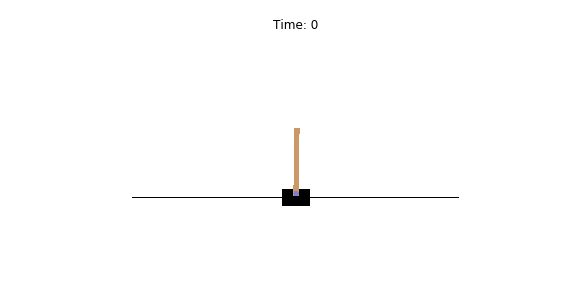
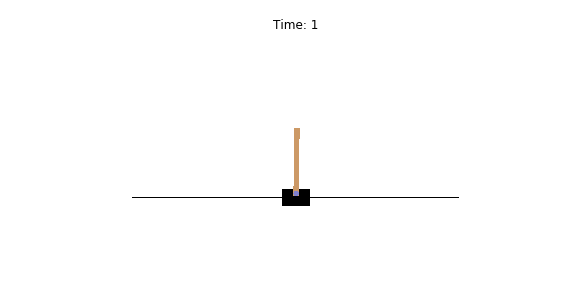
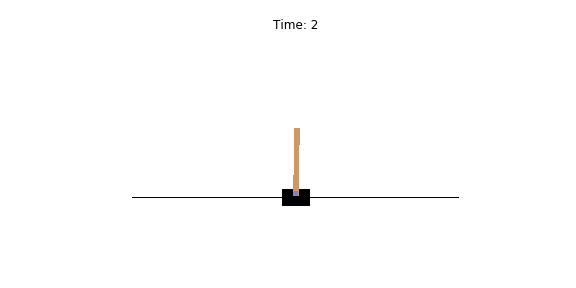
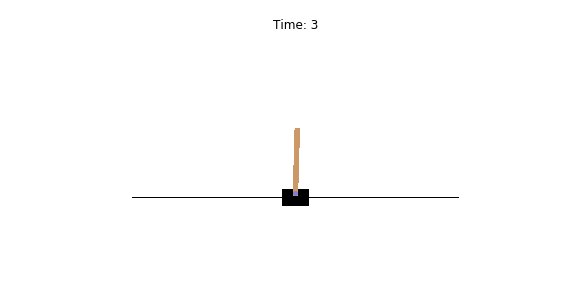
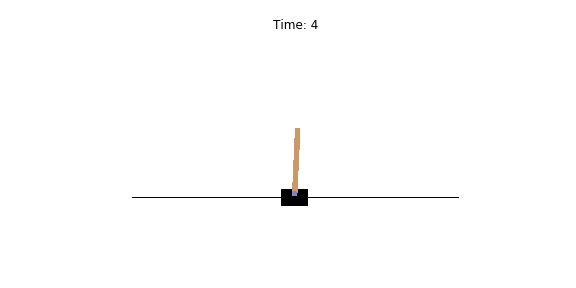
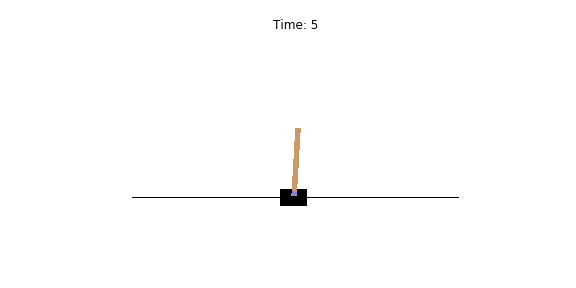
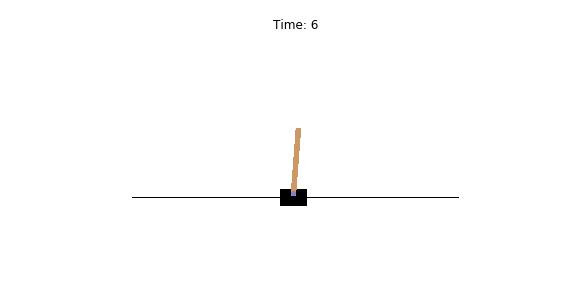
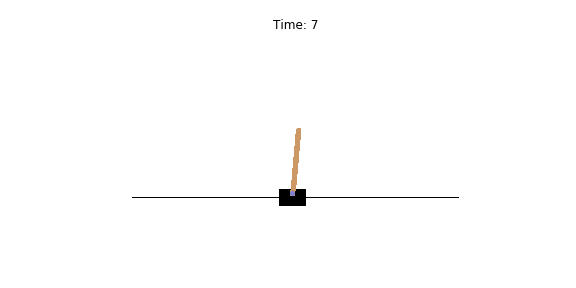
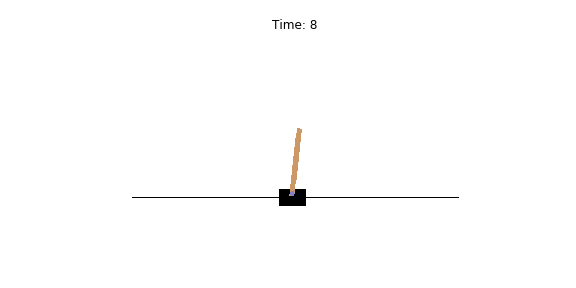
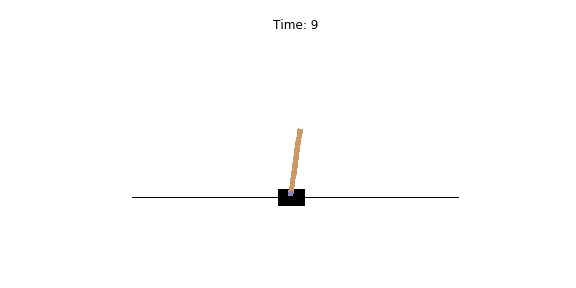
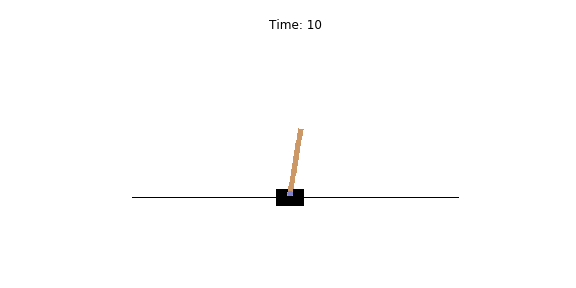
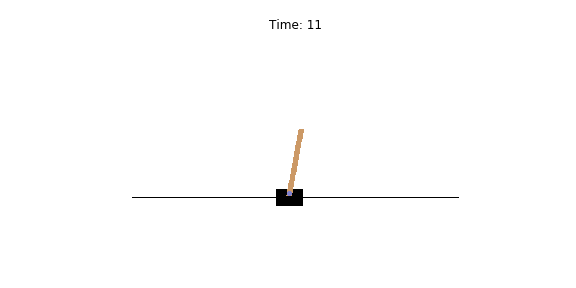
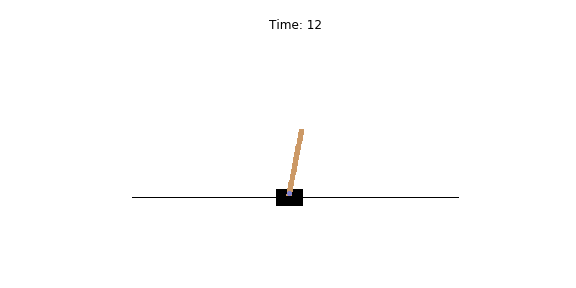

Episode [000] Finished after: [13] steps, Reward: [13.00], Average Reward: [13.00]
Episode [100] Finished after: [102] steps, Reward: [102.00], Average Reward: [61.13]
Episode [200] Finished after: [145] steps, Reward: [145.00], Average Reward: [138.36]
Episode [300] Finished after: [163] steps, Reward: [163.00], Average Reward: [154.12]
Episode [400] Finished after: [200] steps, Reward: [200.00], Average Reward: [157.58]



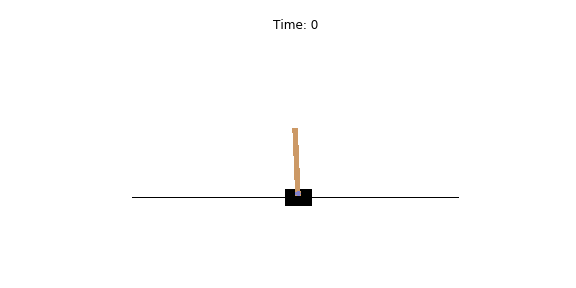
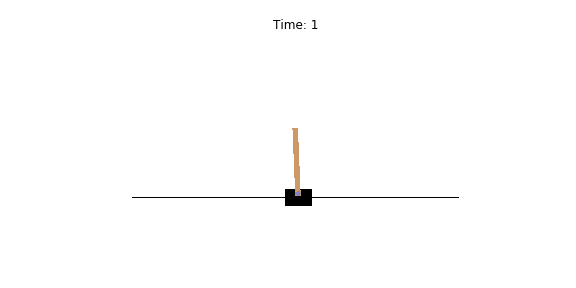
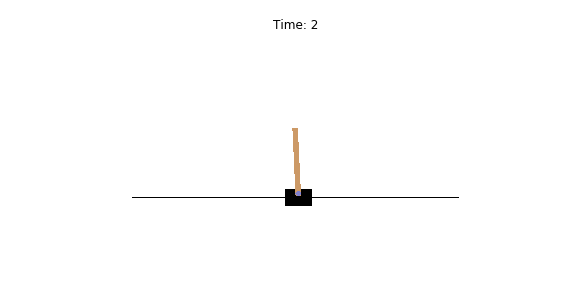
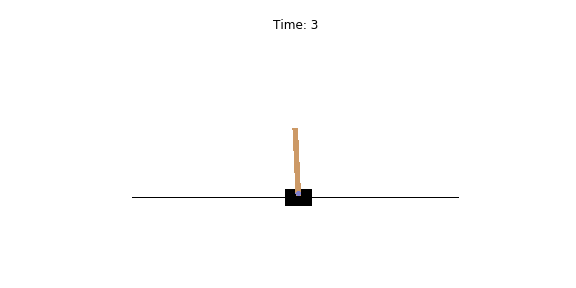
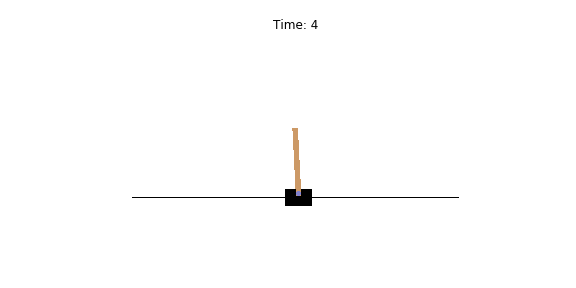
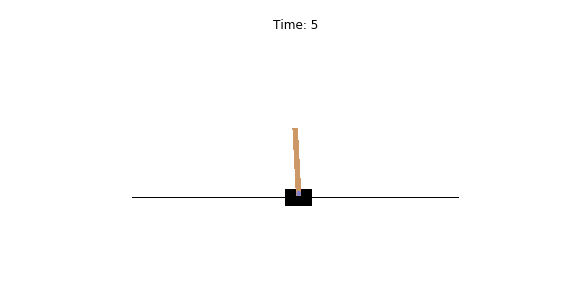
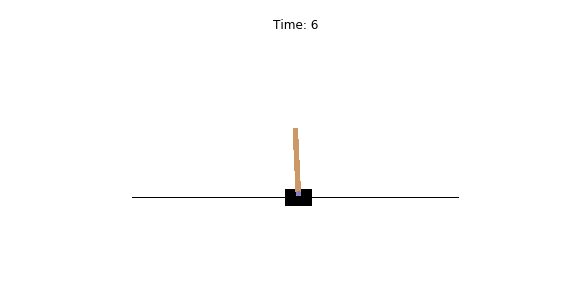
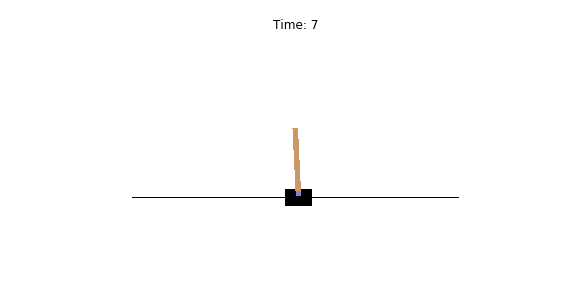
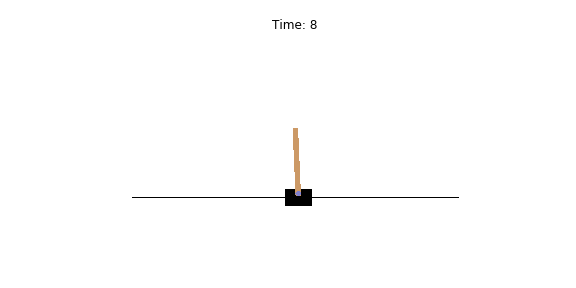
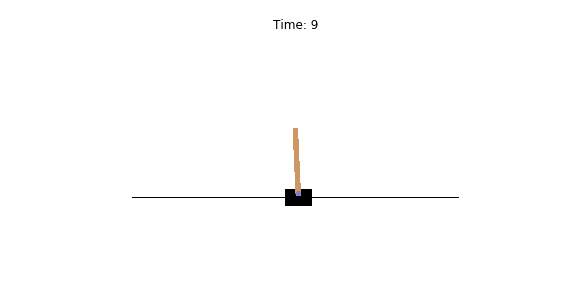
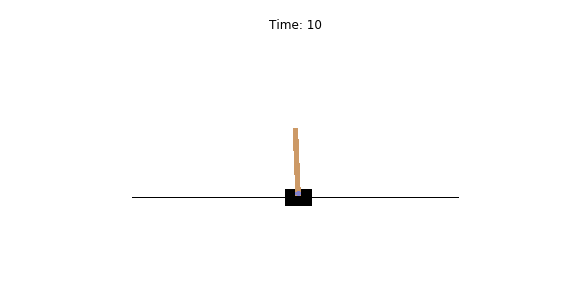
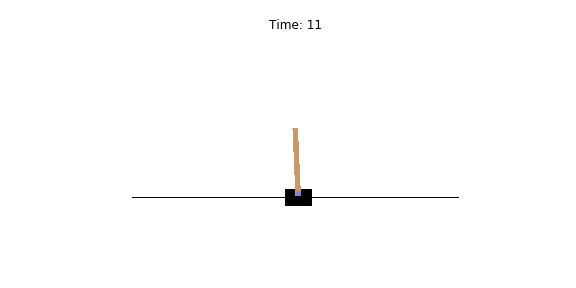
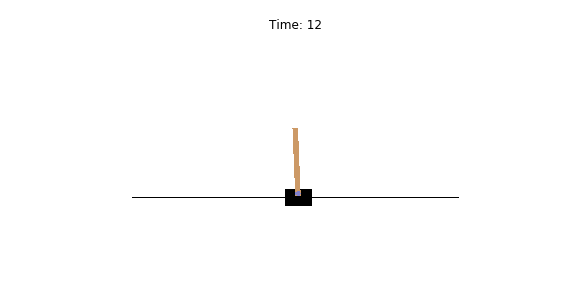
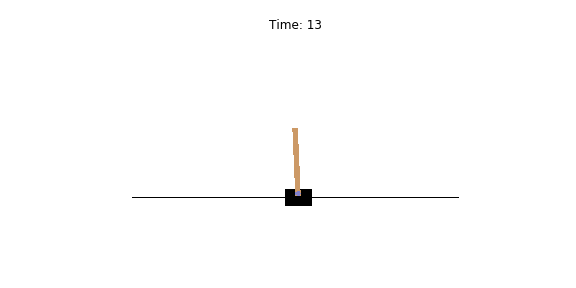
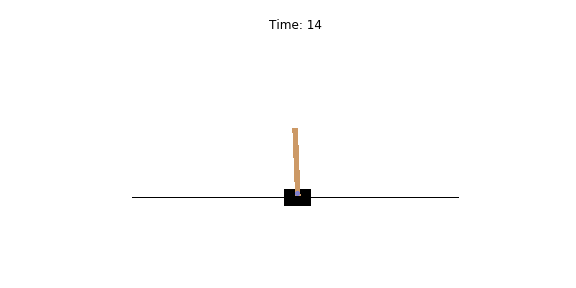
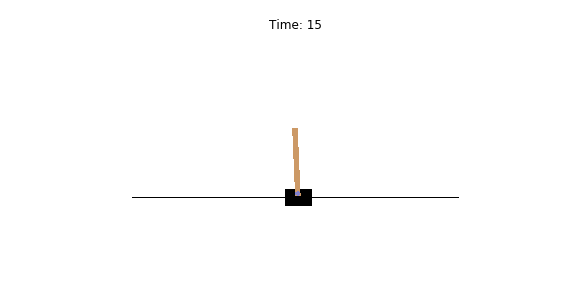
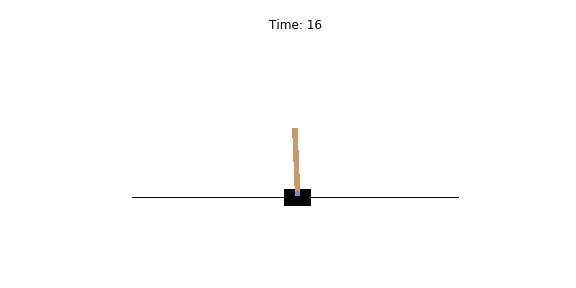
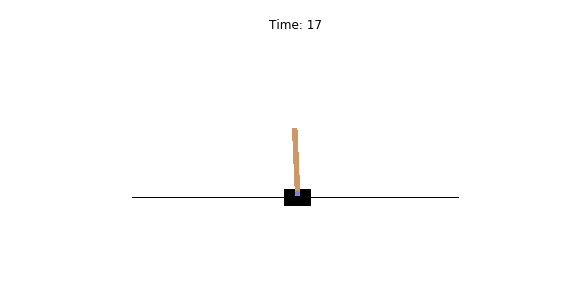
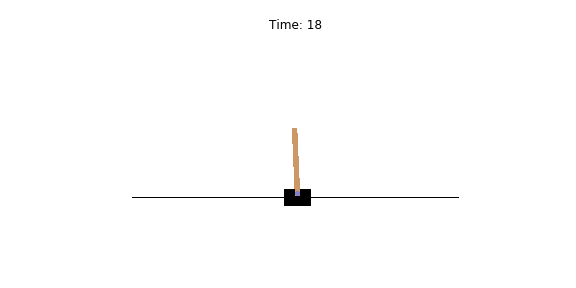
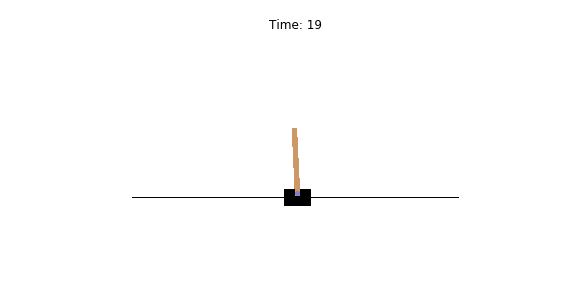
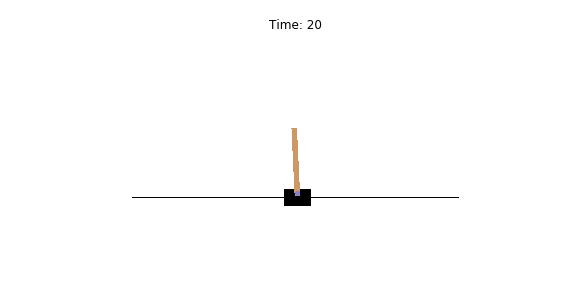
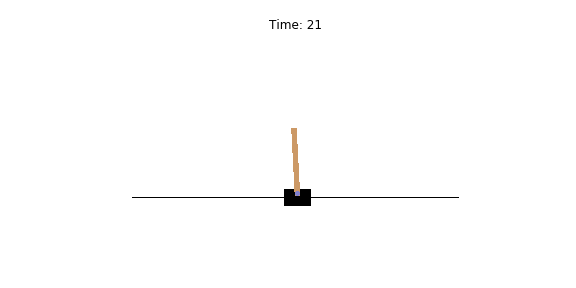
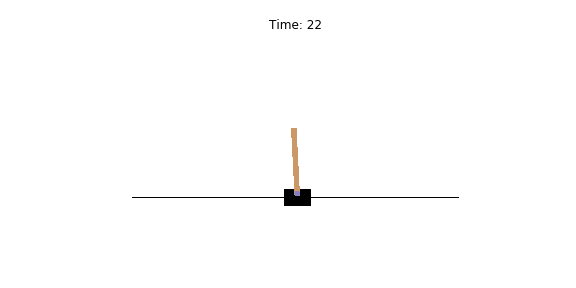
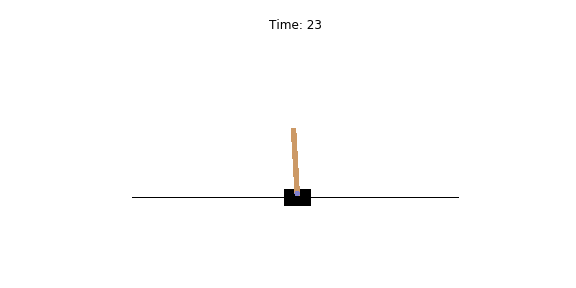
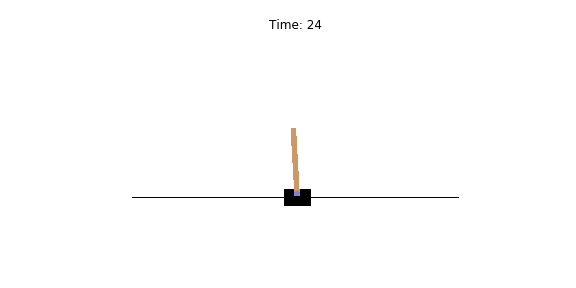
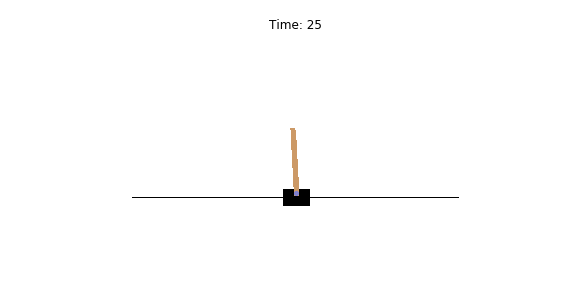
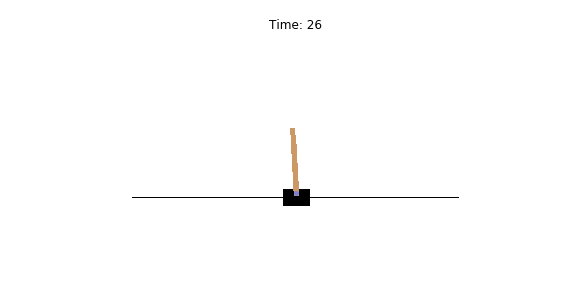
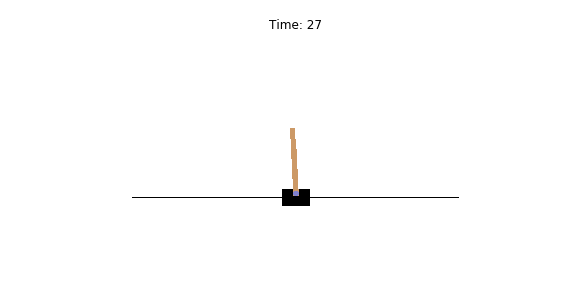
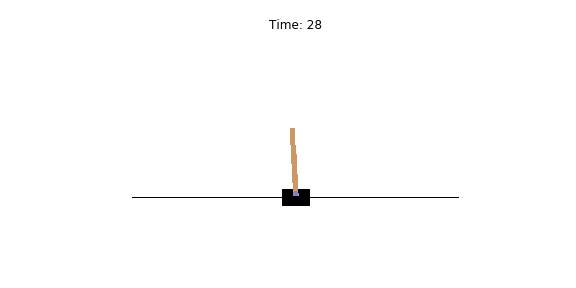
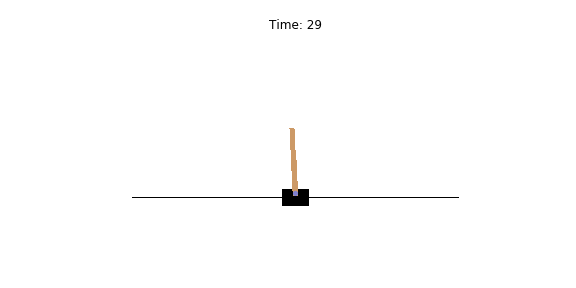
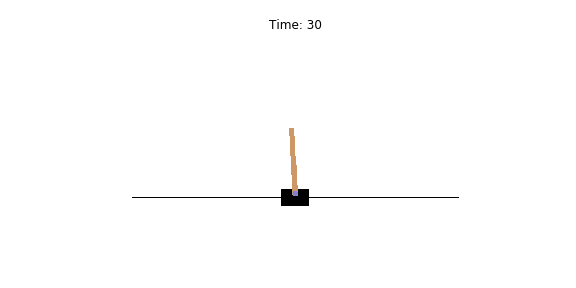
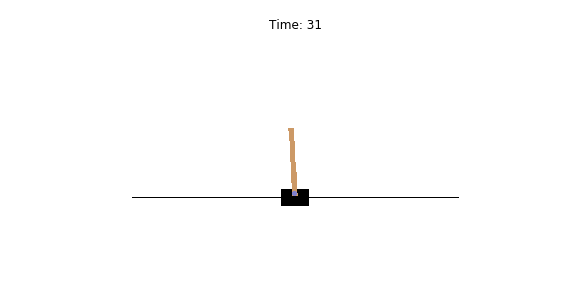
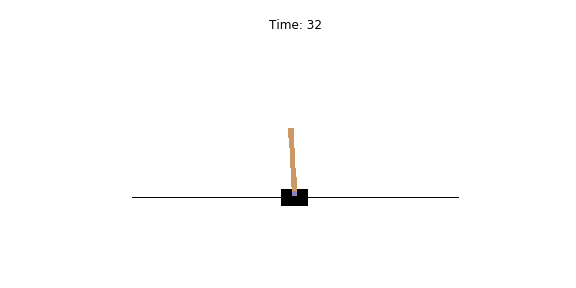
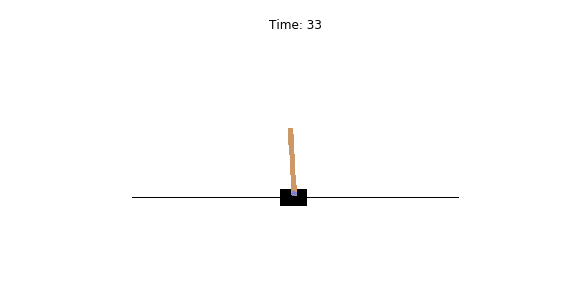
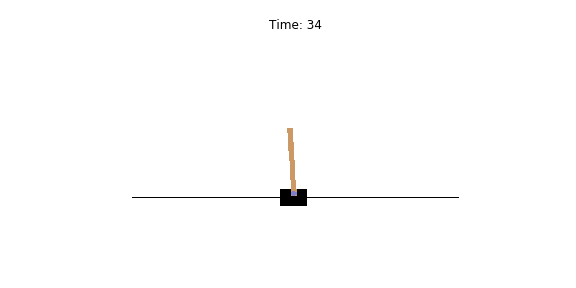
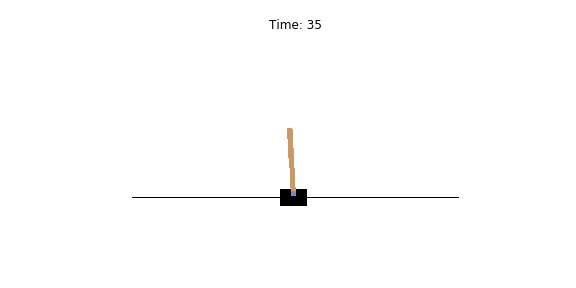
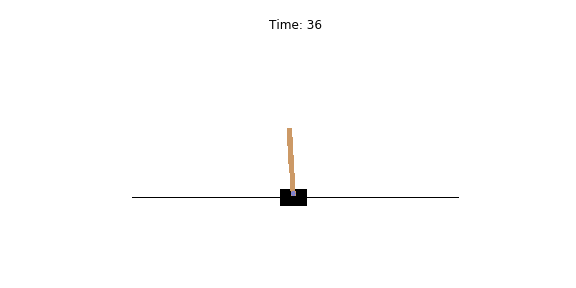
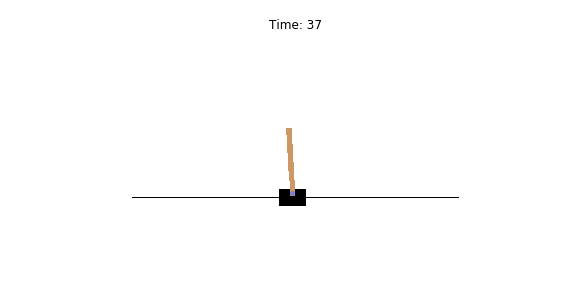
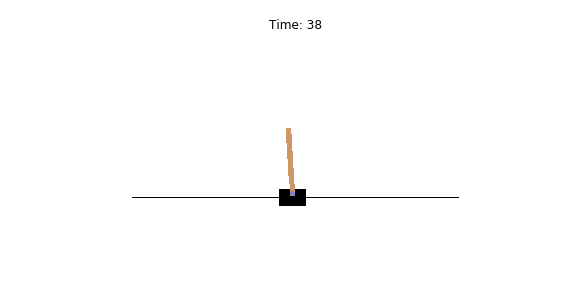
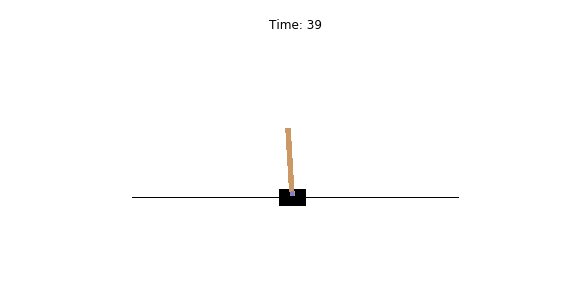
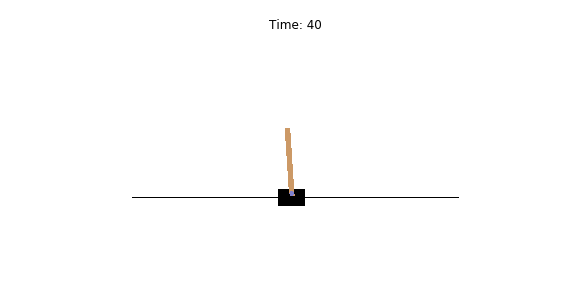
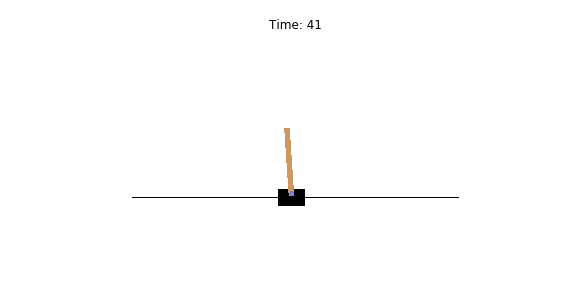
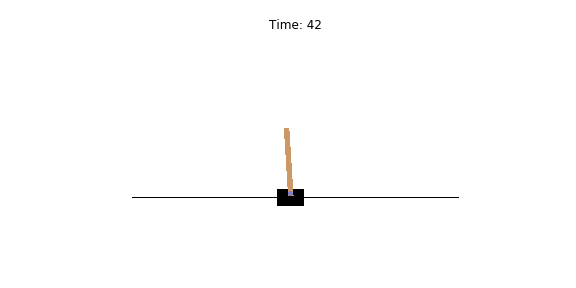
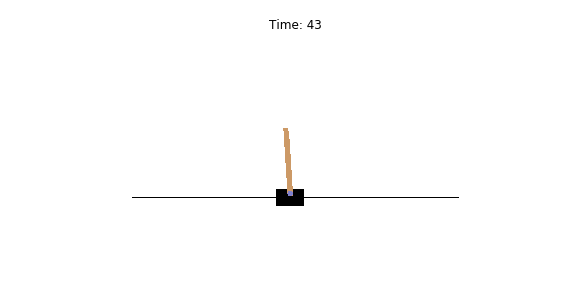
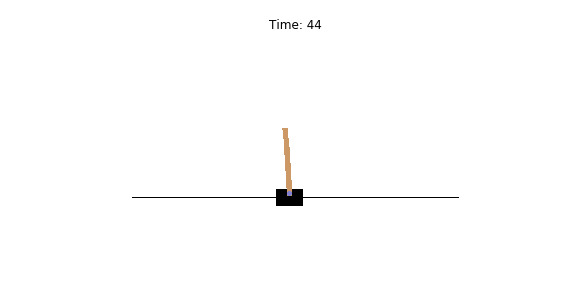
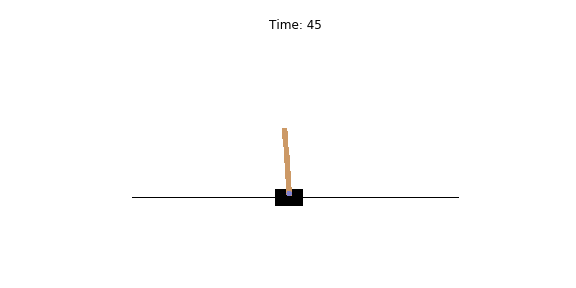
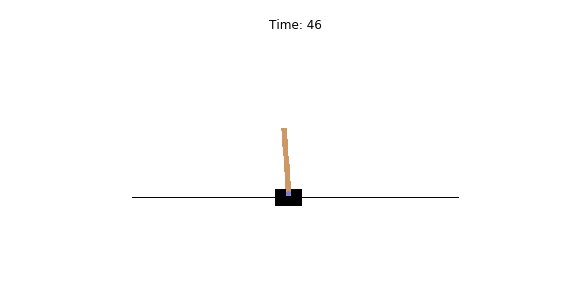
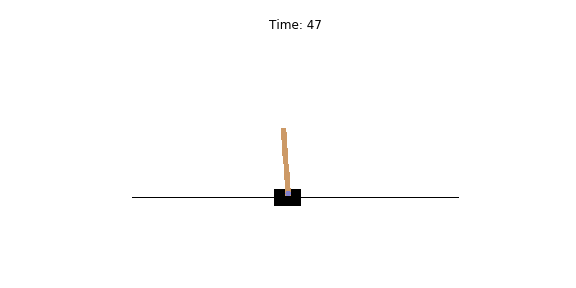
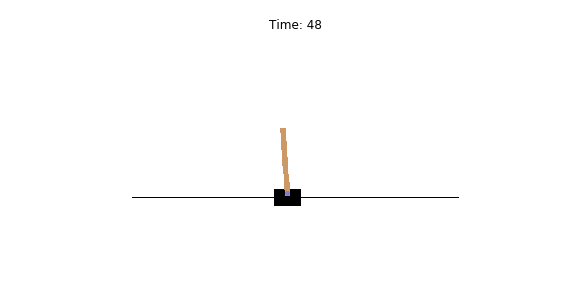
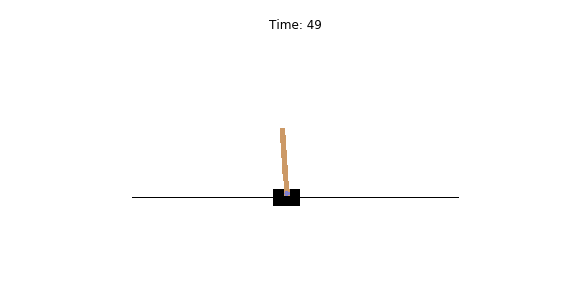
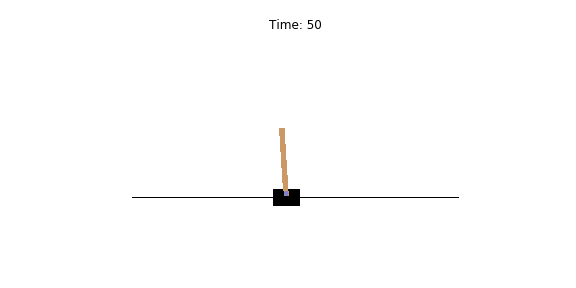
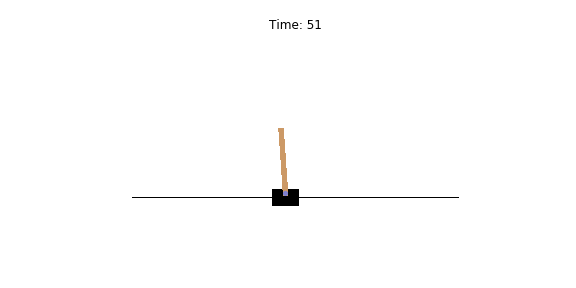
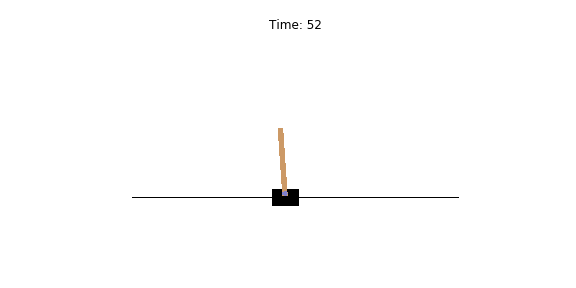
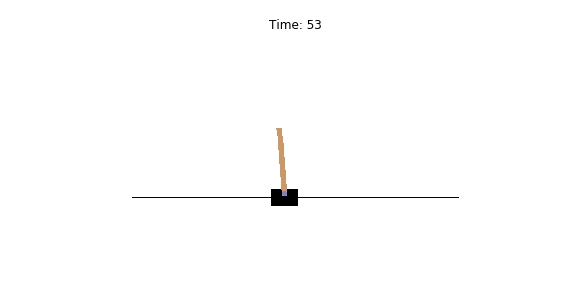
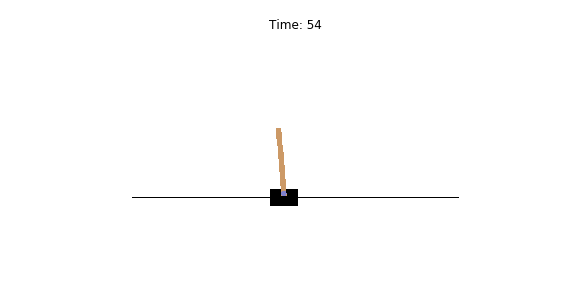
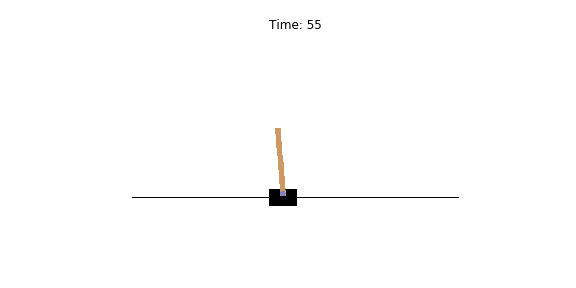
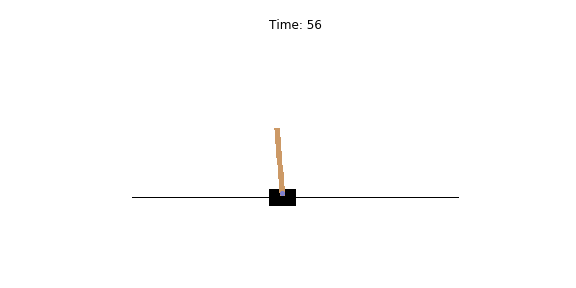
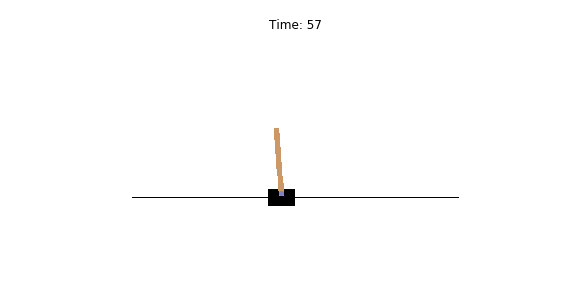
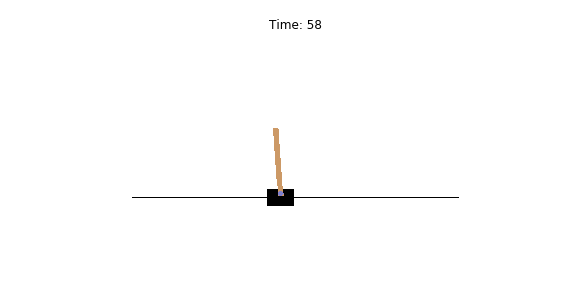
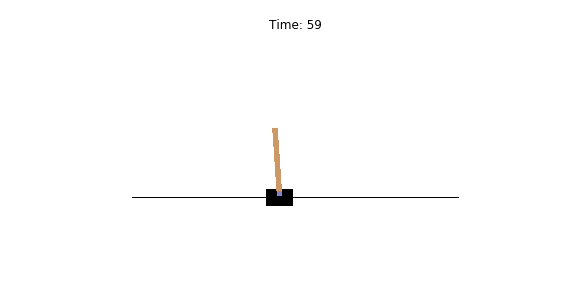
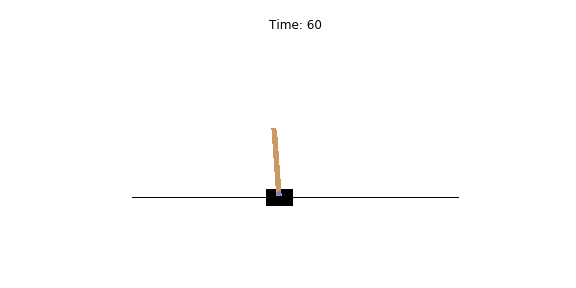
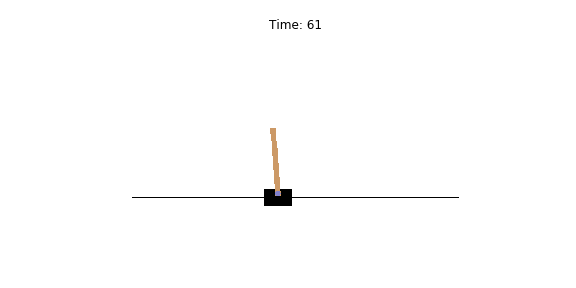
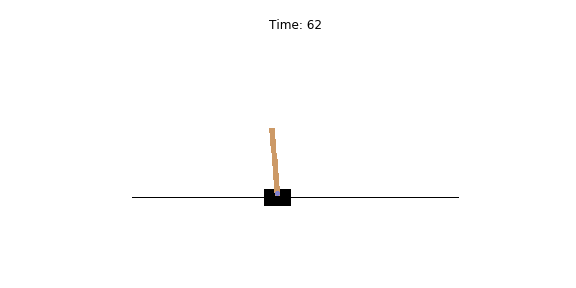
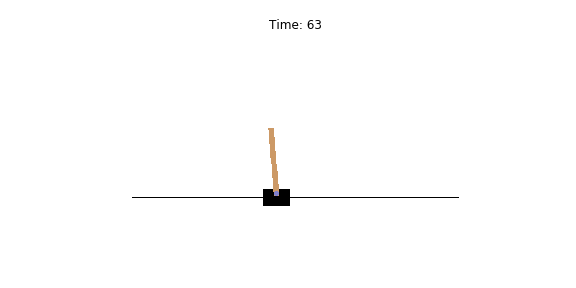
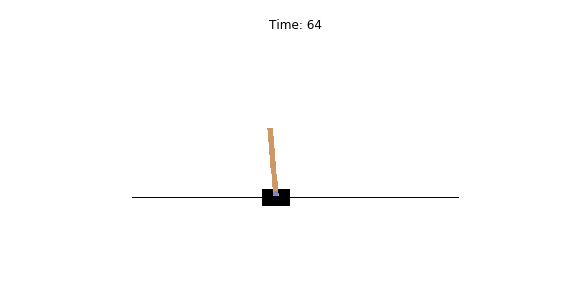
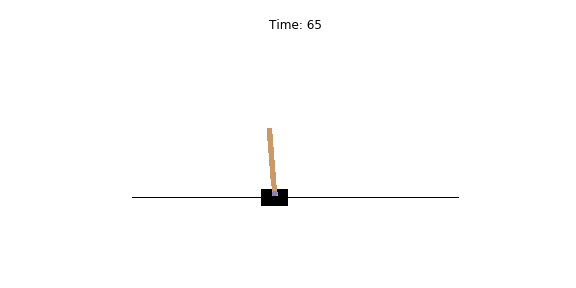
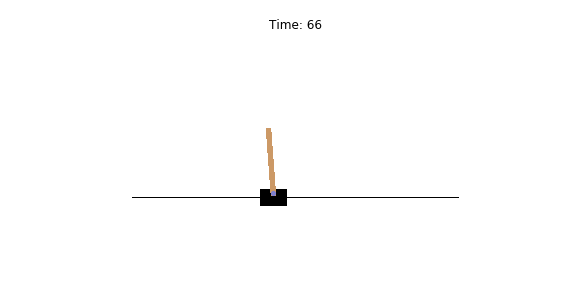
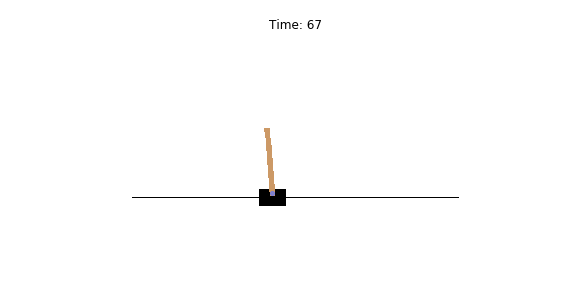
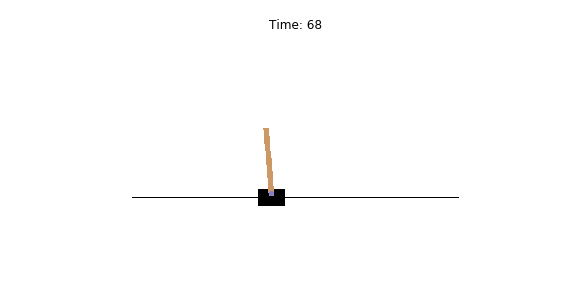
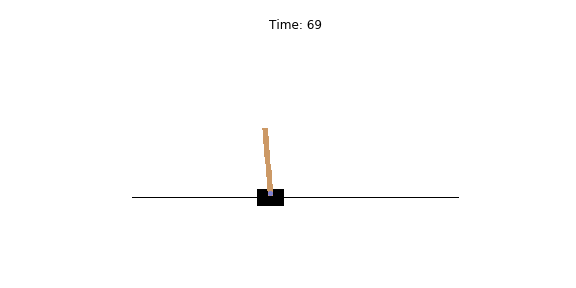
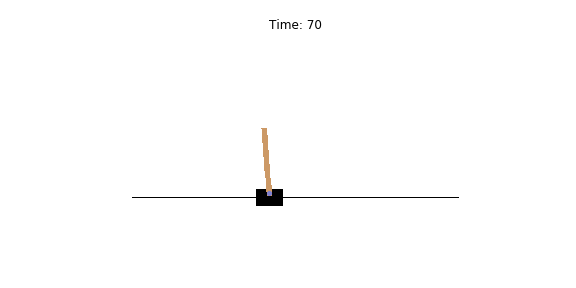
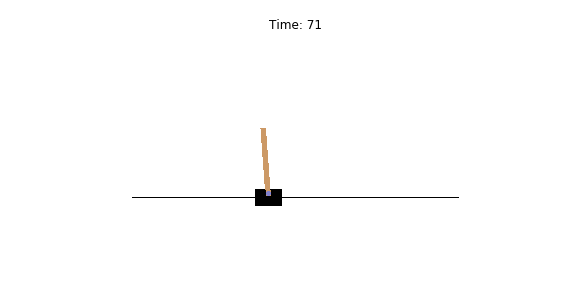
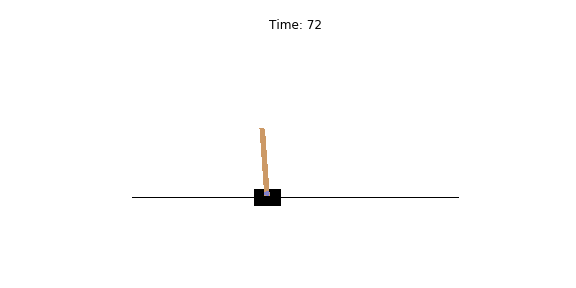
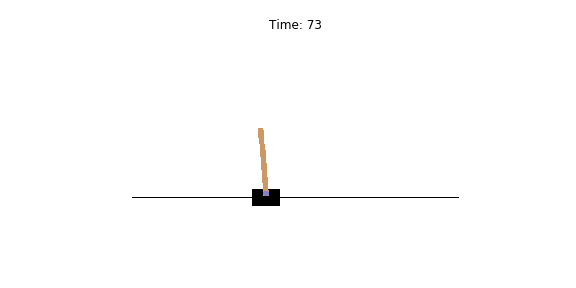
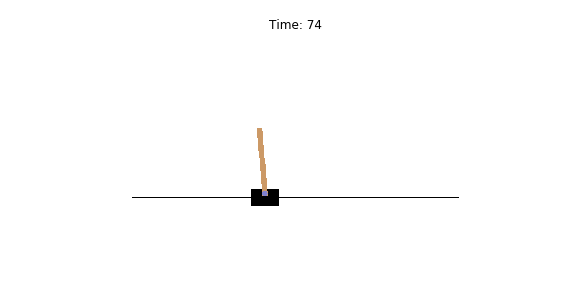
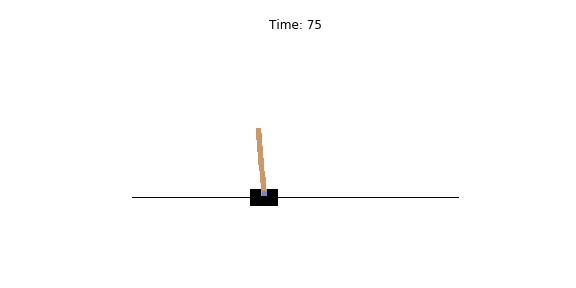
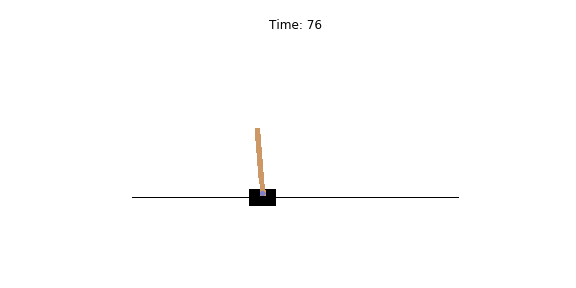
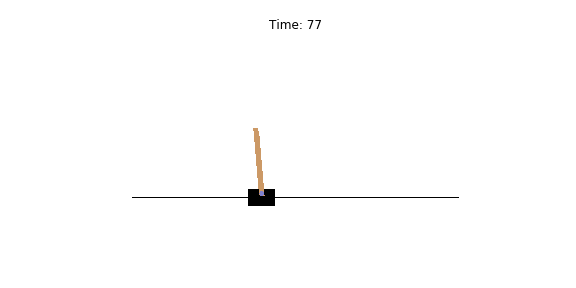
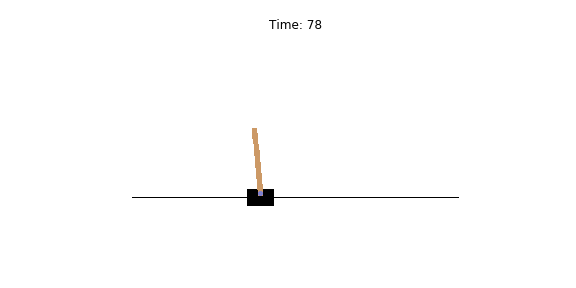
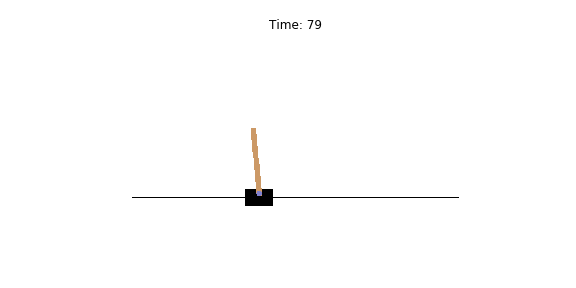
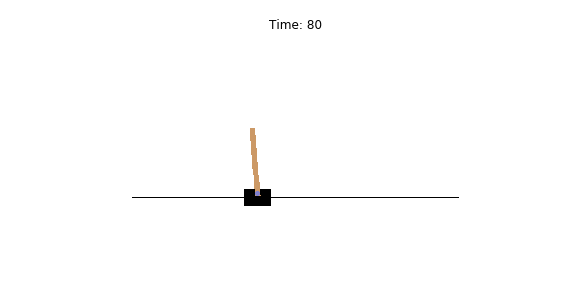
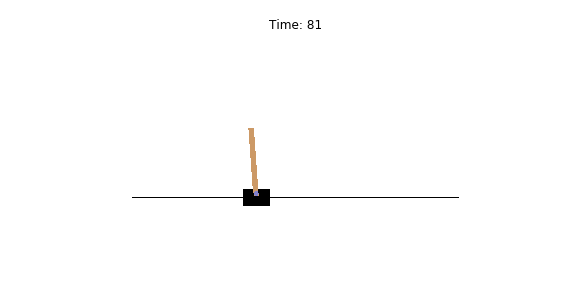
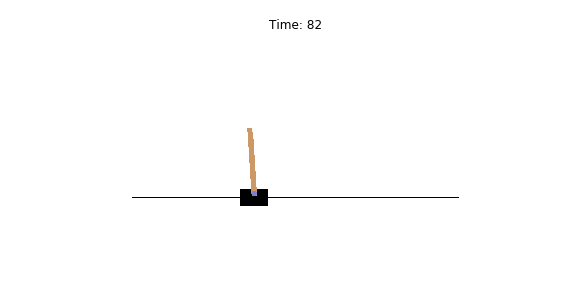
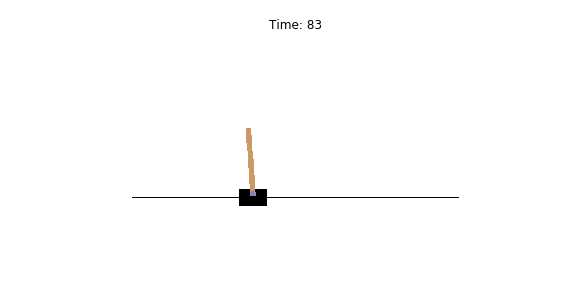
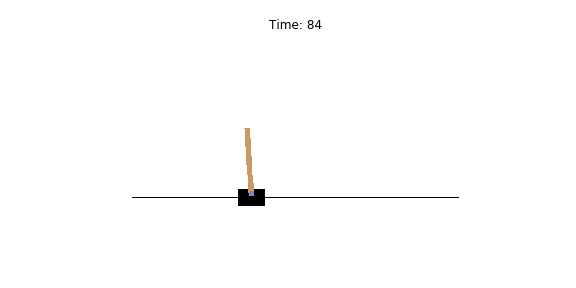
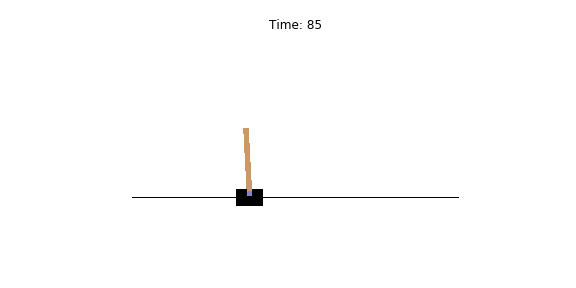
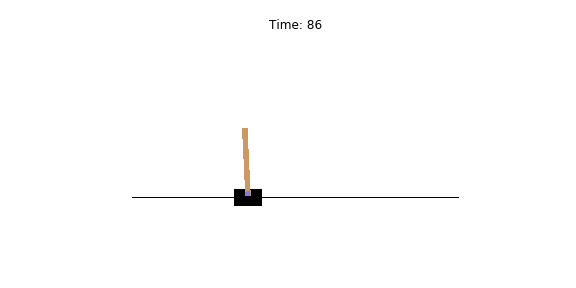
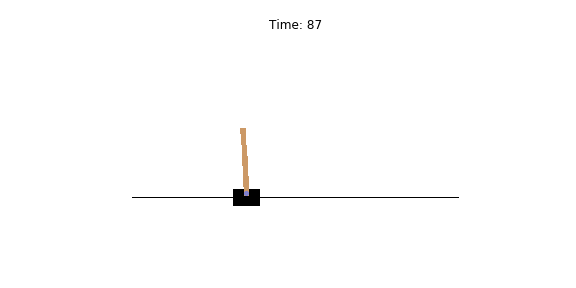
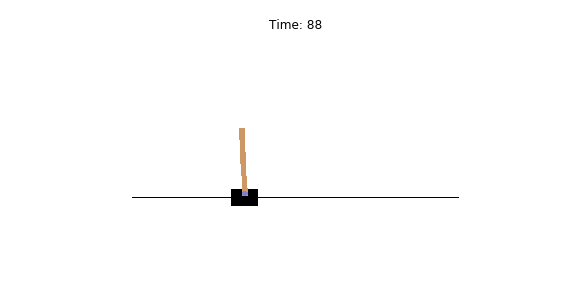
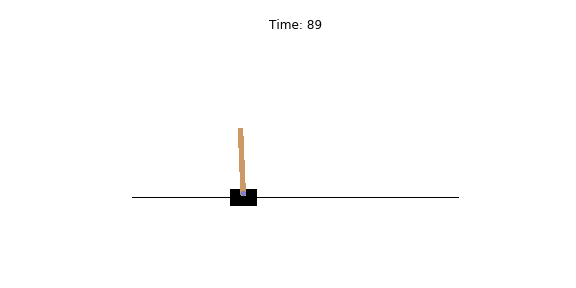
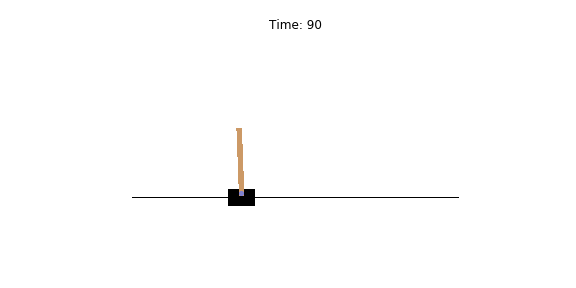
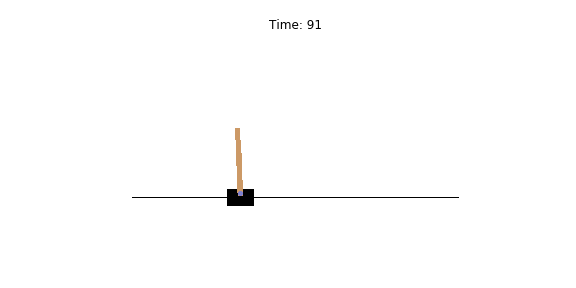
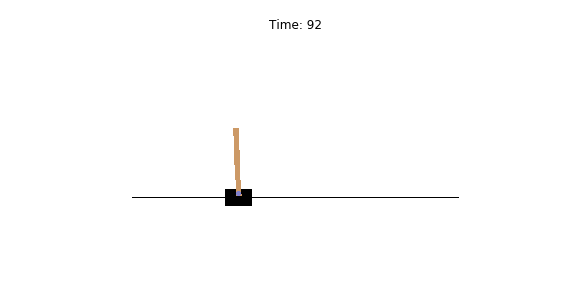
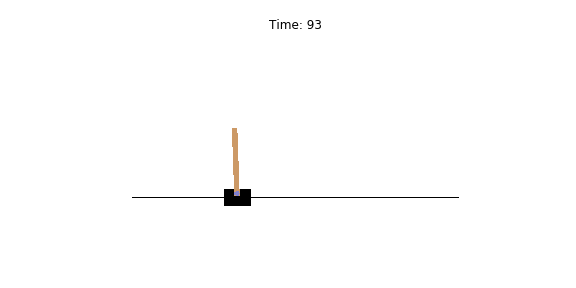
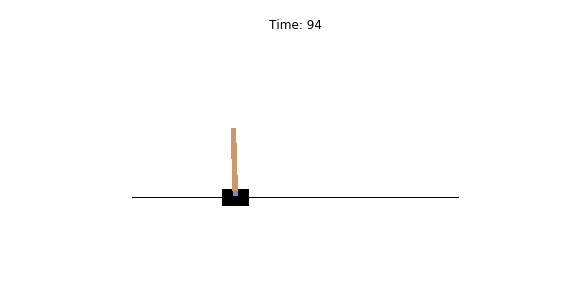
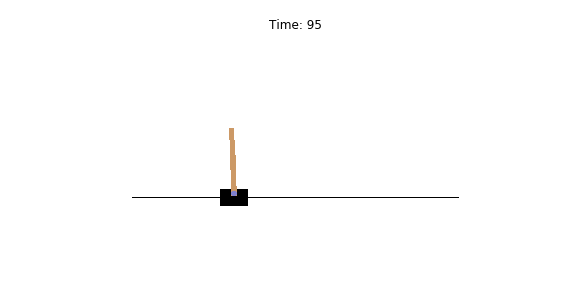
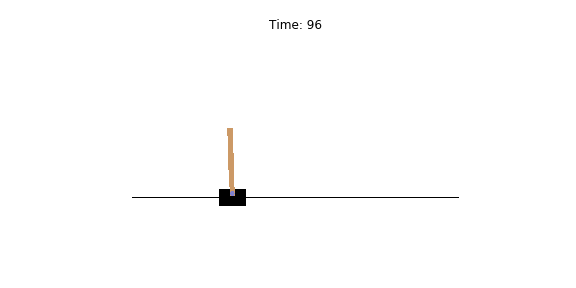
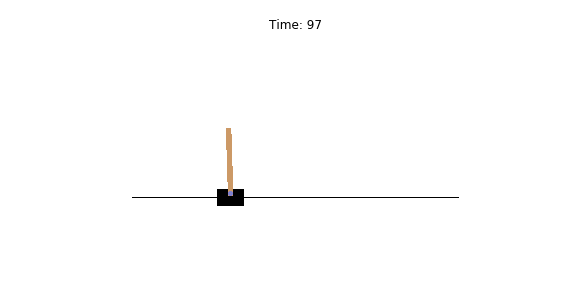
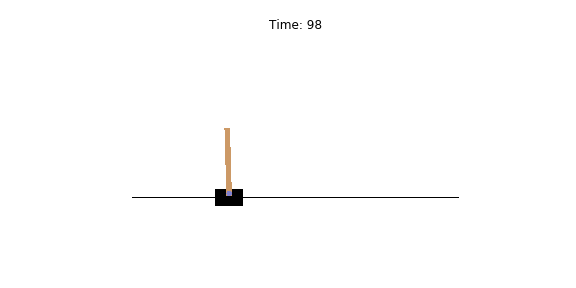
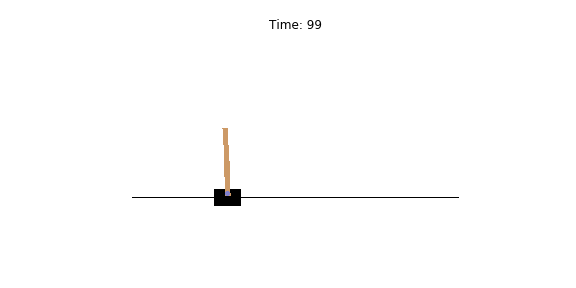
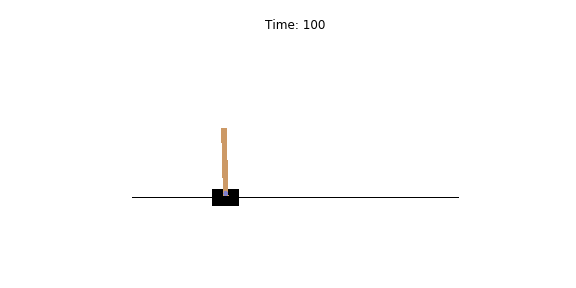
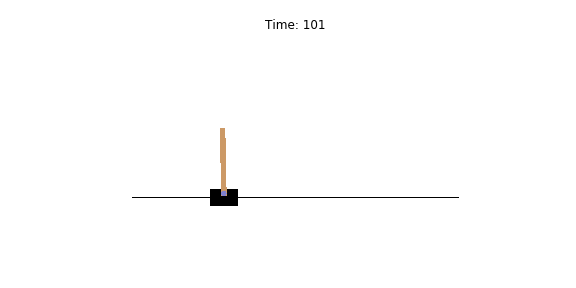
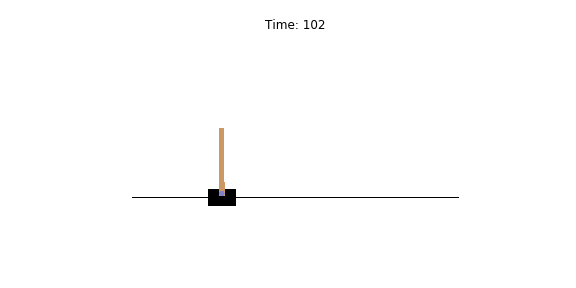
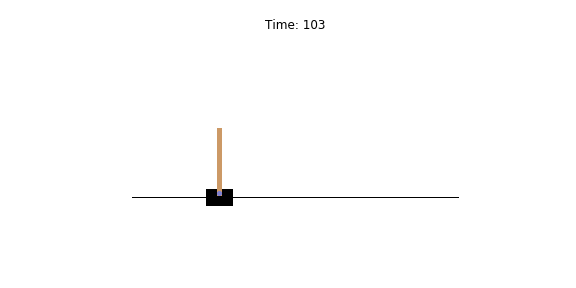
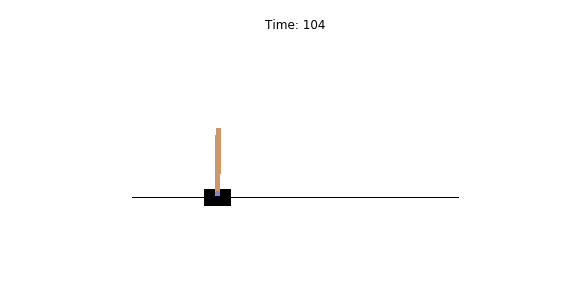
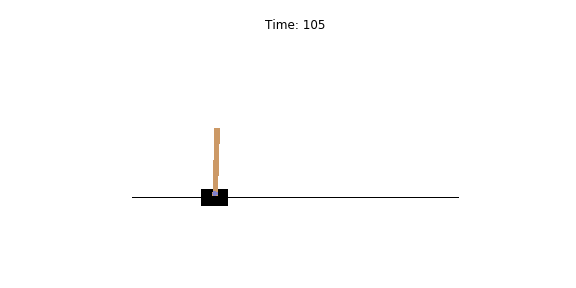
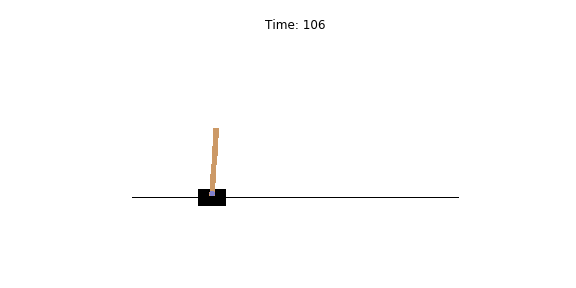
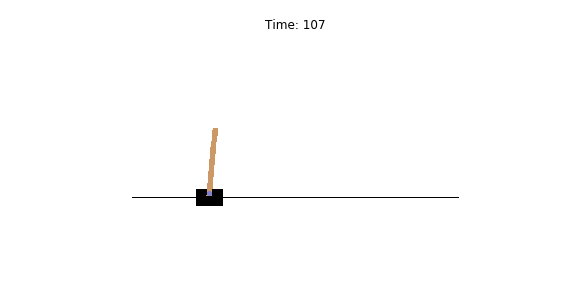
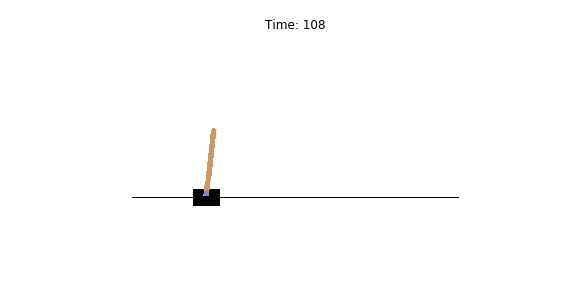
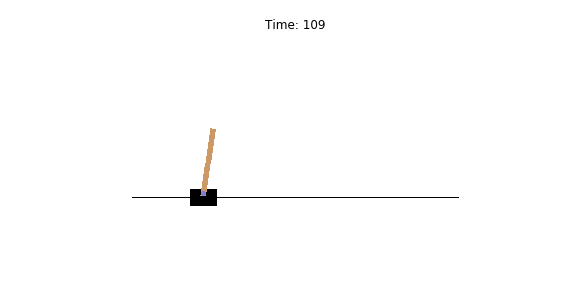
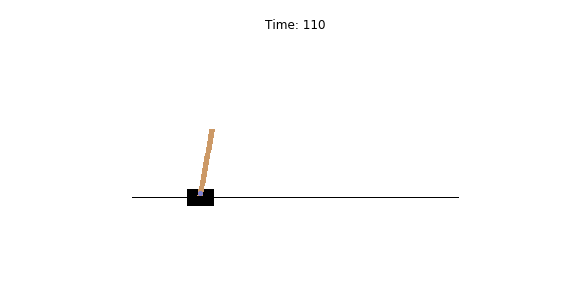

Episode [500] Finished after: [111] steps, Reward: [111.00], Average Reward: [152.45]
Episode [600] Finished after: [151] steps, Reward: [151.00], Average Reward: [159.74]
Episode [700] Finished after: [98] steps, Reward: [98.00], Average Reward: [153.73]
Episode [800] Finished after: [149] steps, Reward: [149.00], Average Reward: [172.87]
Episode [900] Finished after: [117] steps, Reward: [117.00], Average Reward: [178.51]



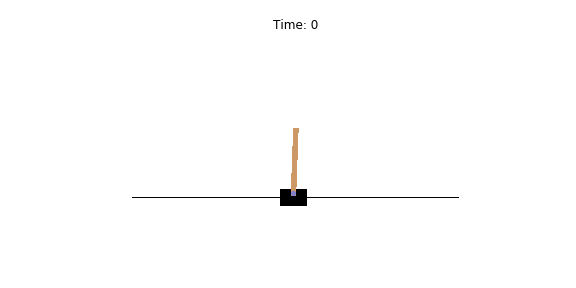
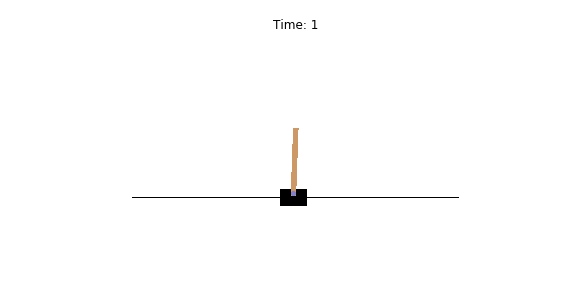
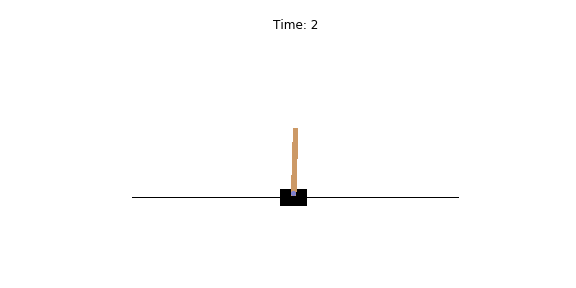
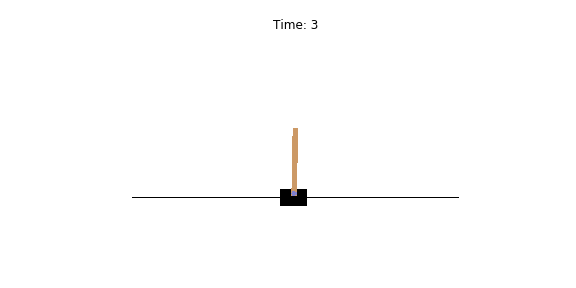
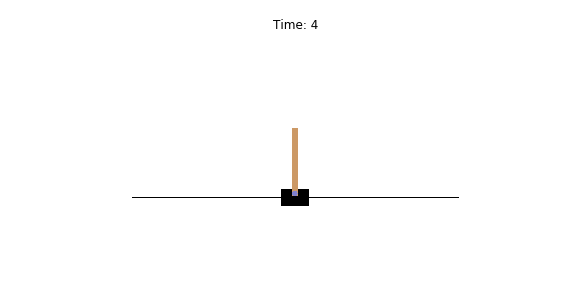
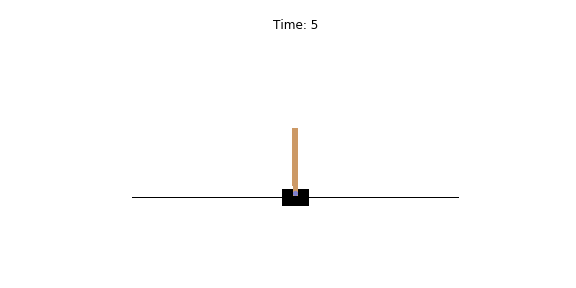
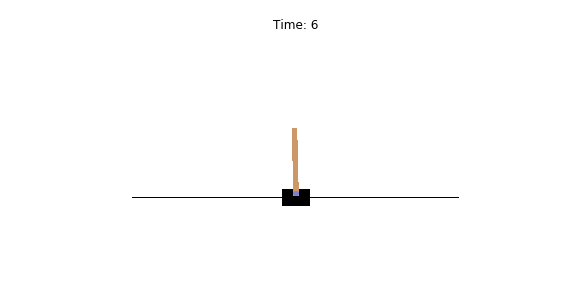
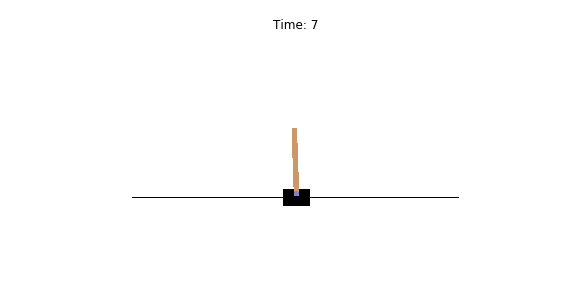
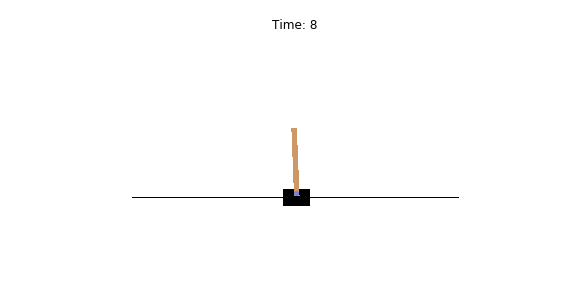
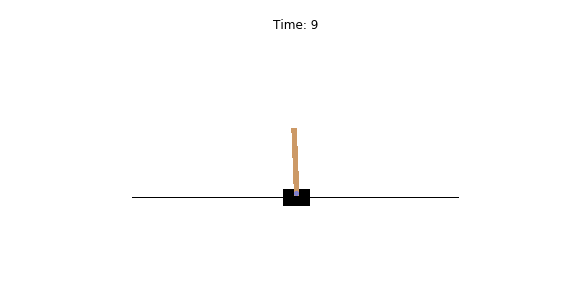
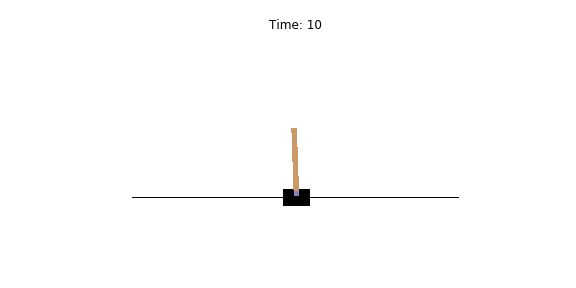
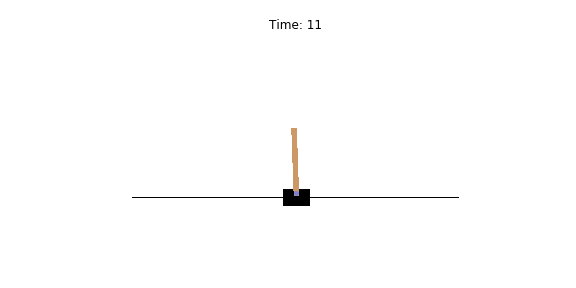
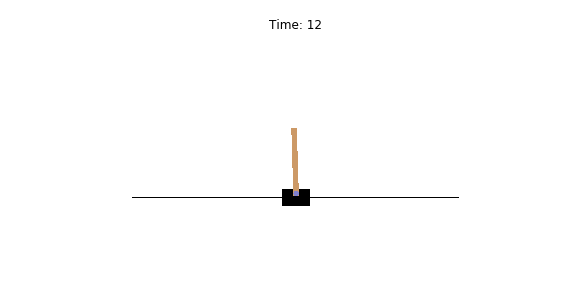
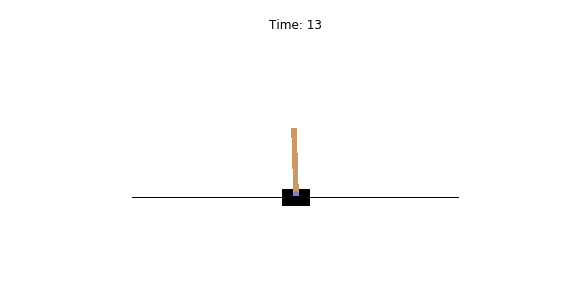
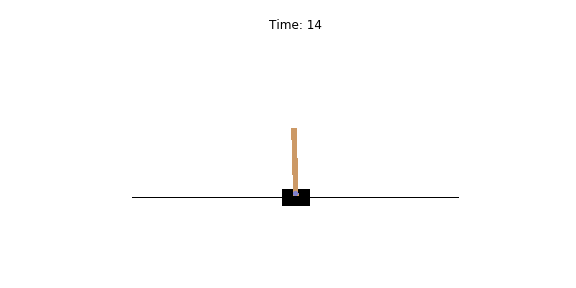
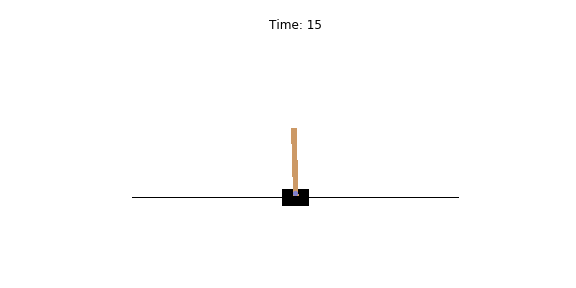
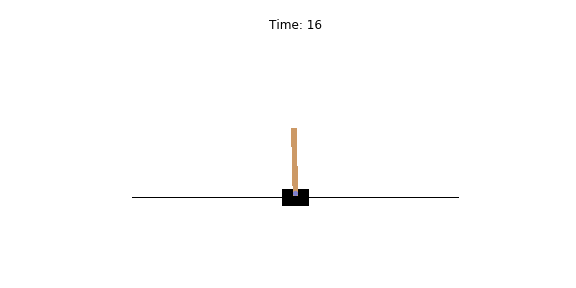
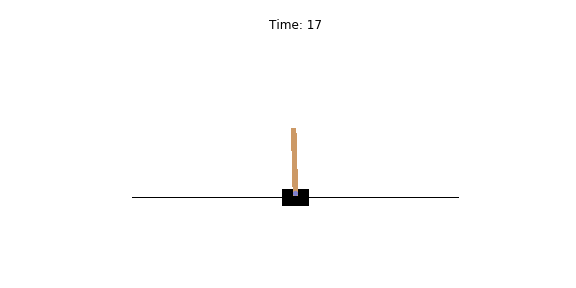
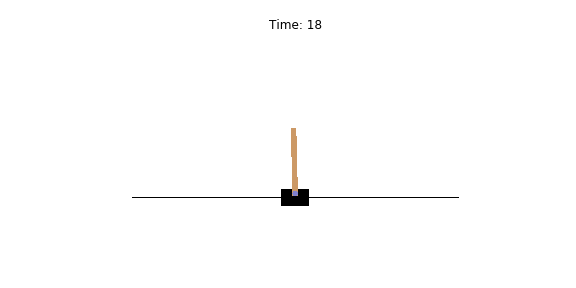
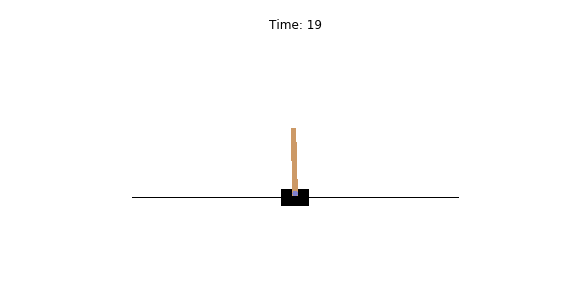
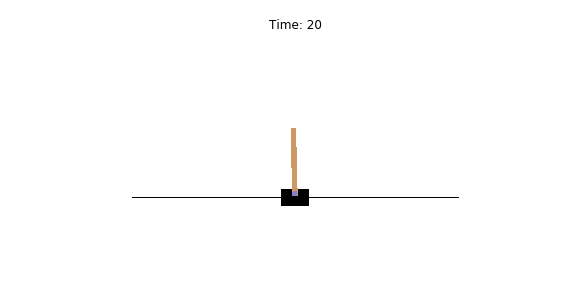
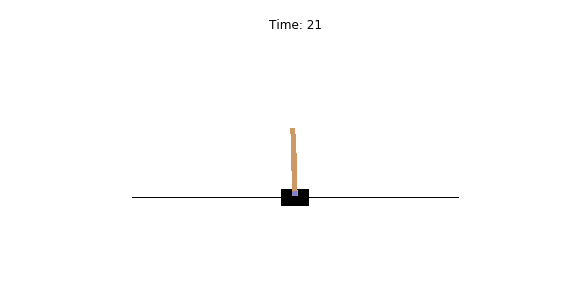
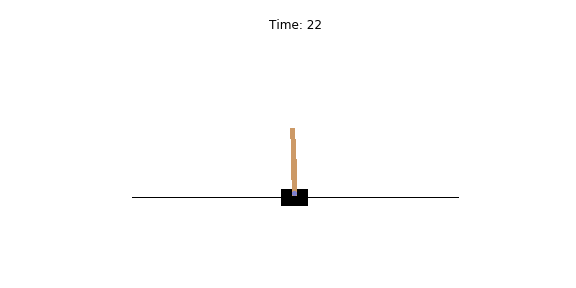
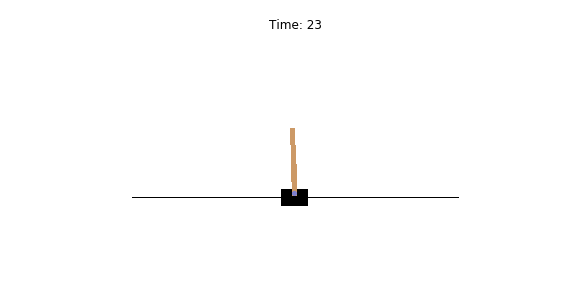
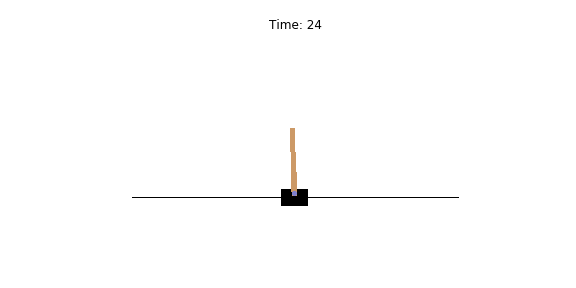
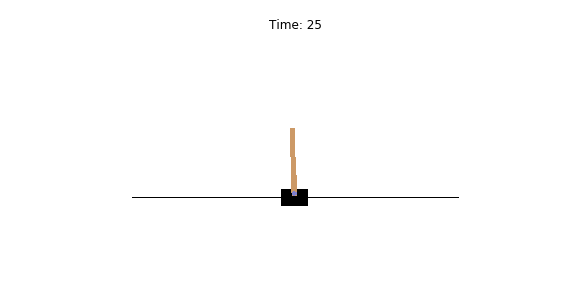
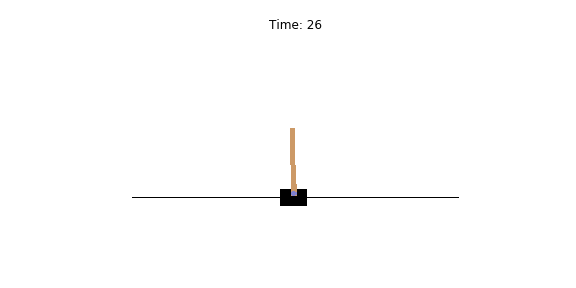
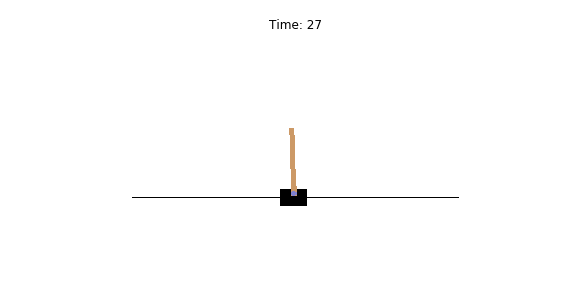
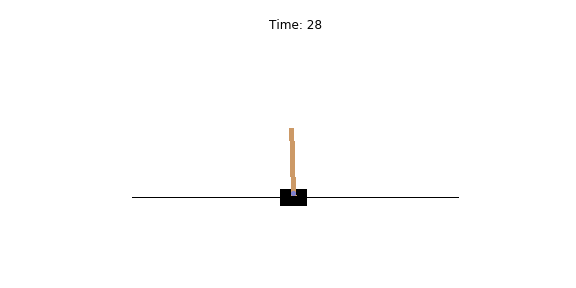
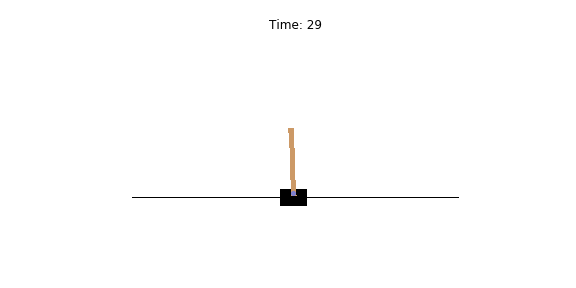
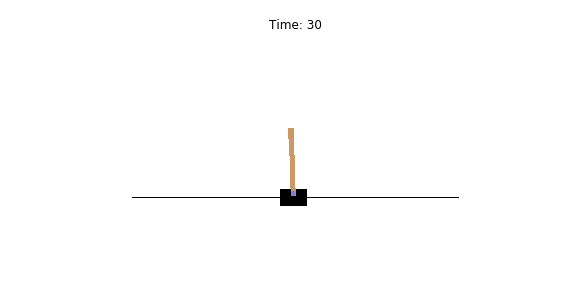
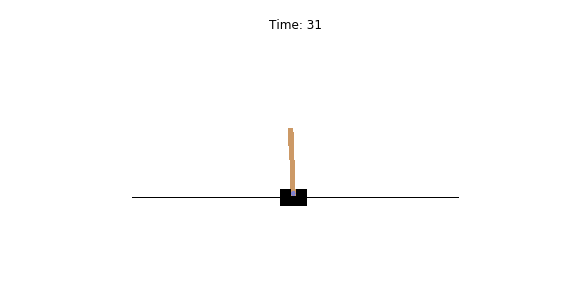
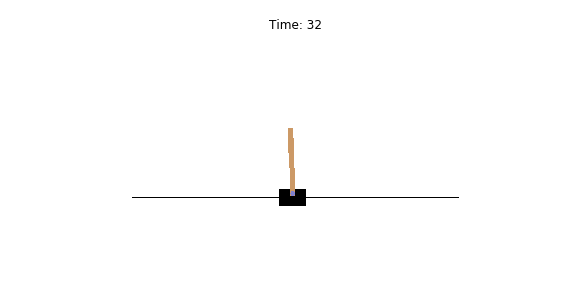
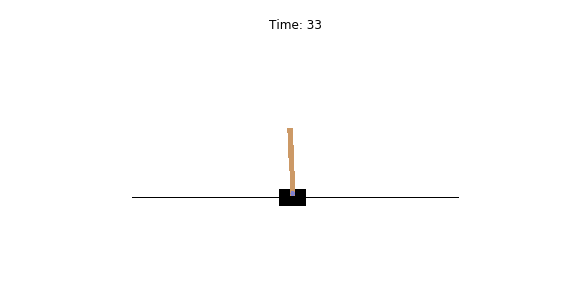
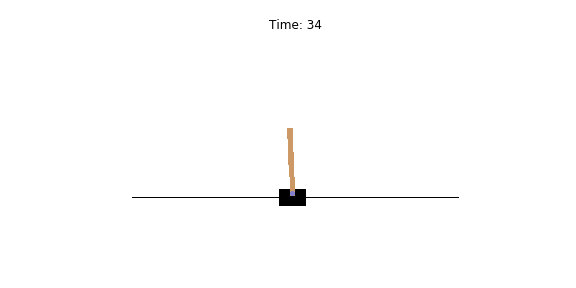
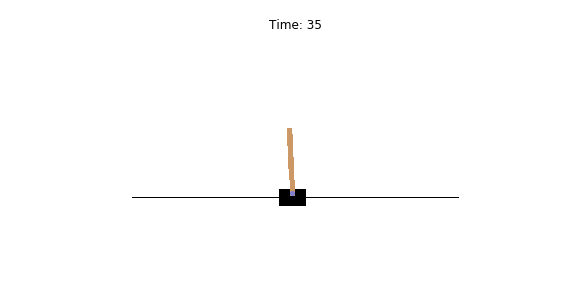
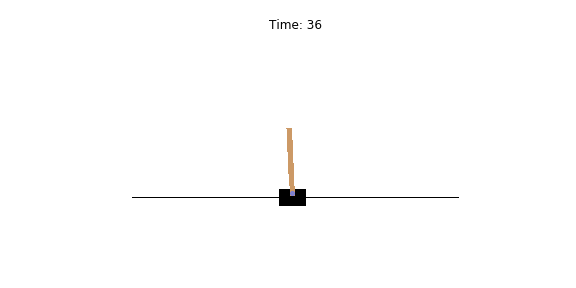
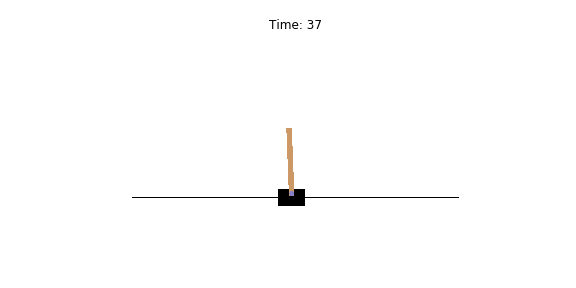
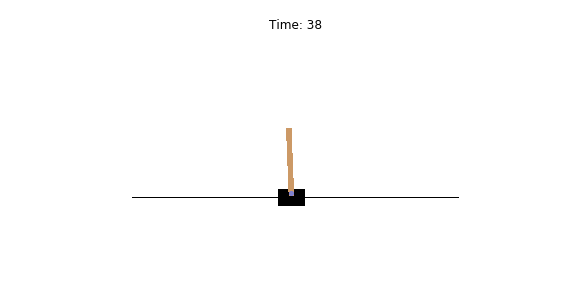
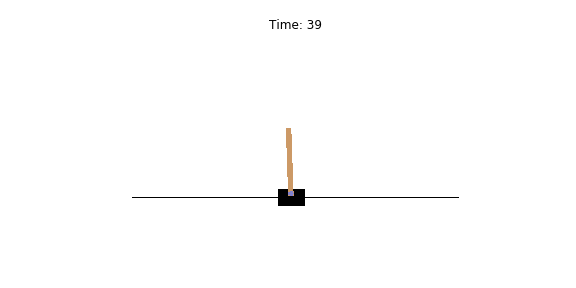
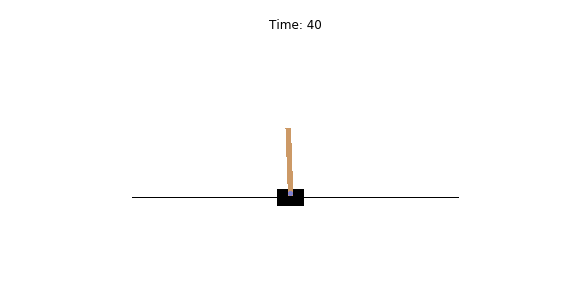
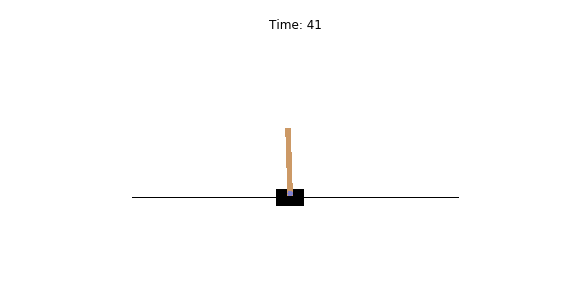
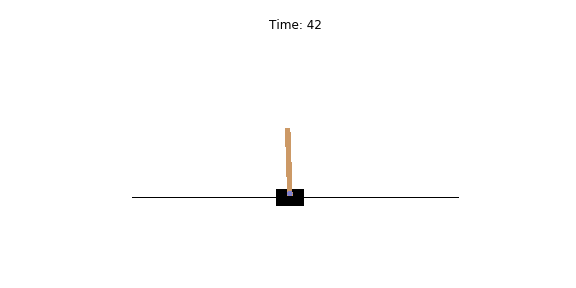
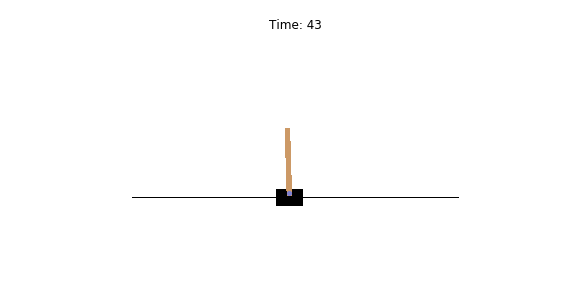
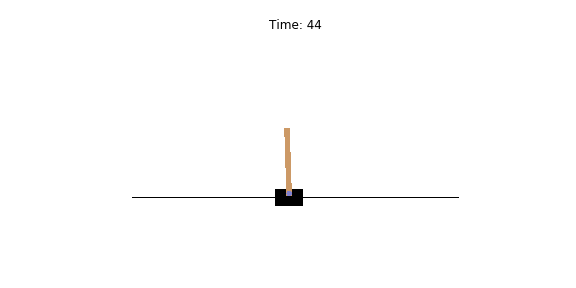
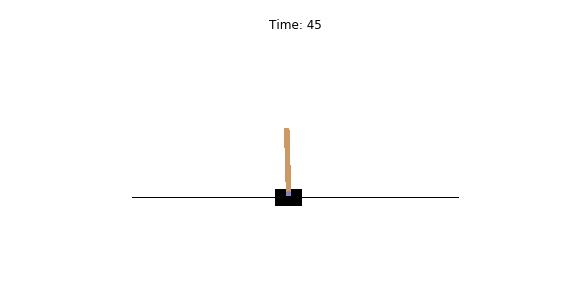
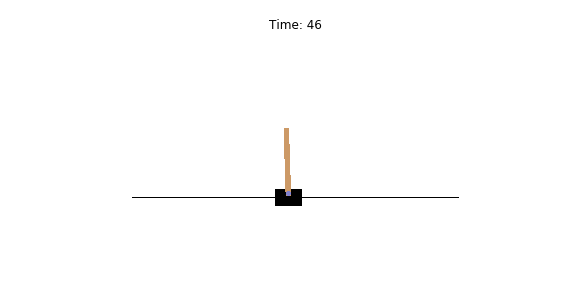
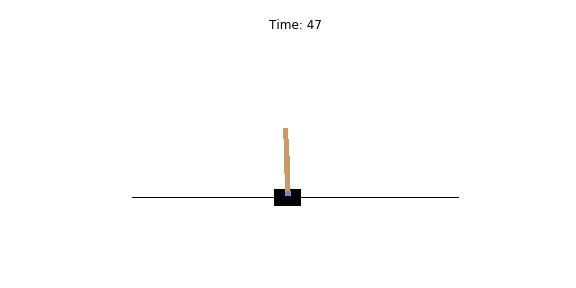
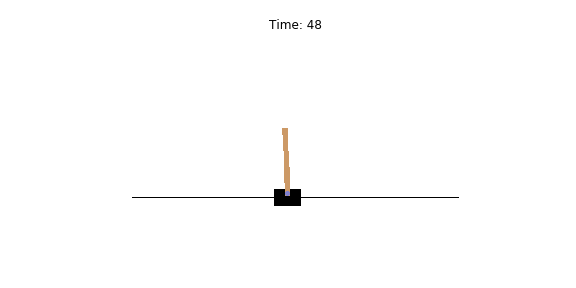
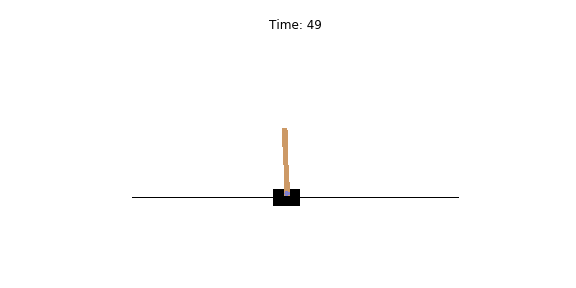
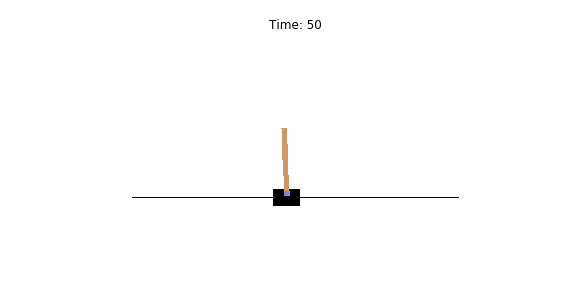
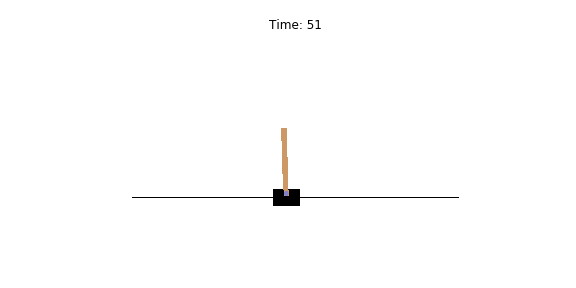
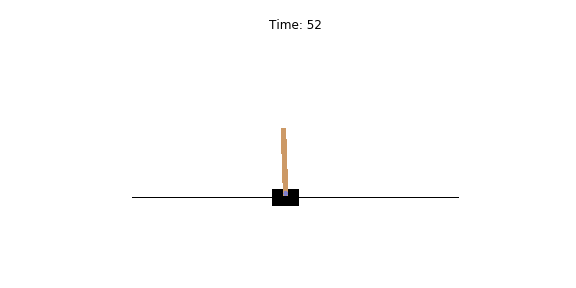
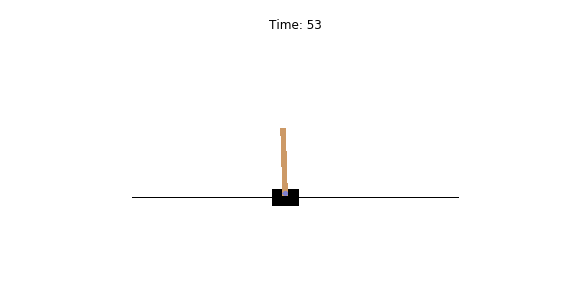
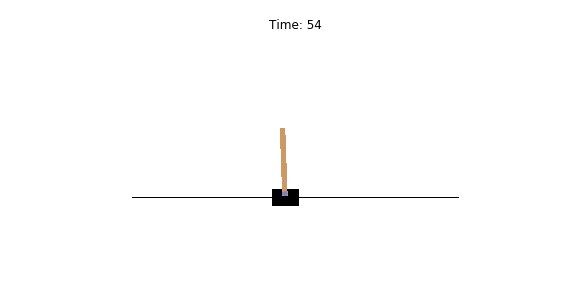
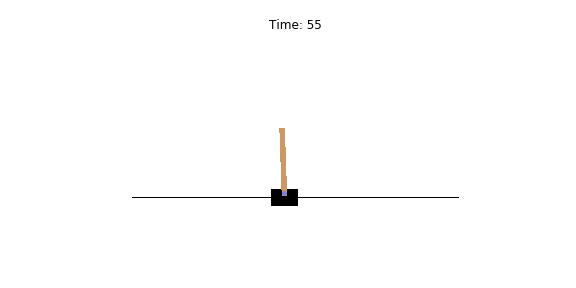
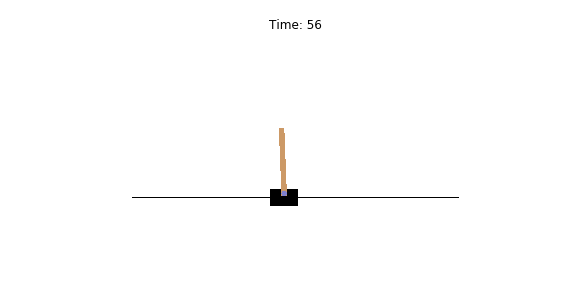
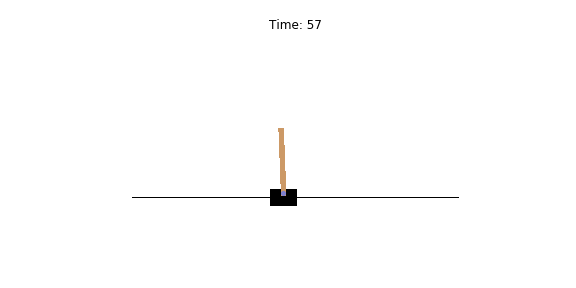
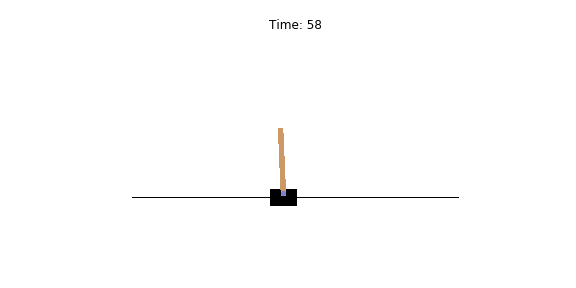
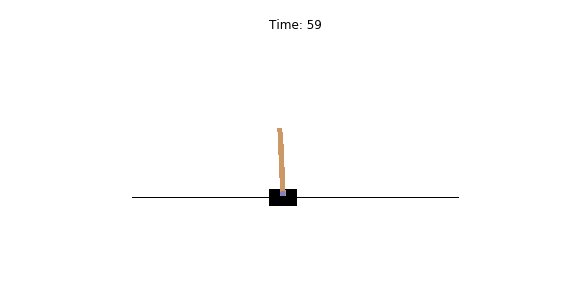
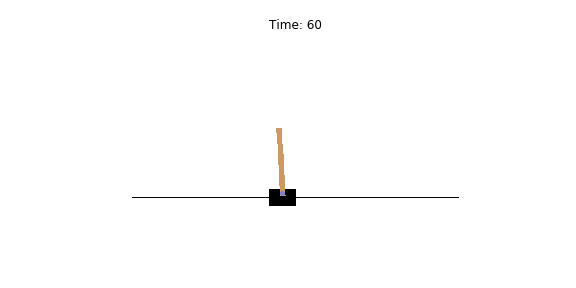
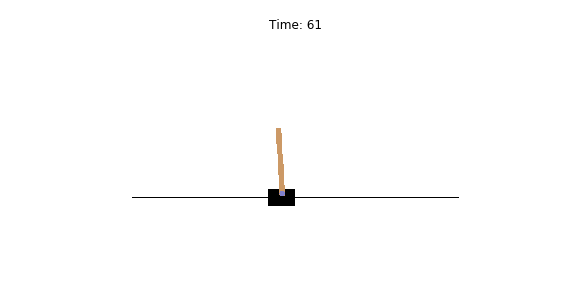
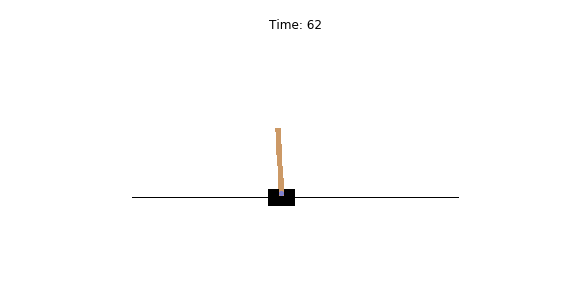
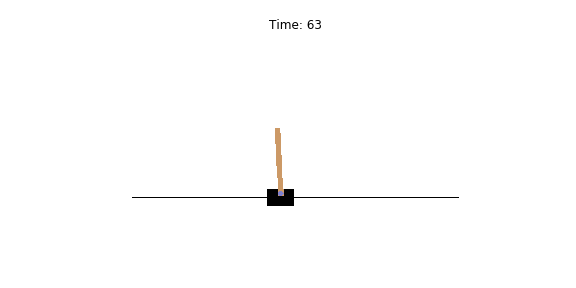
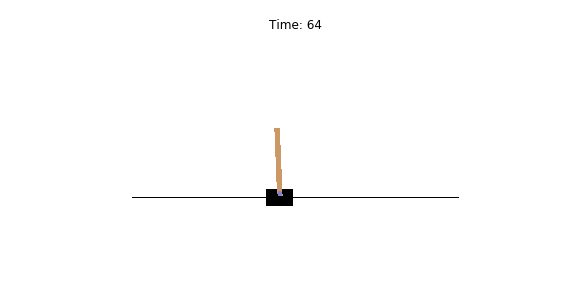
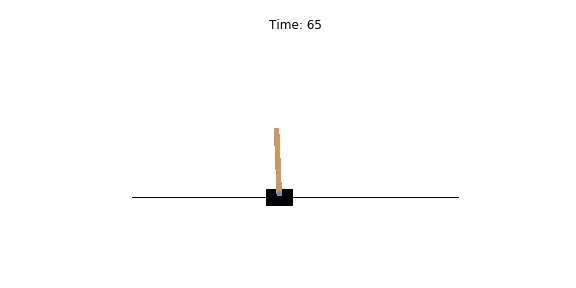
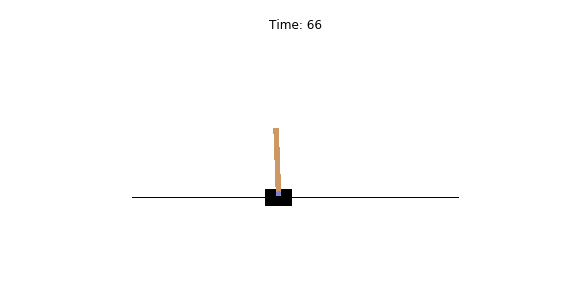
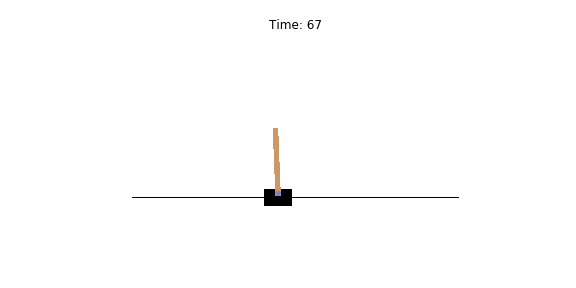
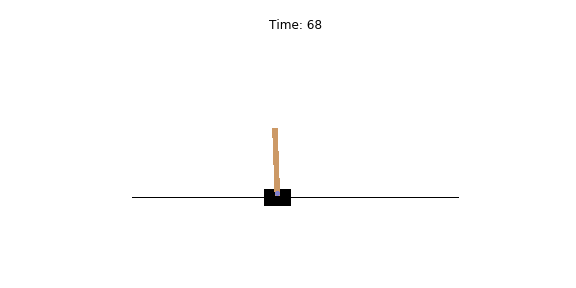
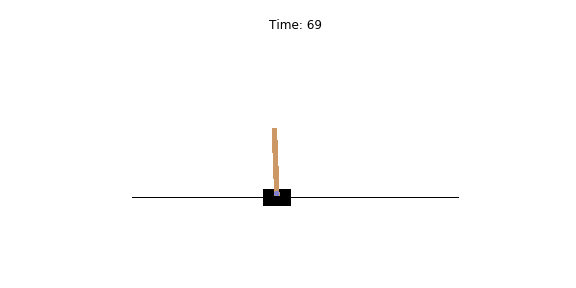
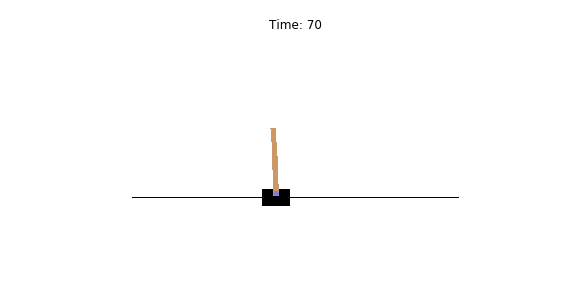
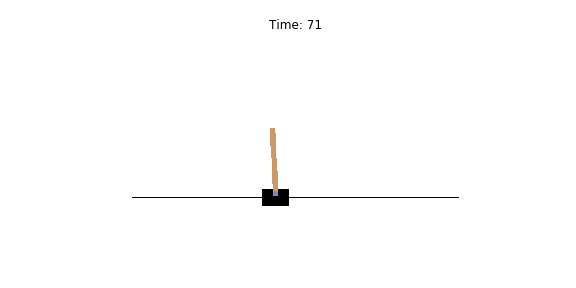
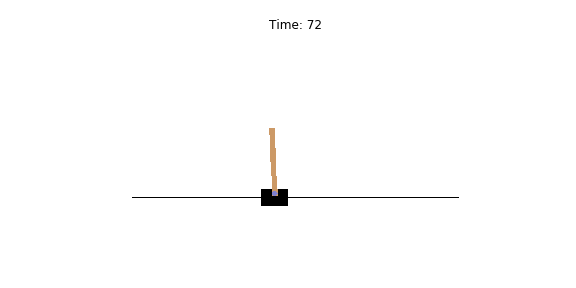
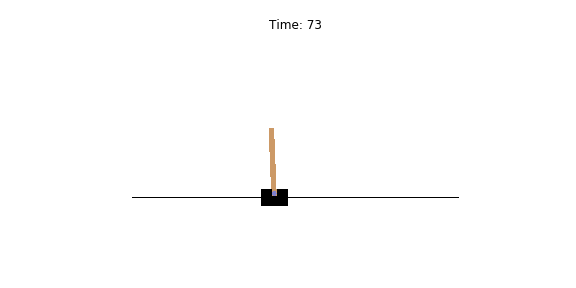
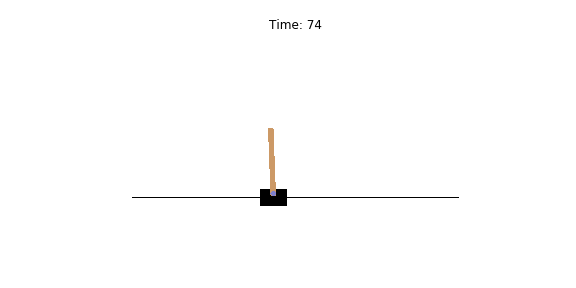
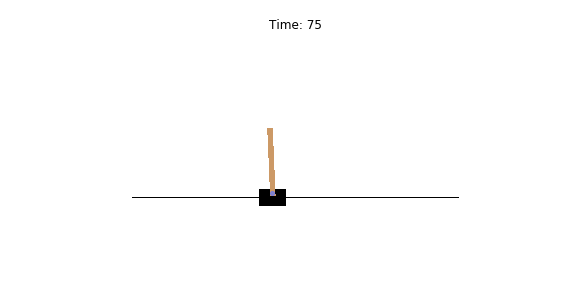
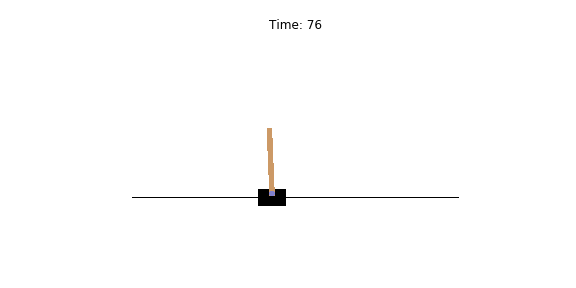
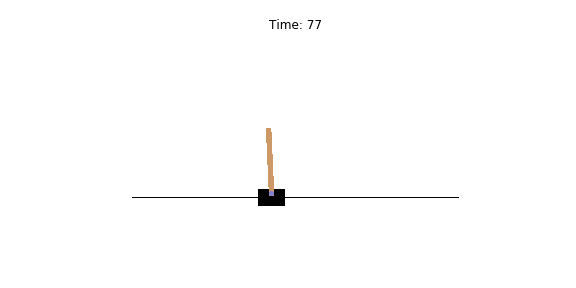
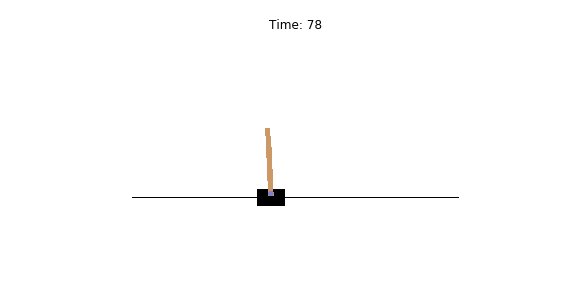
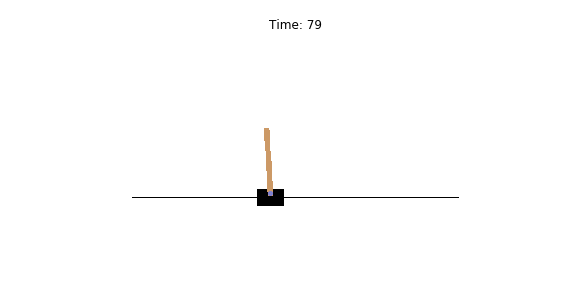
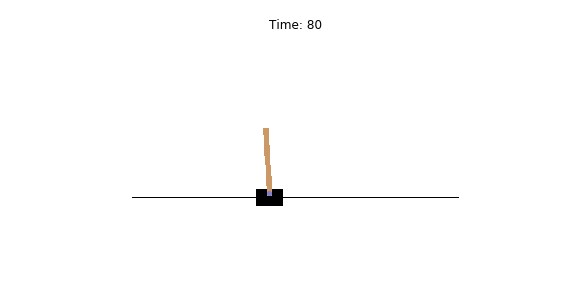
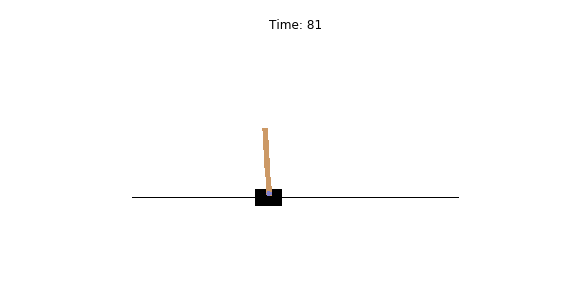
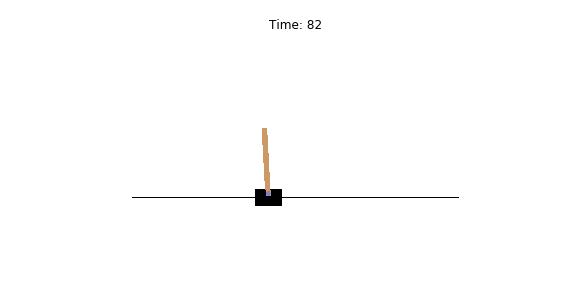
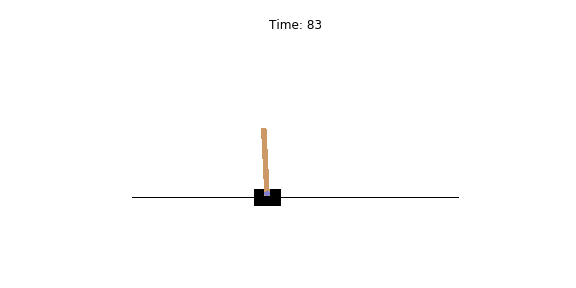
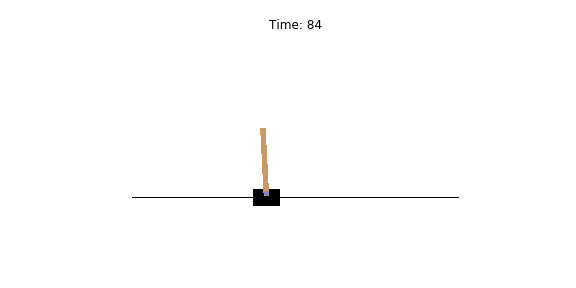
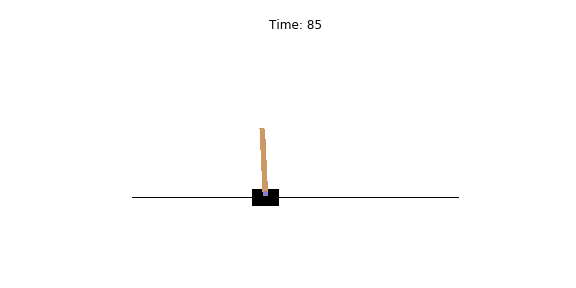
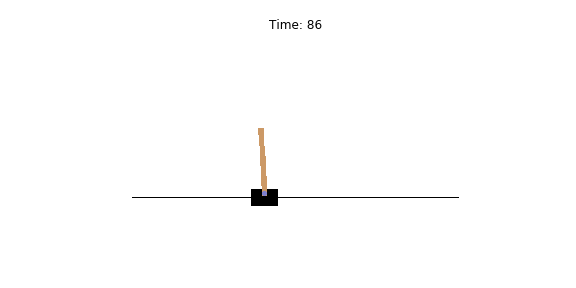
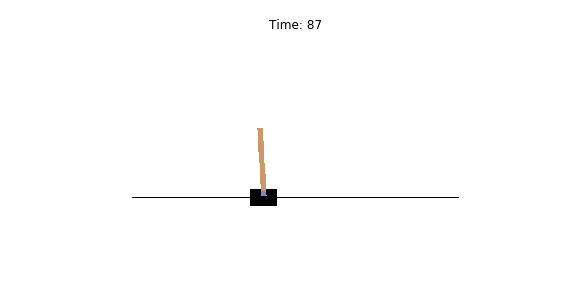
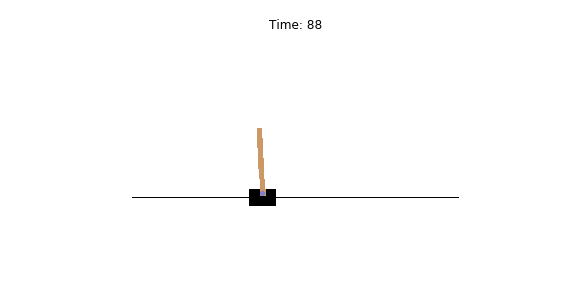
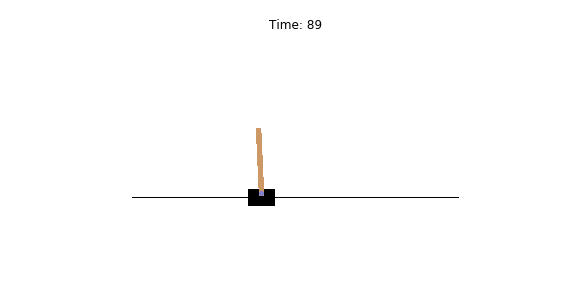
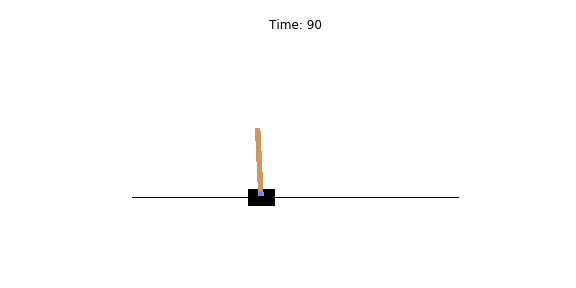
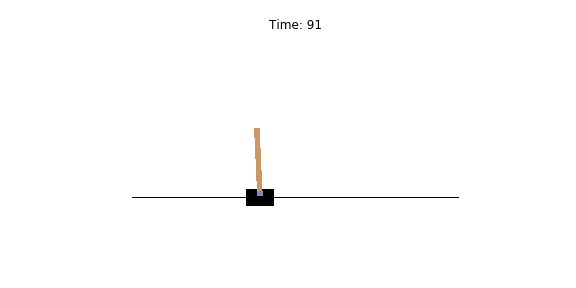
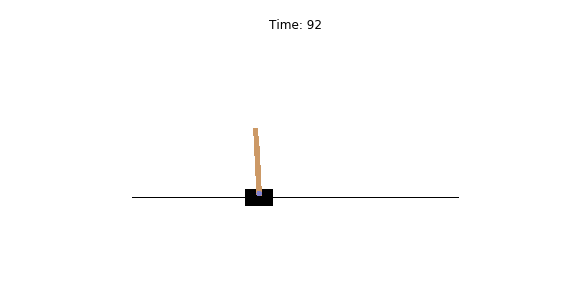
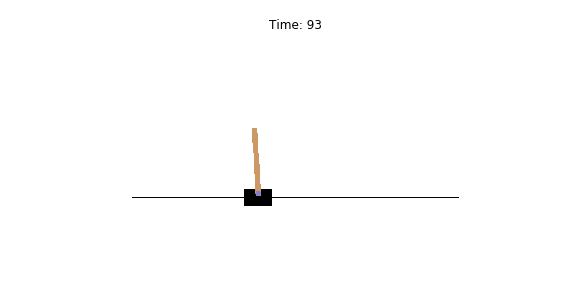
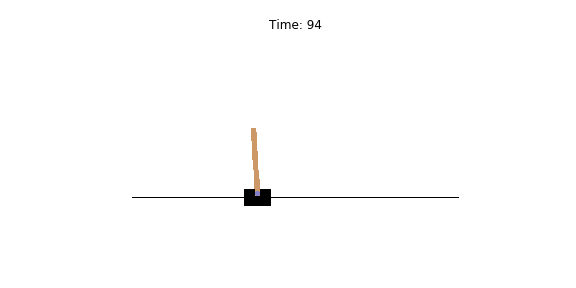
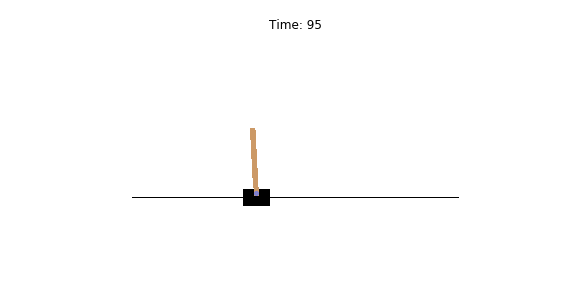
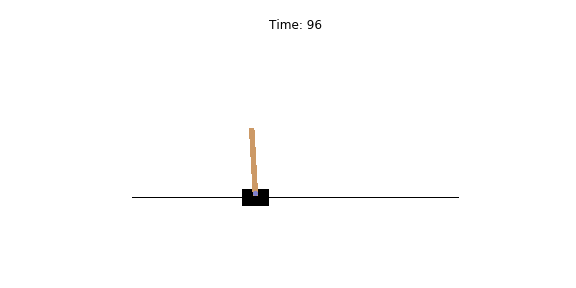
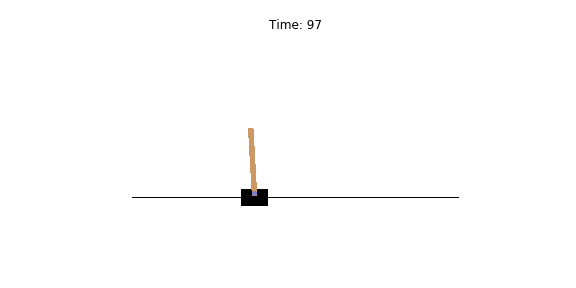
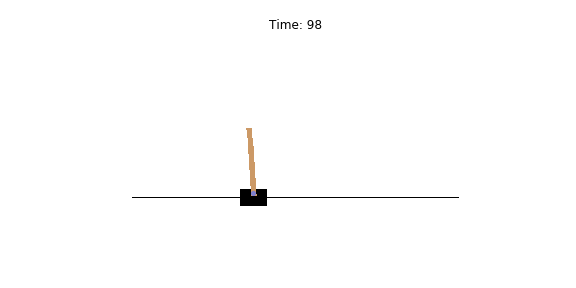
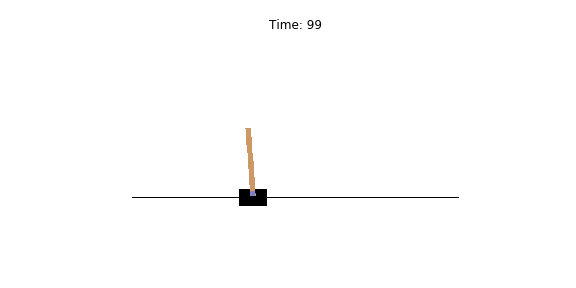
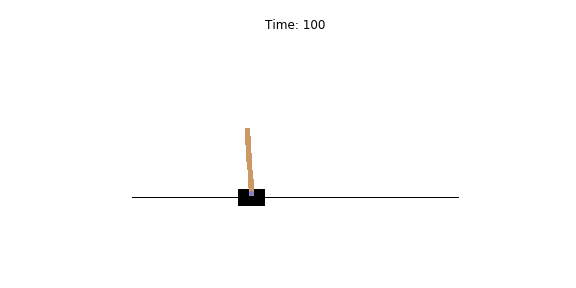
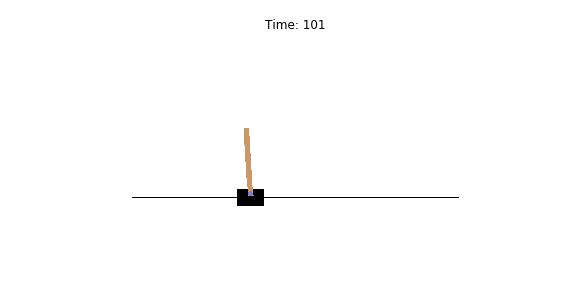
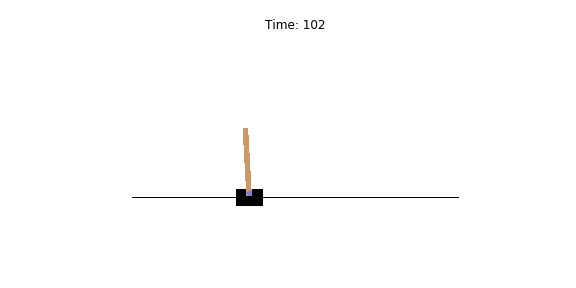
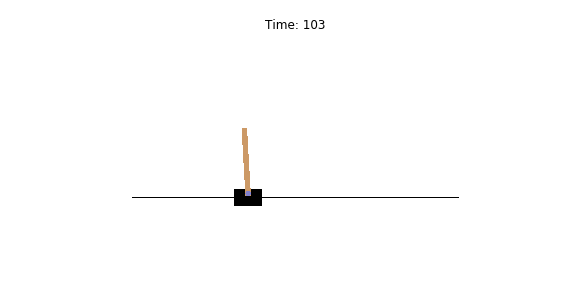
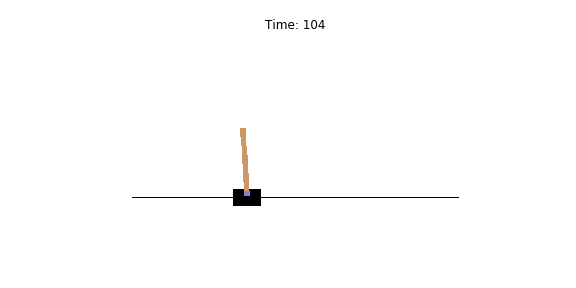
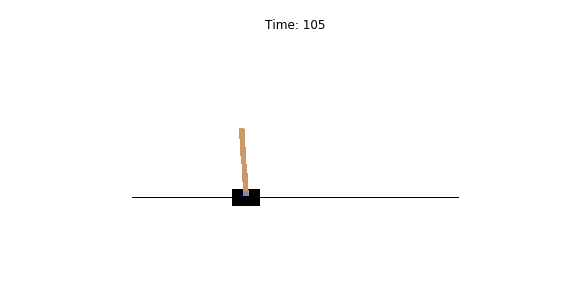
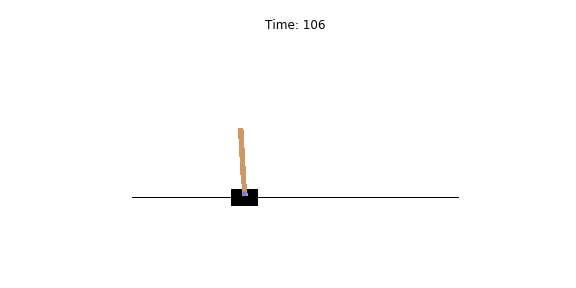
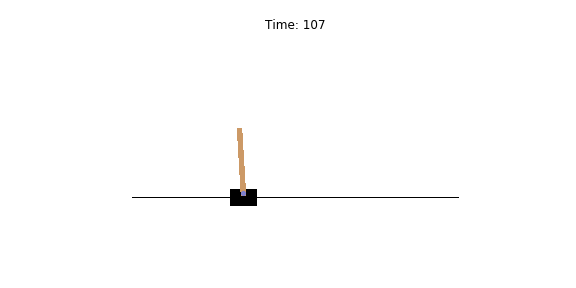
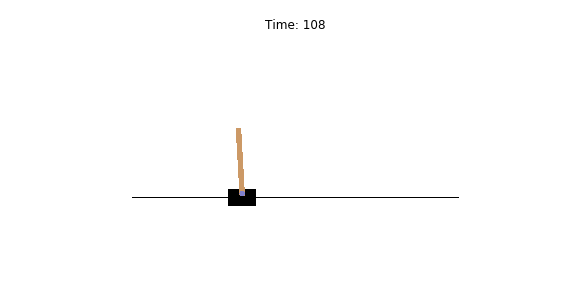
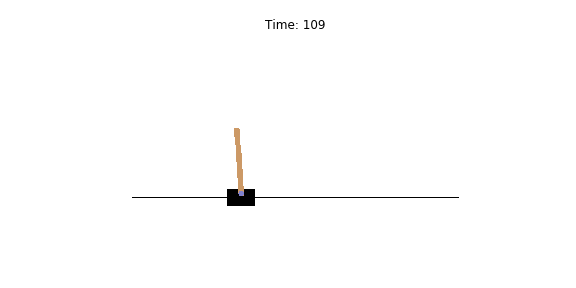
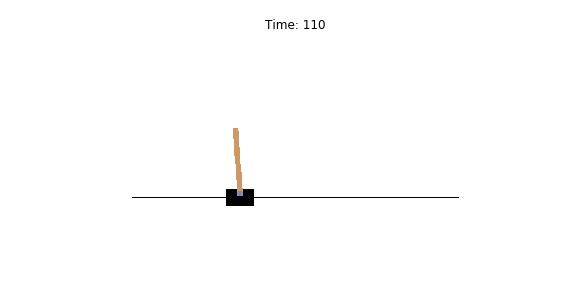
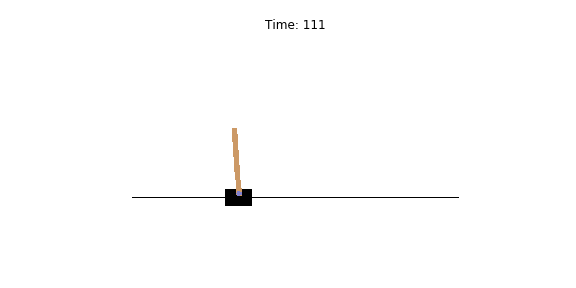
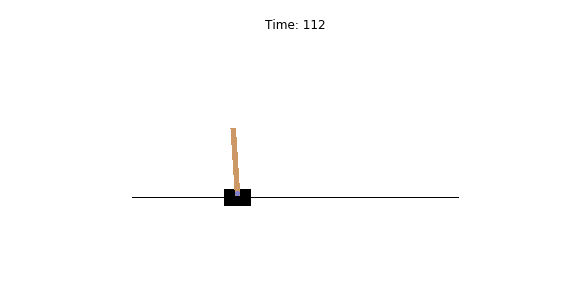
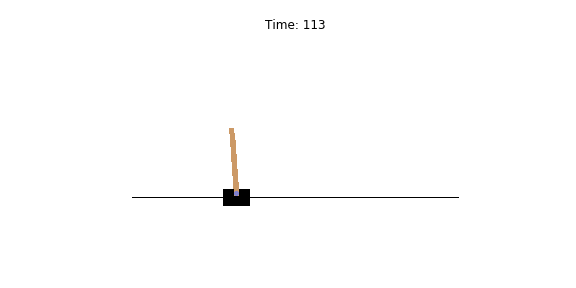
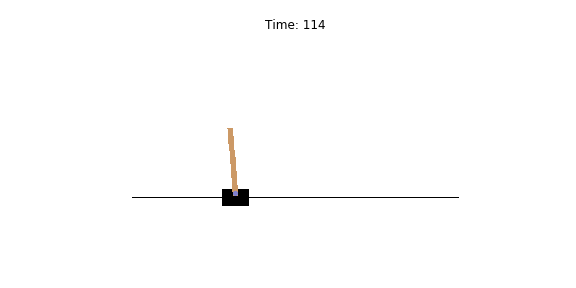
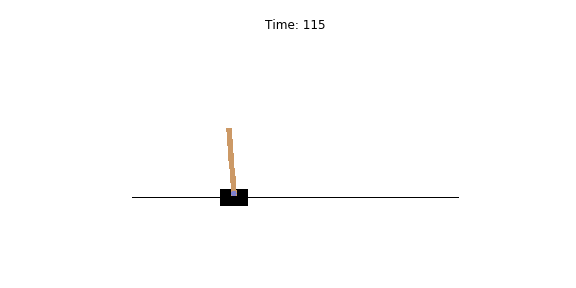
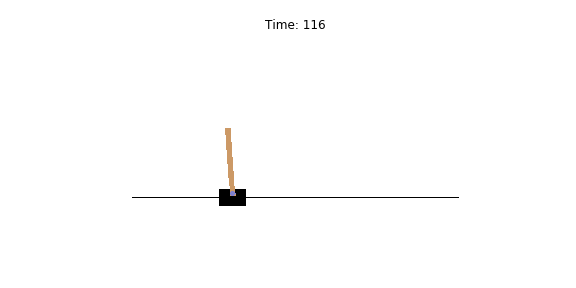
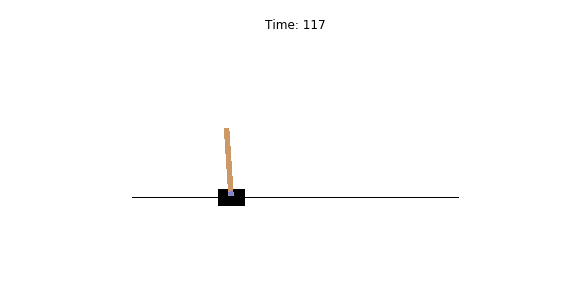
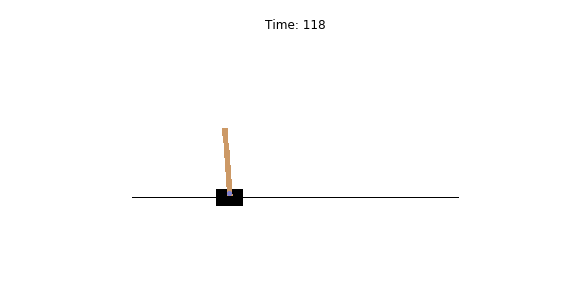
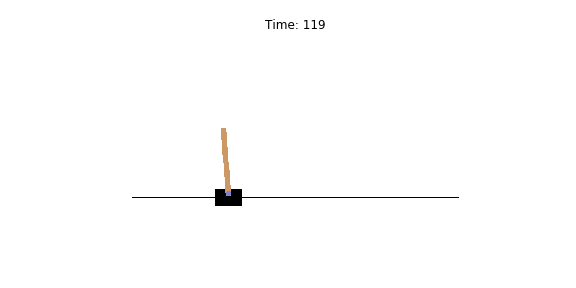
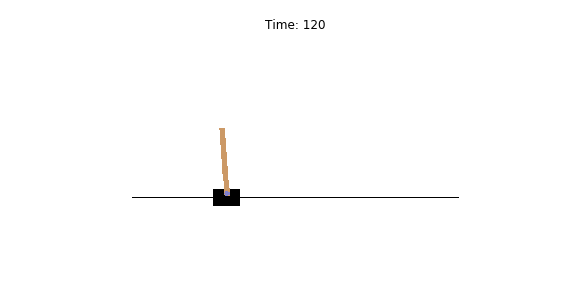
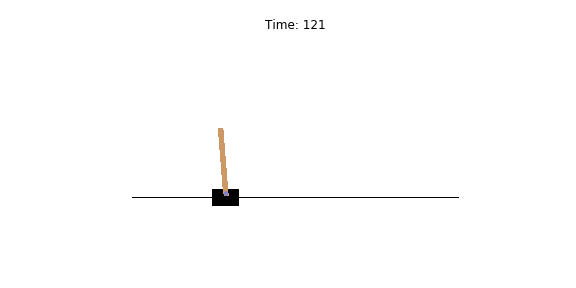
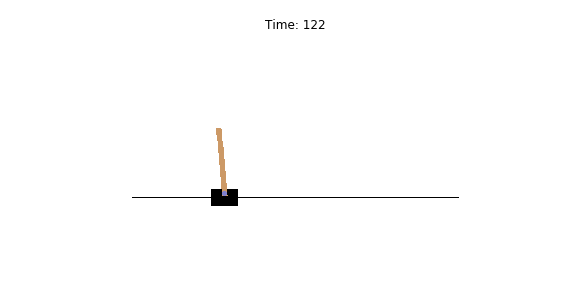
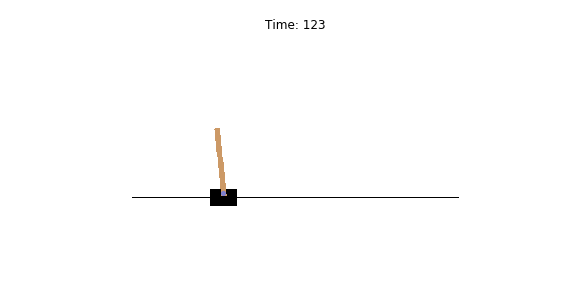
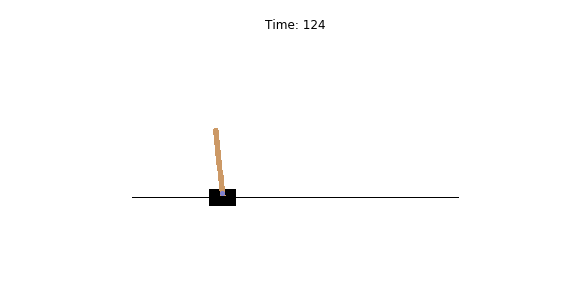
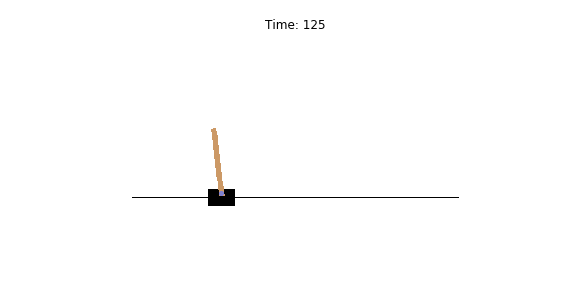
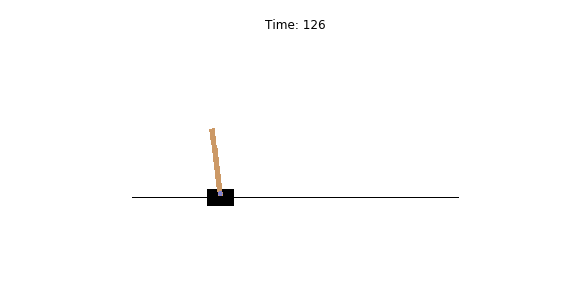
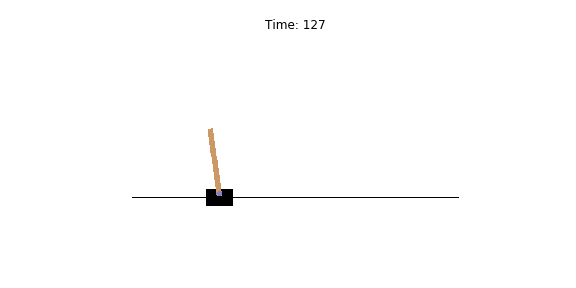
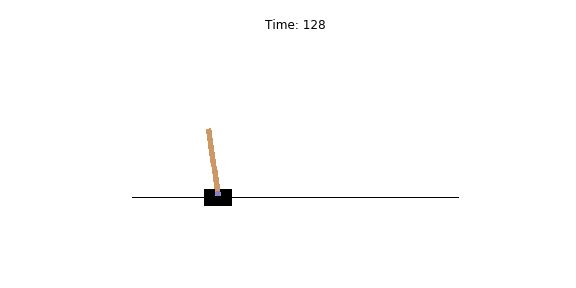
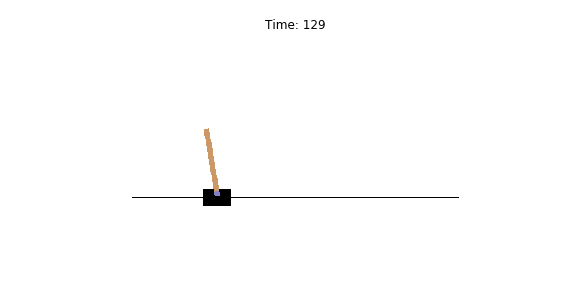
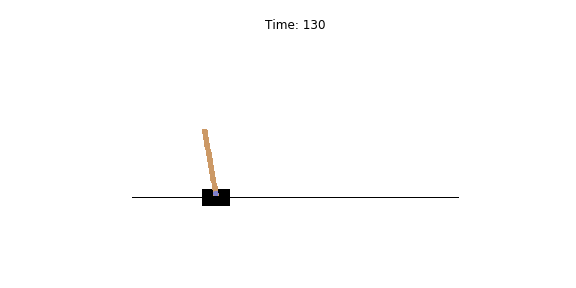
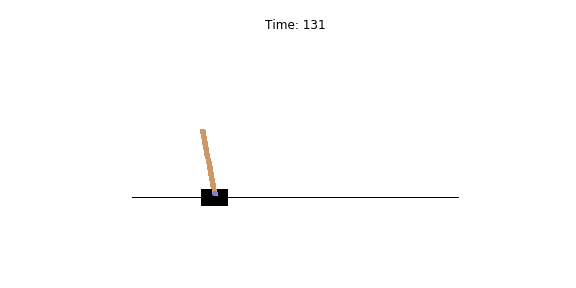
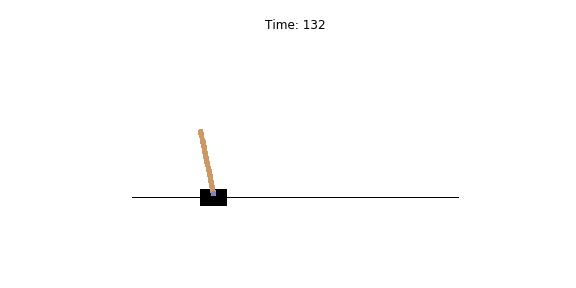

Episode [1000] Finished after: [133] steps, Reward: [133.00], Average Reward: [171.99]
Episode [1100] Finished after: [164] steps, Reward: [164.00], Average Reward: [165.03]
Episode [1200] Finished after: [200] steps, Reward: [200.00], Average Reward: [174.94]
Episode [1300] Finished after: [200] steps, Reward: [200.00], Average Reward: [176.91]
Episode [1400] Finished after: [141] steps, Reward: [141.00], Average Reward: [175.13]



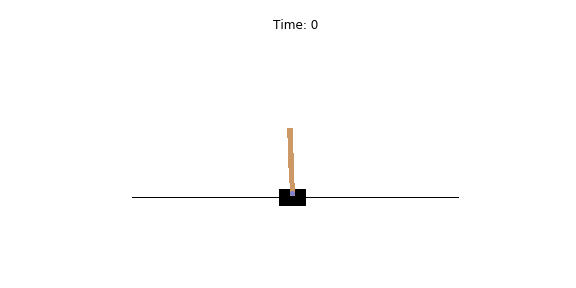
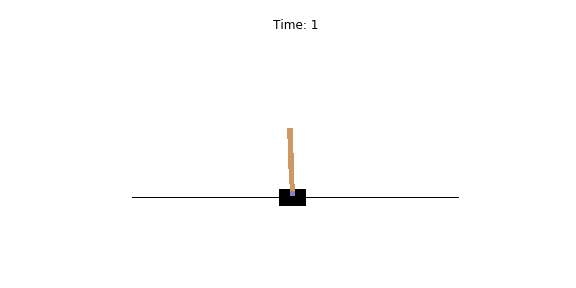
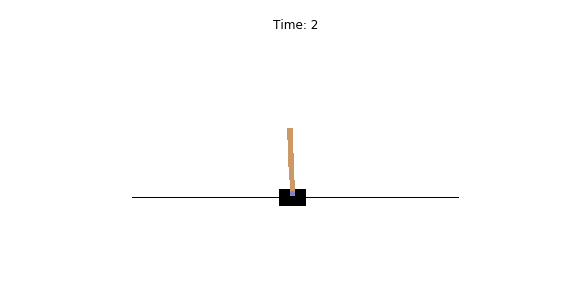
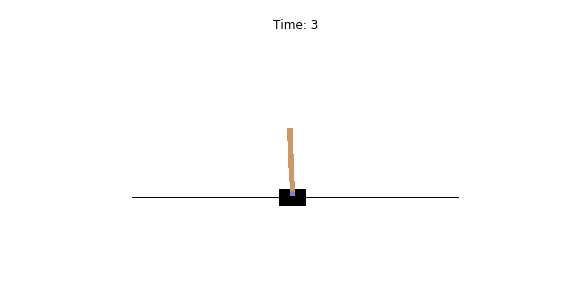
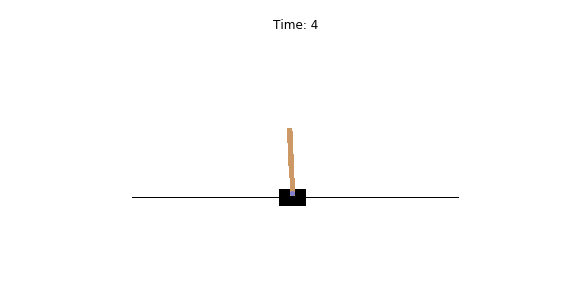
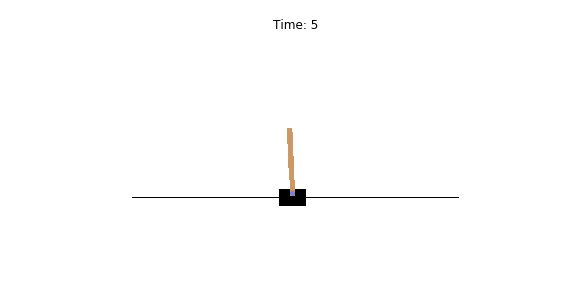
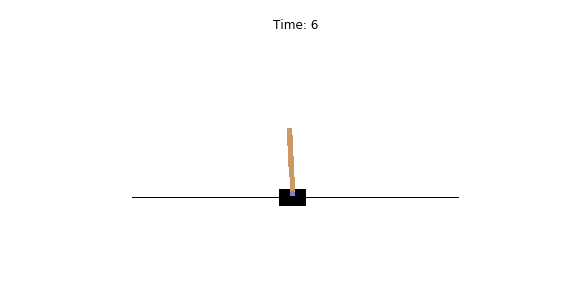
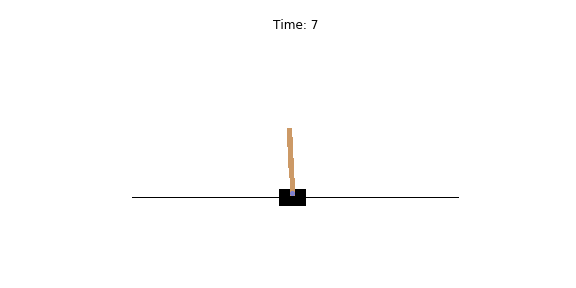
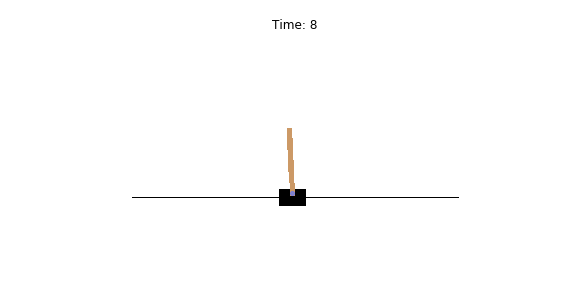
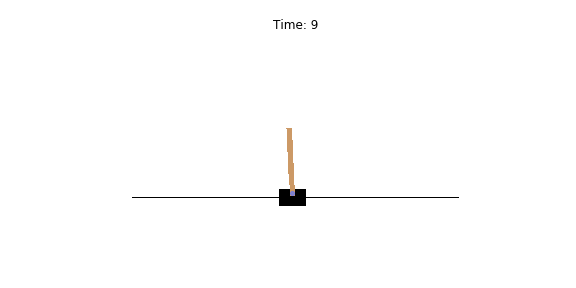
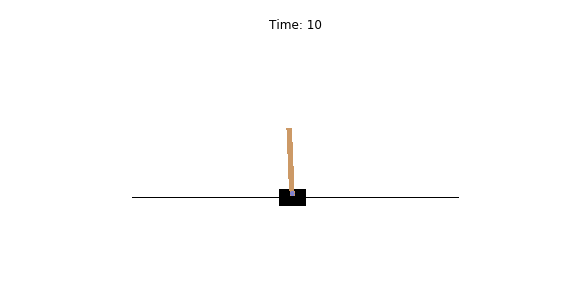
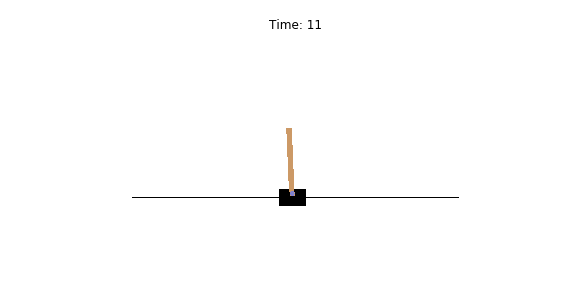
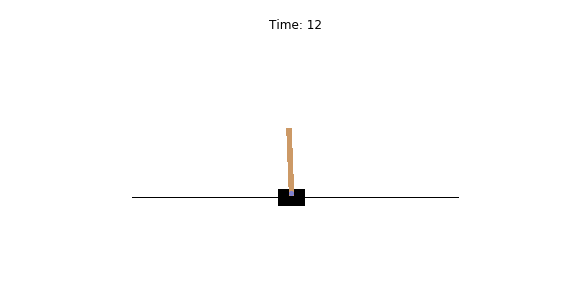
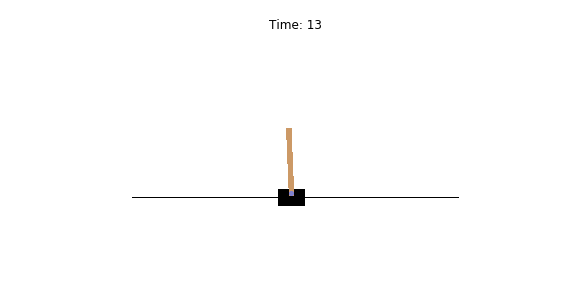
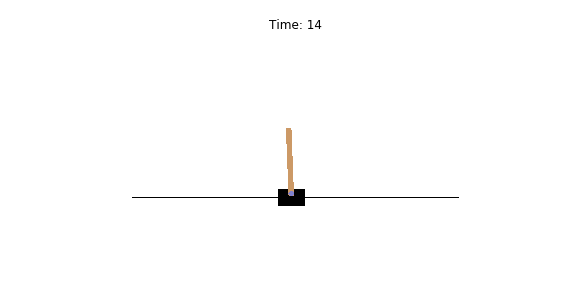
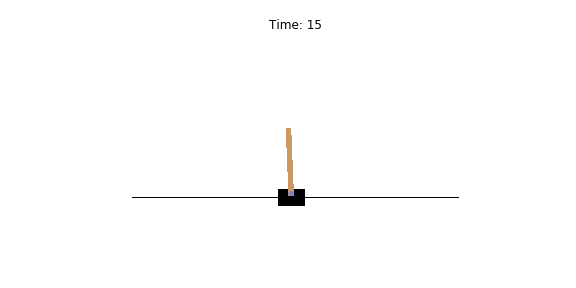
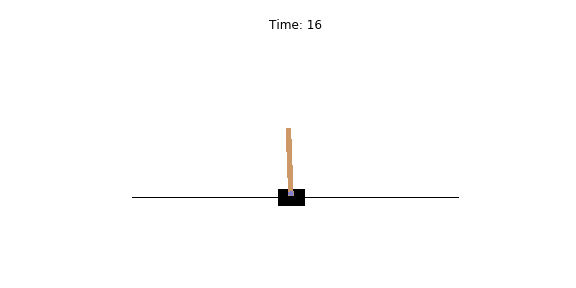
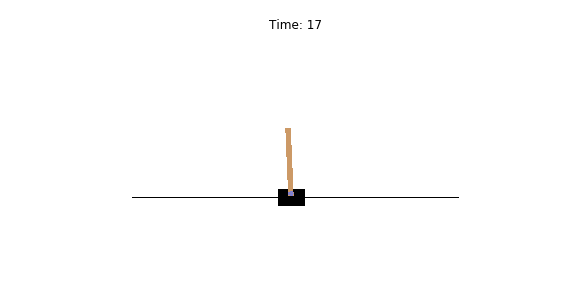
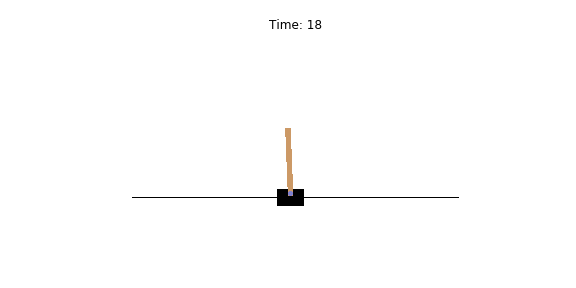
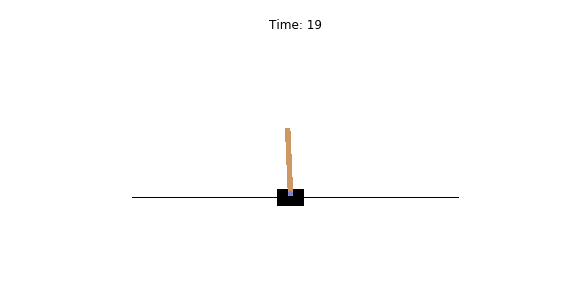
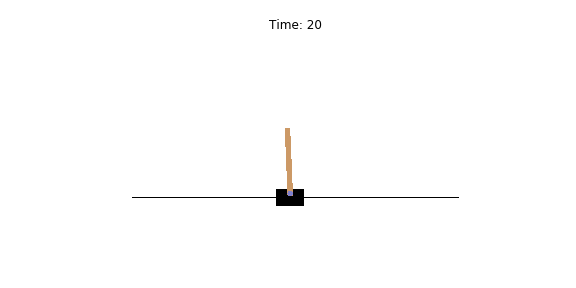
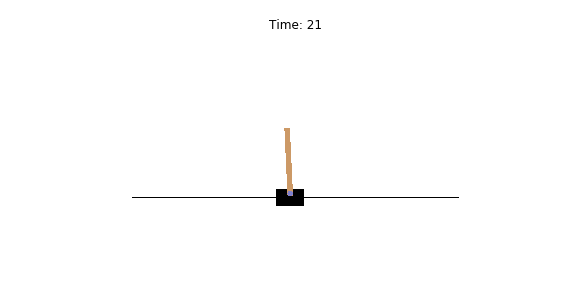
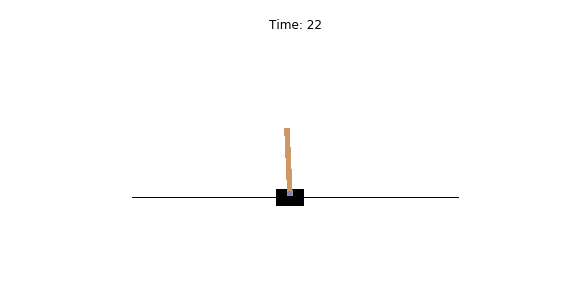
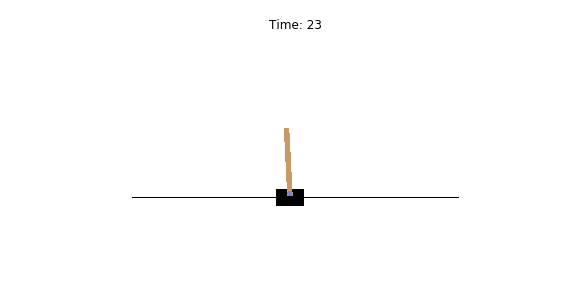
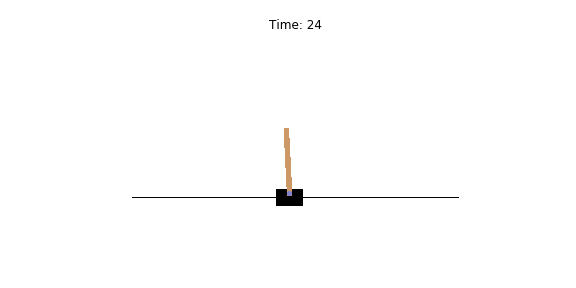
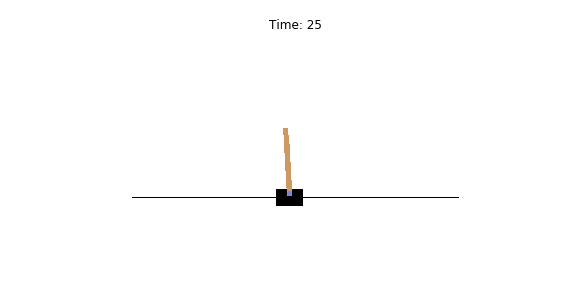
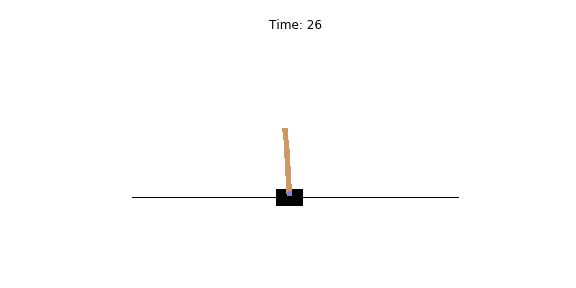
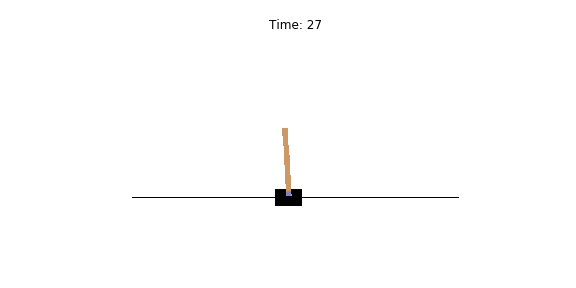
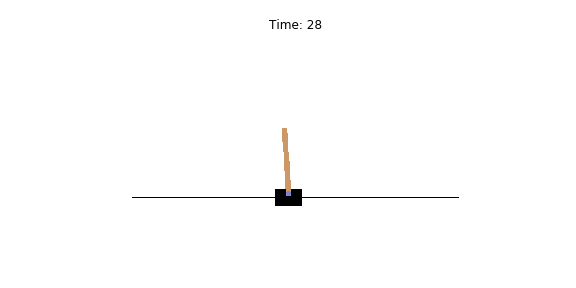
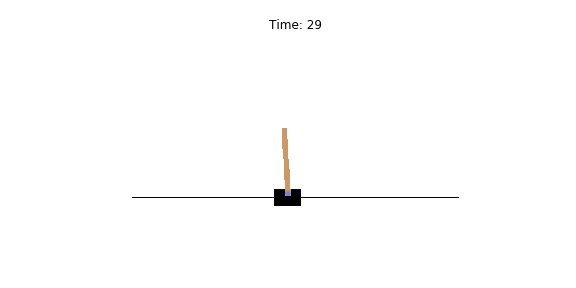
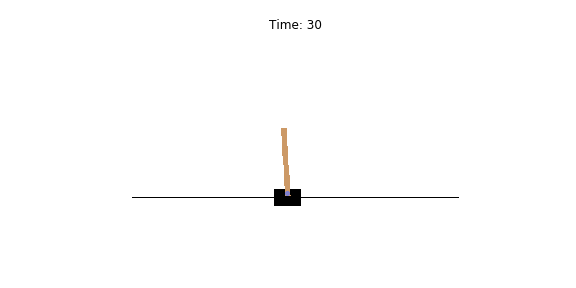
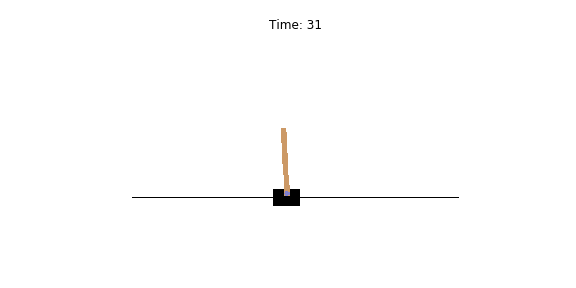
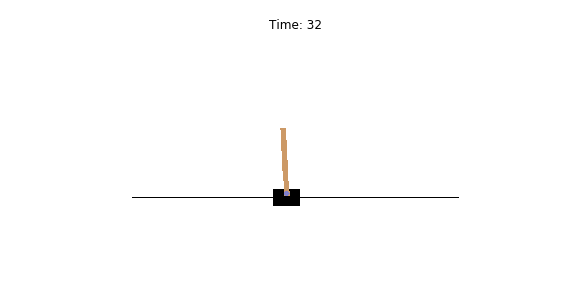
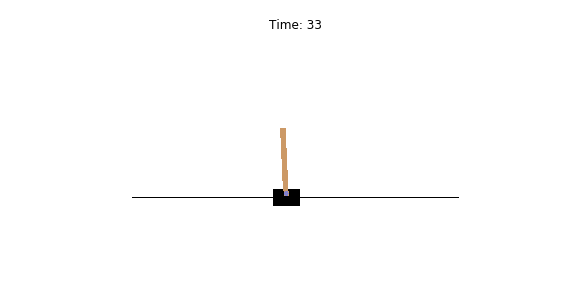
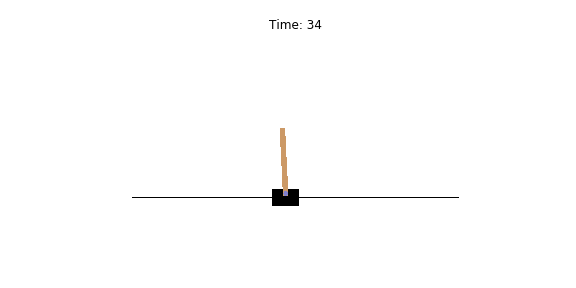
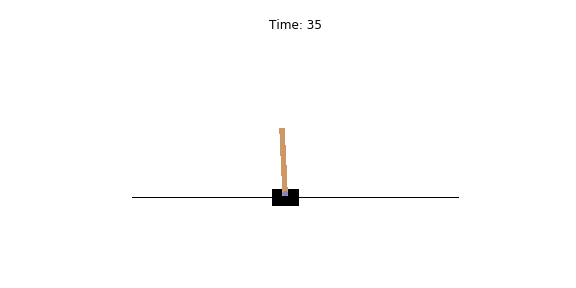
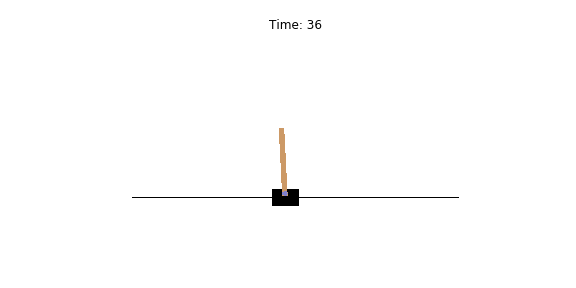
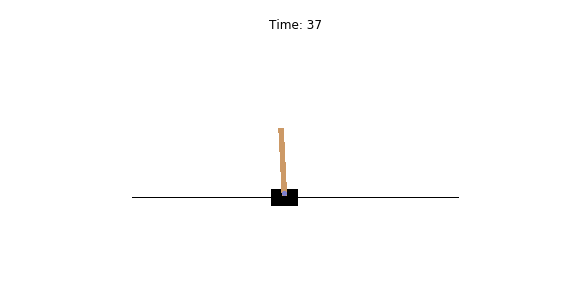
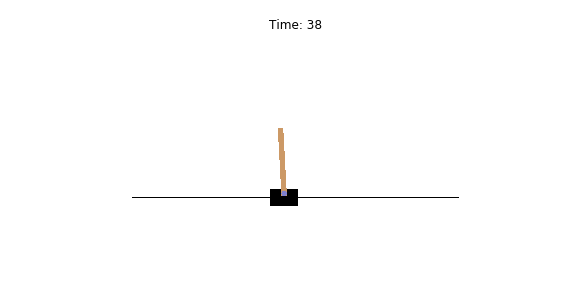
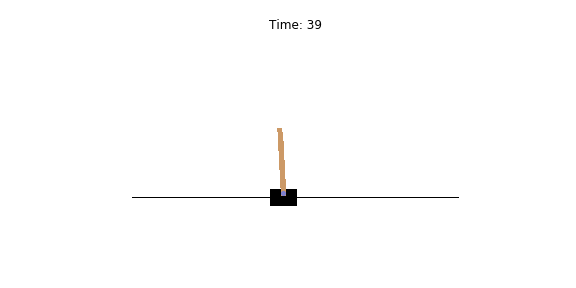
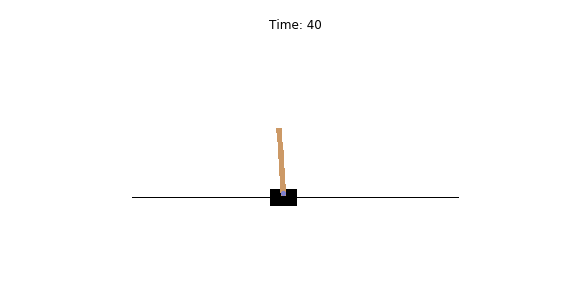
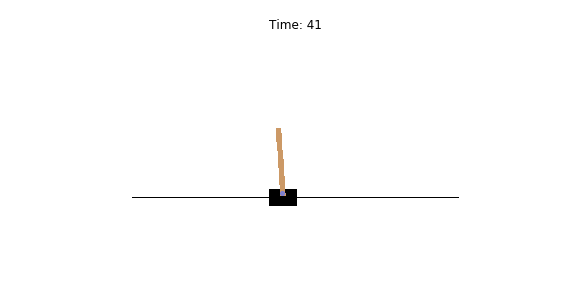
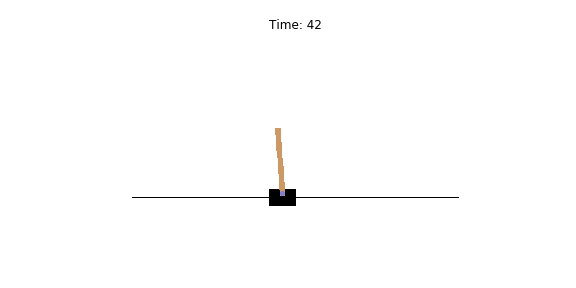
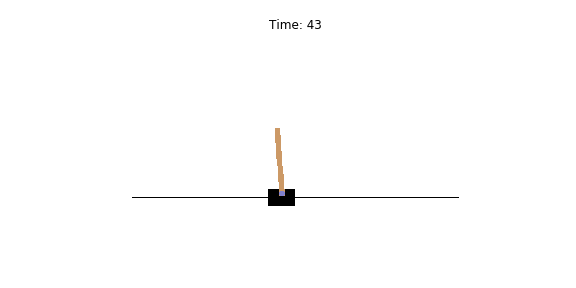
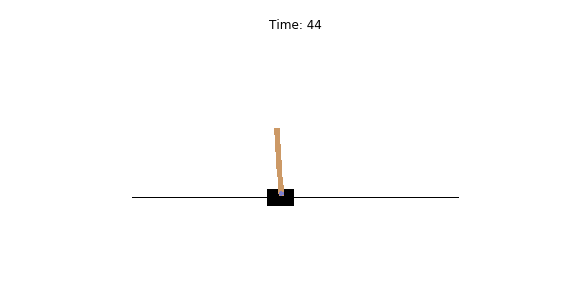
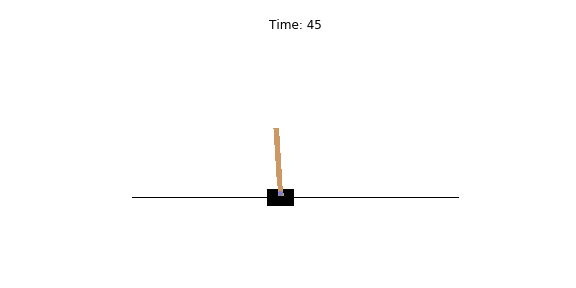
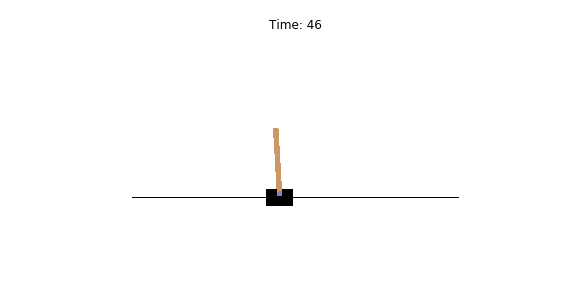
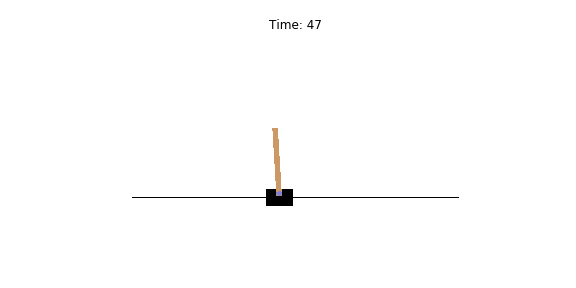
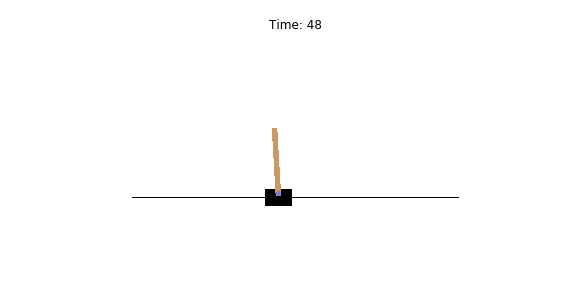
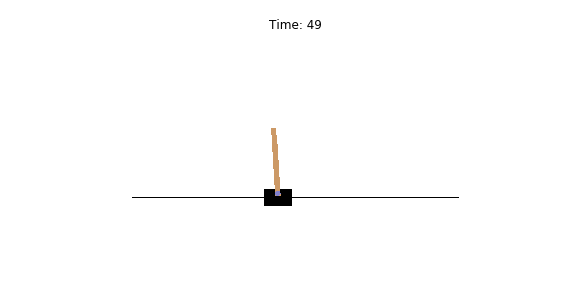
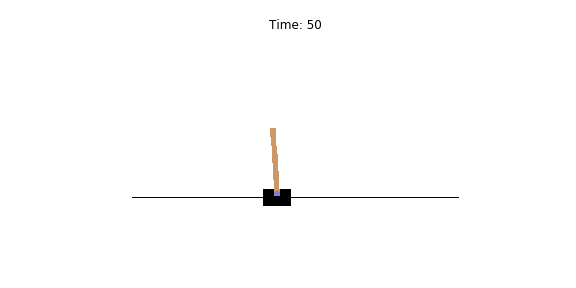
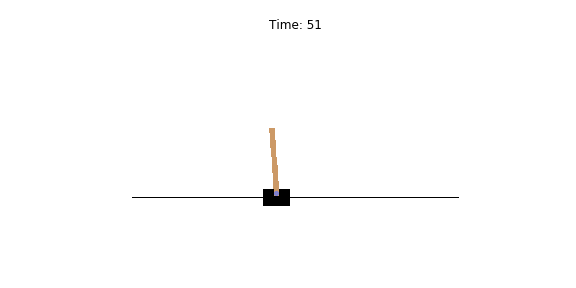
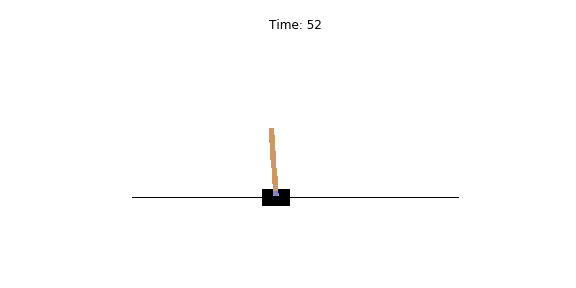
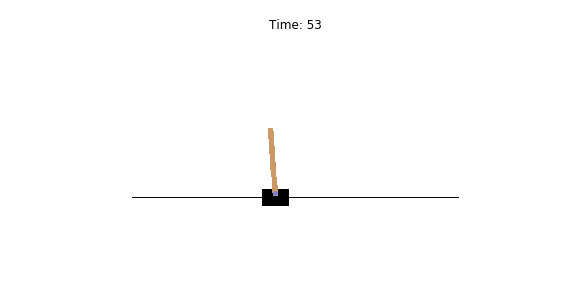
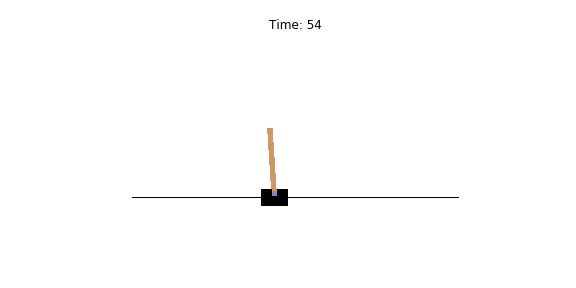
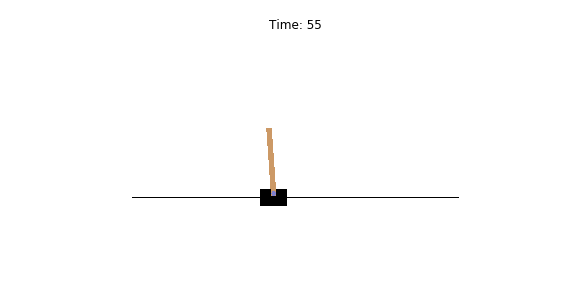
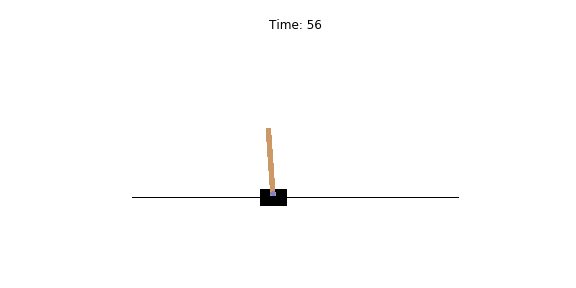
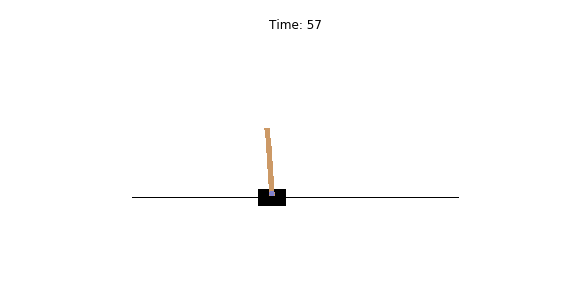
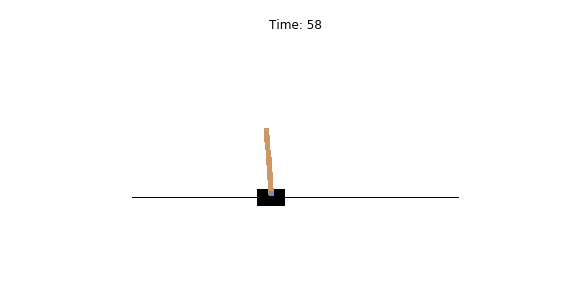
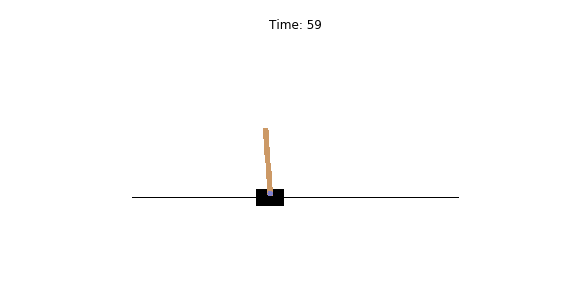
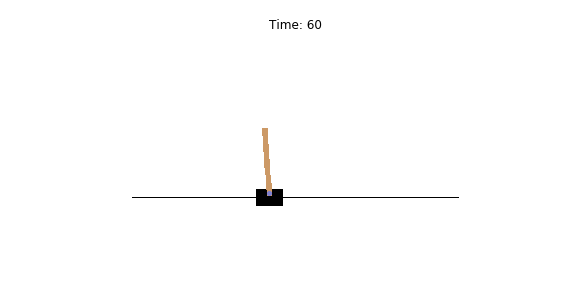
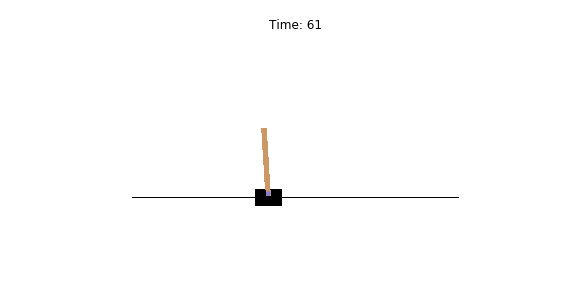
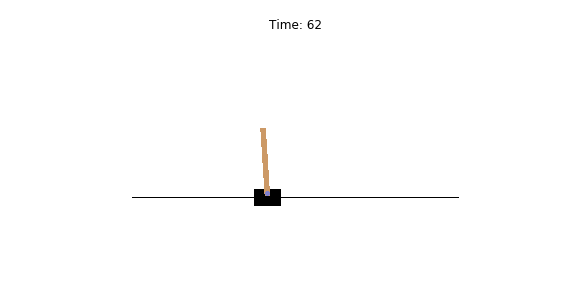
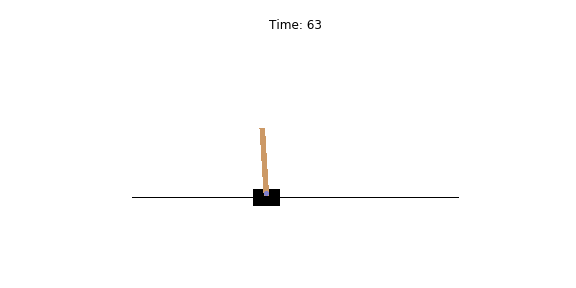
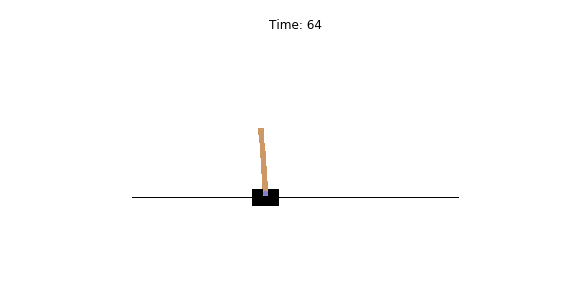
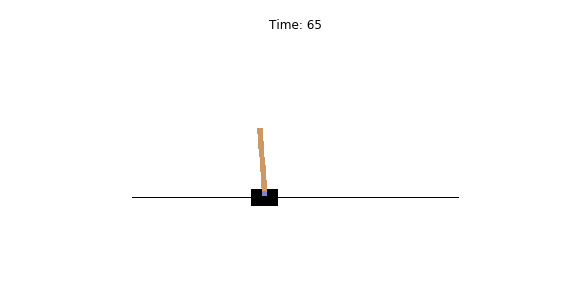
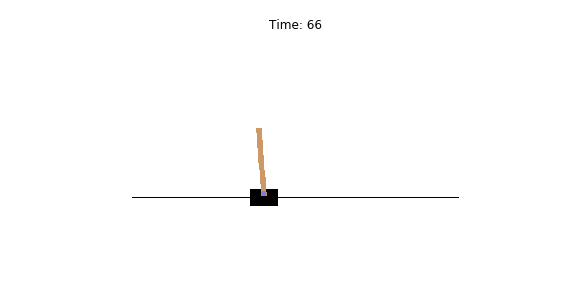
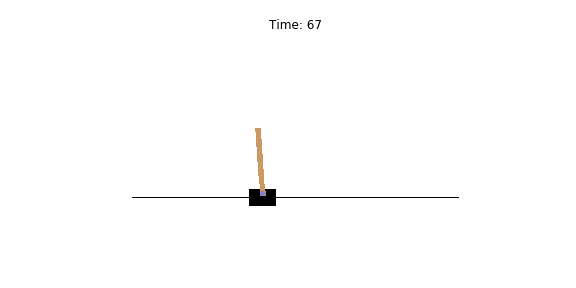
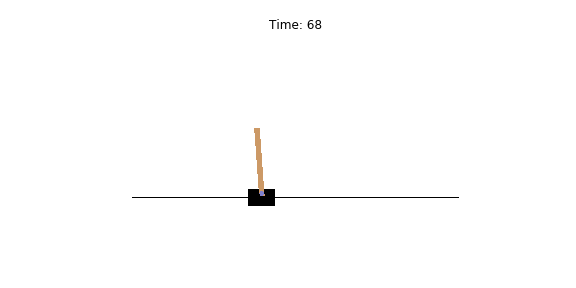
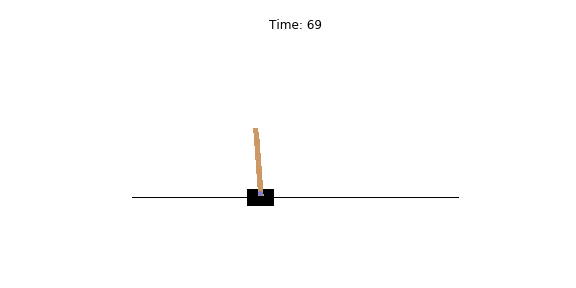
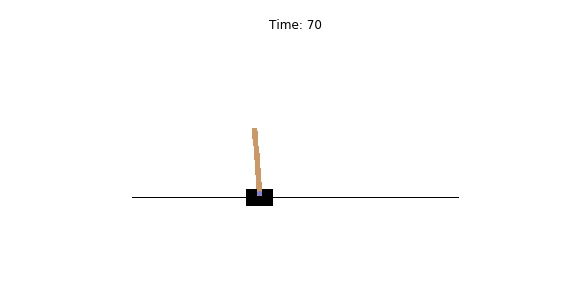
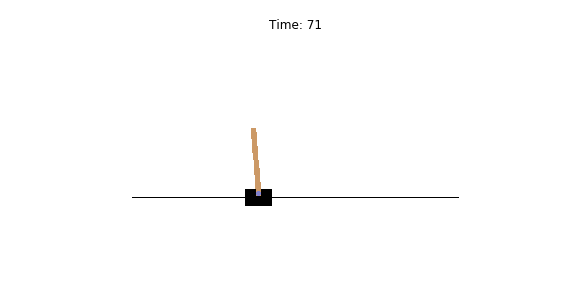
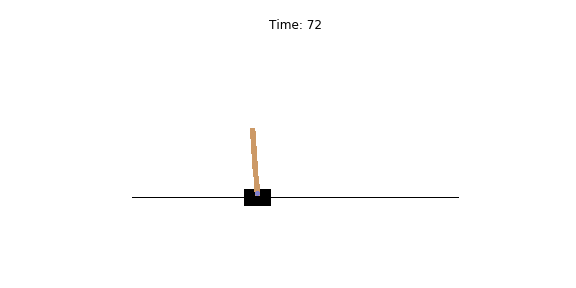
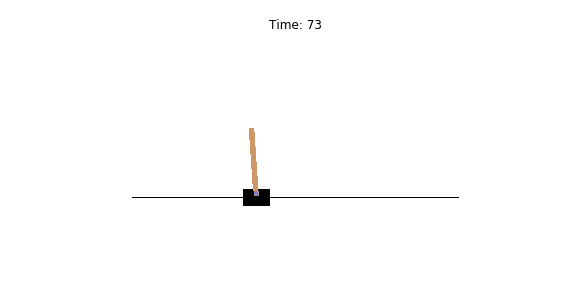
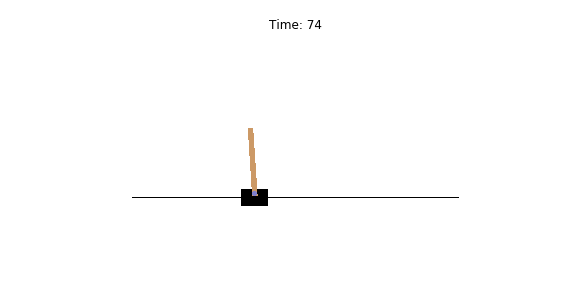
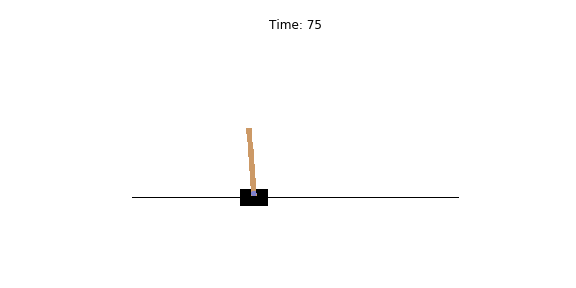
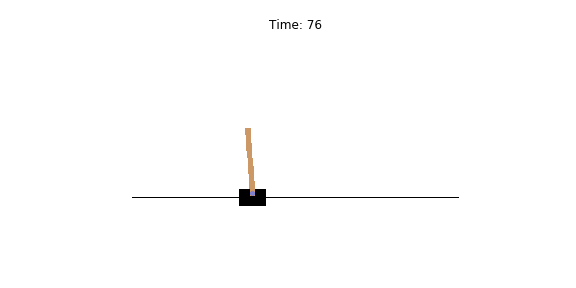
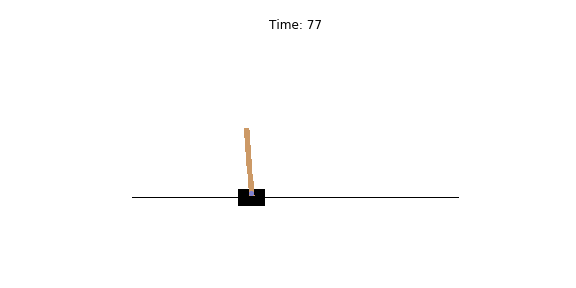
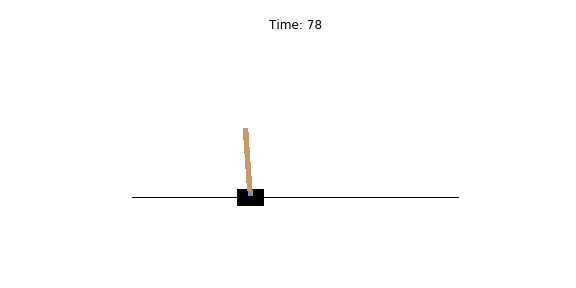
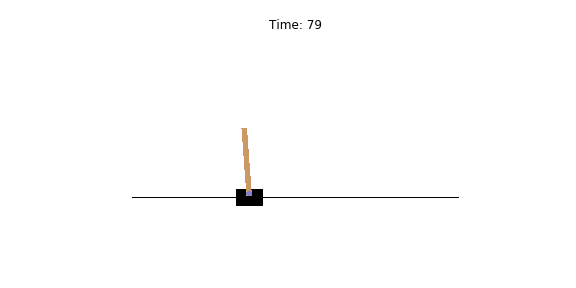
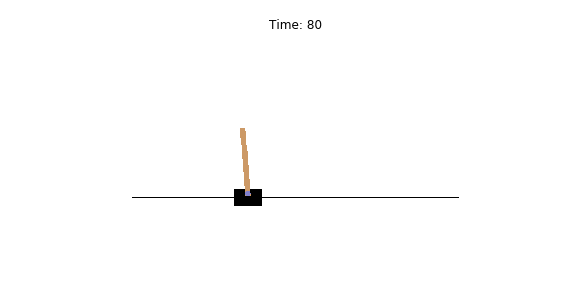
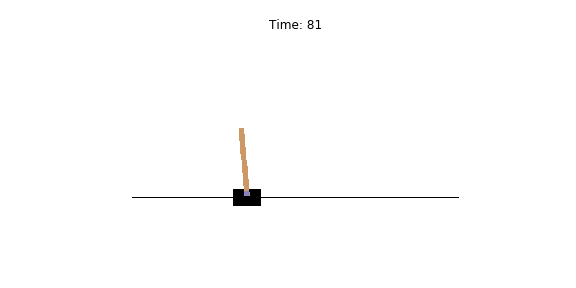
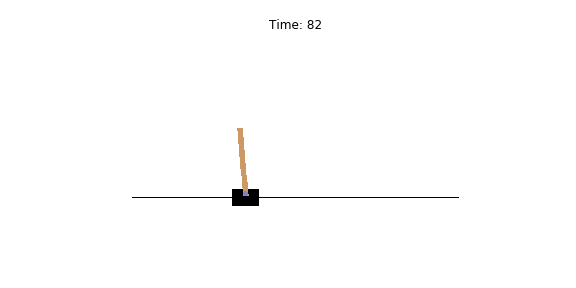
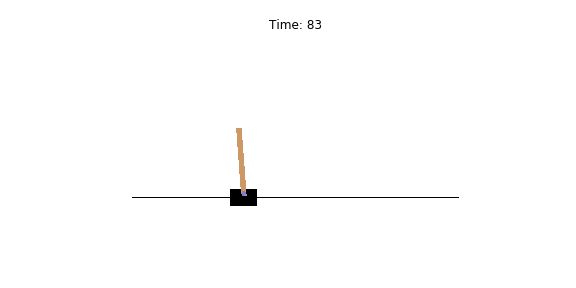
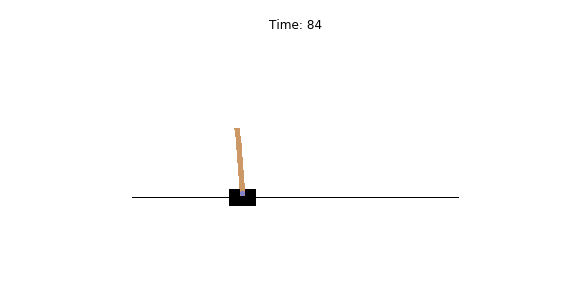
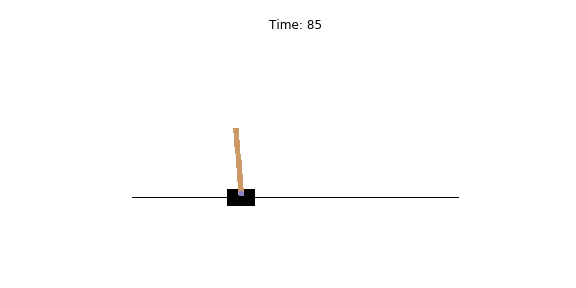
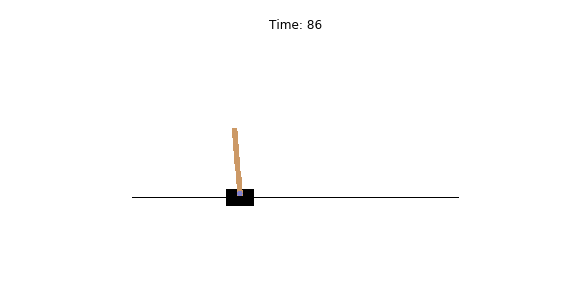
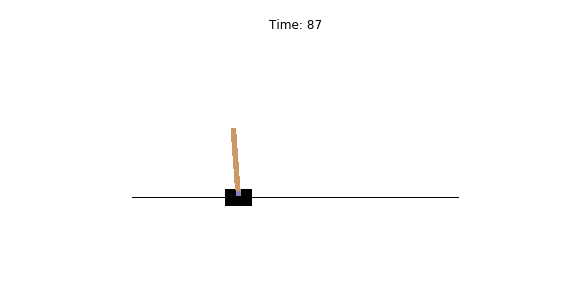
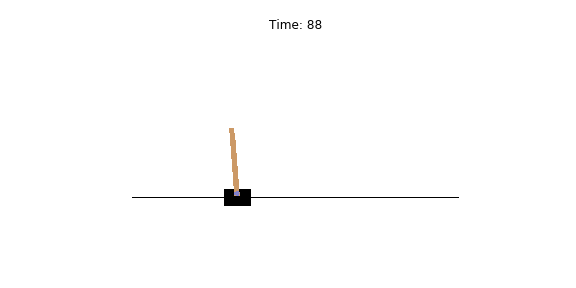
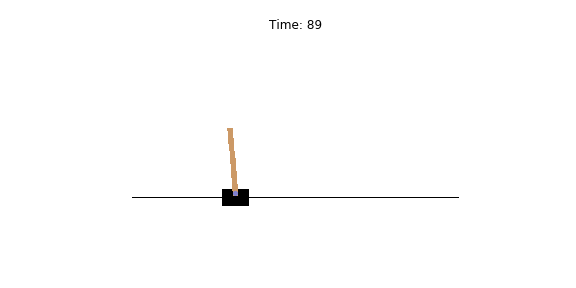
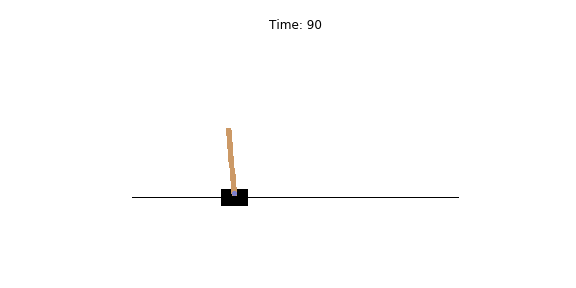
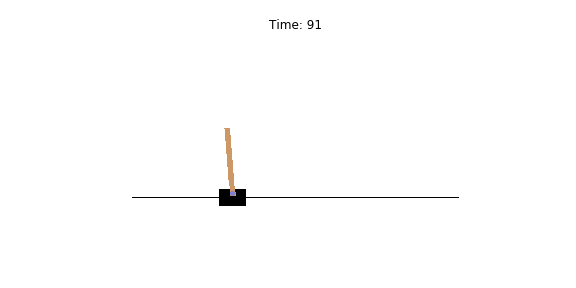
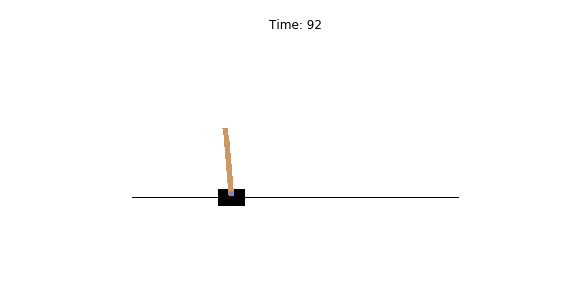
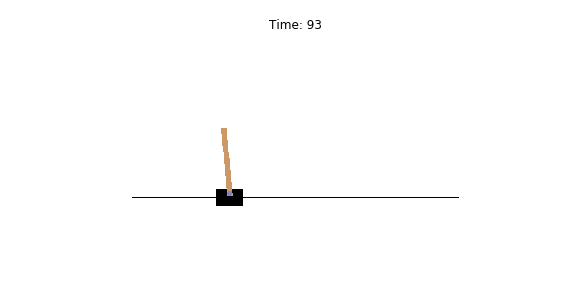
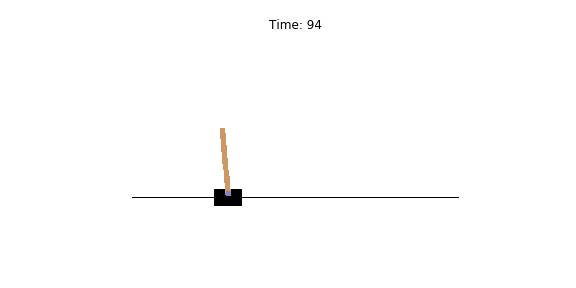
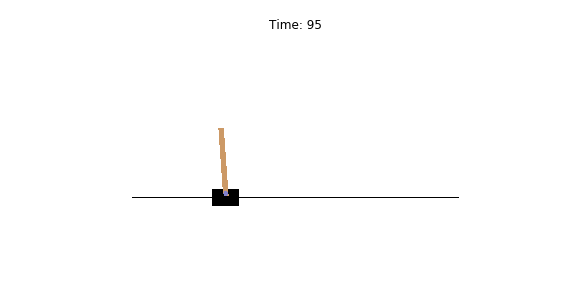
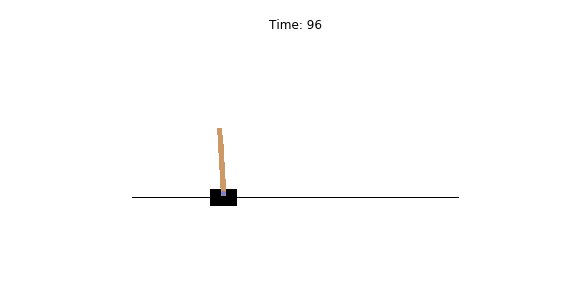
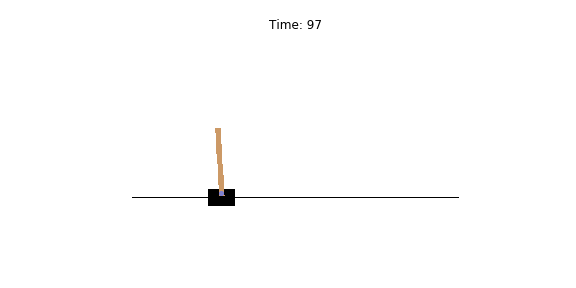
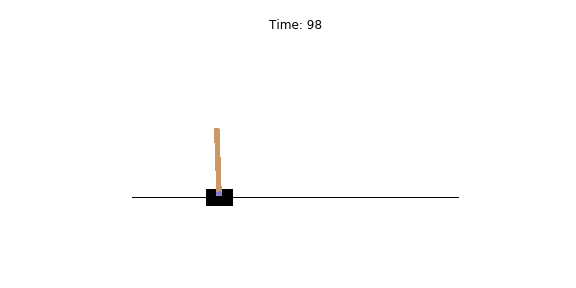
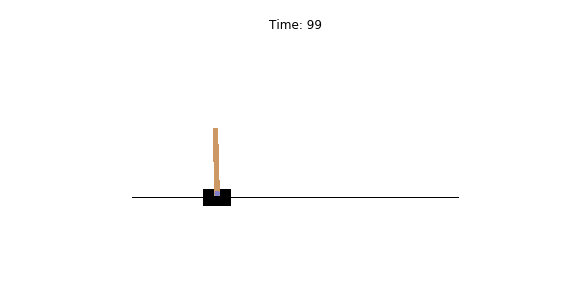
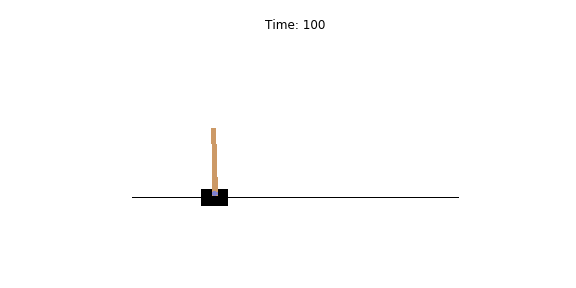
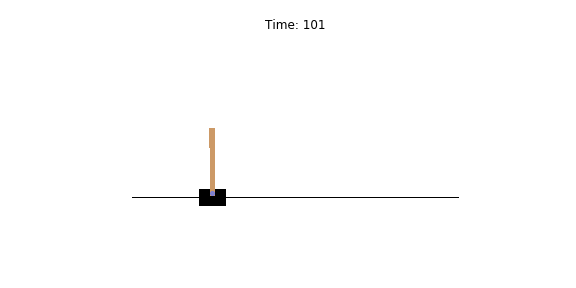
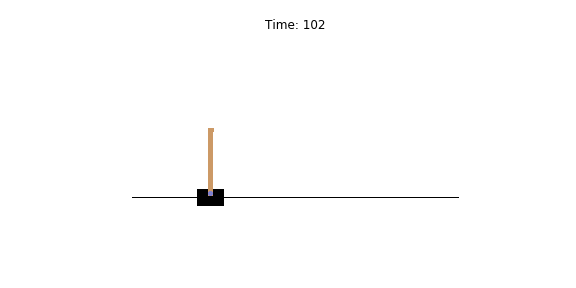
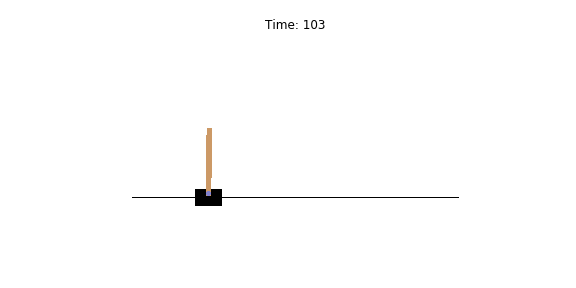
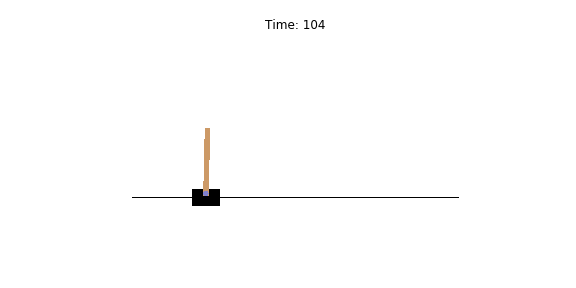
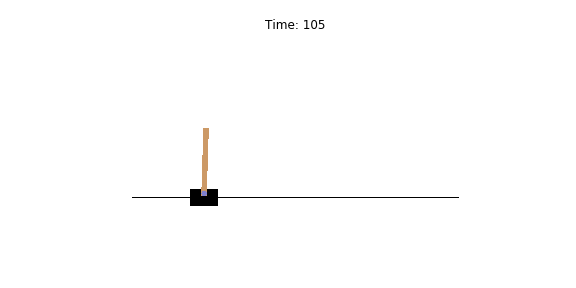
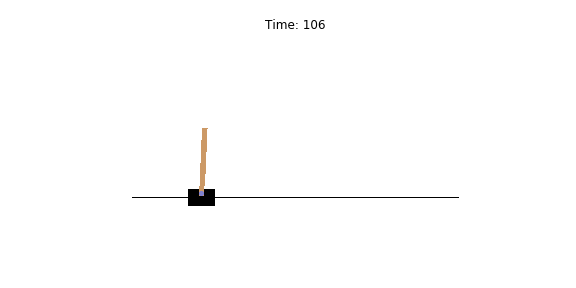
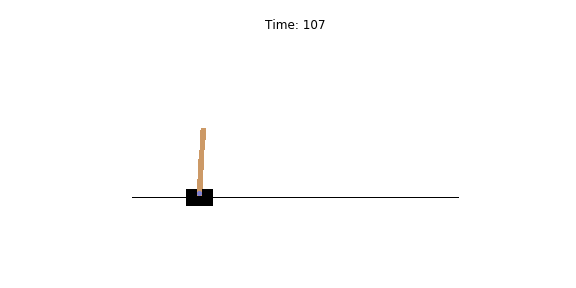
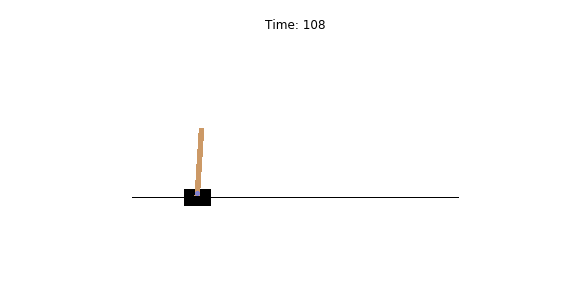
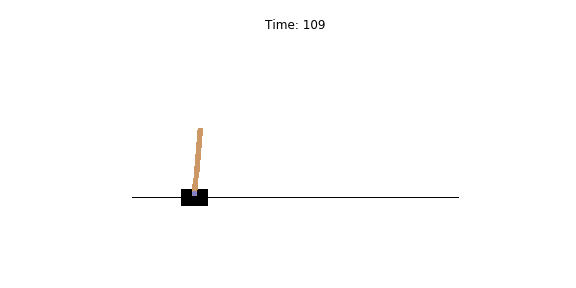
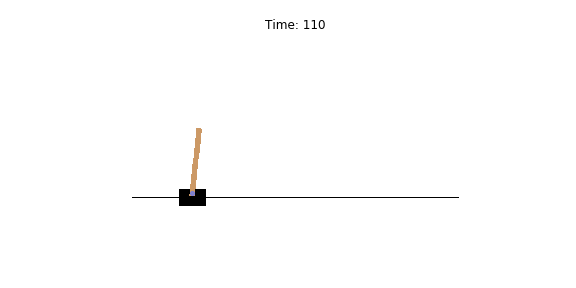
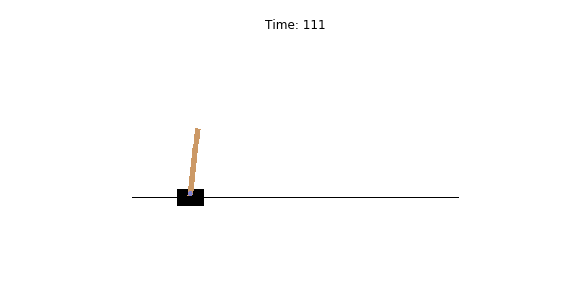
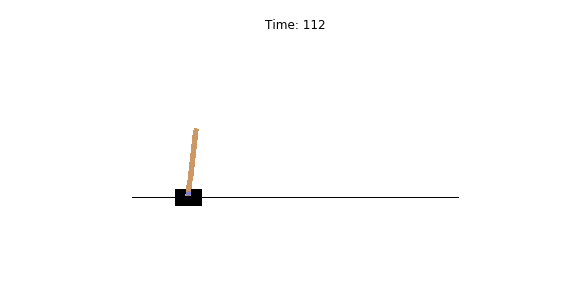
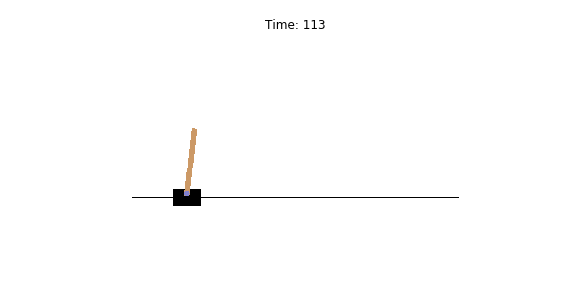
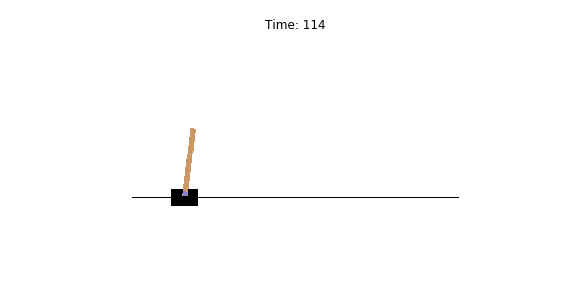
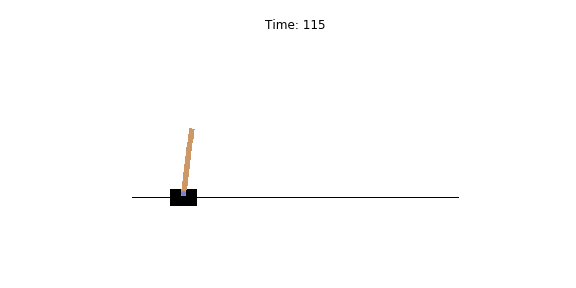
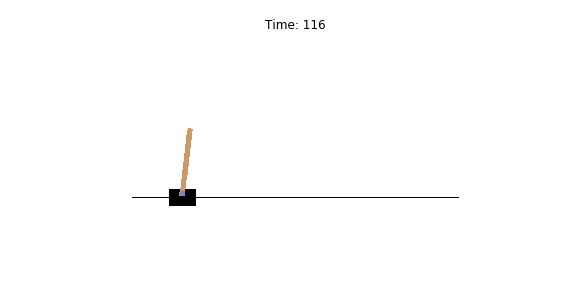
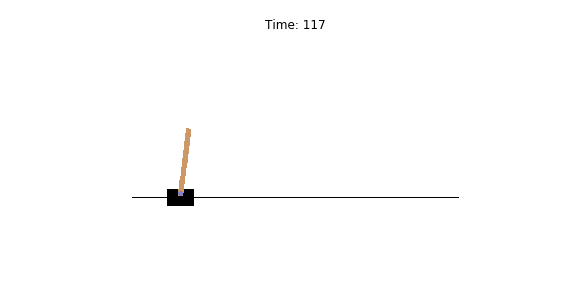
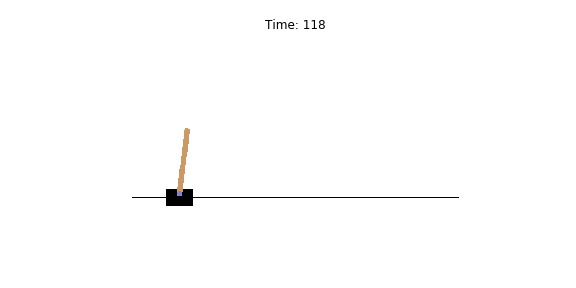
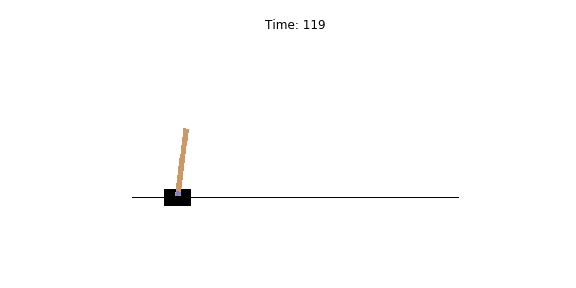
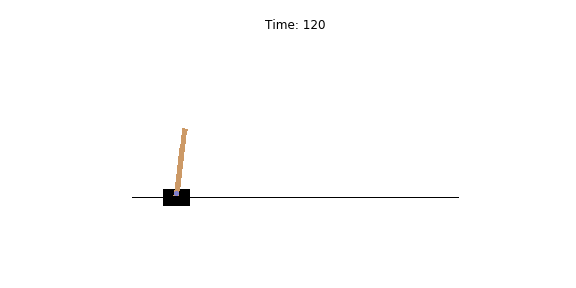
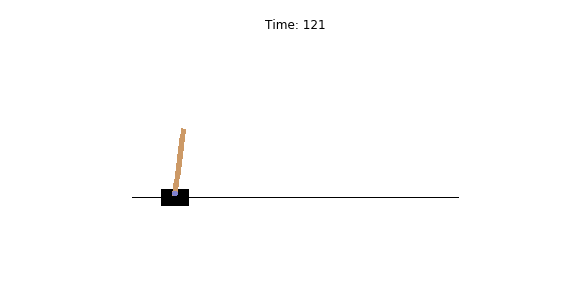
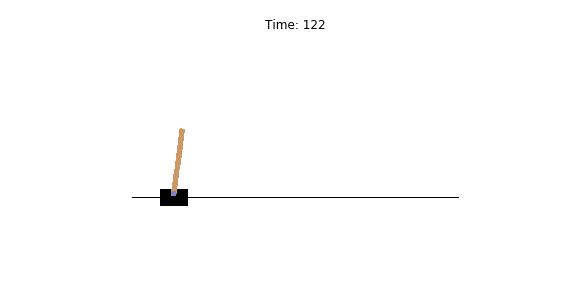
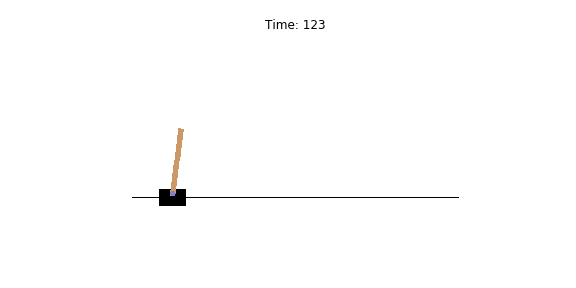
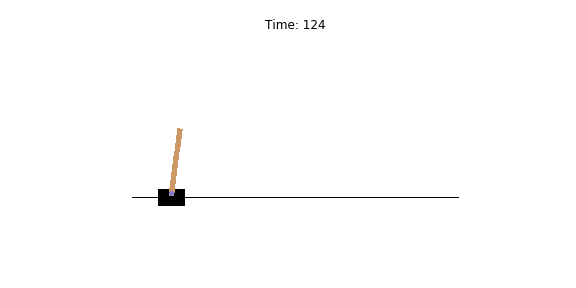
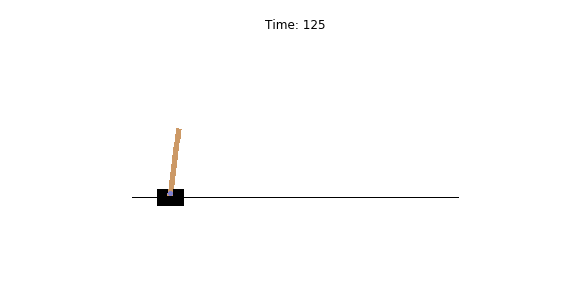
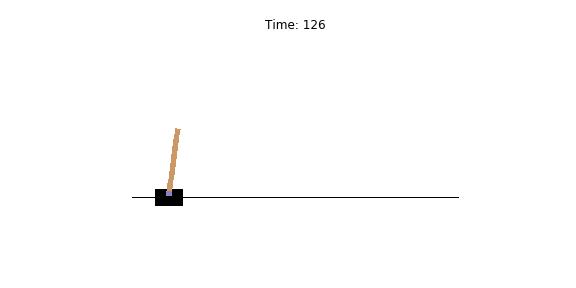
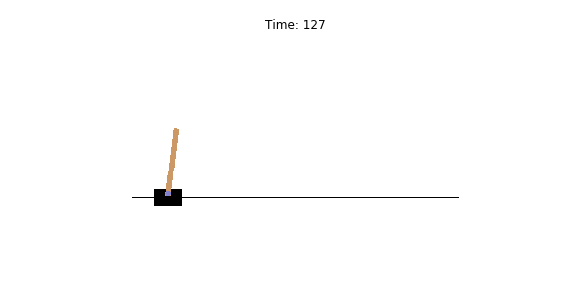
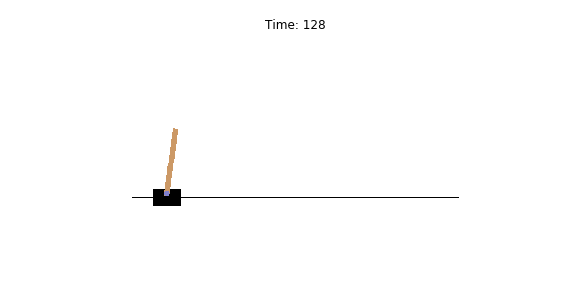
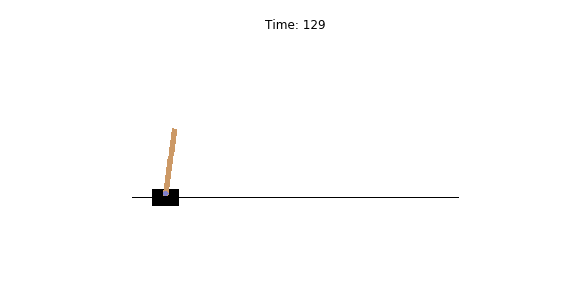
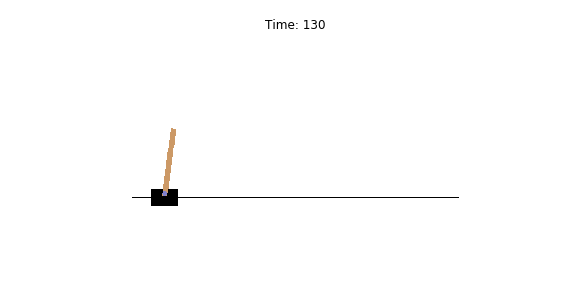
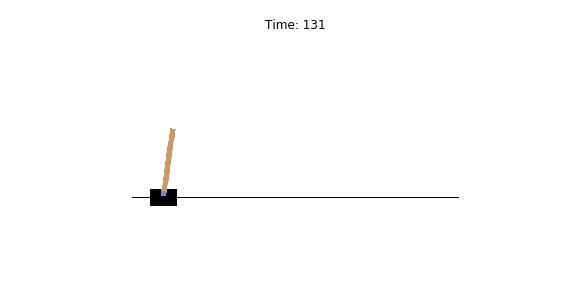
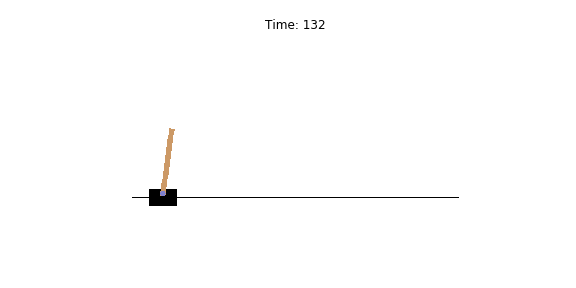
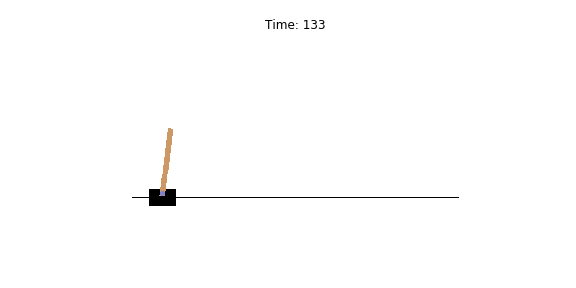
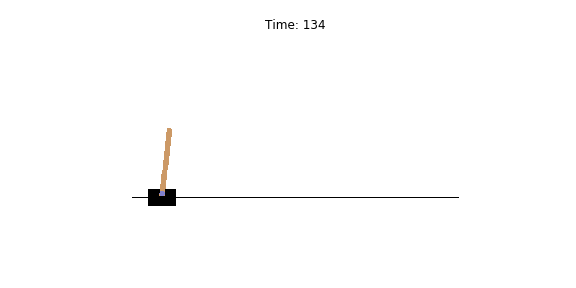
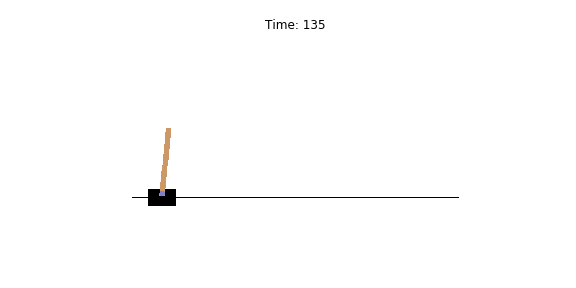
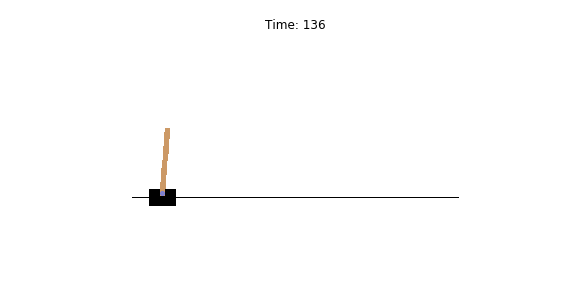
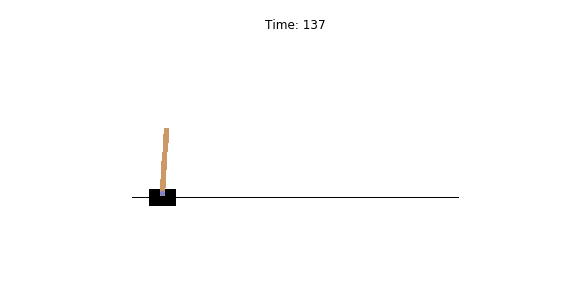
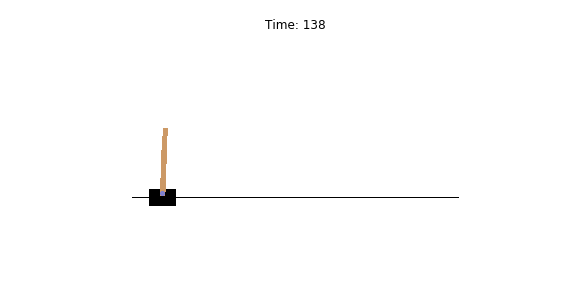
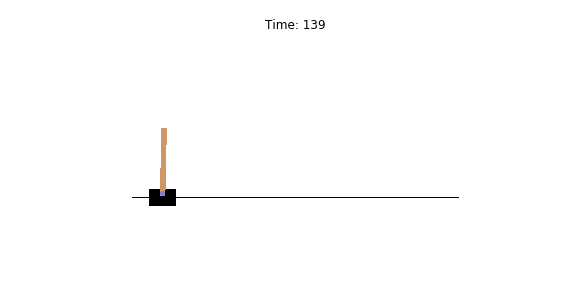
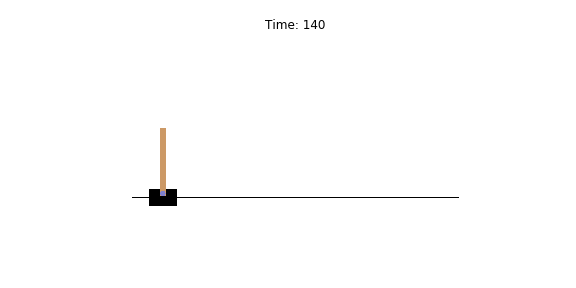
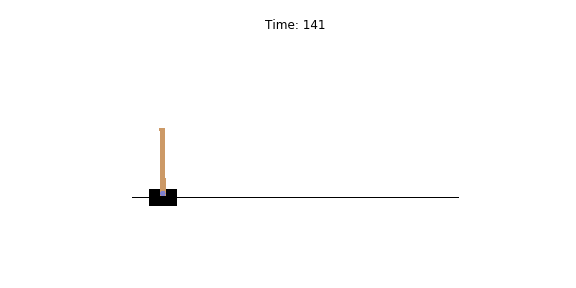
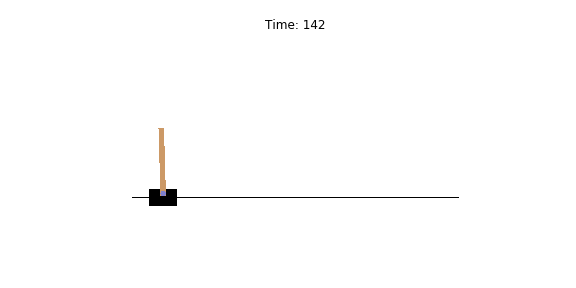
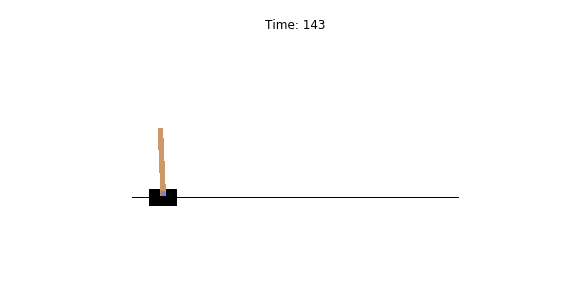
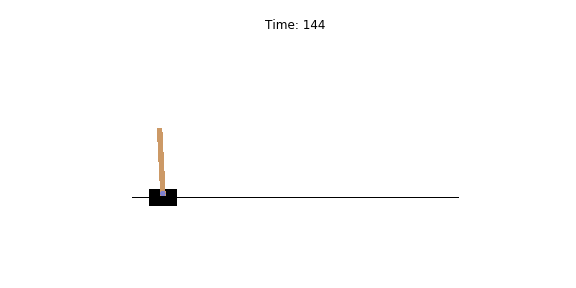
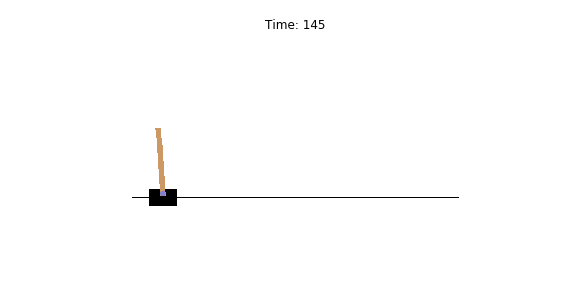
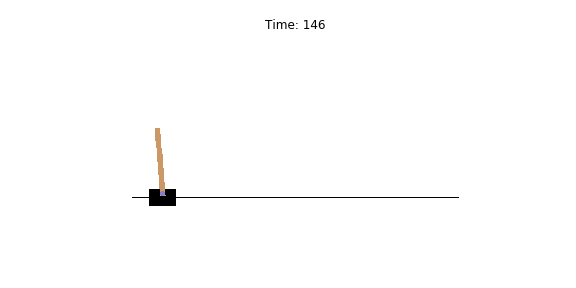
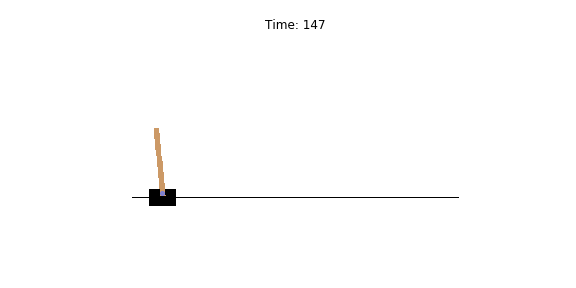
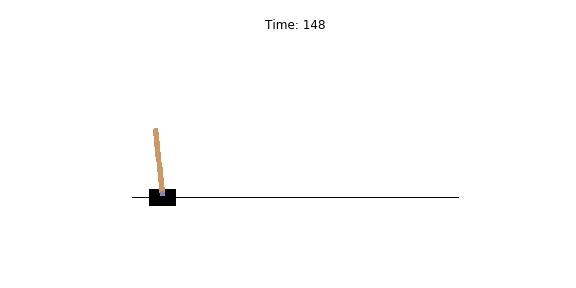
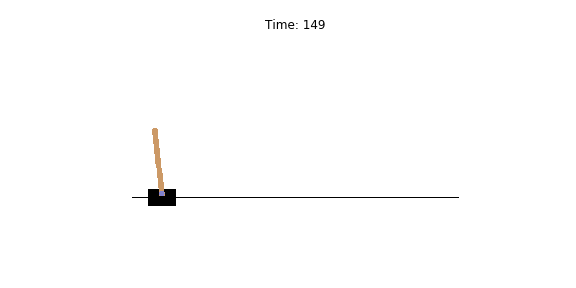
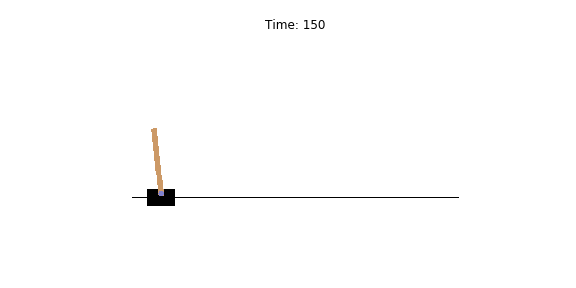
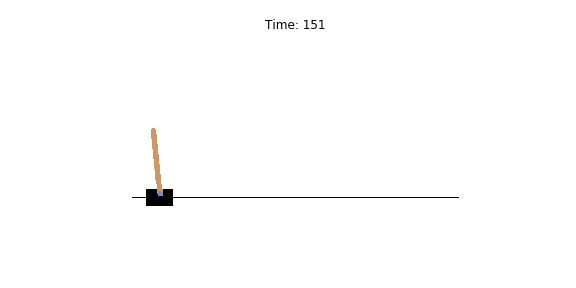
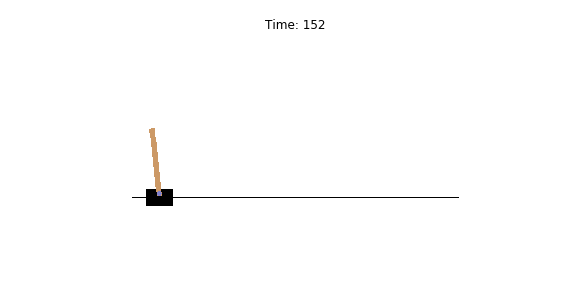
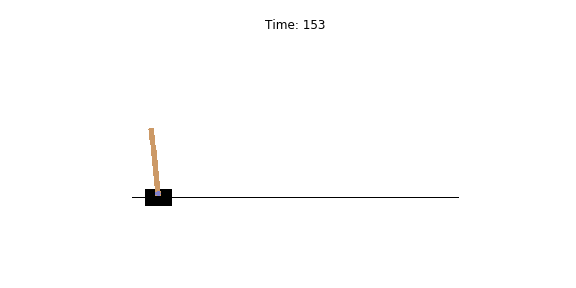
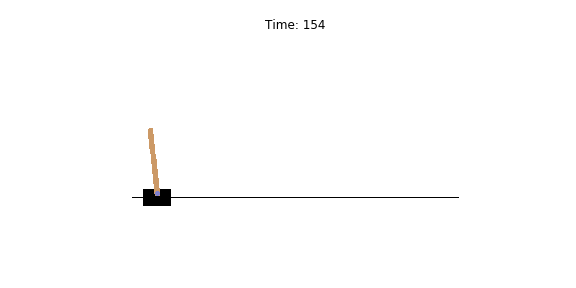
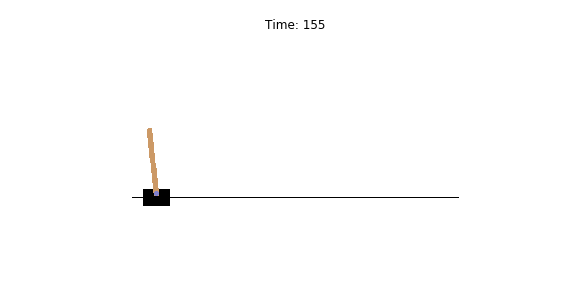
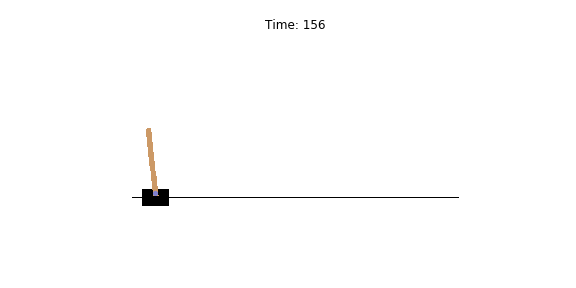
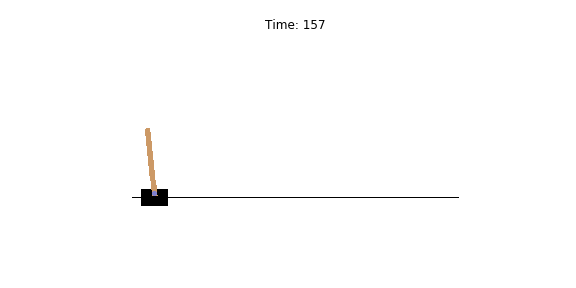
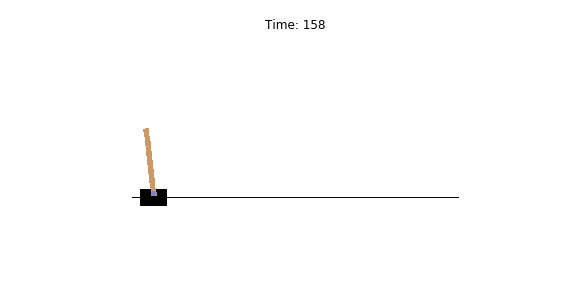
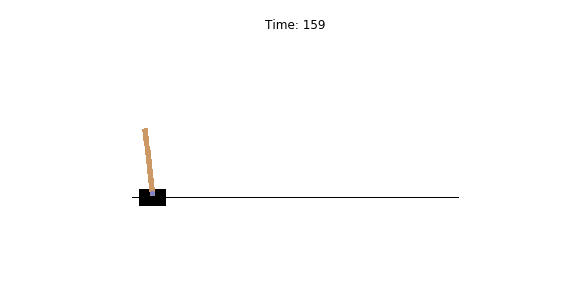
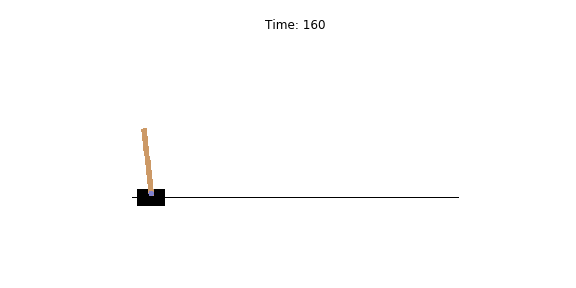
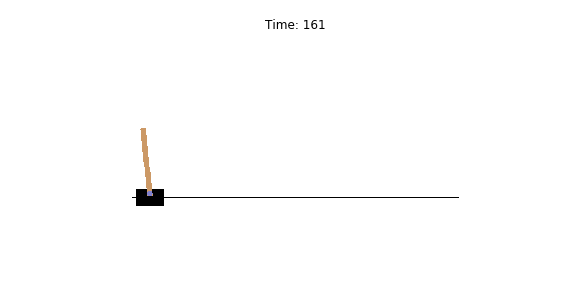
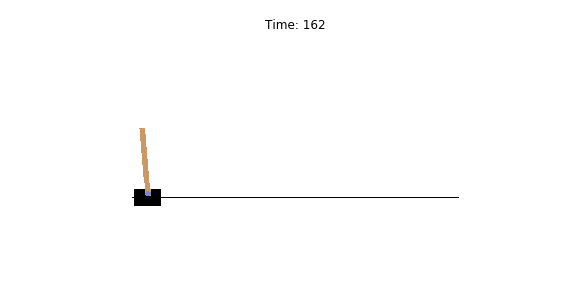
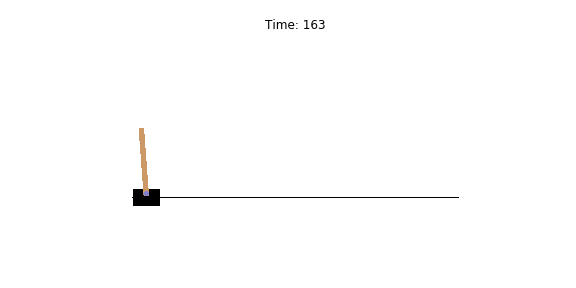
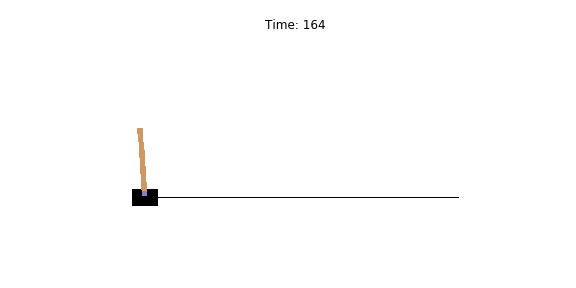
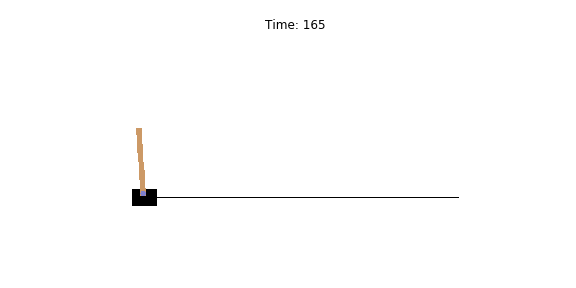
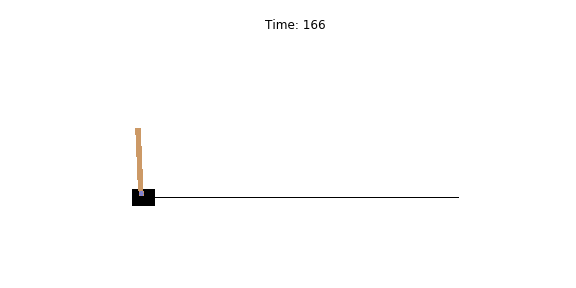
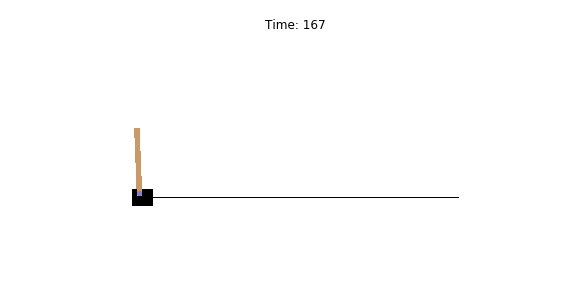
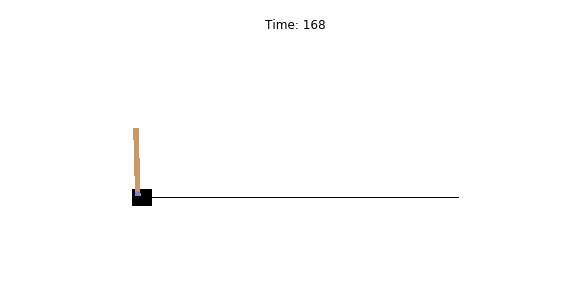
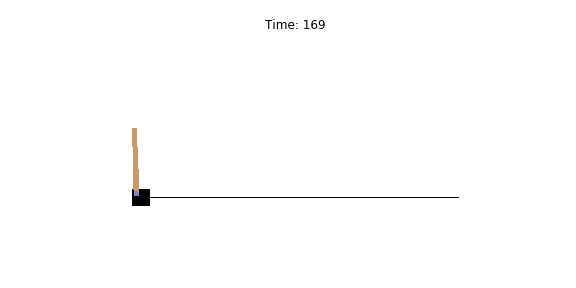
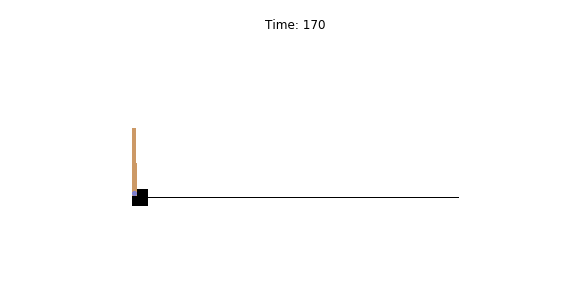
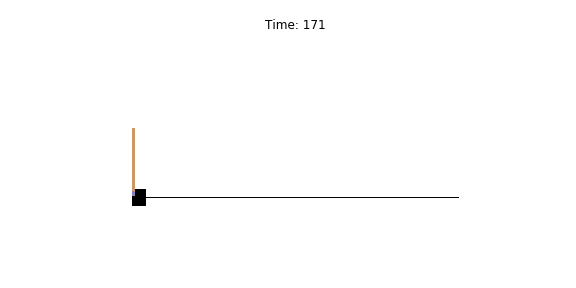

Episode [1500] Finished after: [172] steps, Reward: [172.00], Average Reward: [171.51]
Episode [1600] Finished after: [139] steps, Reward: [139.00], Average Reward: [163.16]
Episode [1700] Finished after: [176] steps, Reward: [176.00], Average Reward: [178.49]
Episode [1800] Finished after: [200] steps, Reward: [200.00], Average Reward: [187.78]
Episode [1900] Finished after: [189] steps, Reward: [189.00], Average Reward: [186.78]



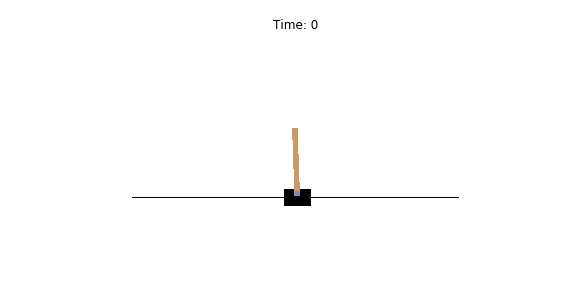
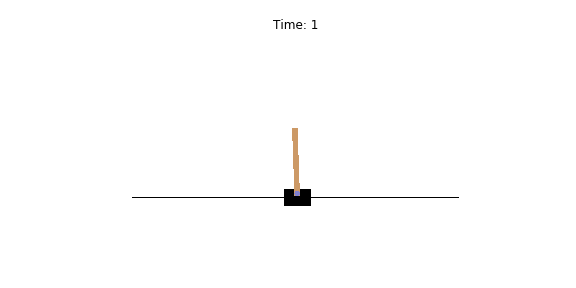
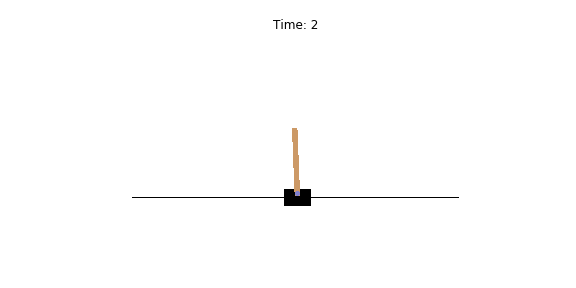
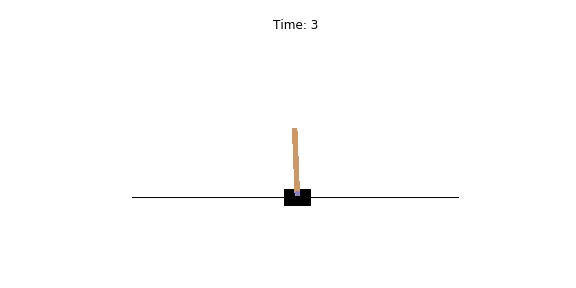
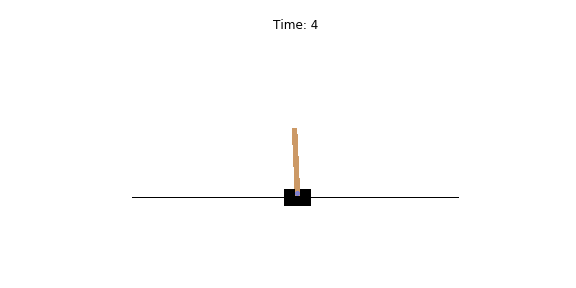
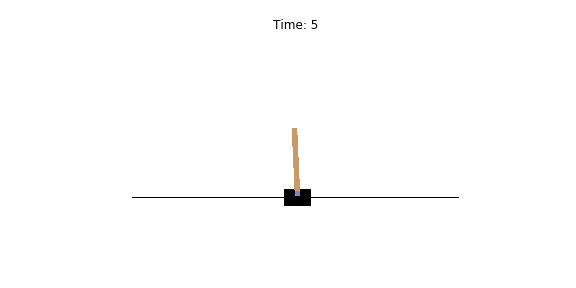
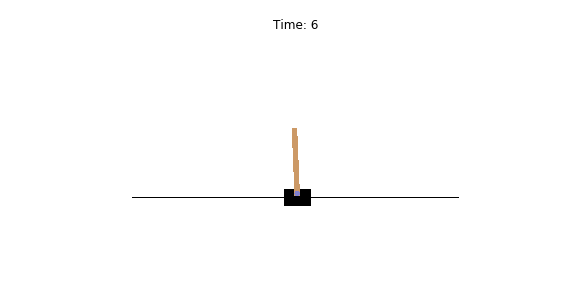
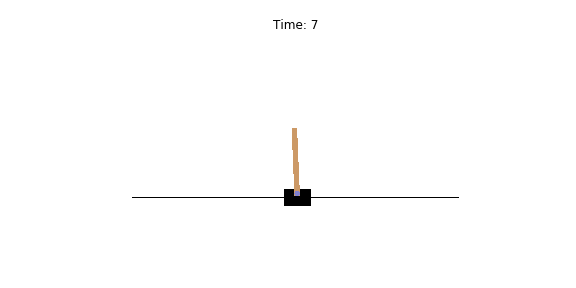
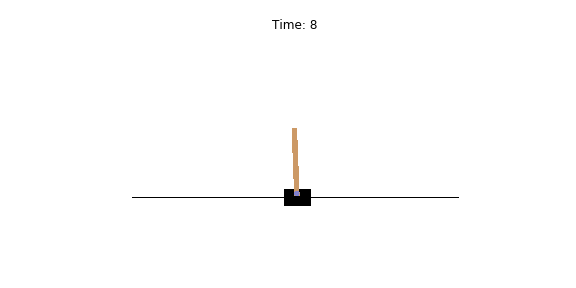
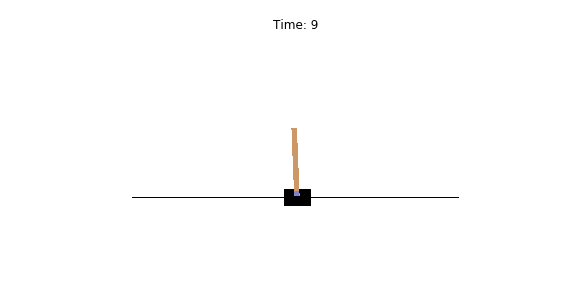
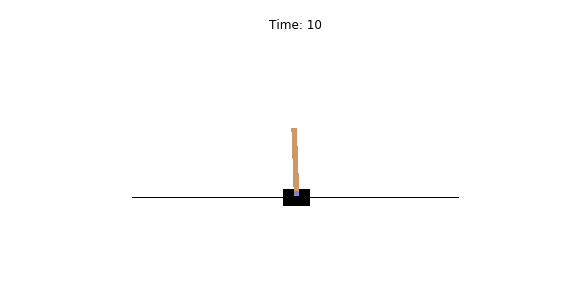
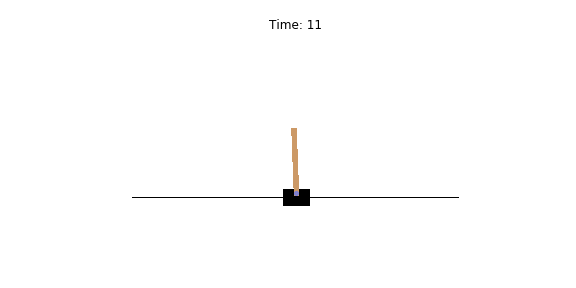
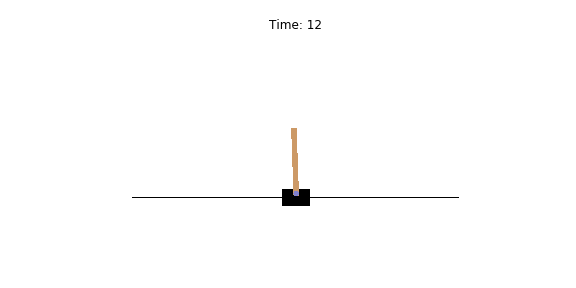
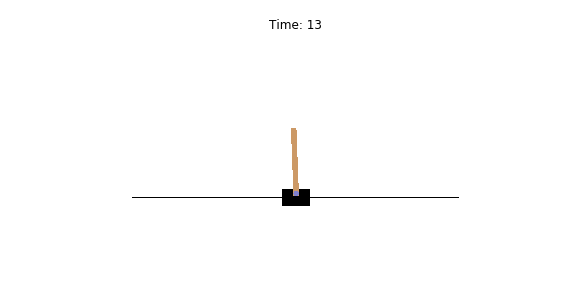
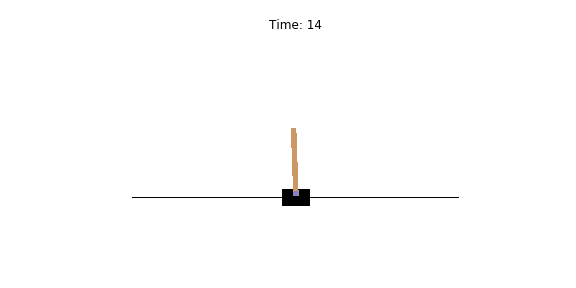
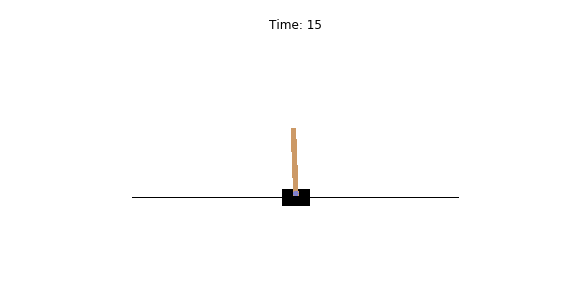
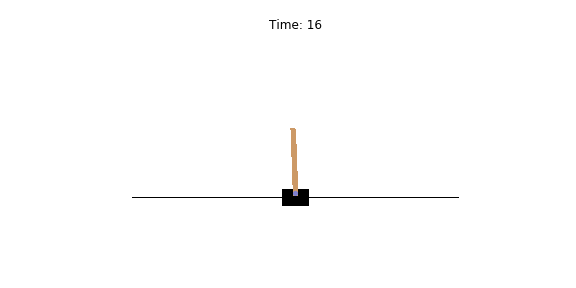
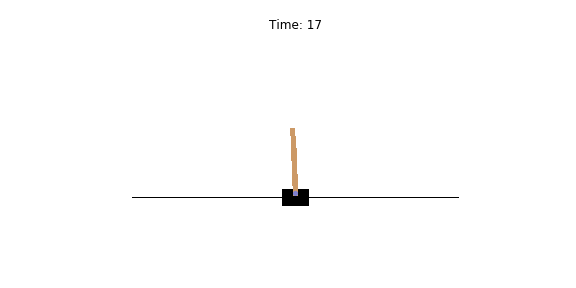
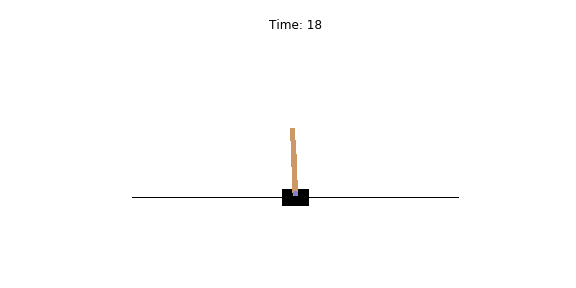
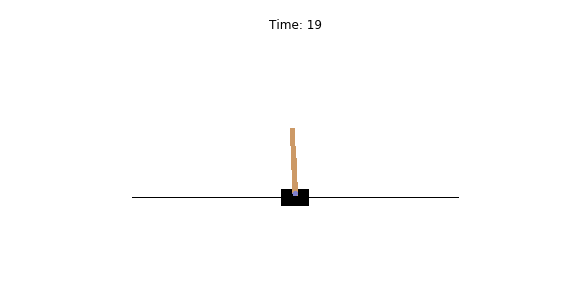
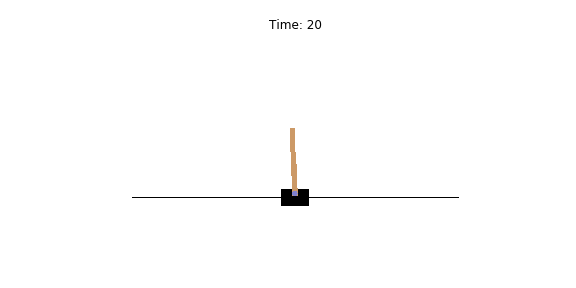
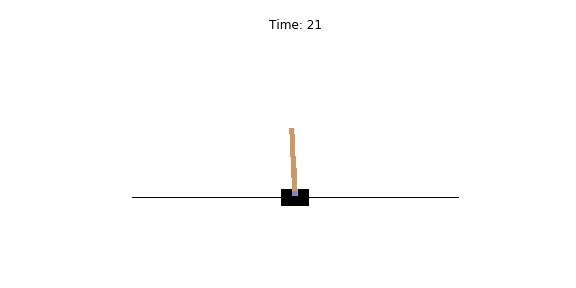
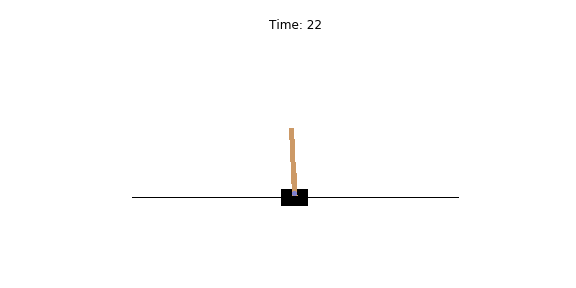
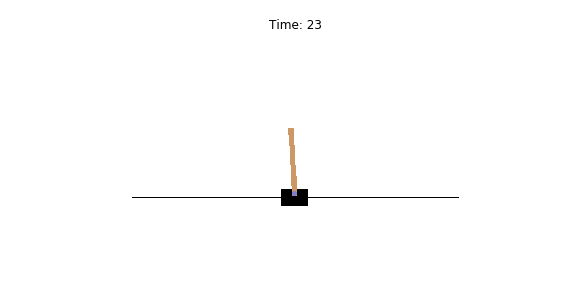
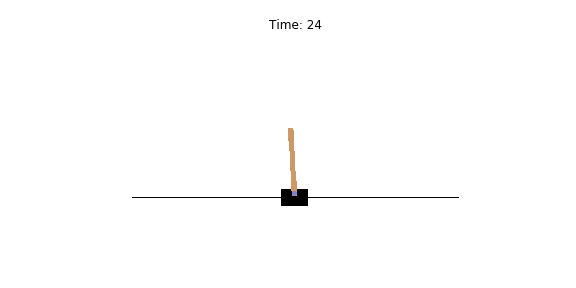
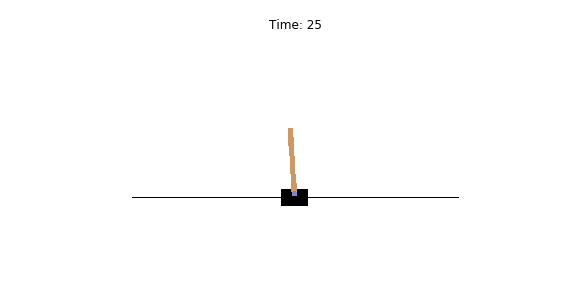
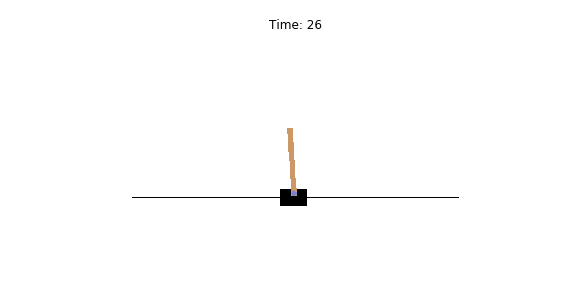
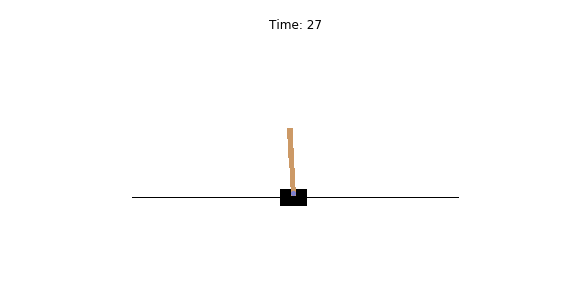
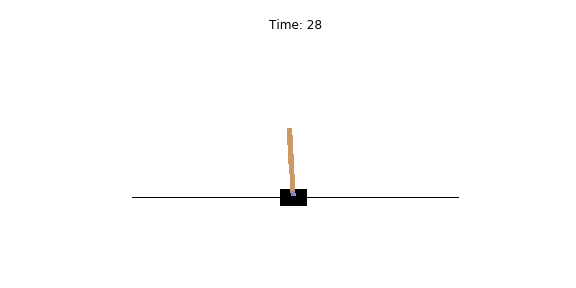
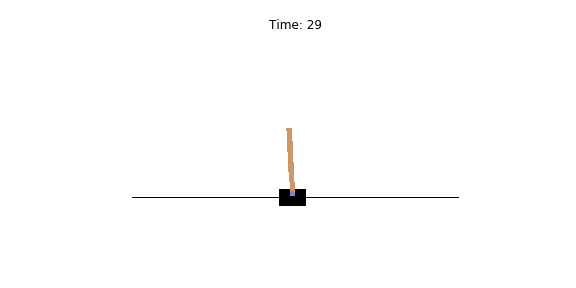
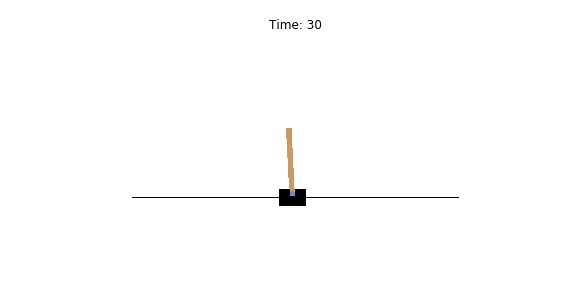
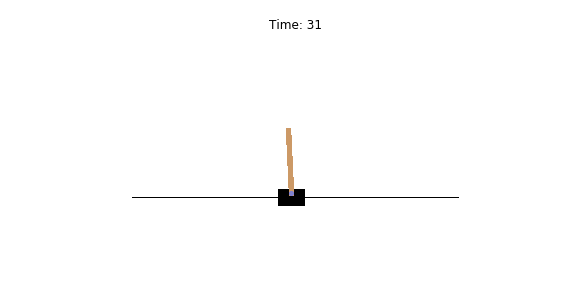
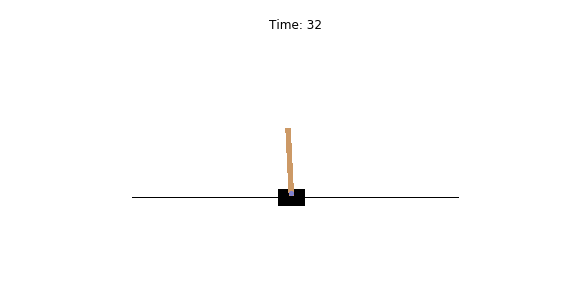
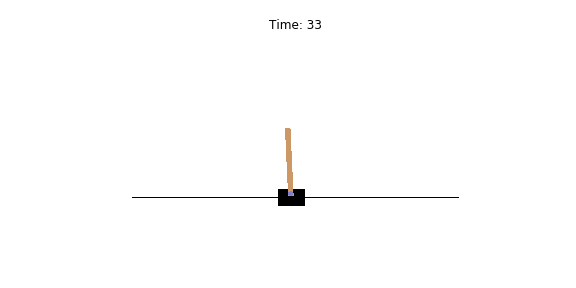
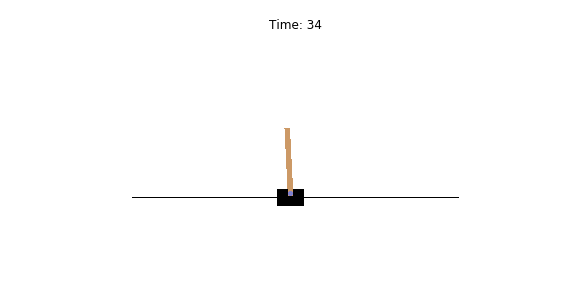
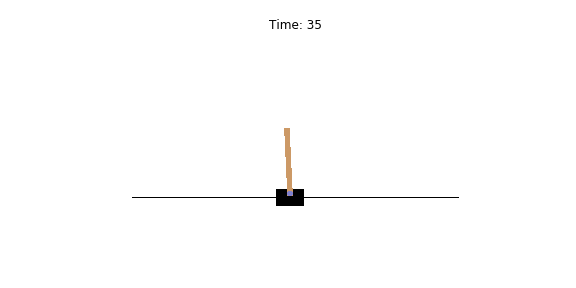
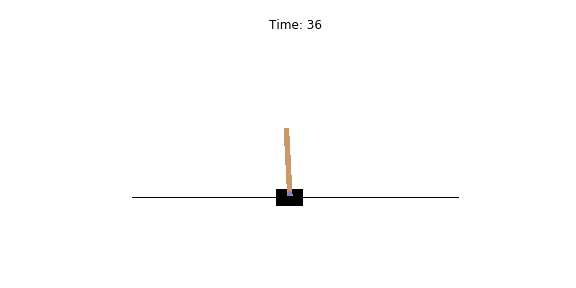
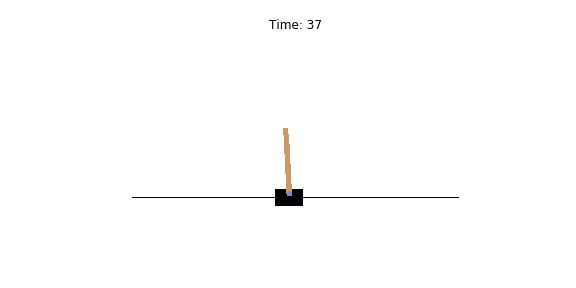
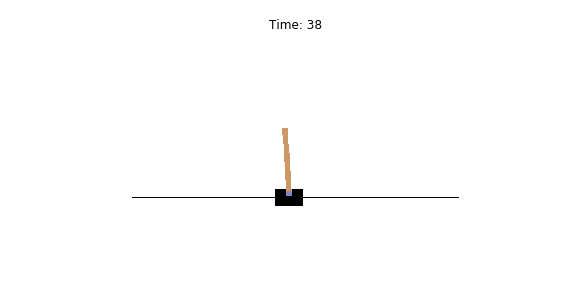
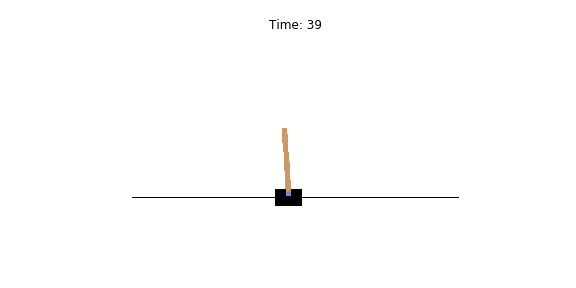
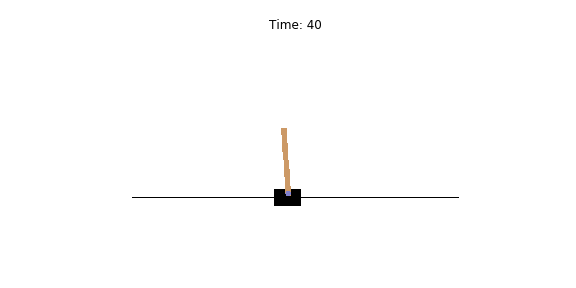
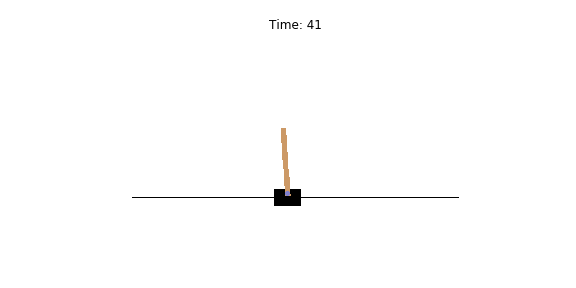
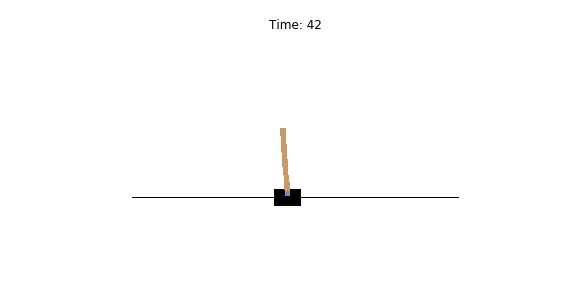
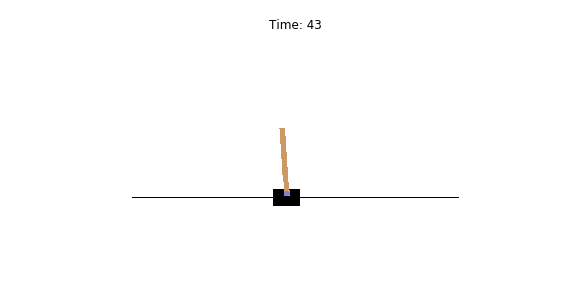
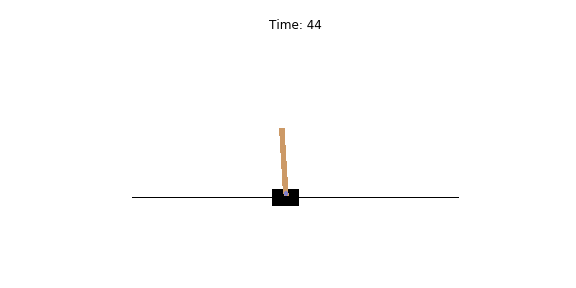
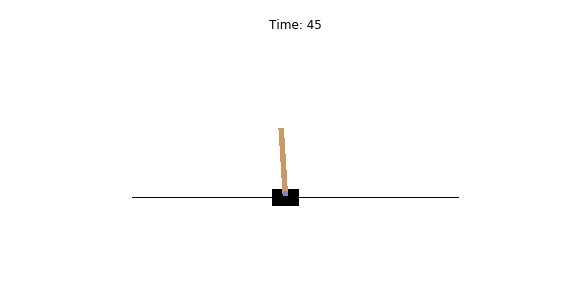
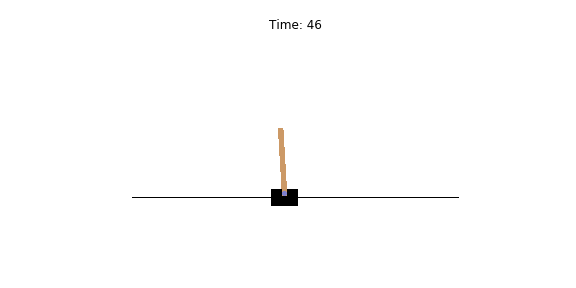
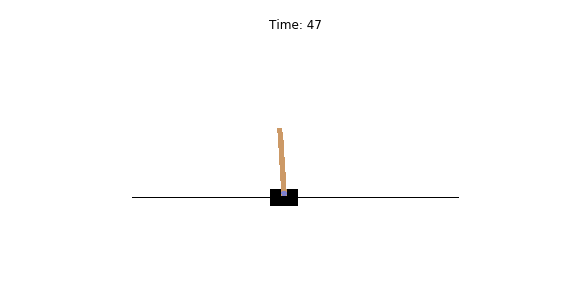
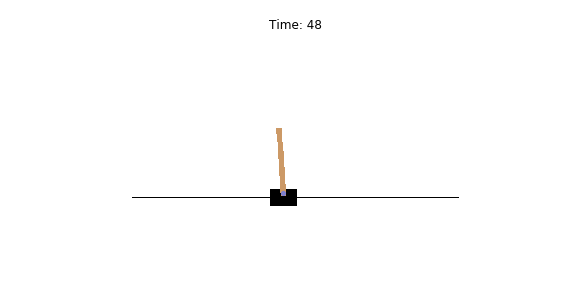
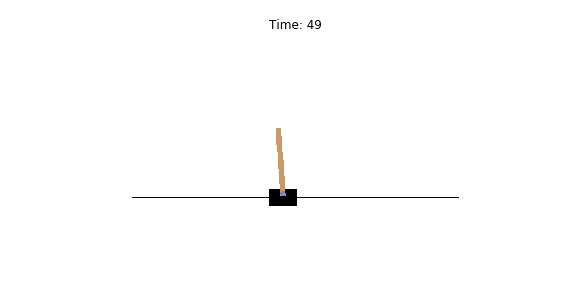
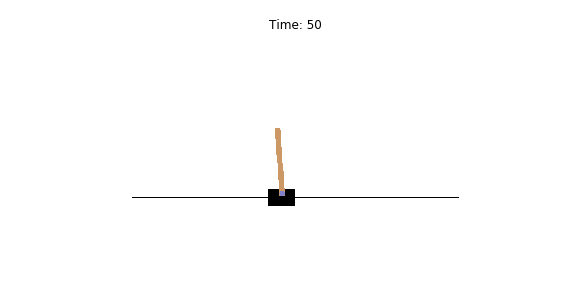
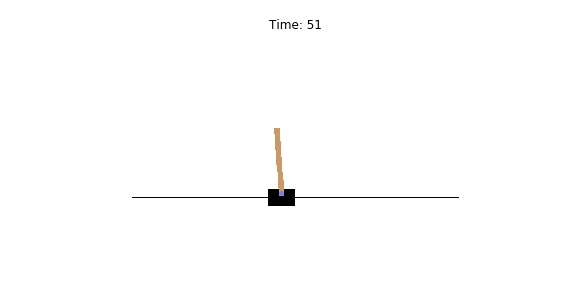
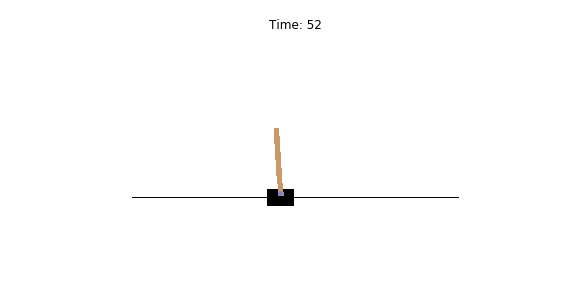
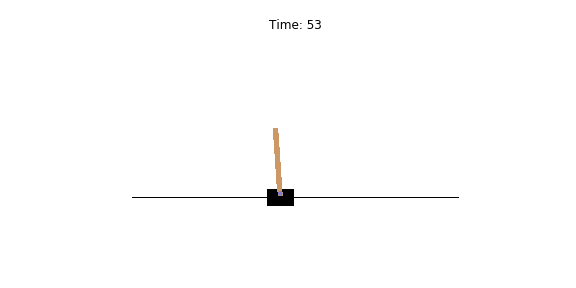
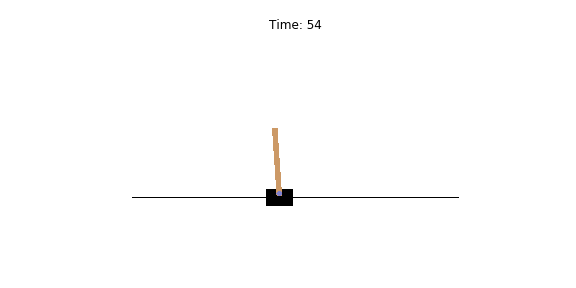
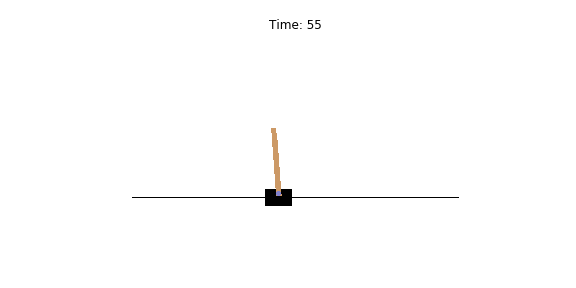
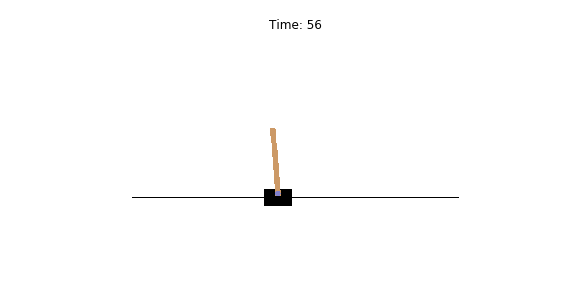
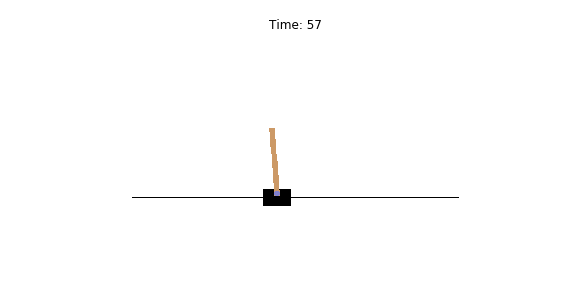
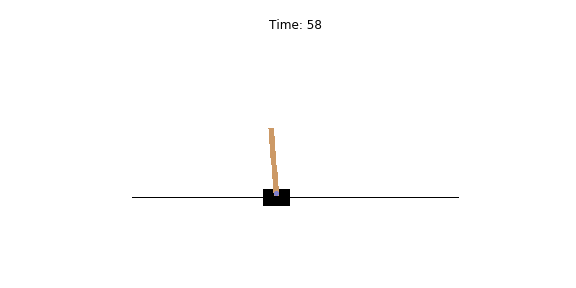
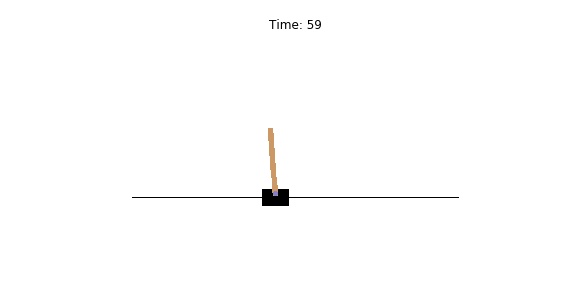
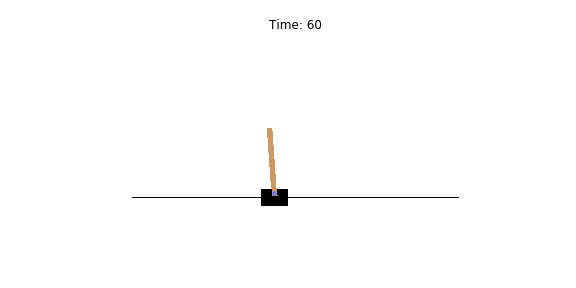
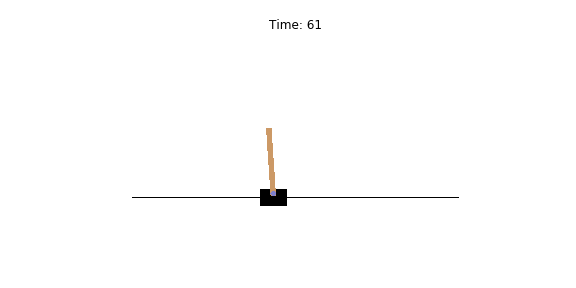
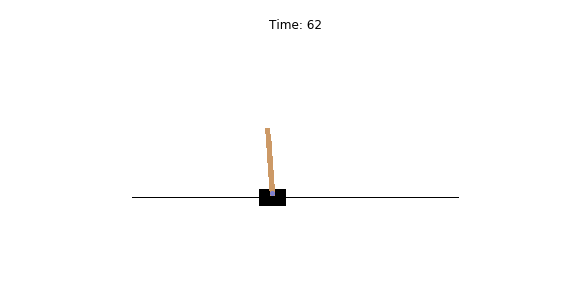
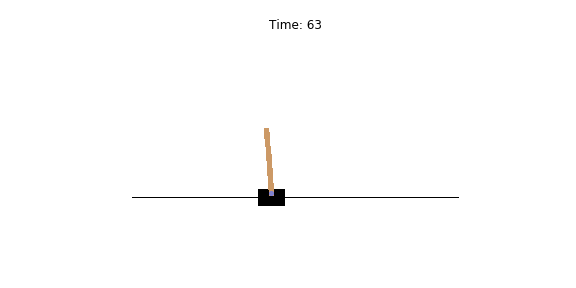
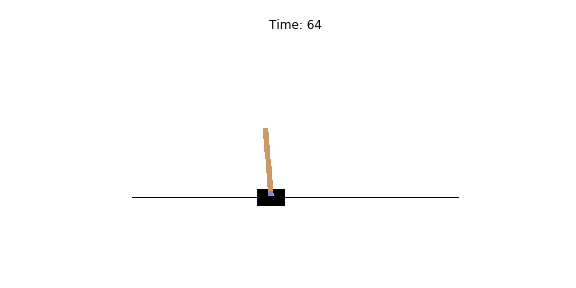
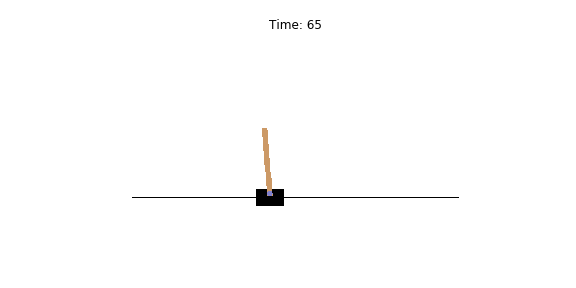
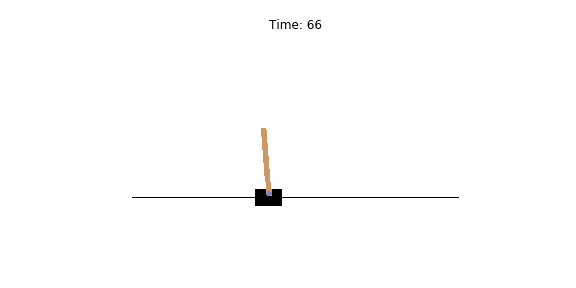
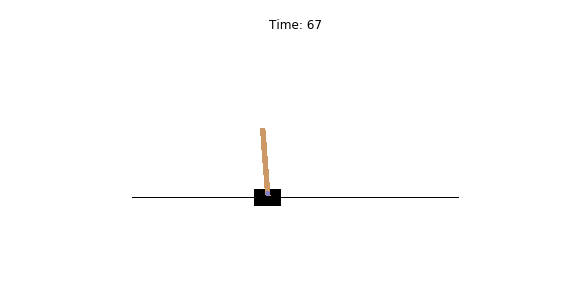
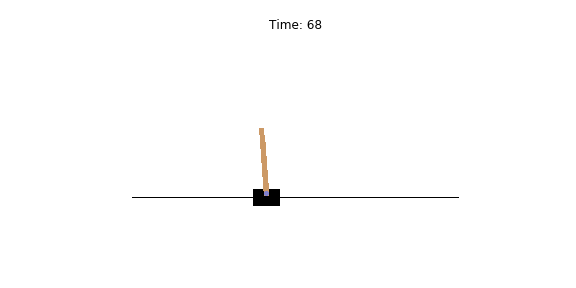
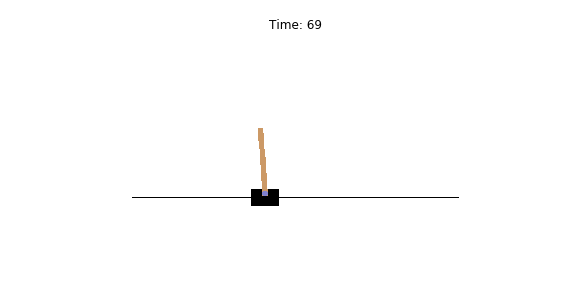
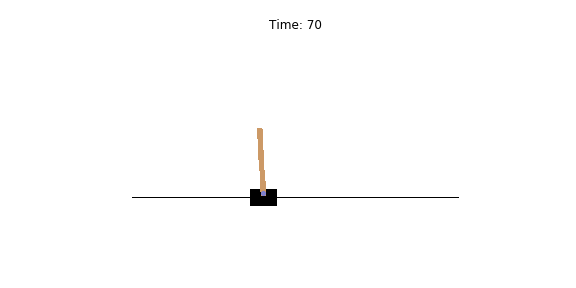
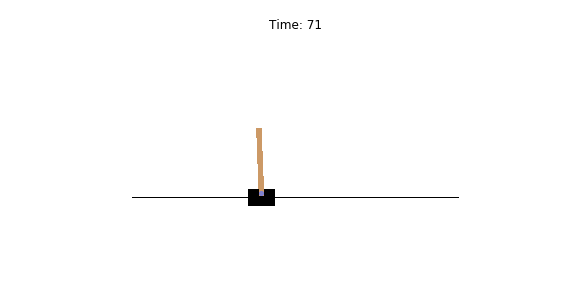
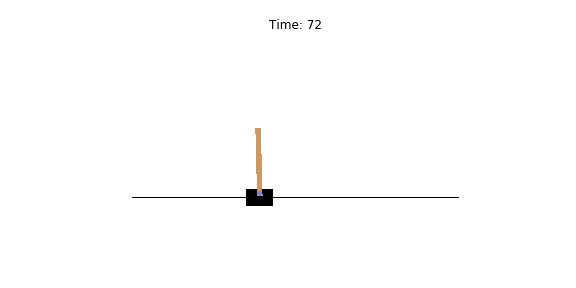
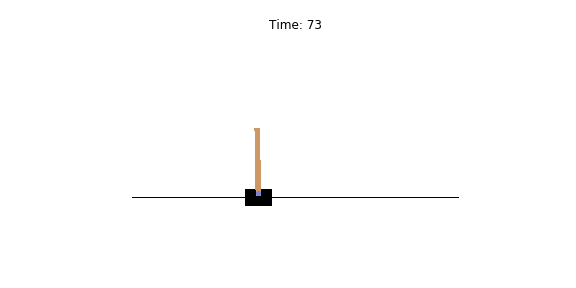
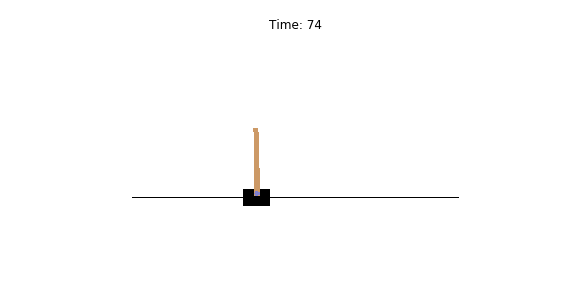
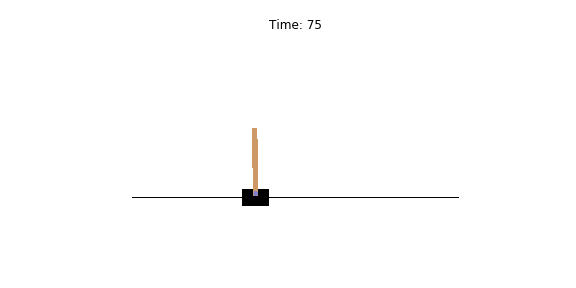
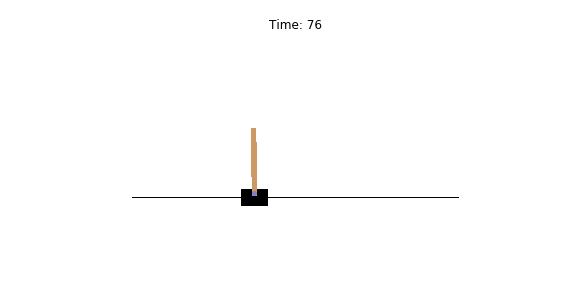
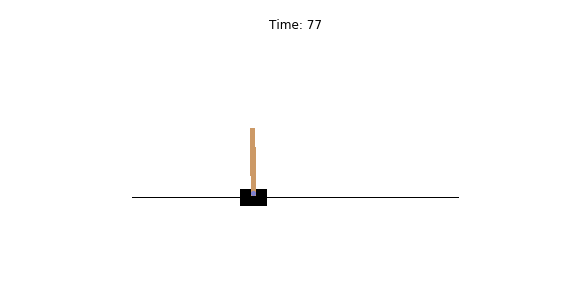
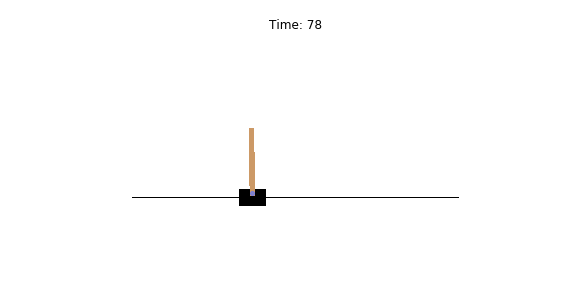
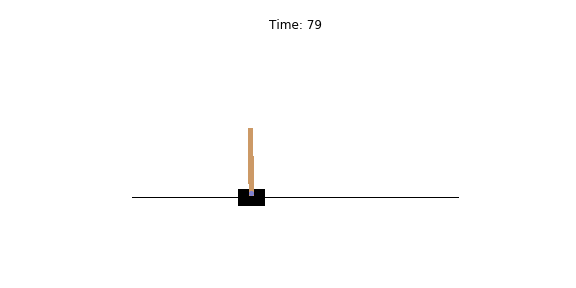
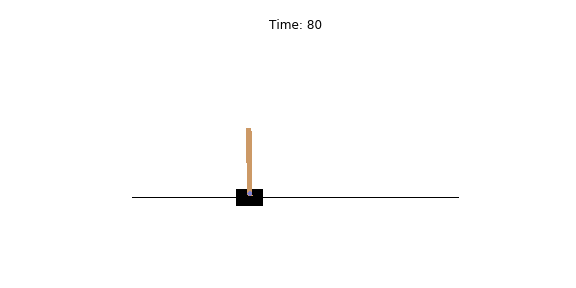
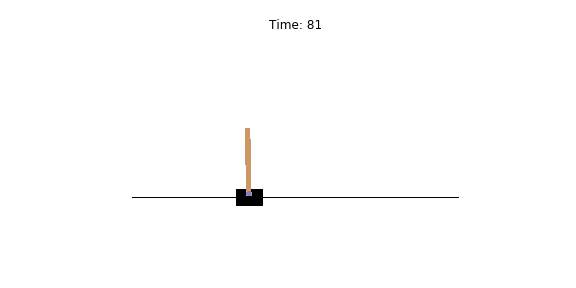
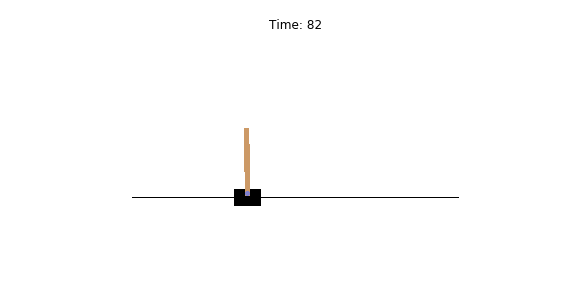
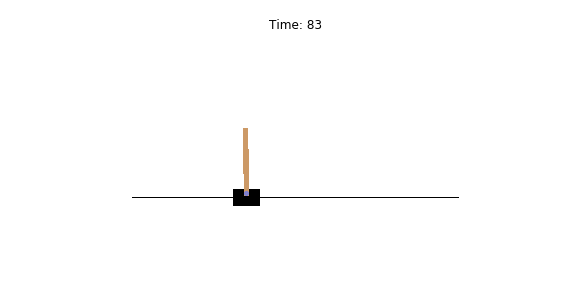
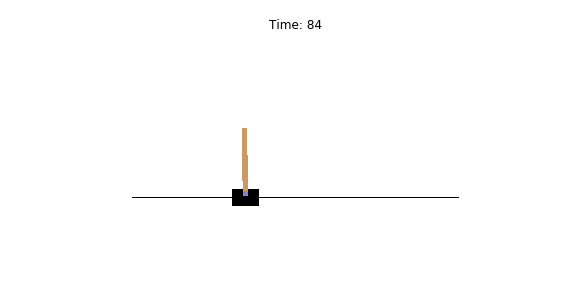
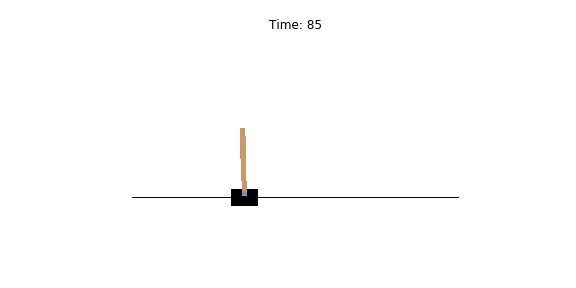
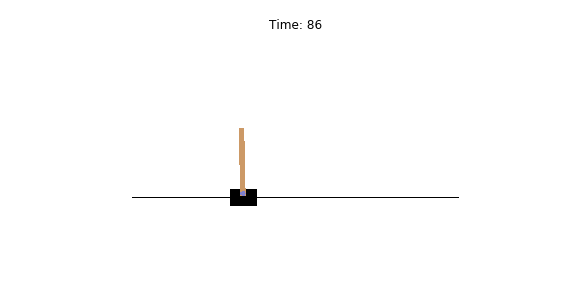
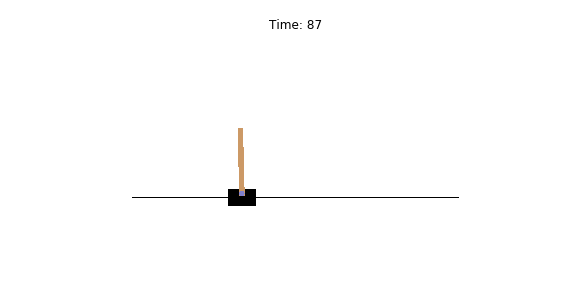
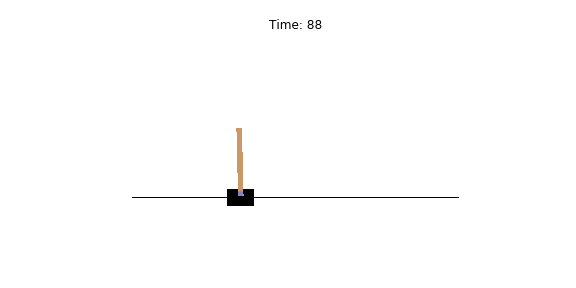
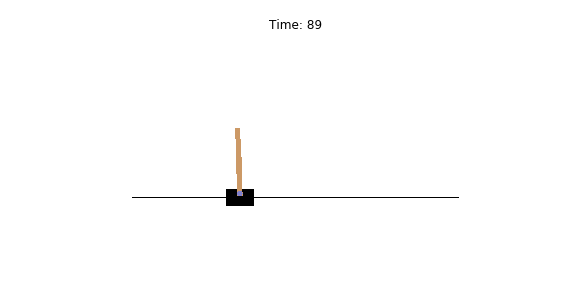
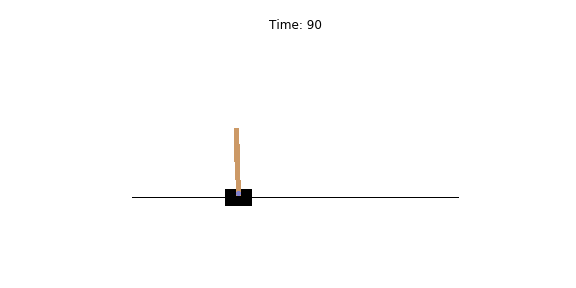
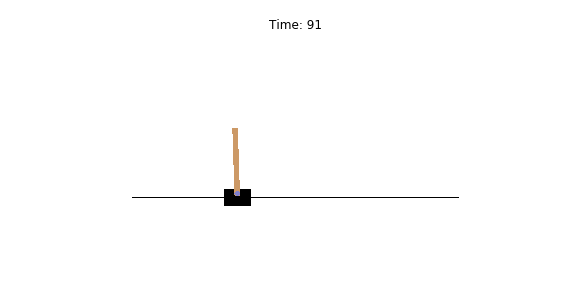
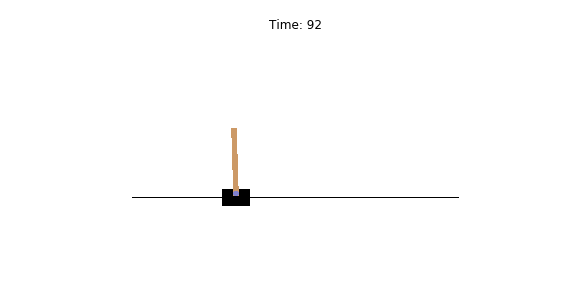
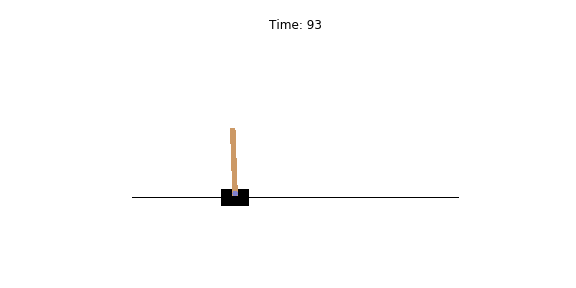
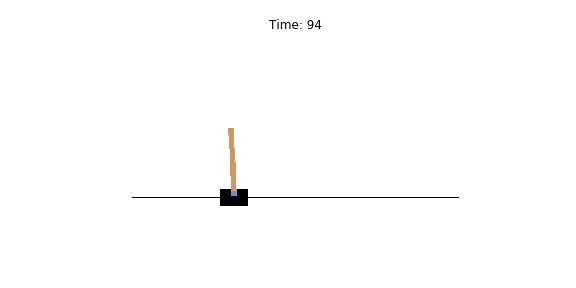
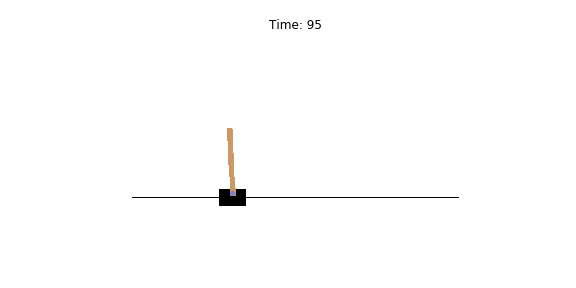
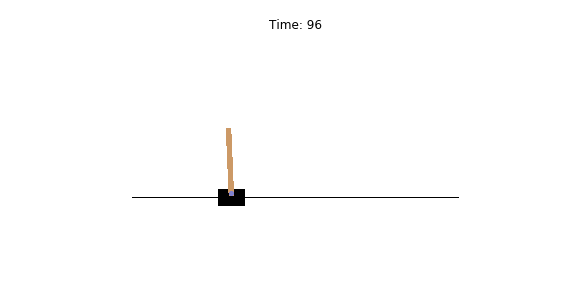
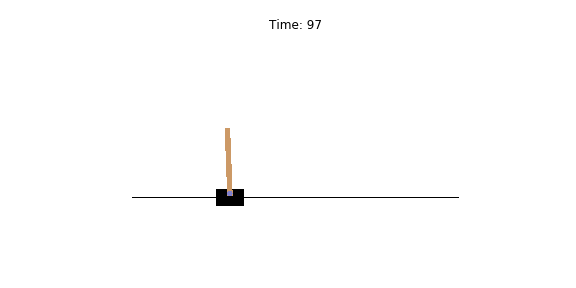
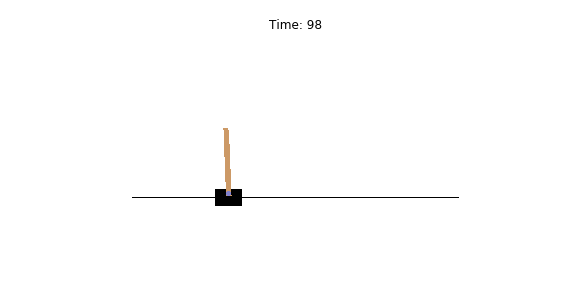
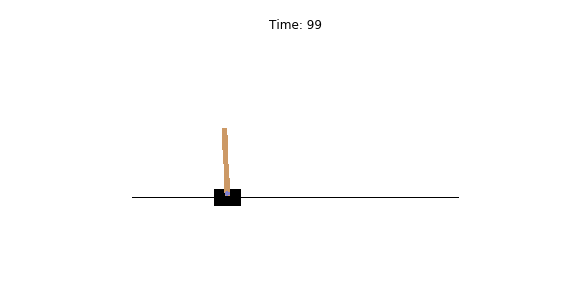
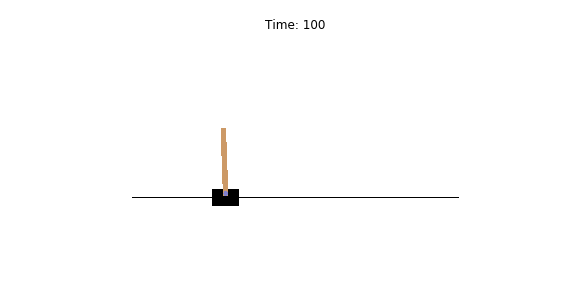
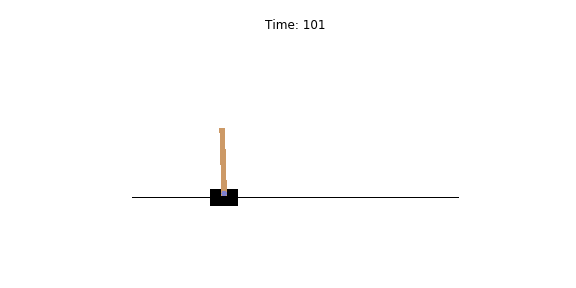
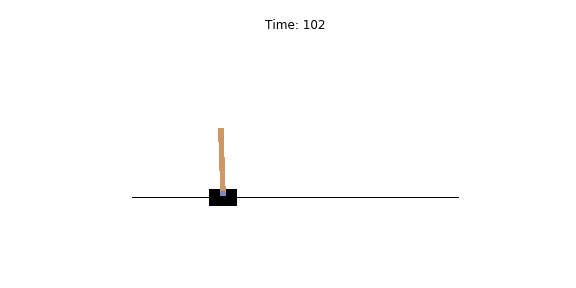
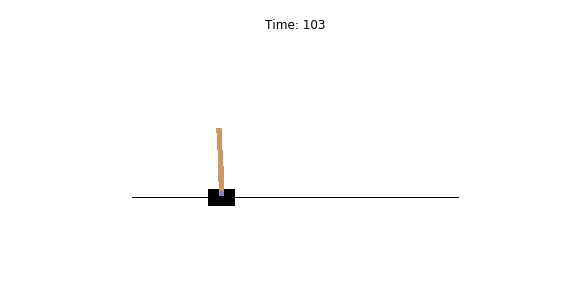
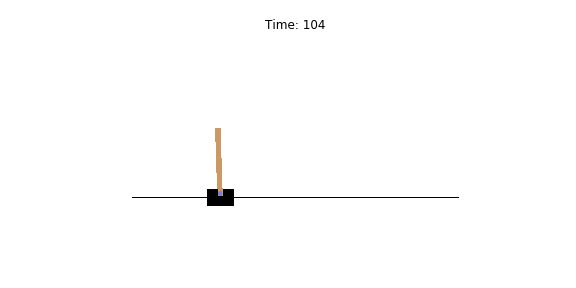
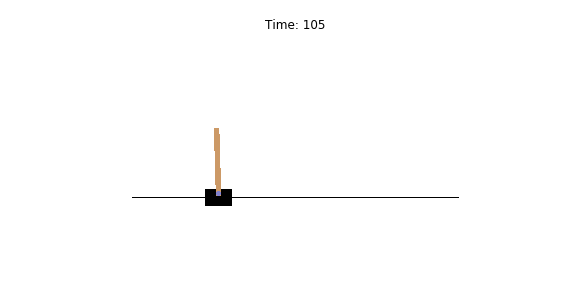
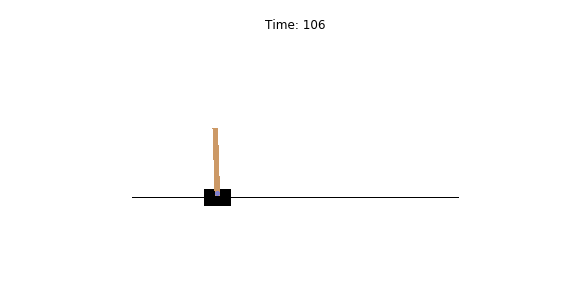
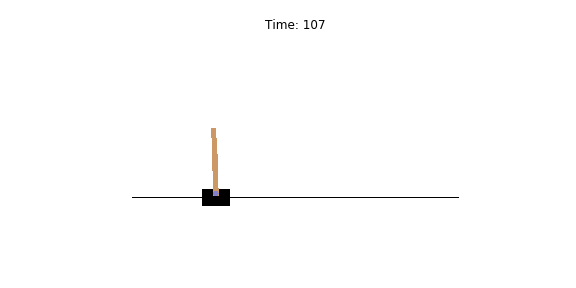
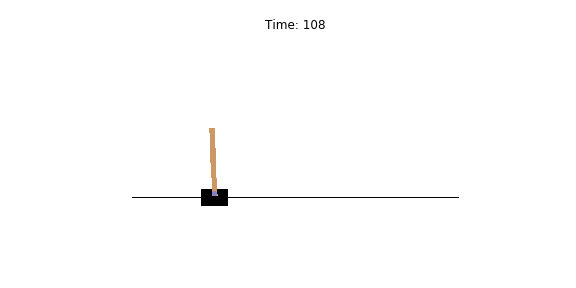
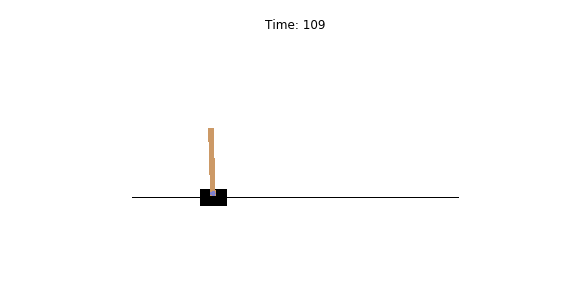
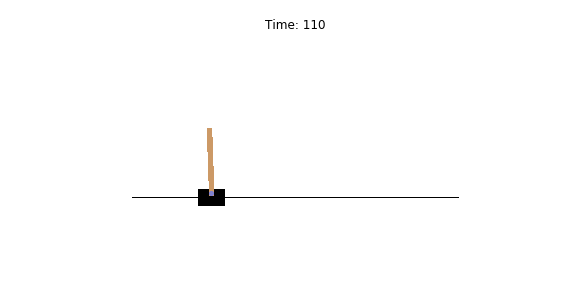
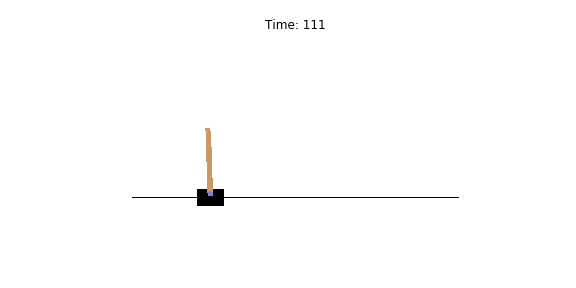
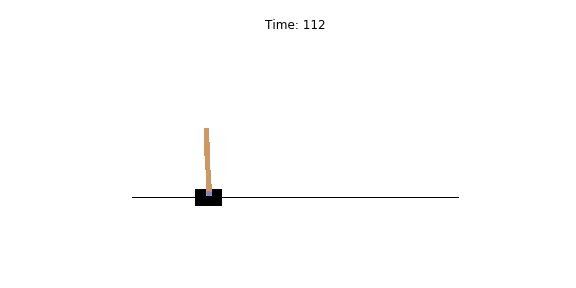
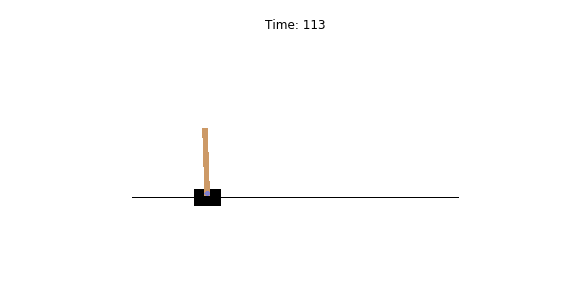
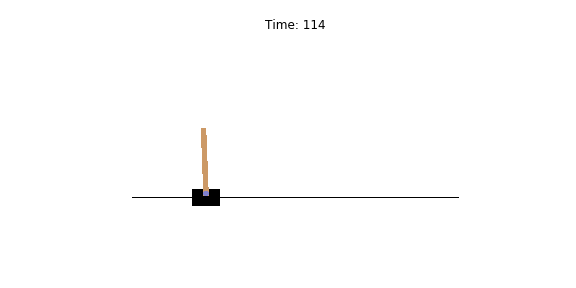
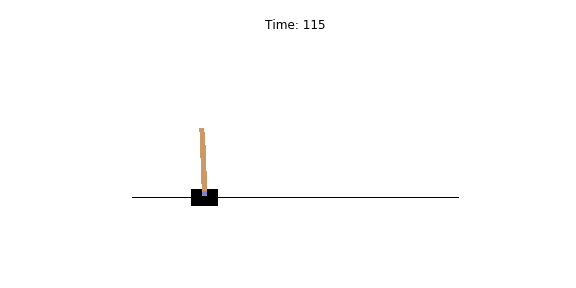
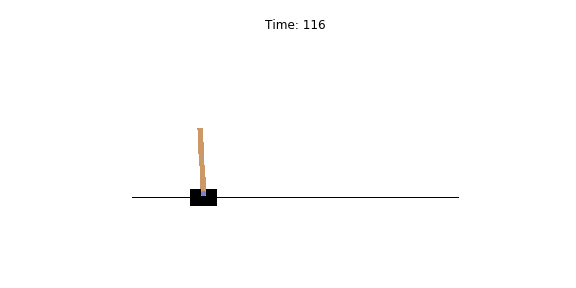
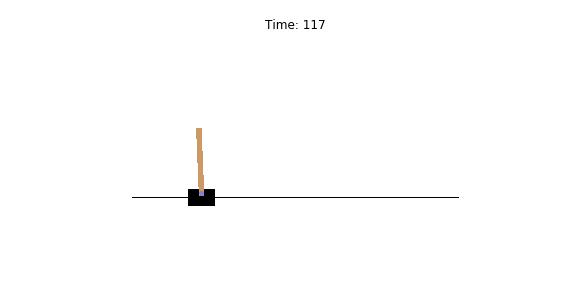
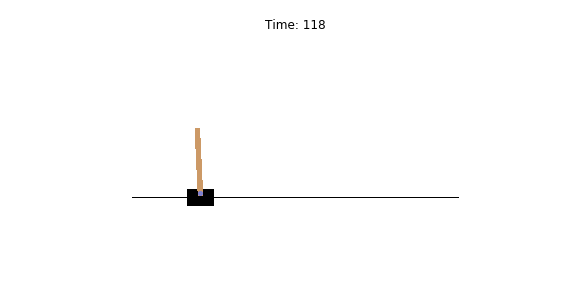
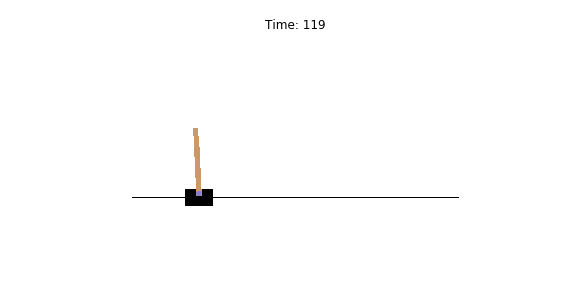
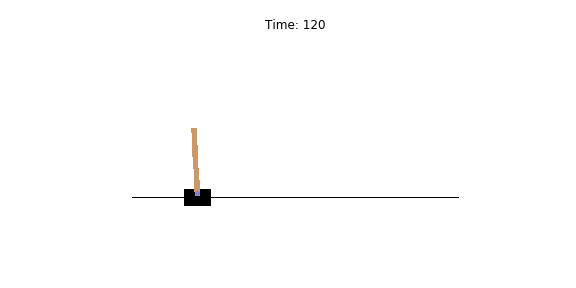
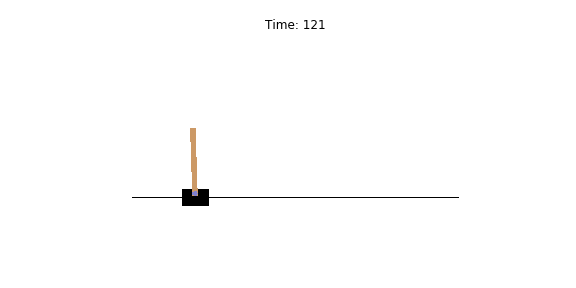
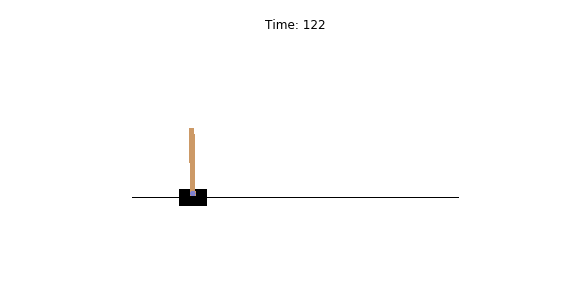
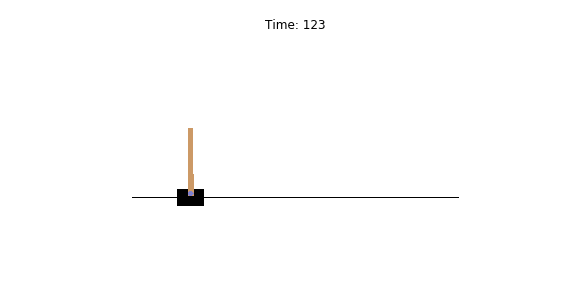
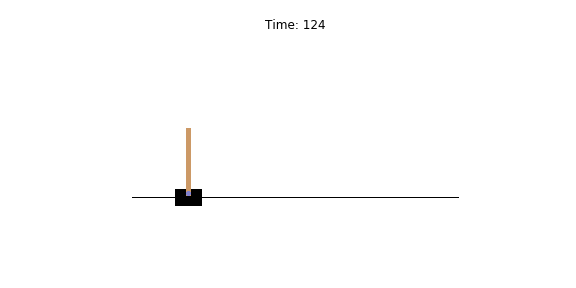
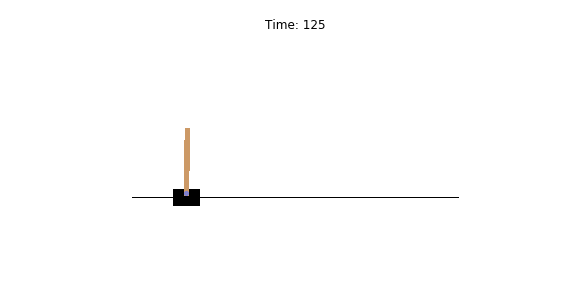
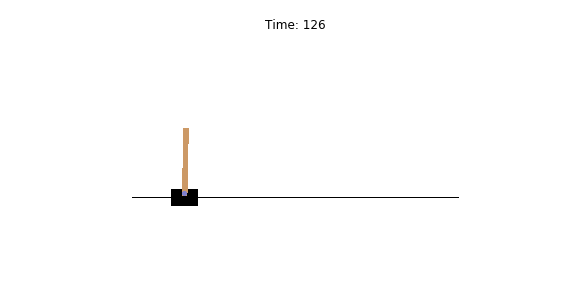
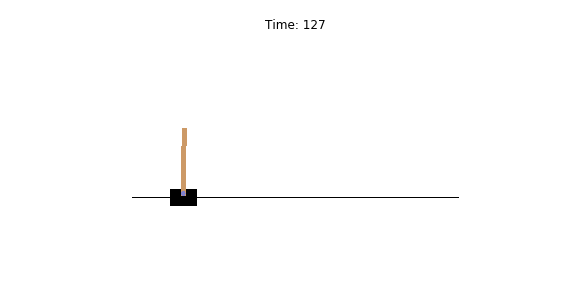
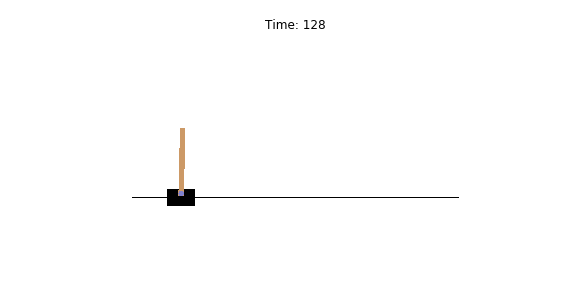
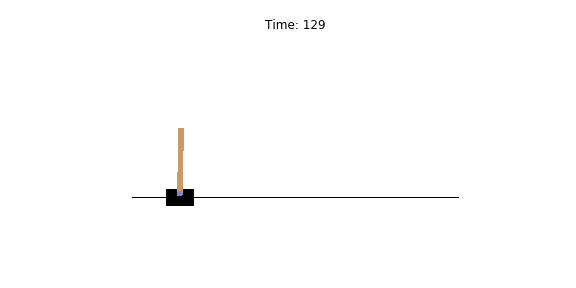
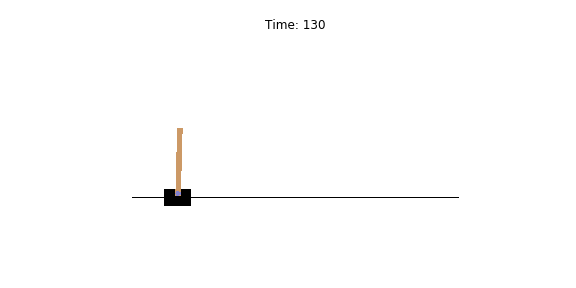
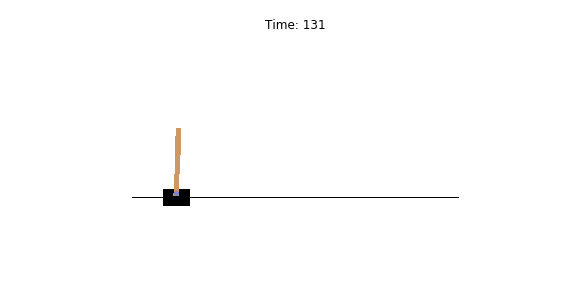
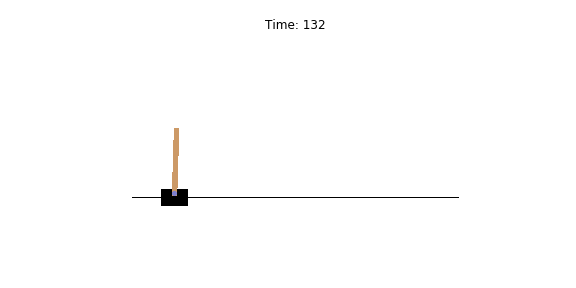
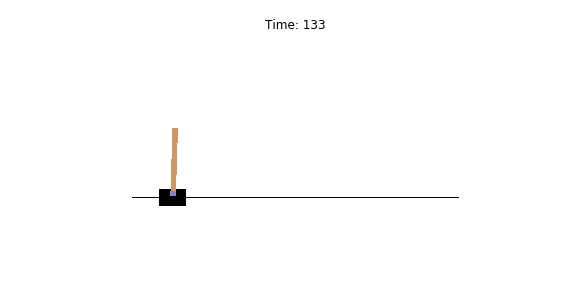
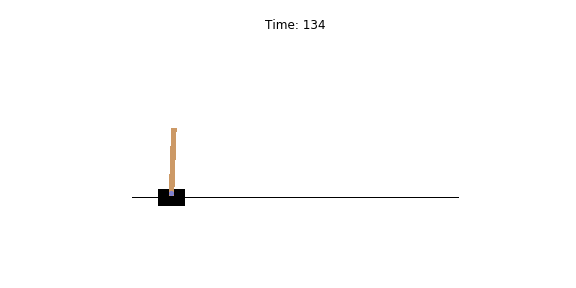
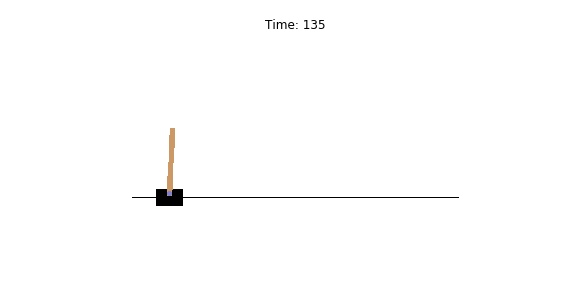
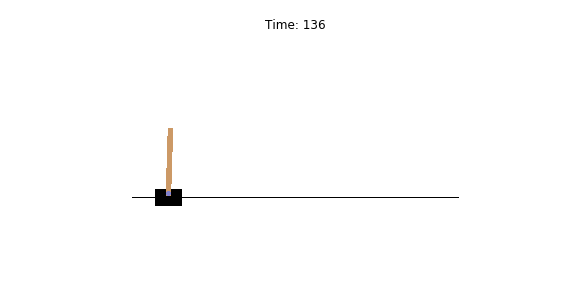
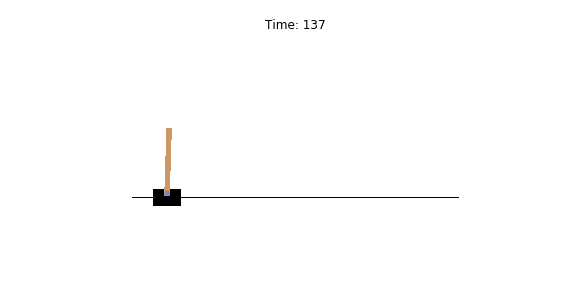
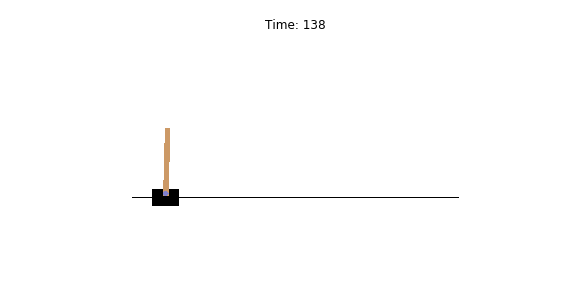
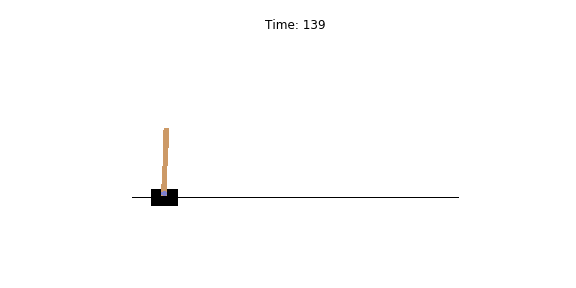
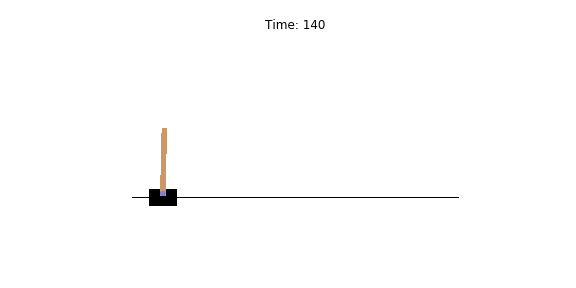
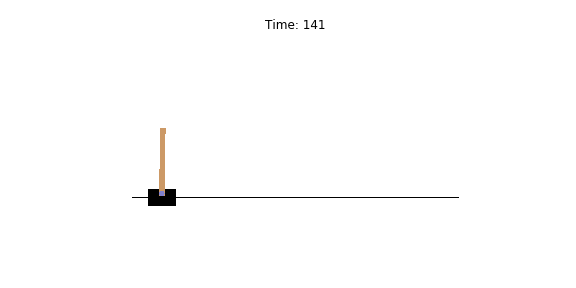
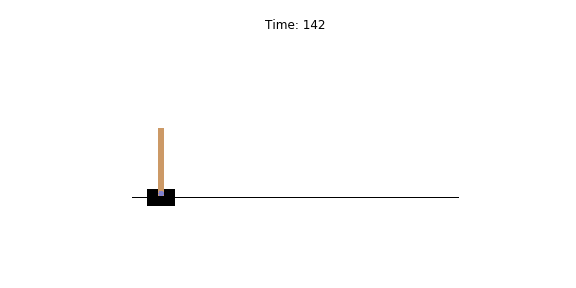
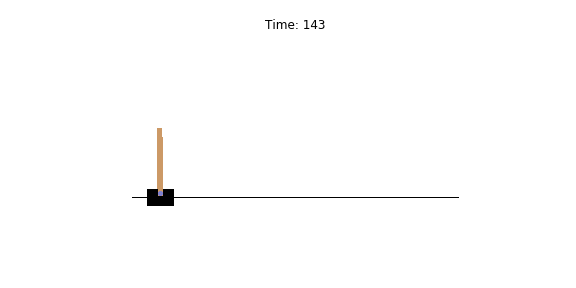
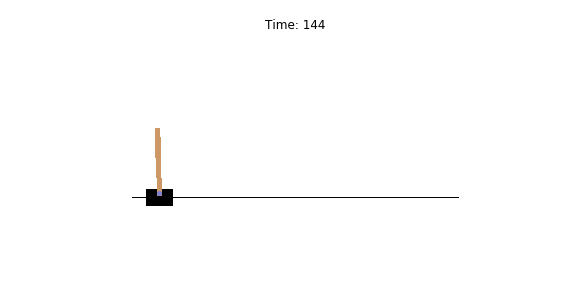
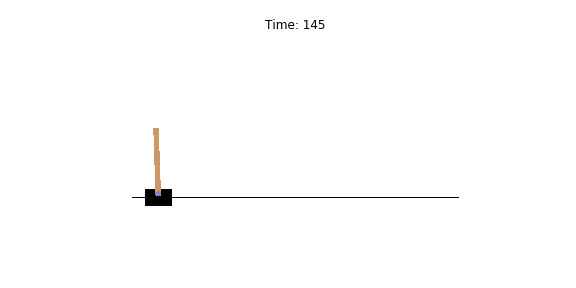
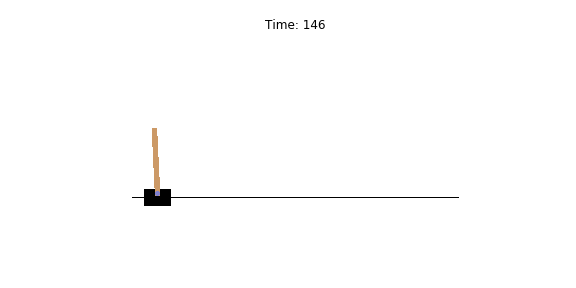
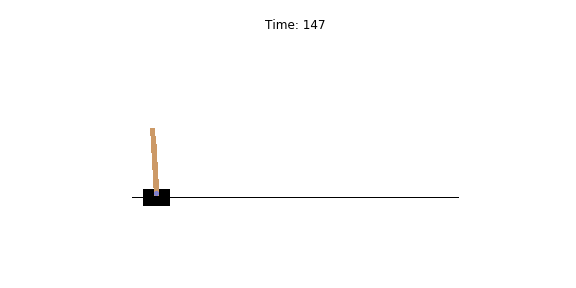
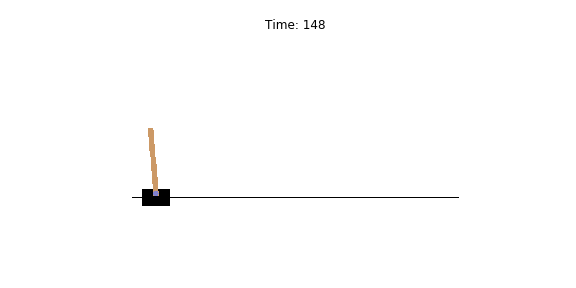
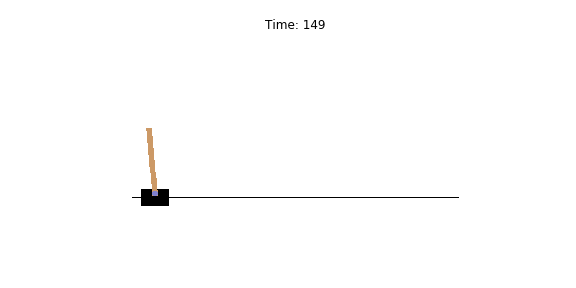
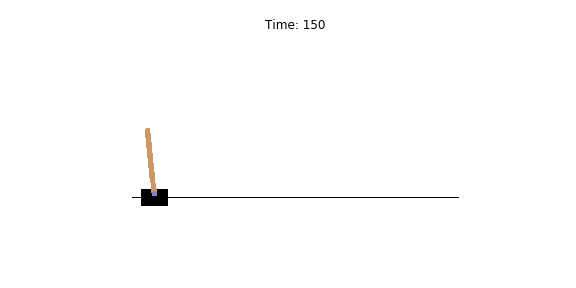
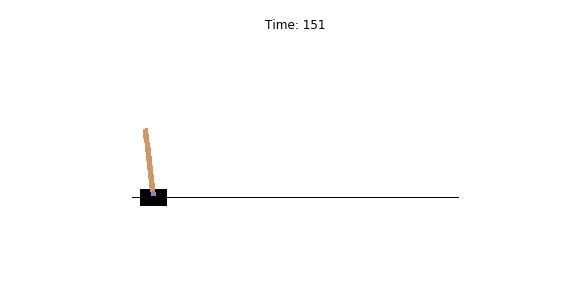
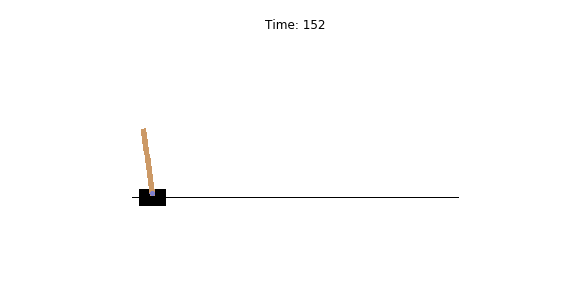
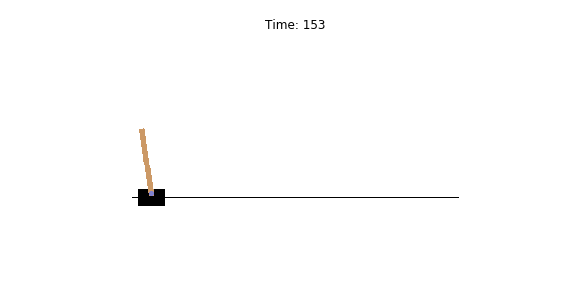
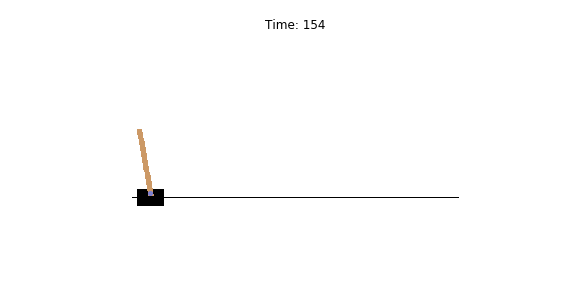
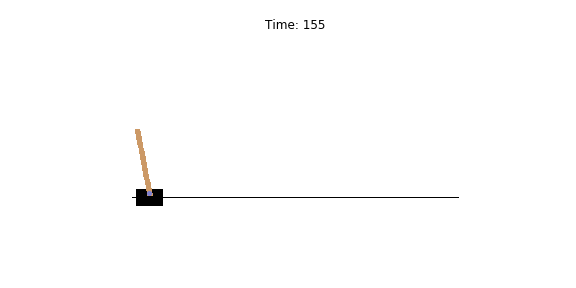
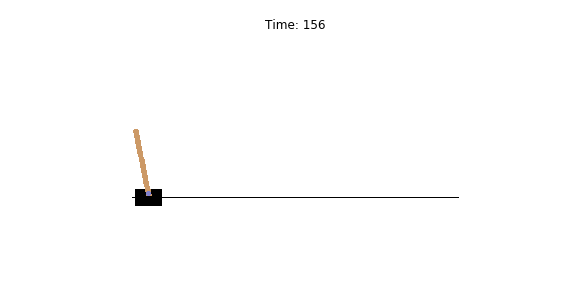
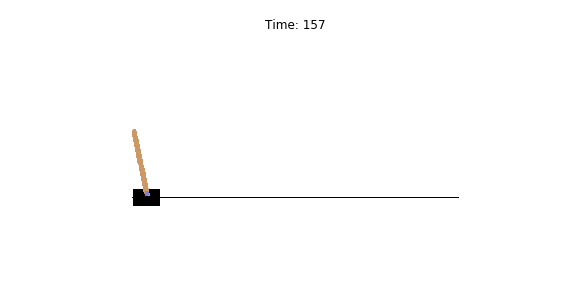
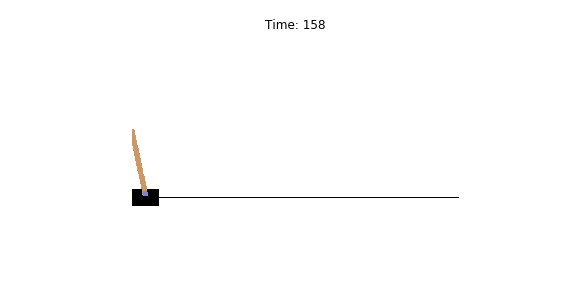
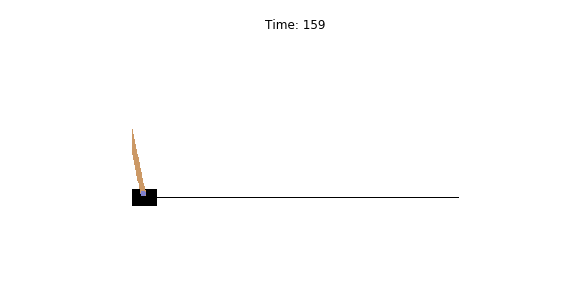
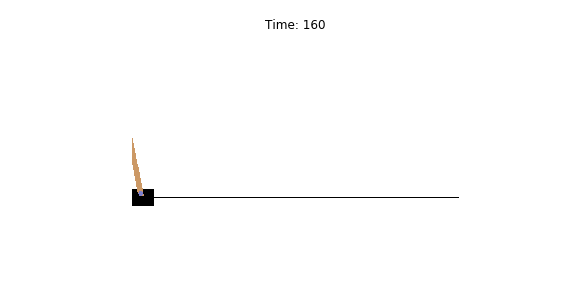
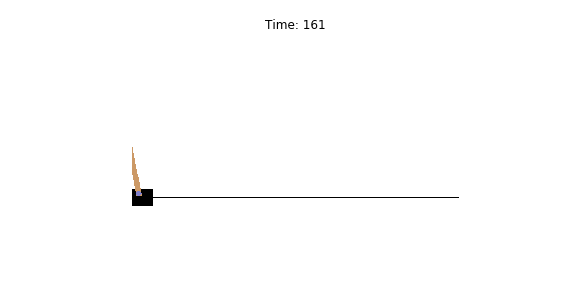
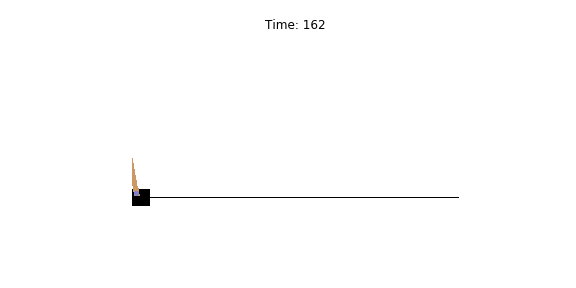
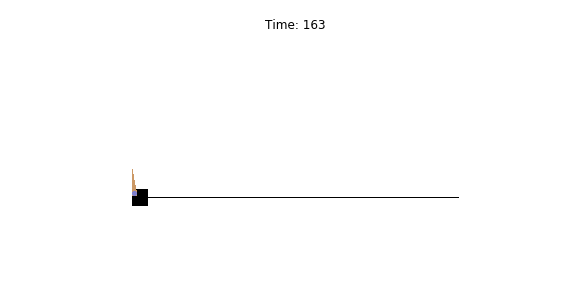
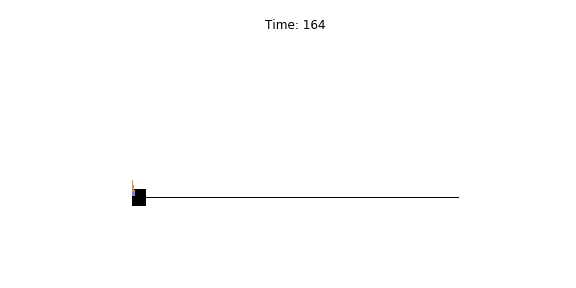

Episode [2000] Finished after: [165] steps, Reward: [165.00], Average Reward: [181.41]
Episode [2100] Finished after: [200] steps, Reward: [200.00], Average Reward: [178.73]
Episode [2200] Finished after: [200] steps, Reward: [200.00], Average Reward: [187.95]
Episode [2300] Finished after: [200] steps, Reward: [200.00], Average Reward: [181.73]
Episode [2400] Finished after: [179] steps, Reward: [179.00], Average Reward: [189.77]



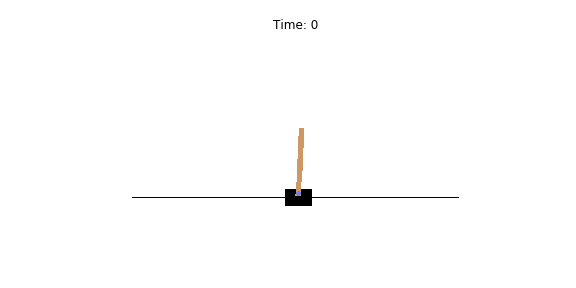
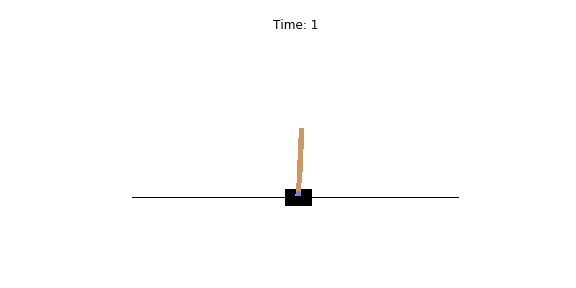
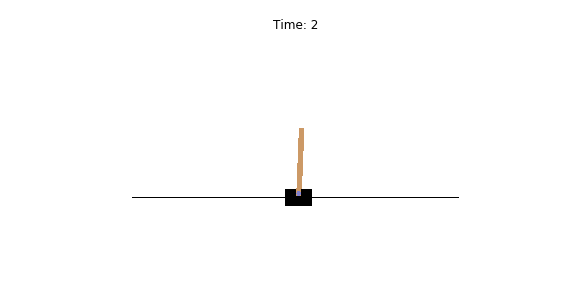
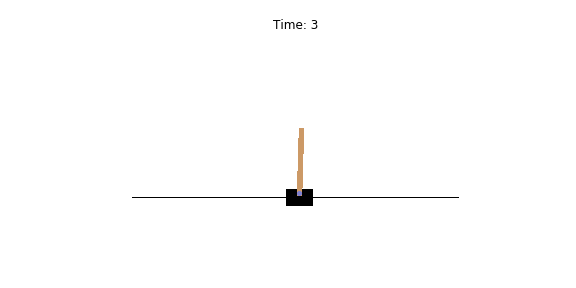
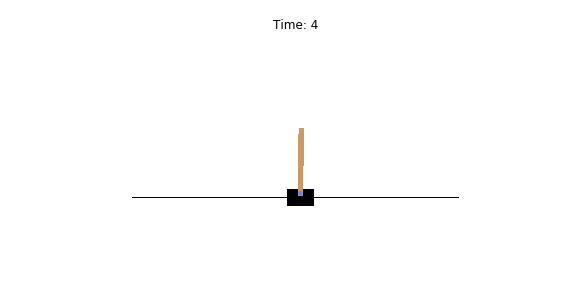
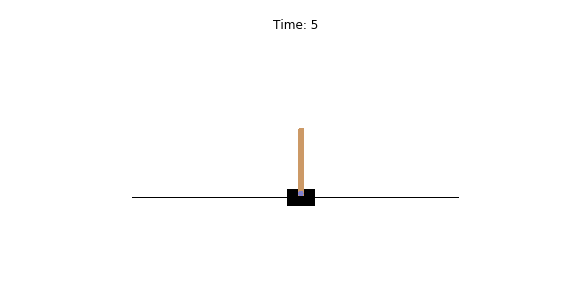
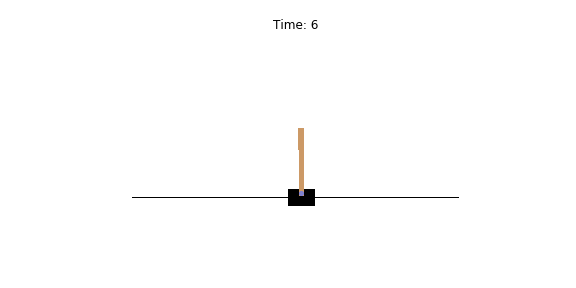
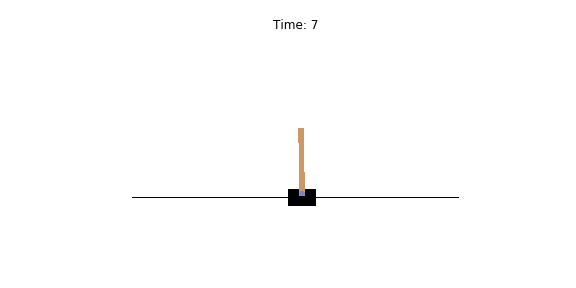
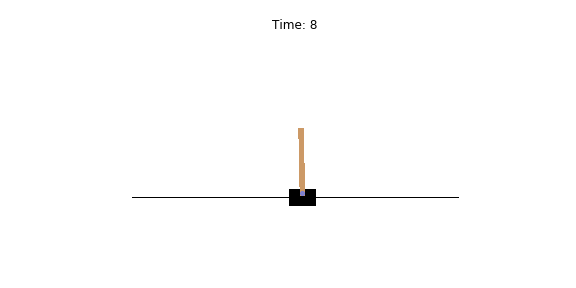
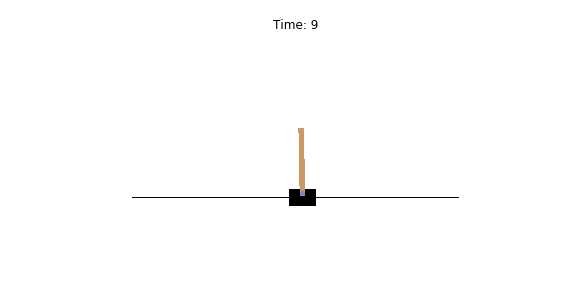
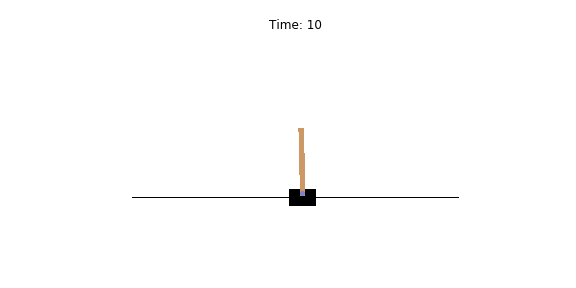
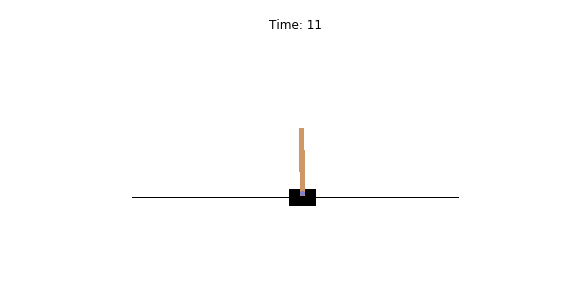
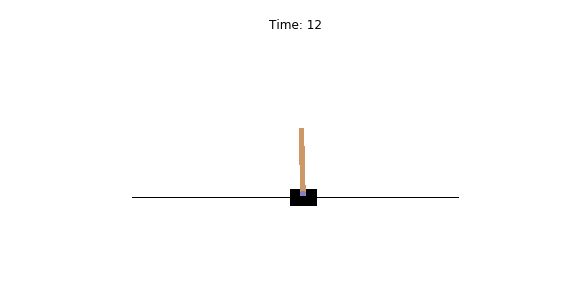
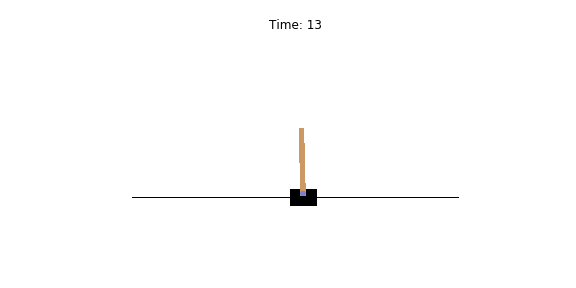
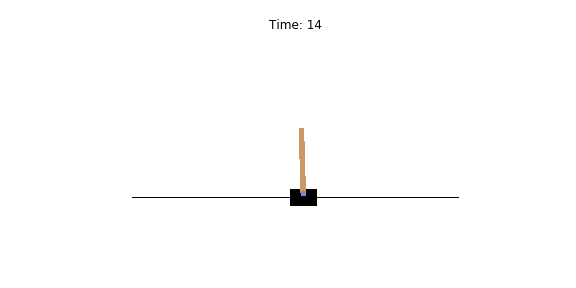
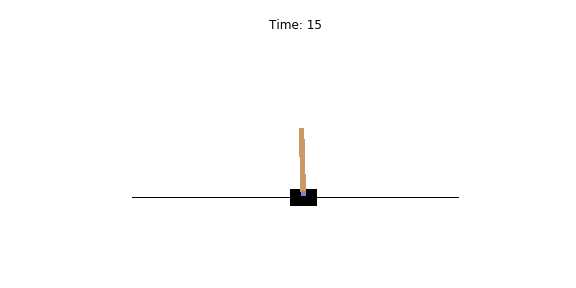
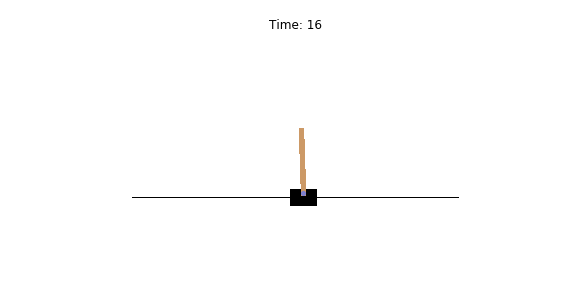
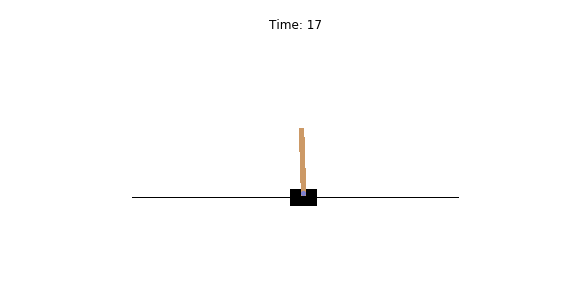
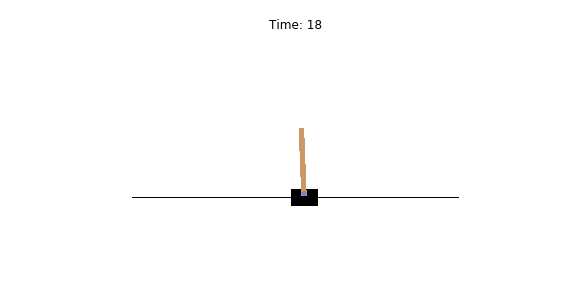
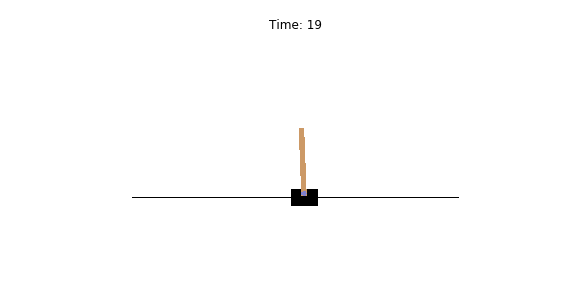
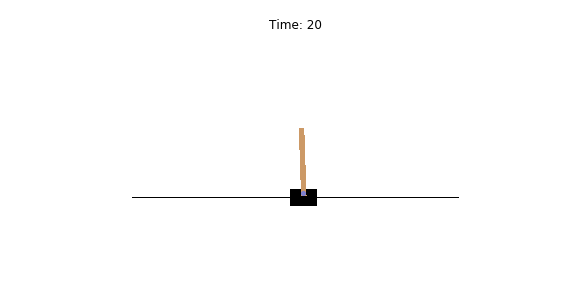
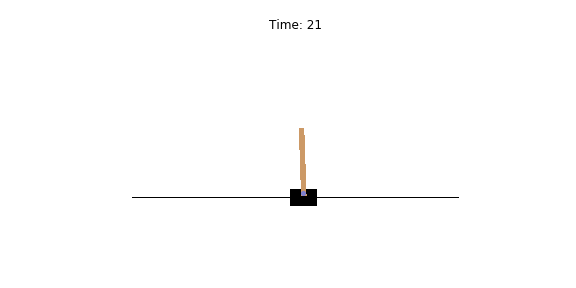
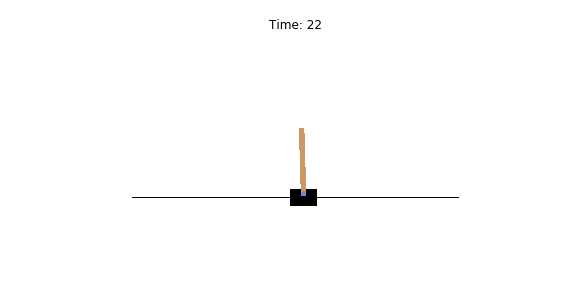
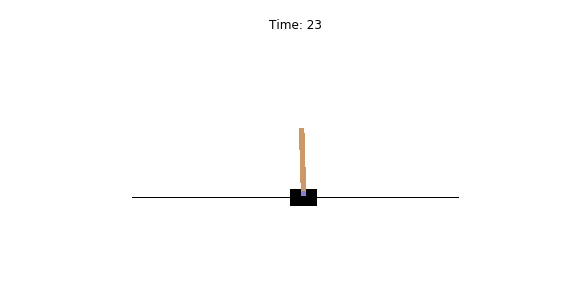
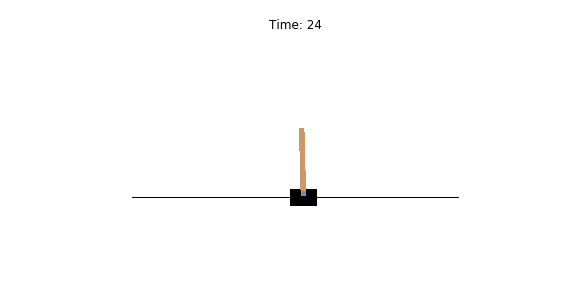
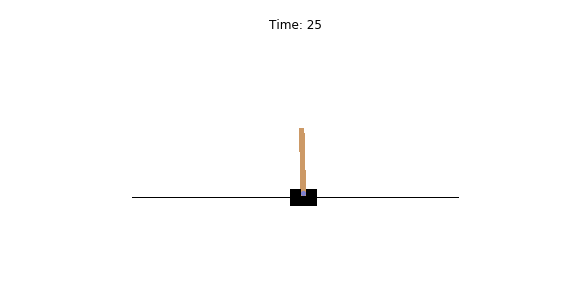
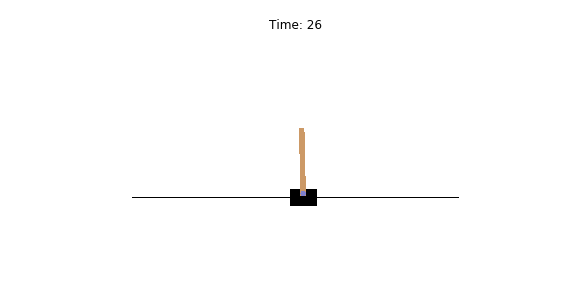
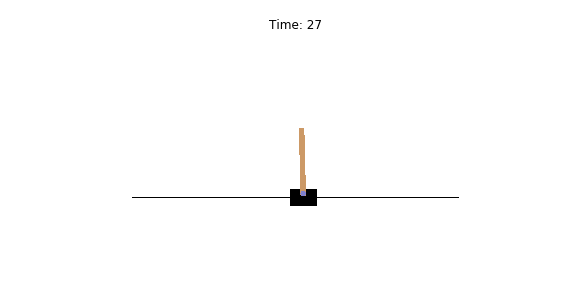
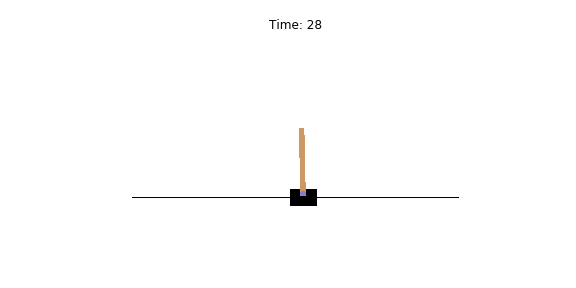
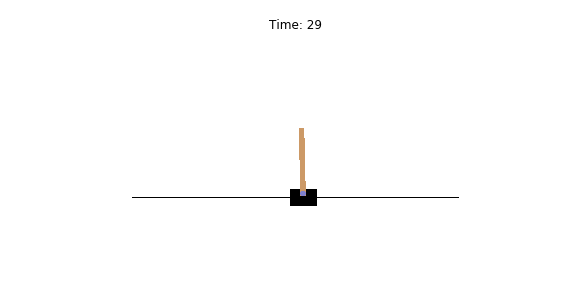
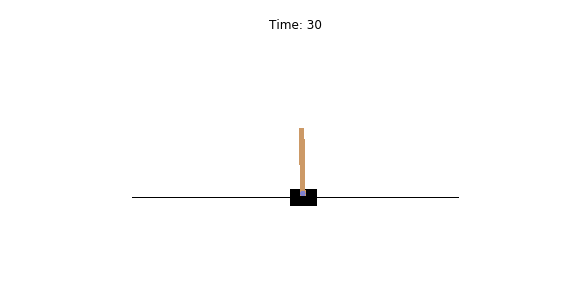
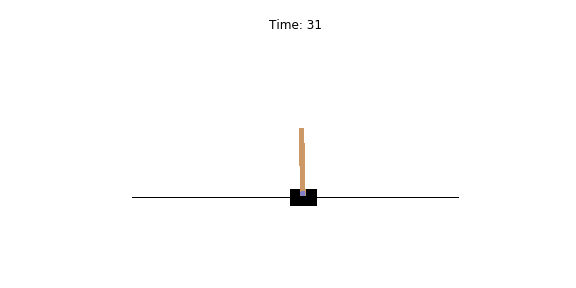
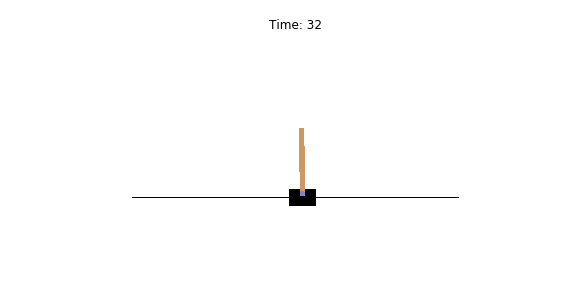
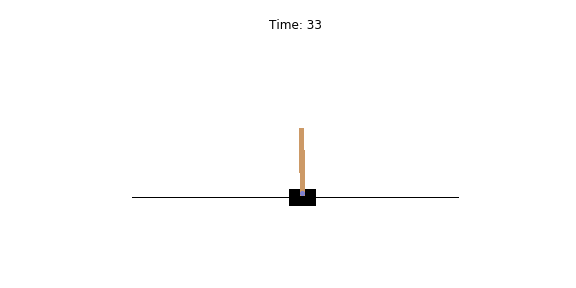
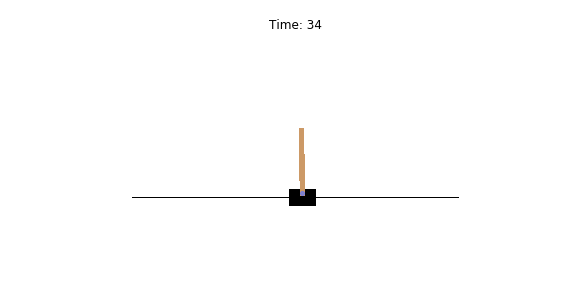
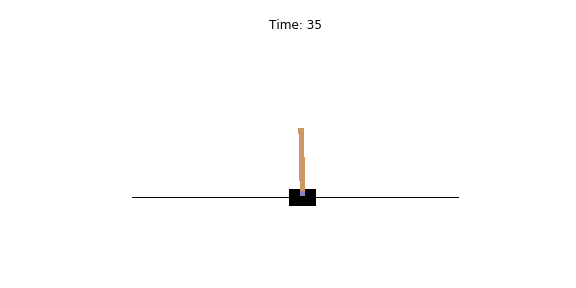
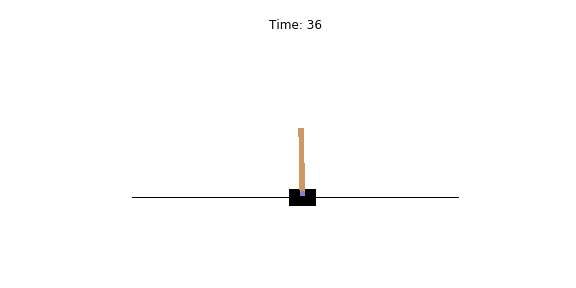
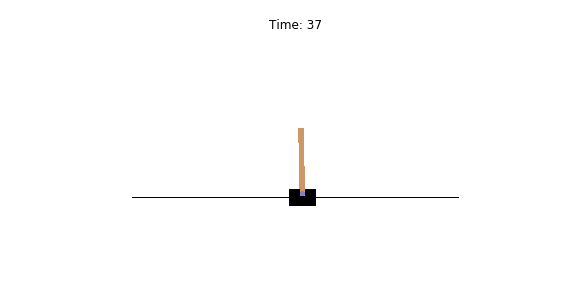
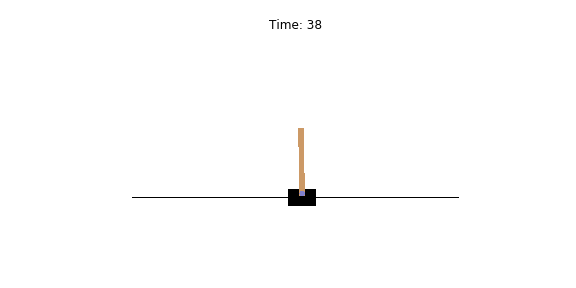
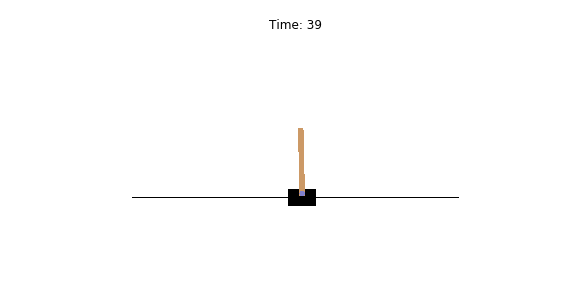
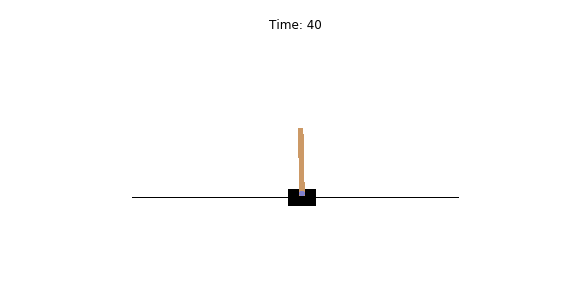
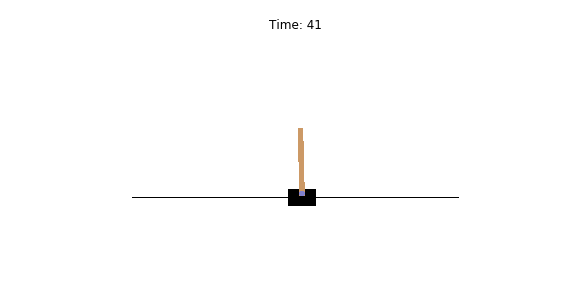
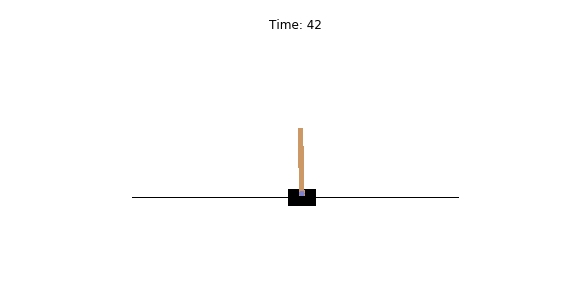
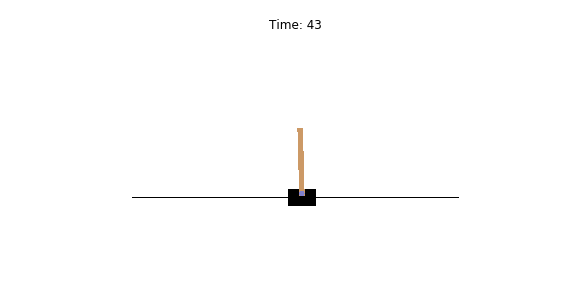
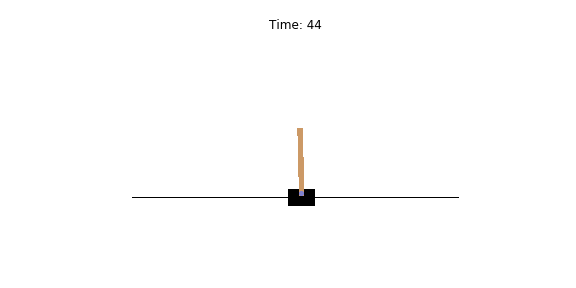
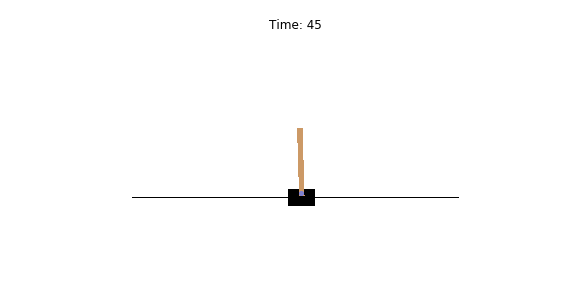
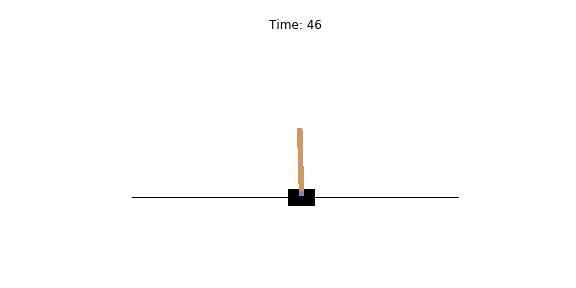
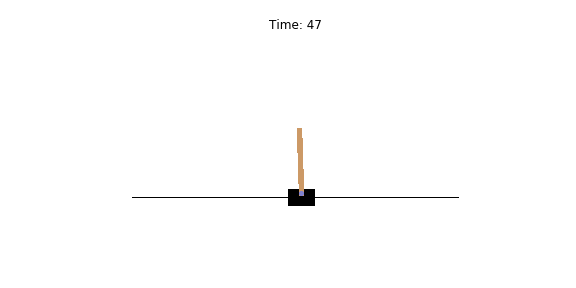
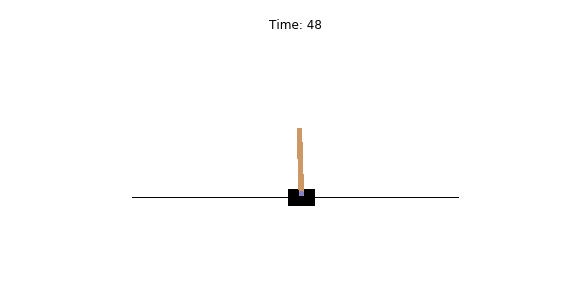
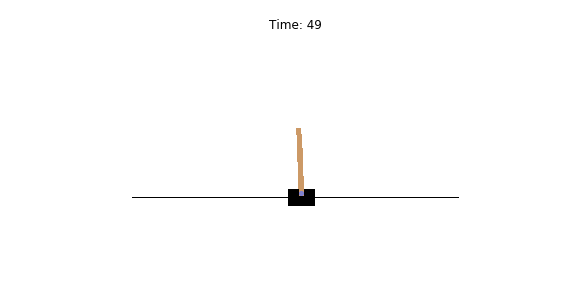
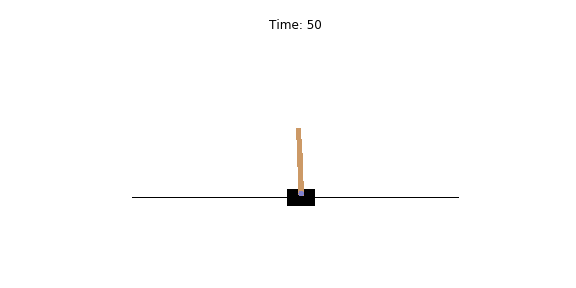
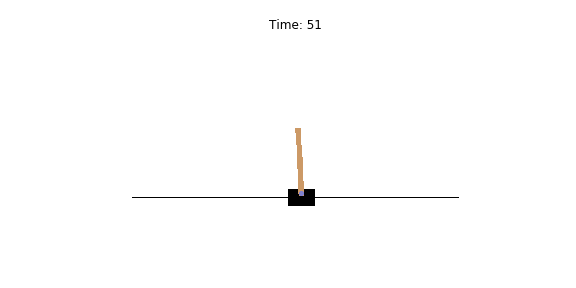
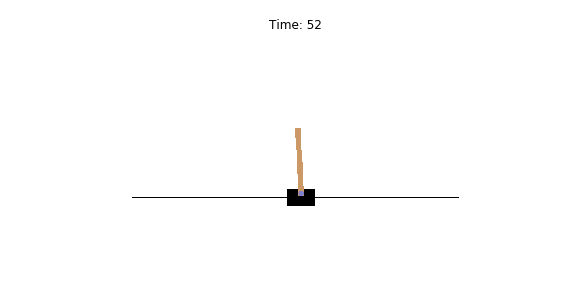
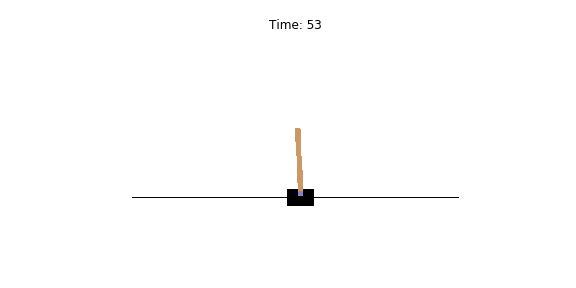
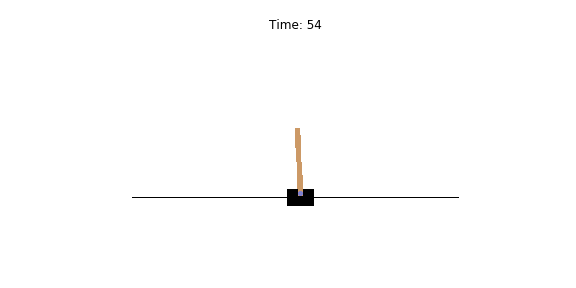
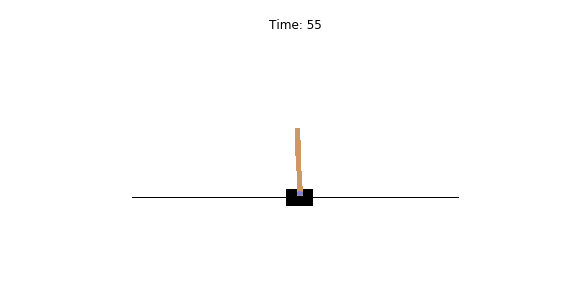
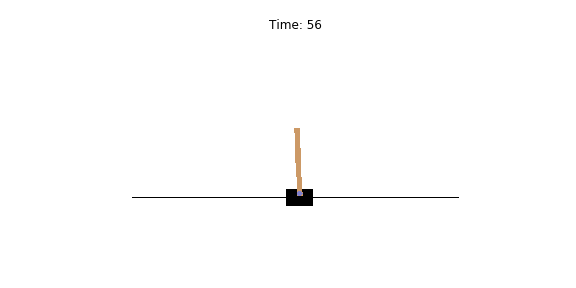
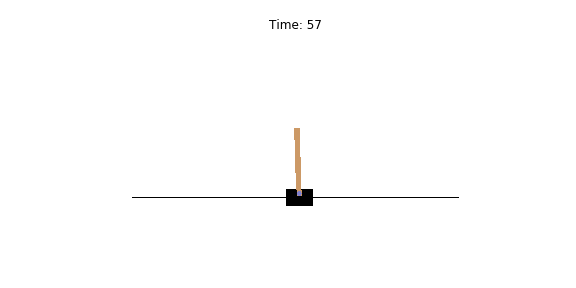
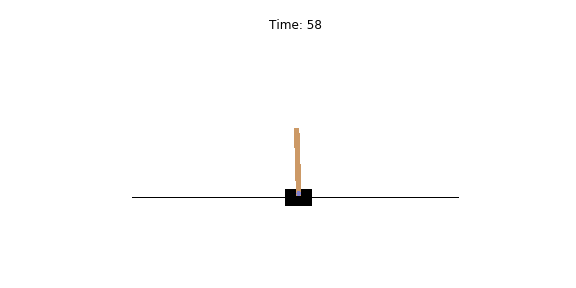
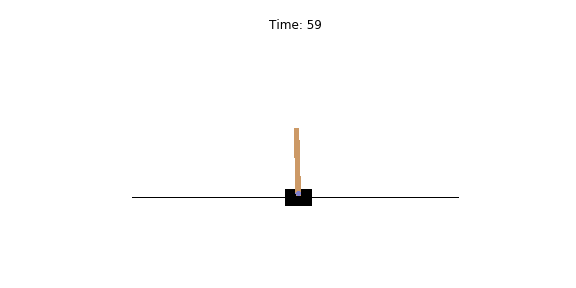
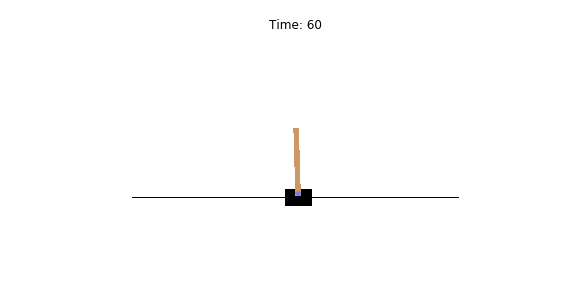
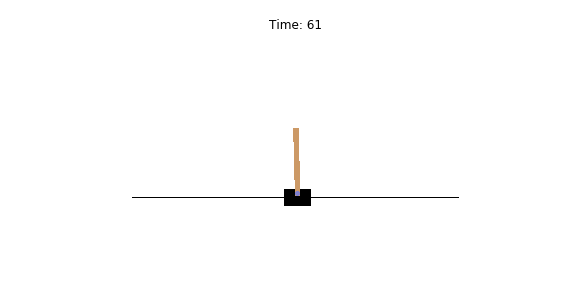
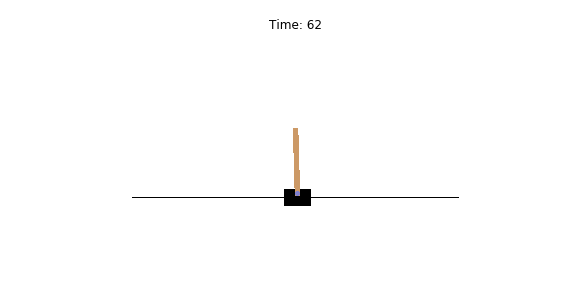
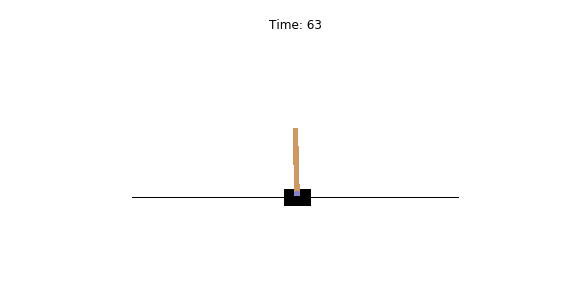
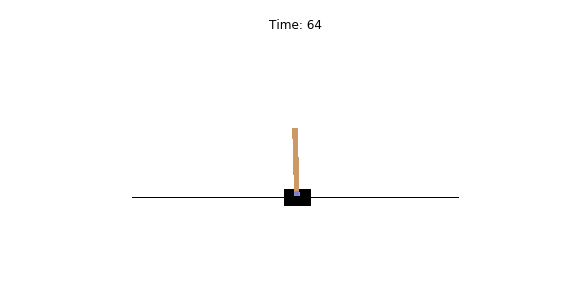
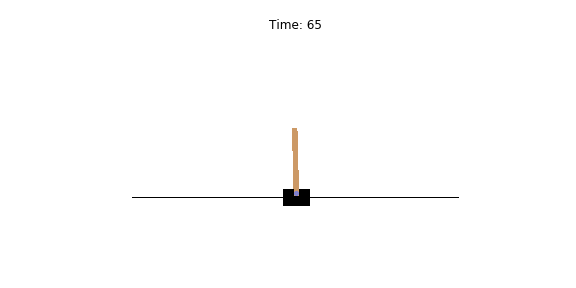
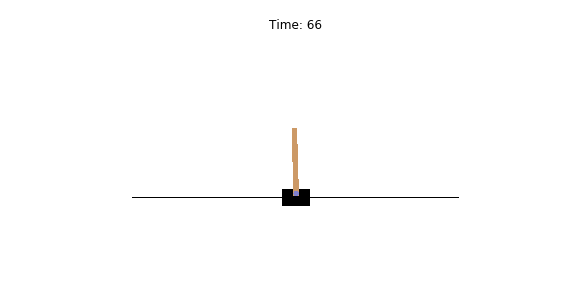
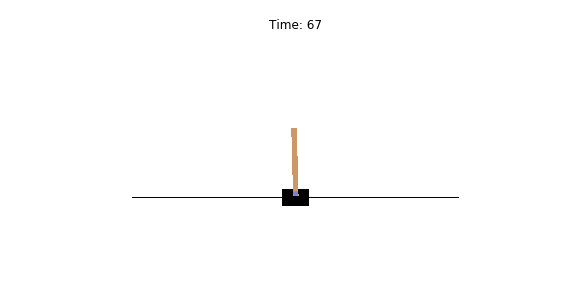
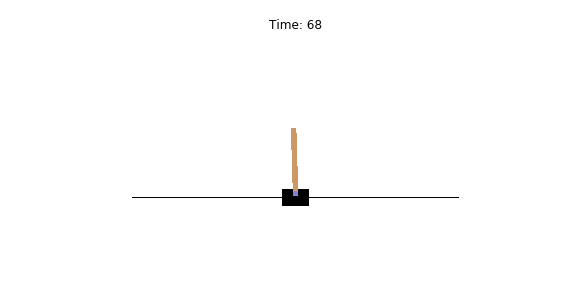
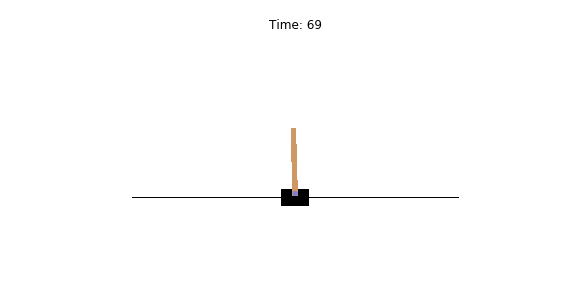
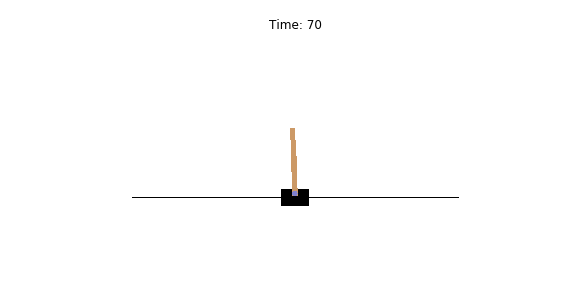
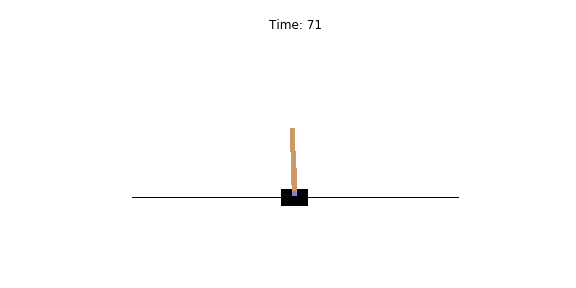
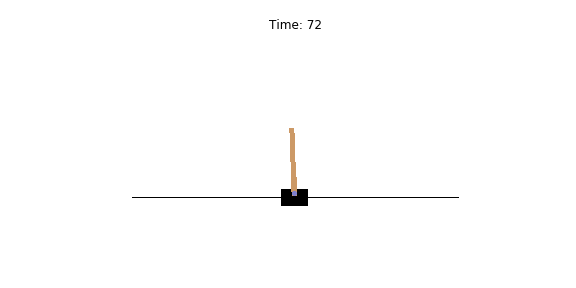
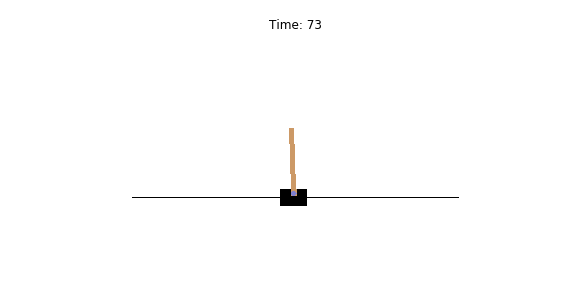
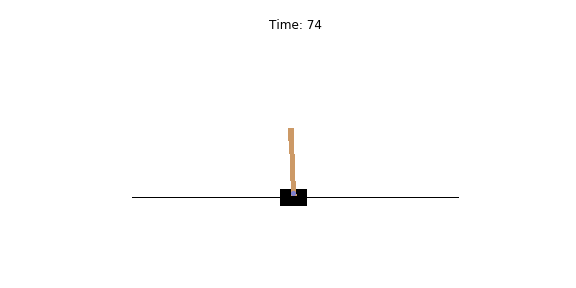
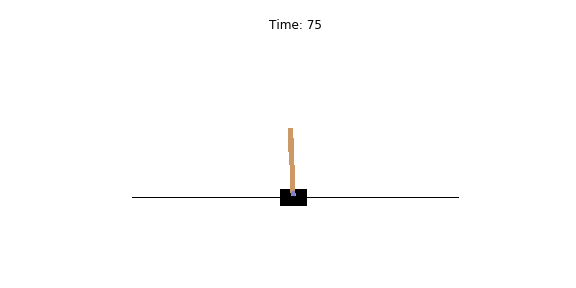
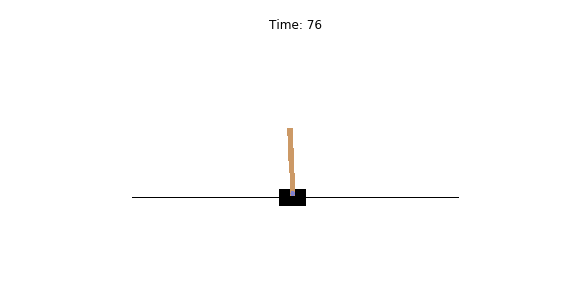
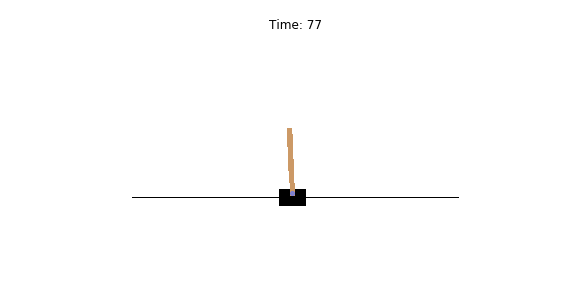
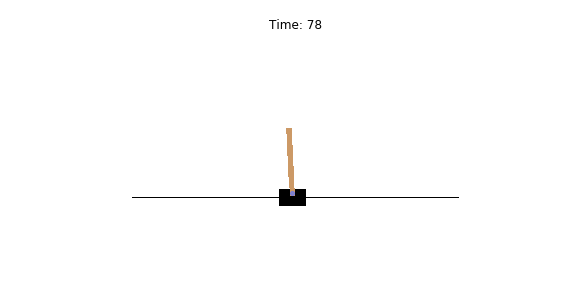
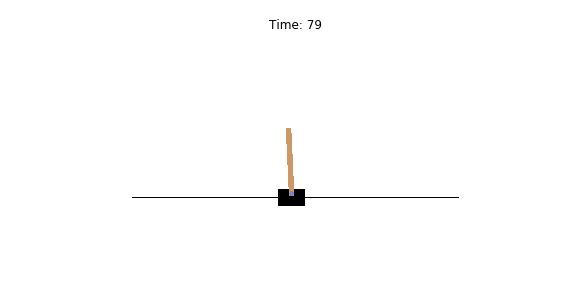
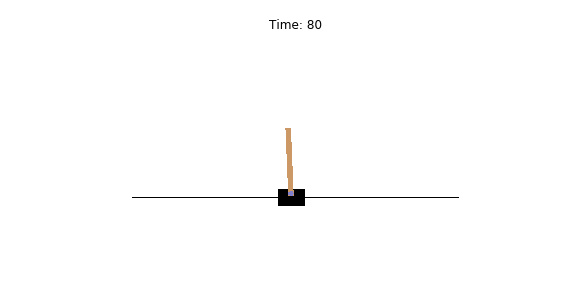
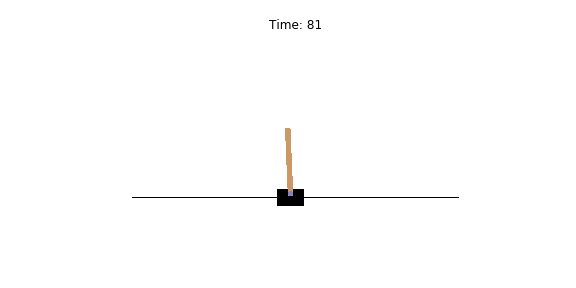
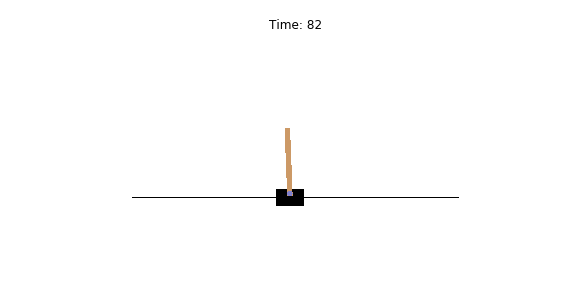
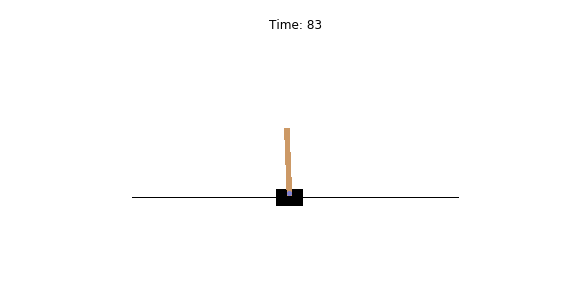
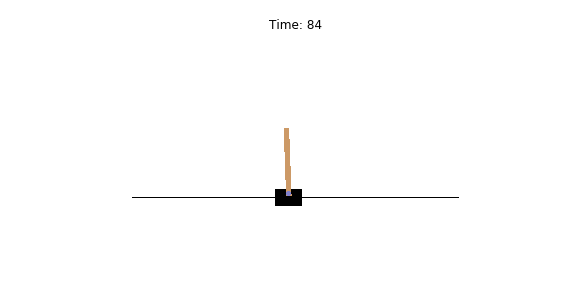
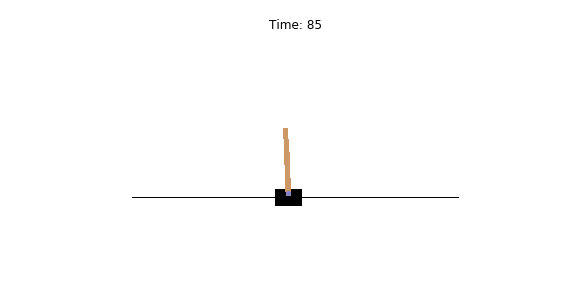
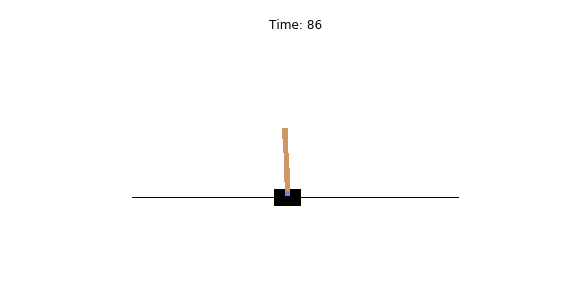
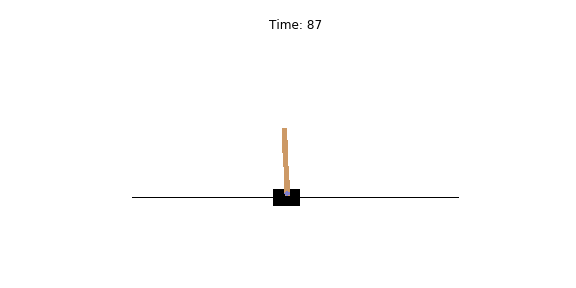
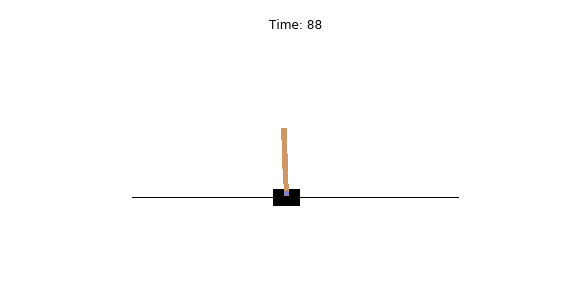
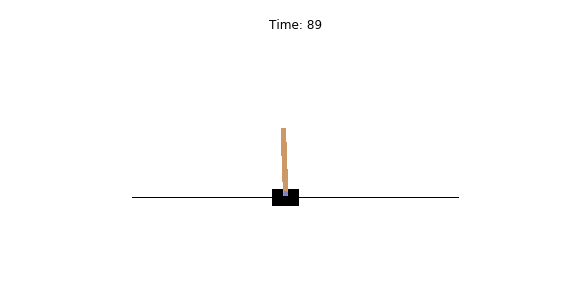
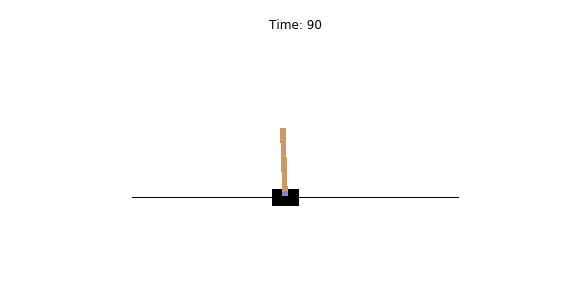
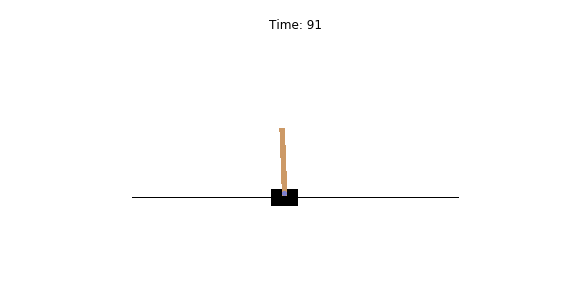
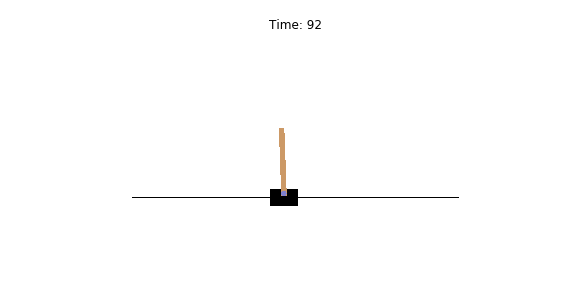
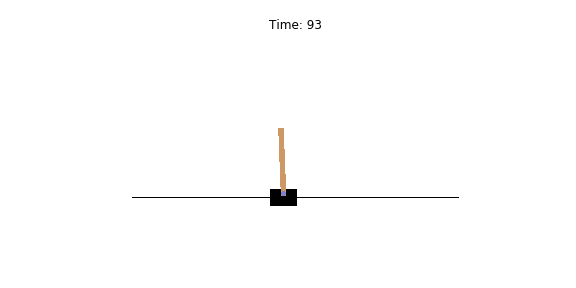
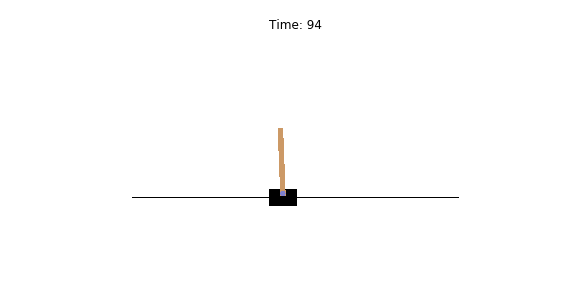
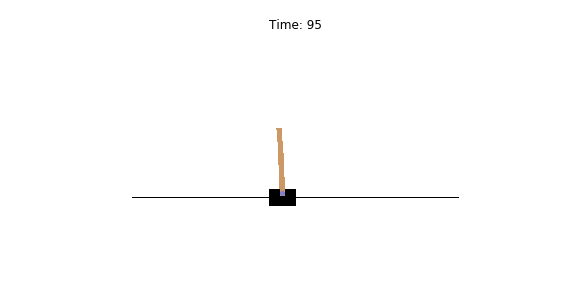
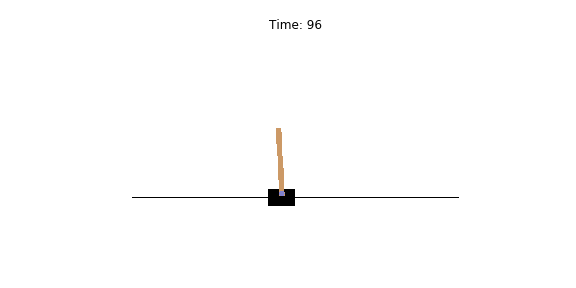
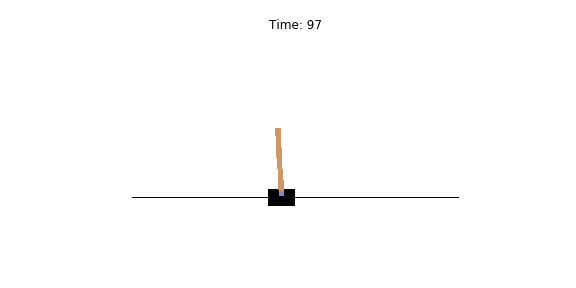
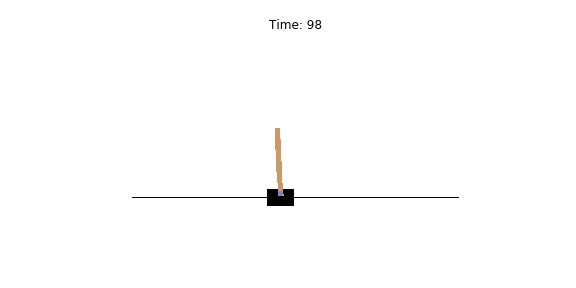
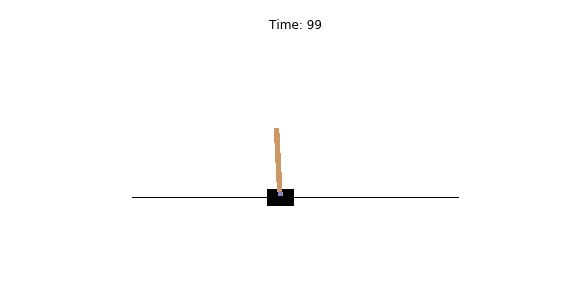
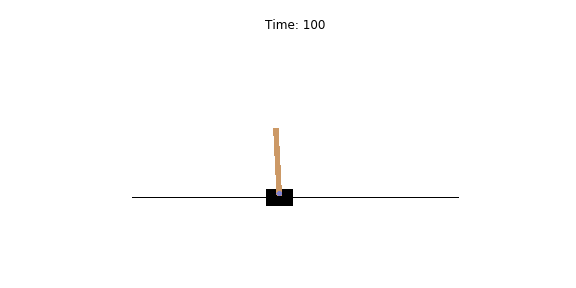
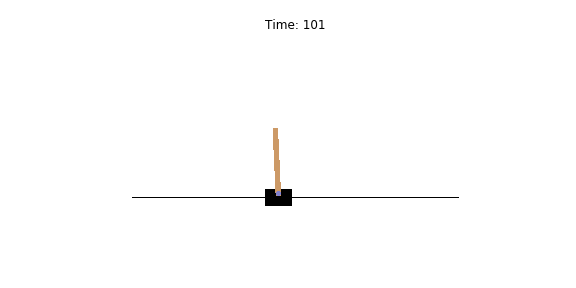
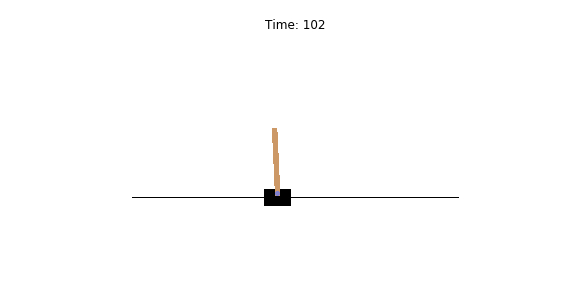
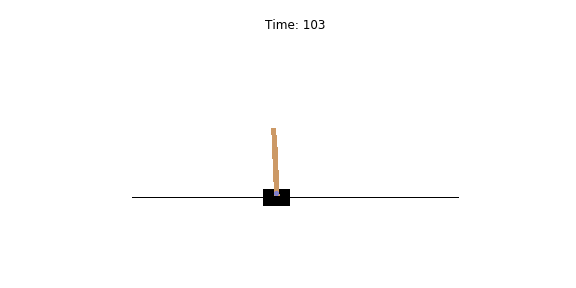
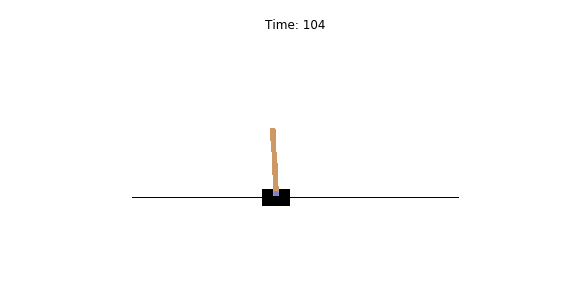
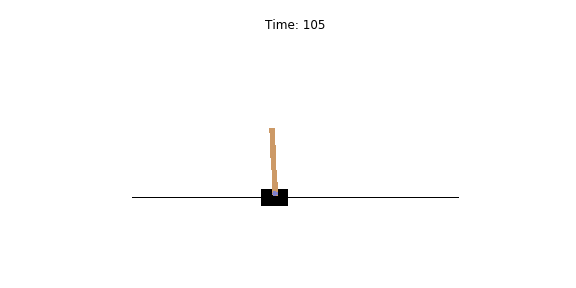
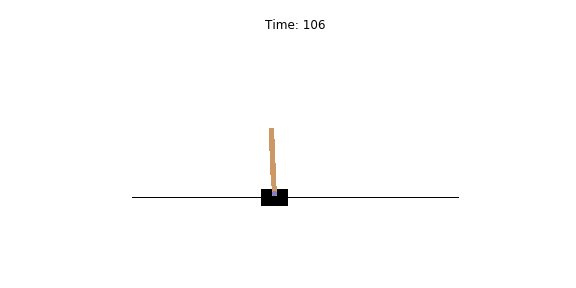
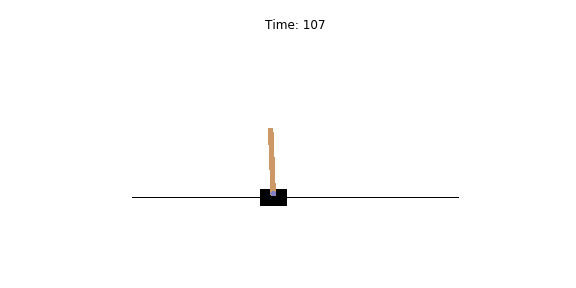
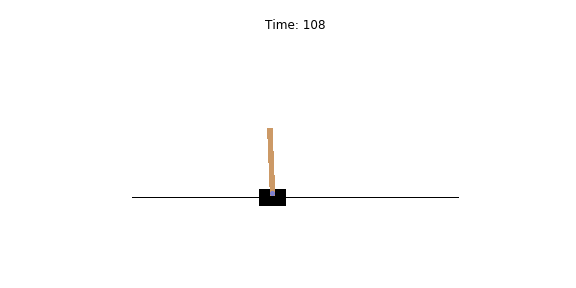
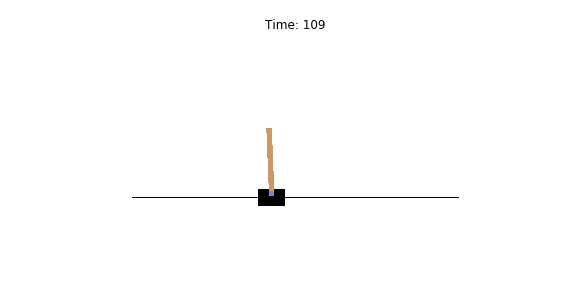
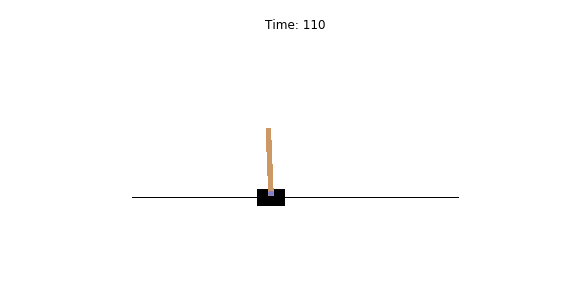
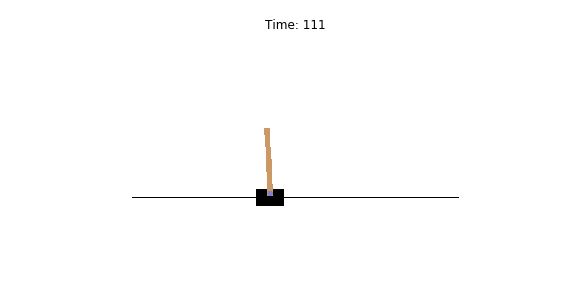
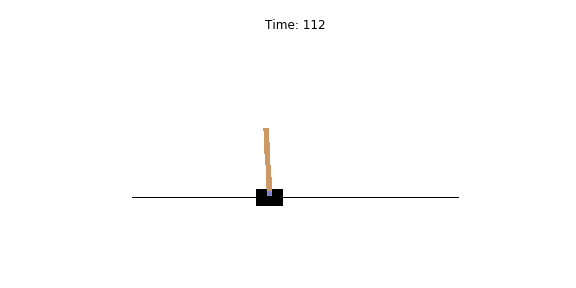
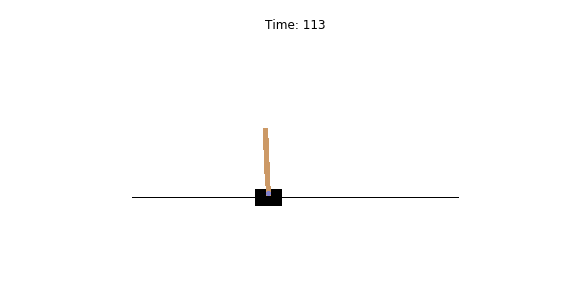
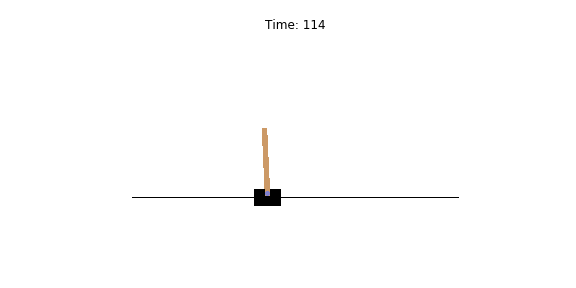
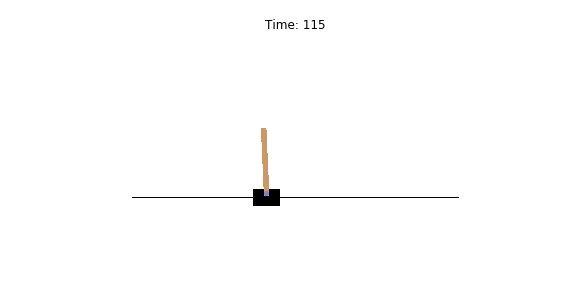
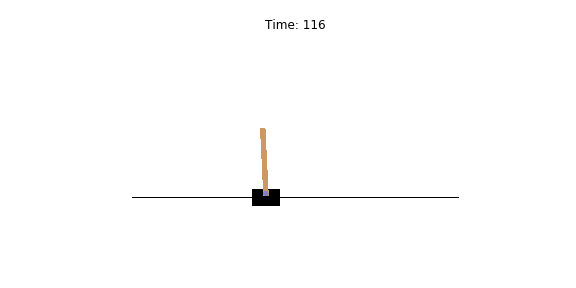
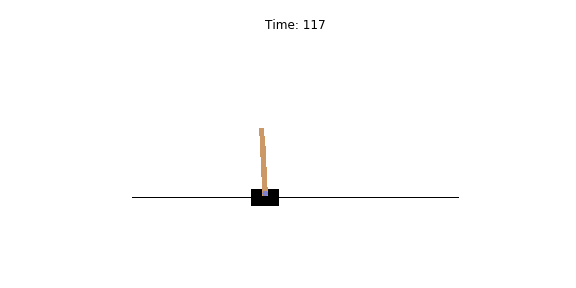
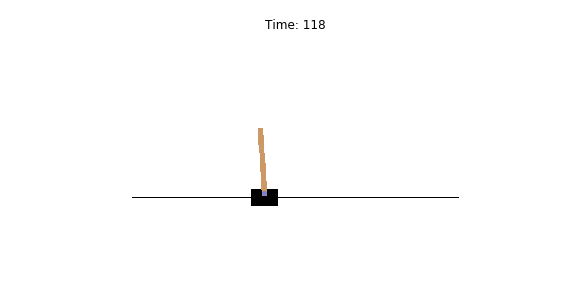
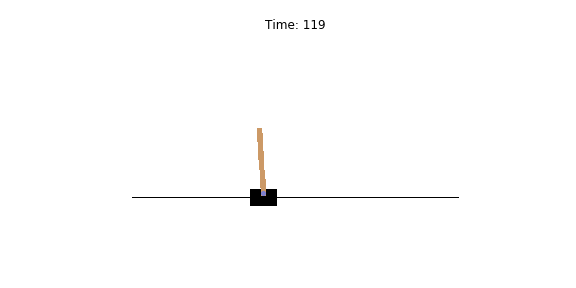
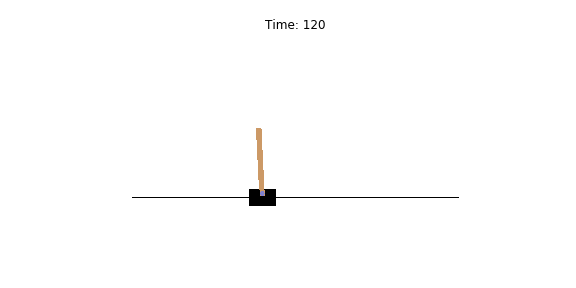
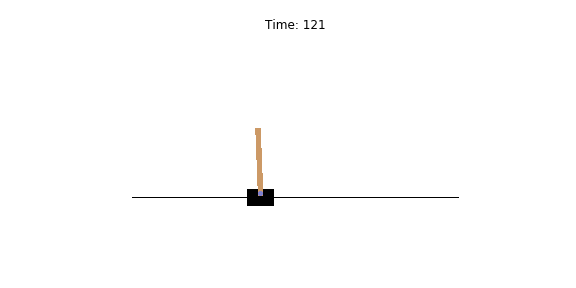
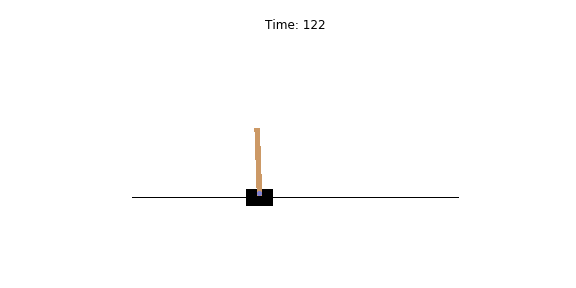
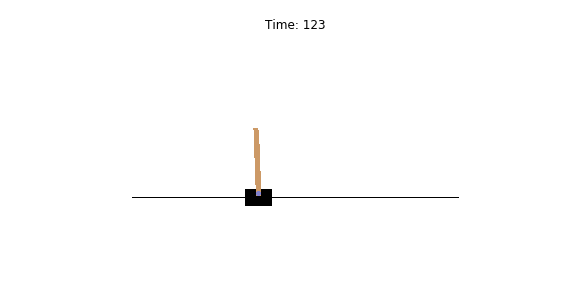
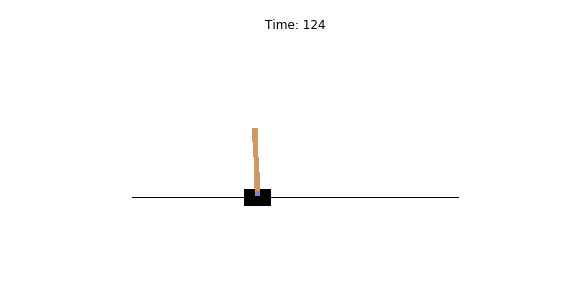
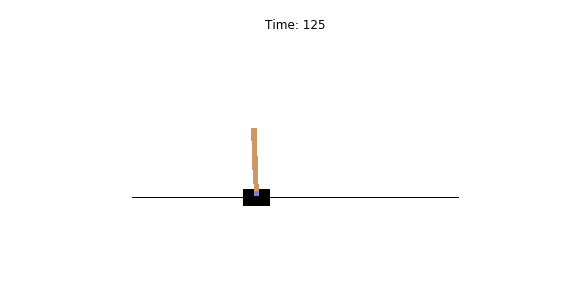
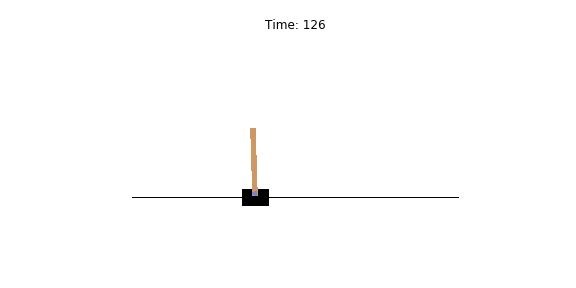
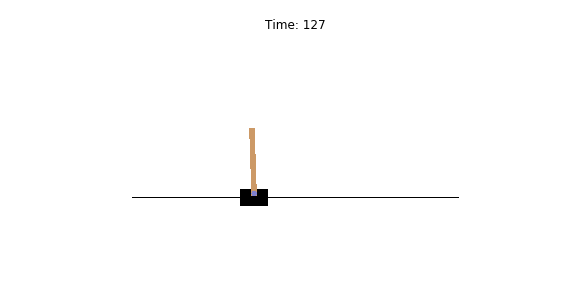
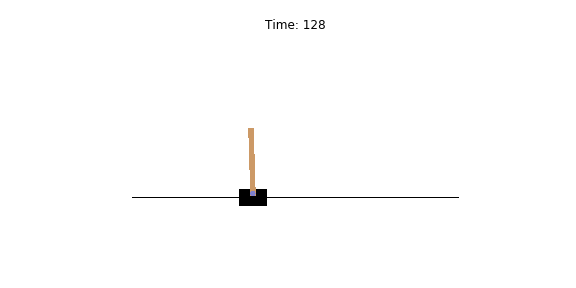
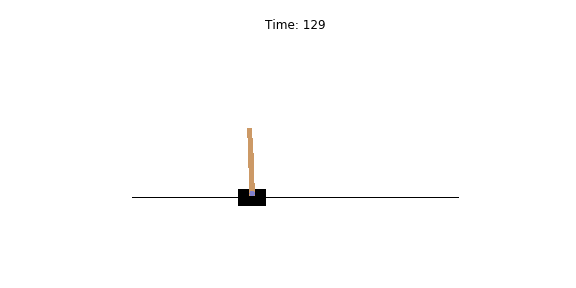
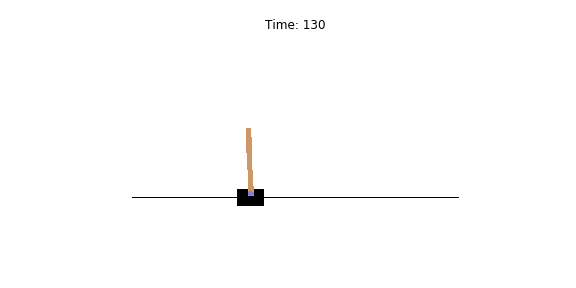
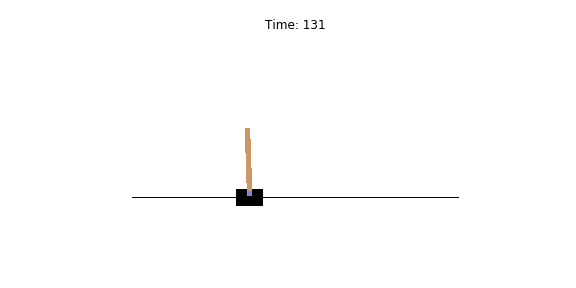
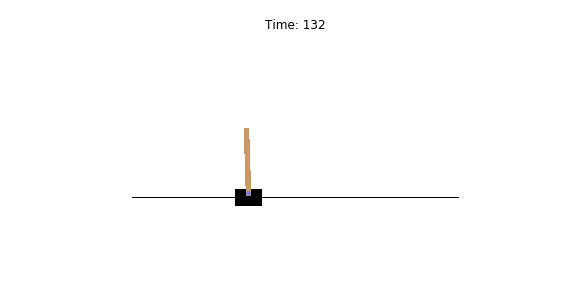
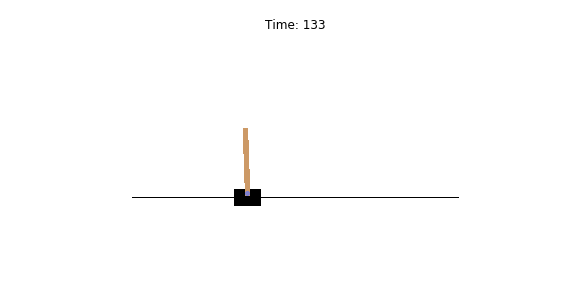
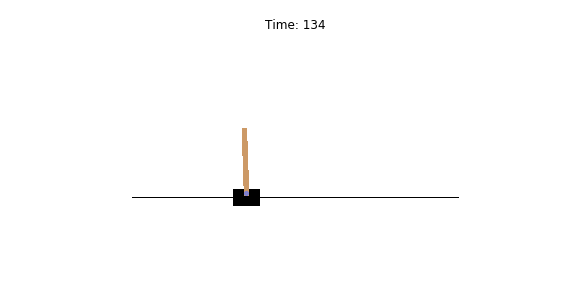
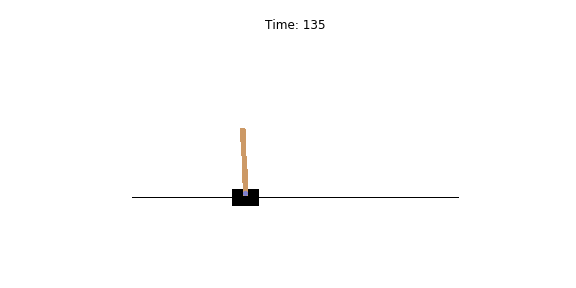
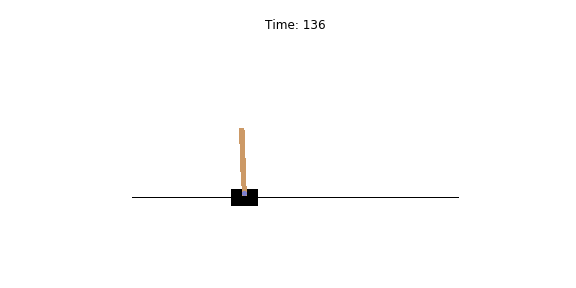
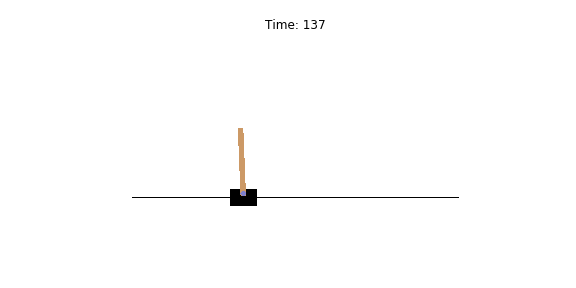
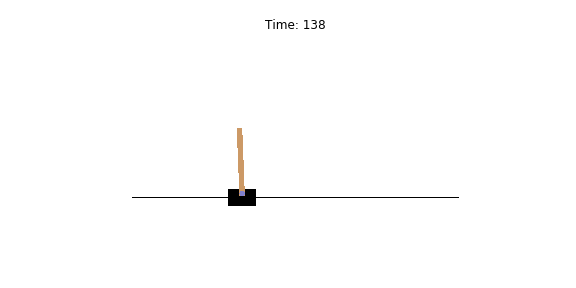
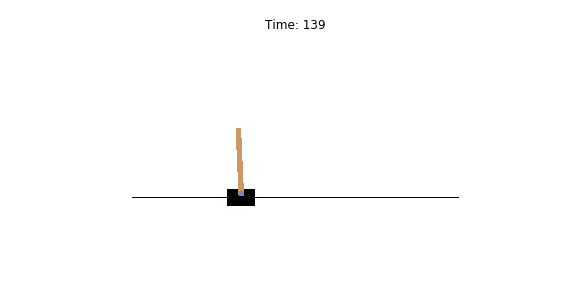
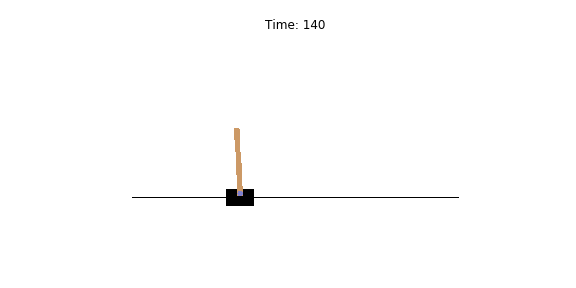
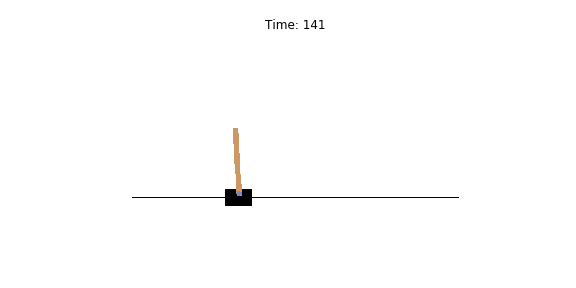
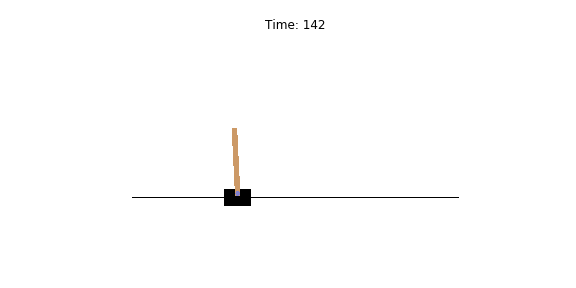
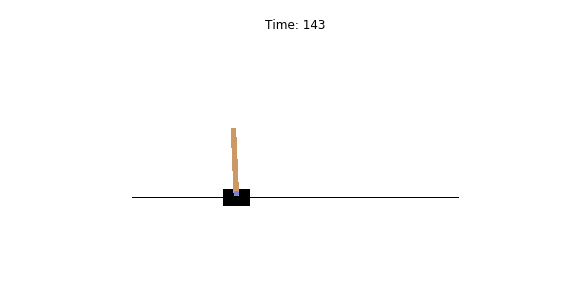
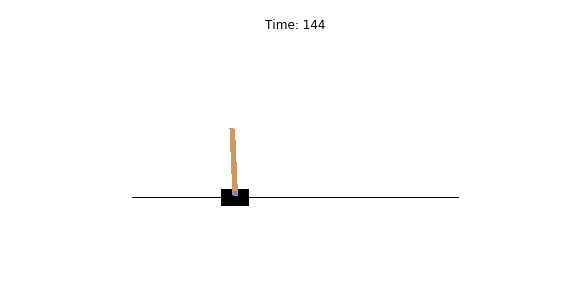
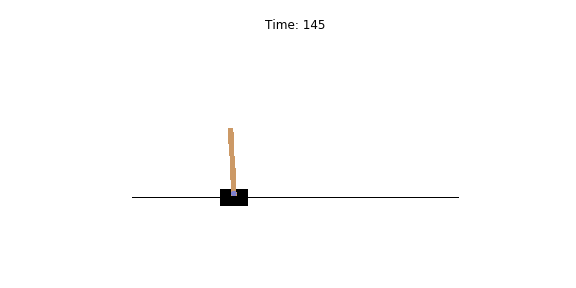
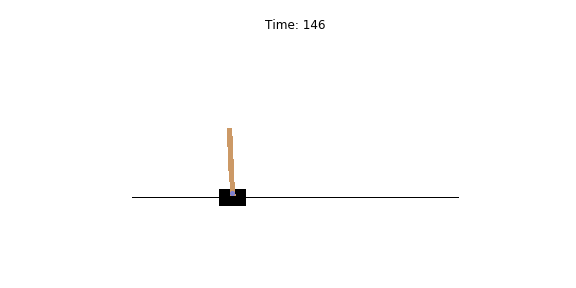
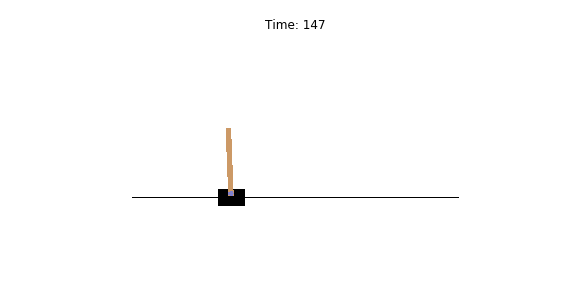
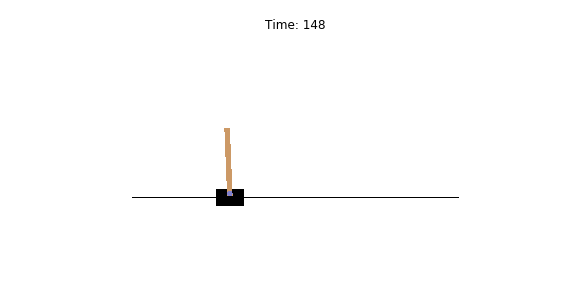
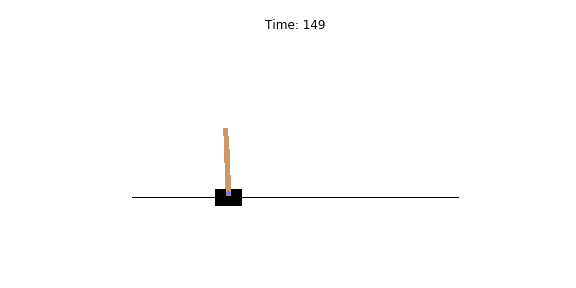
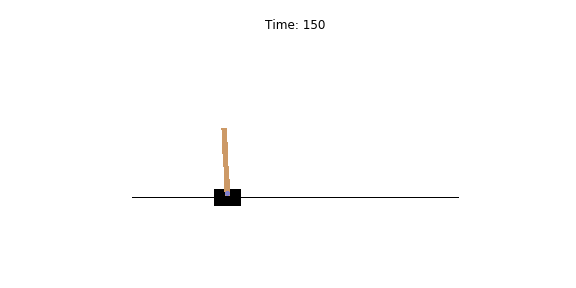
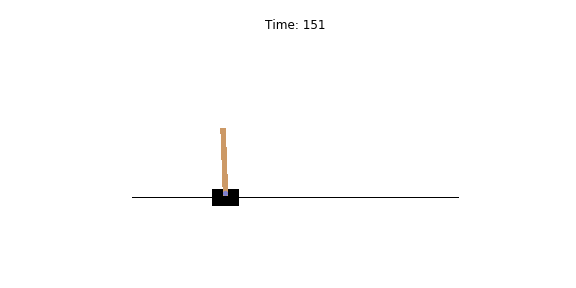
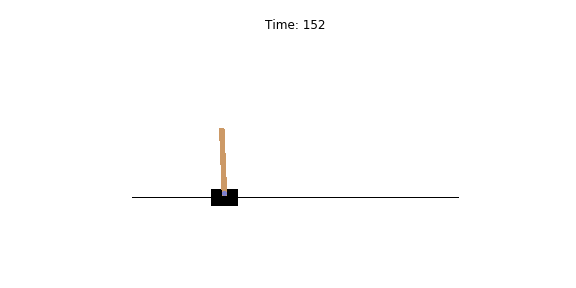
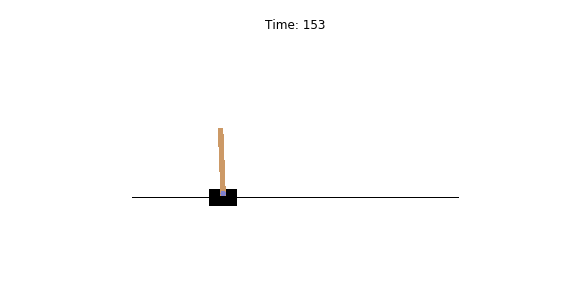
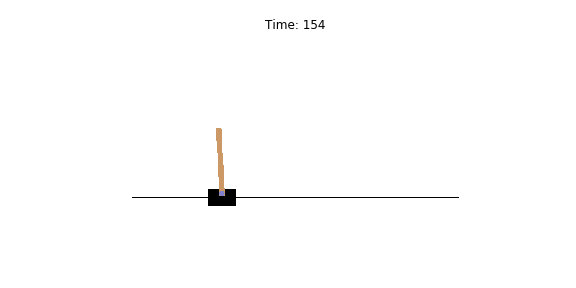
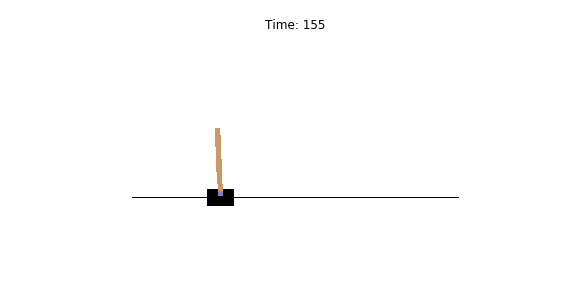
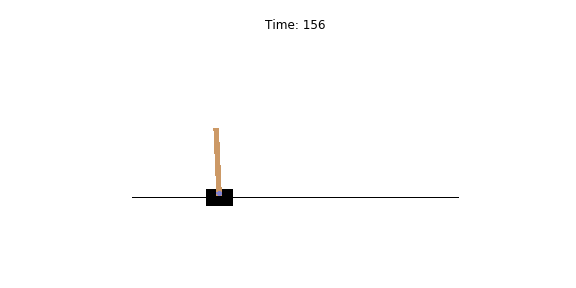
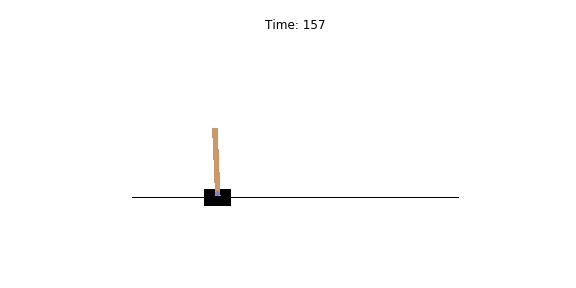
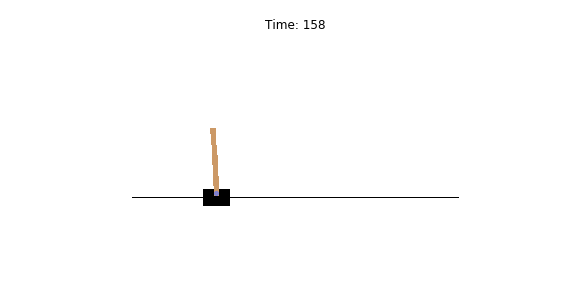
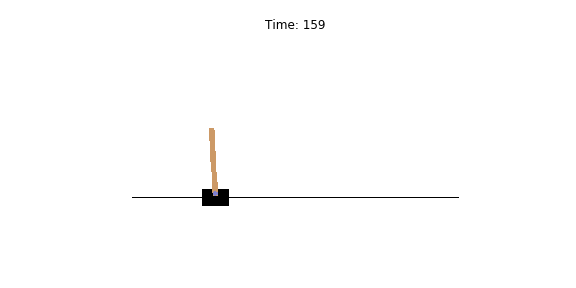
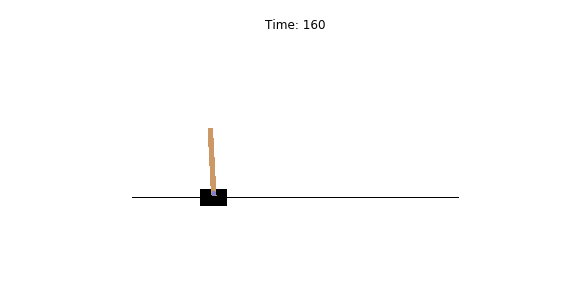
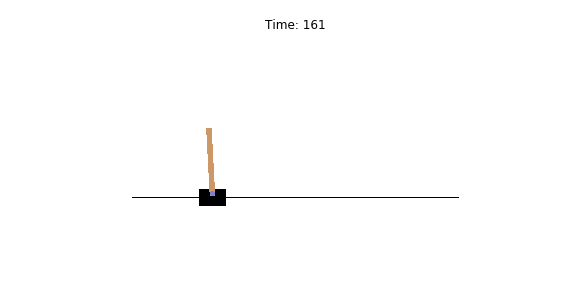
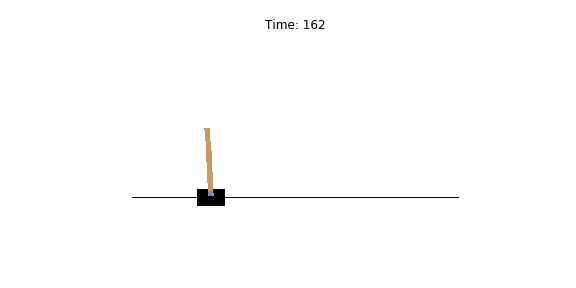
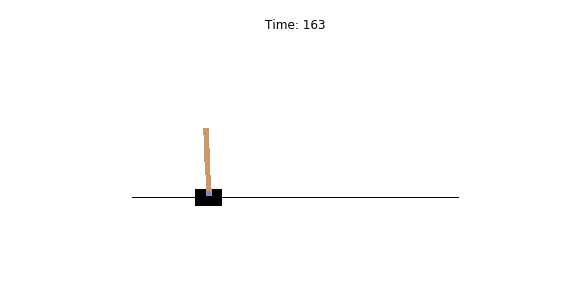
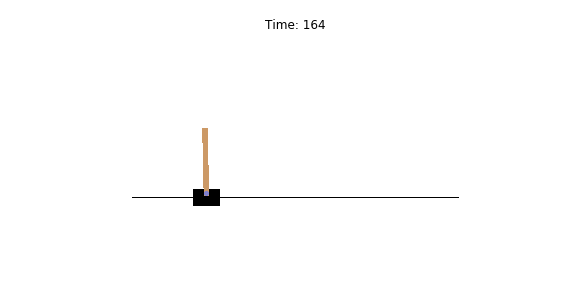
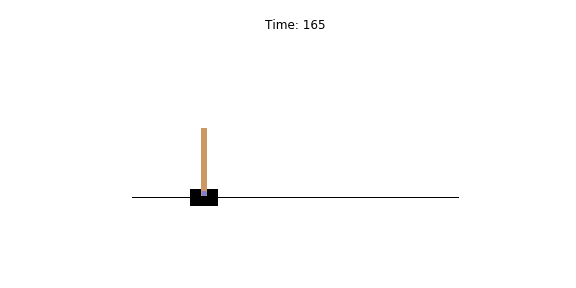
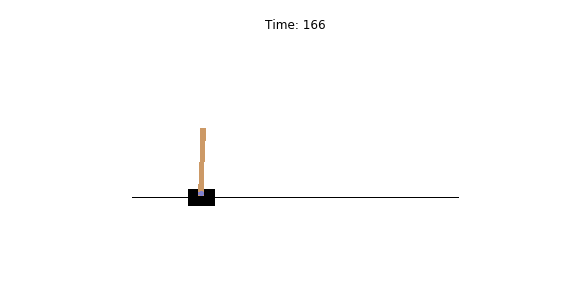
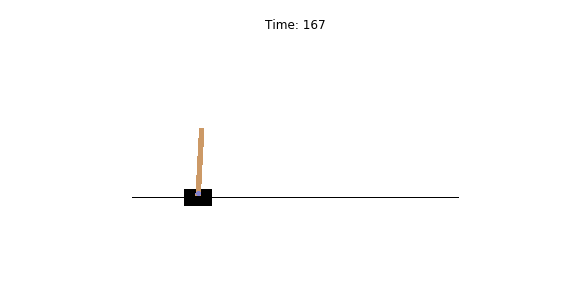
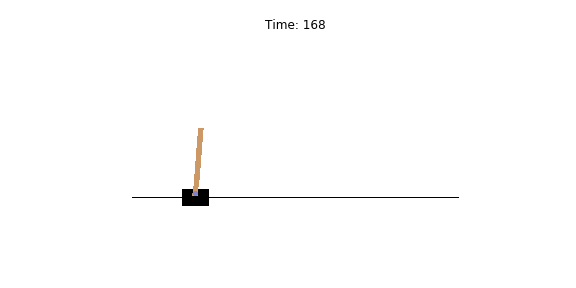
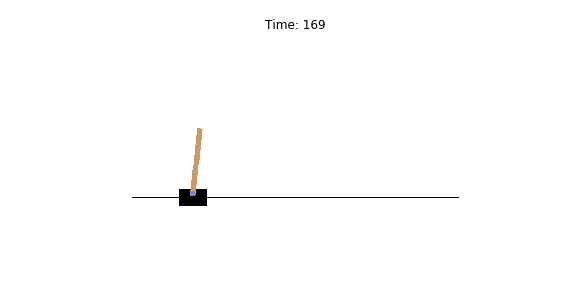
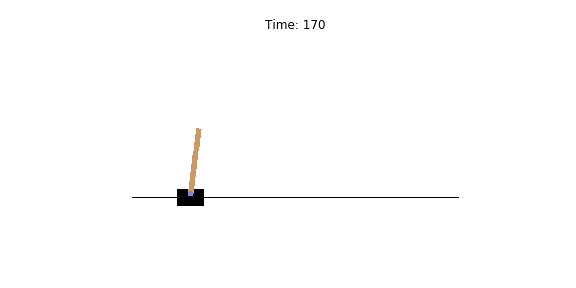
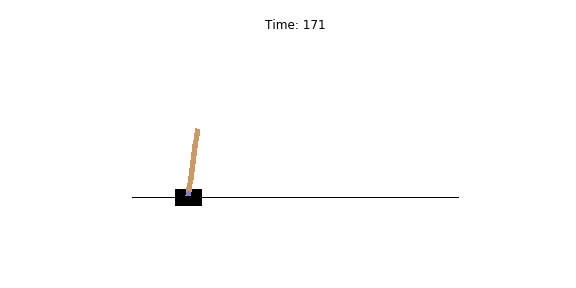
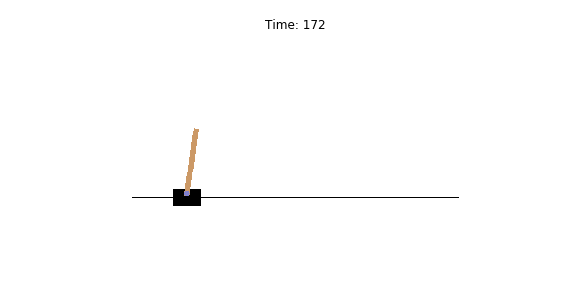
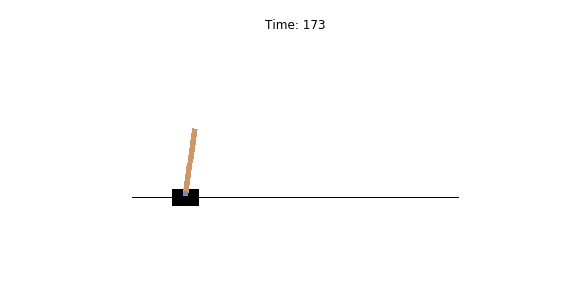
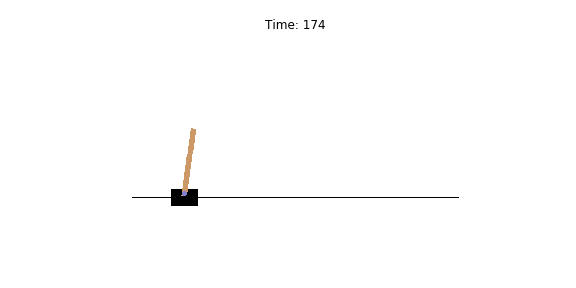
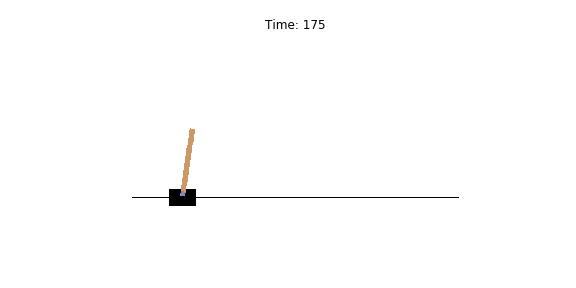
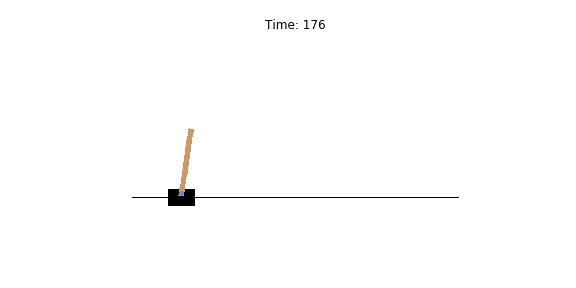
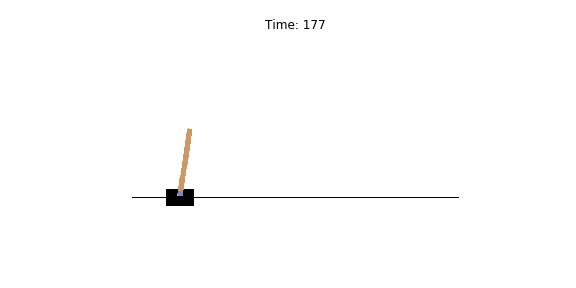
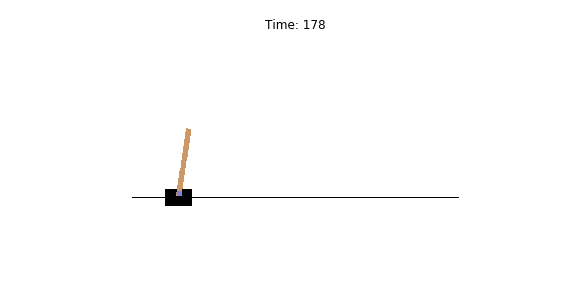
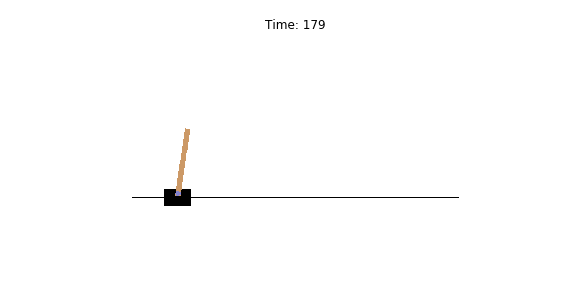
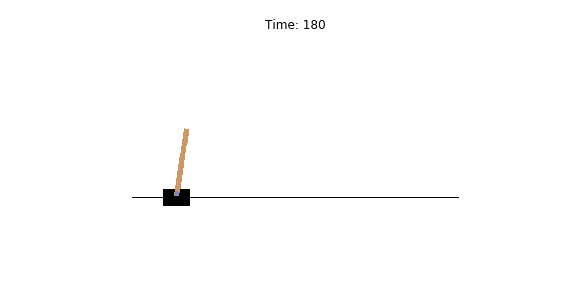
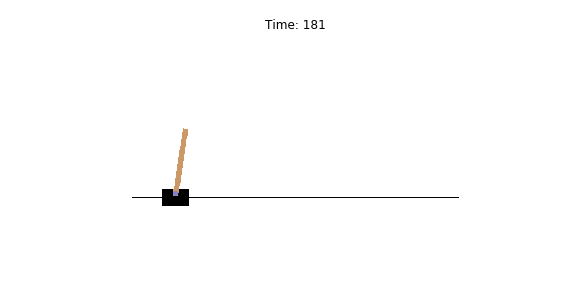
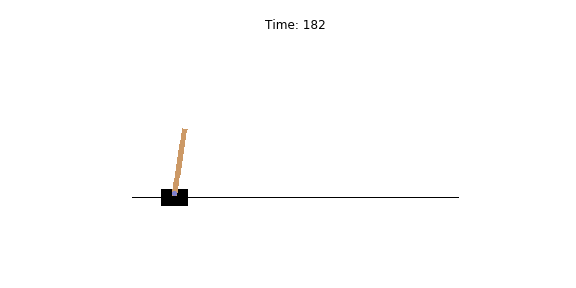
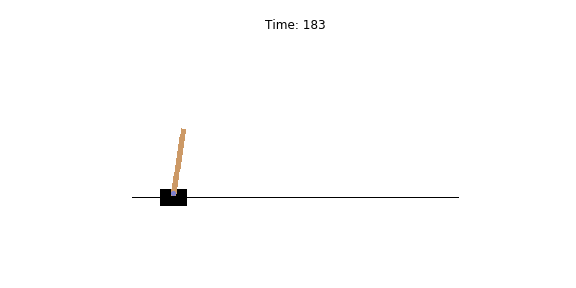
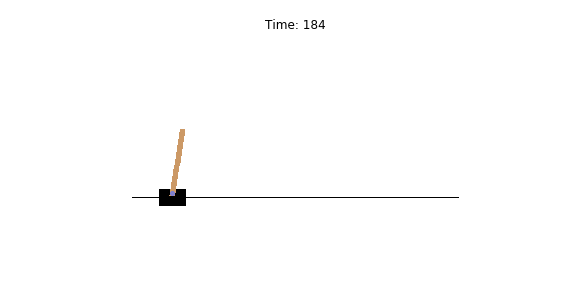
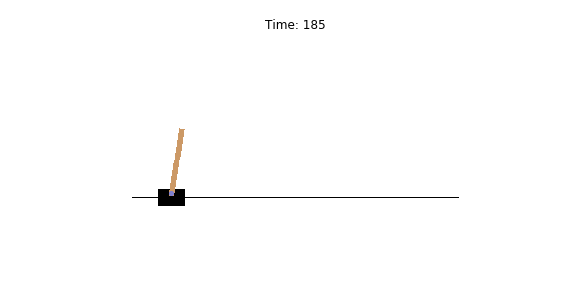
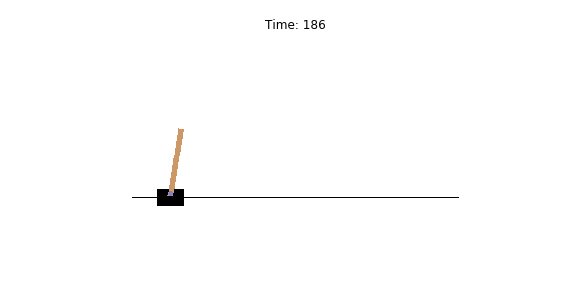
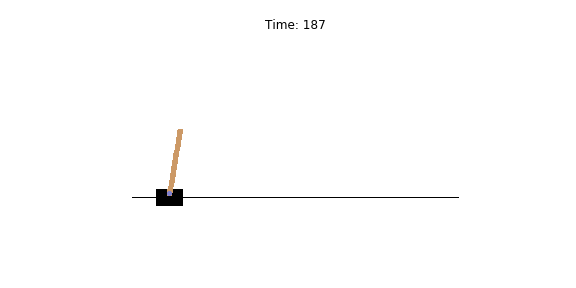
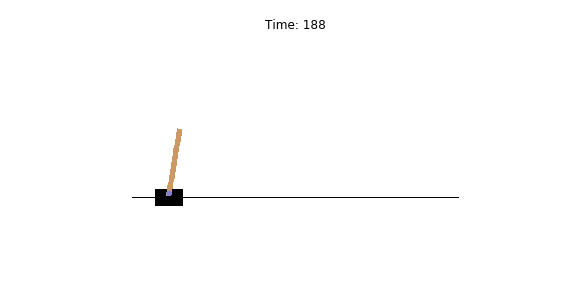
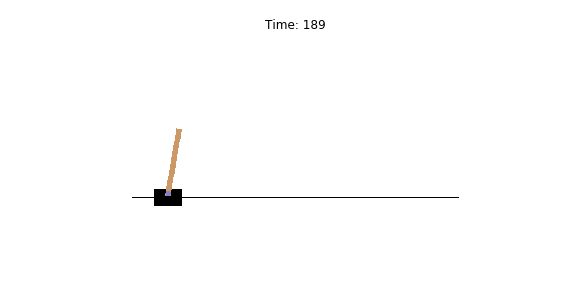
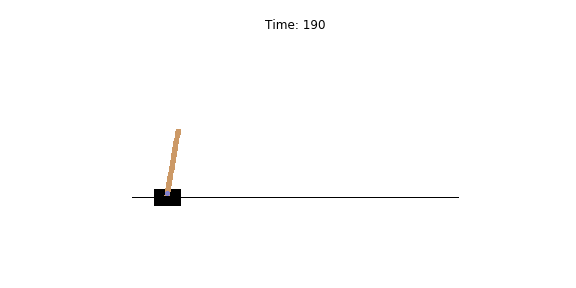
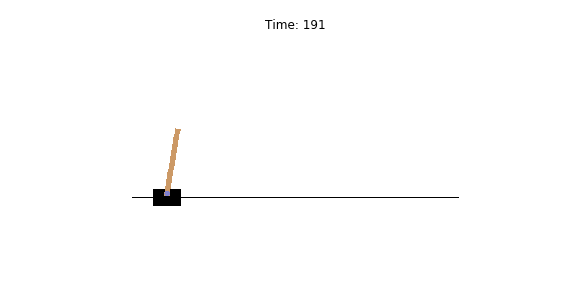
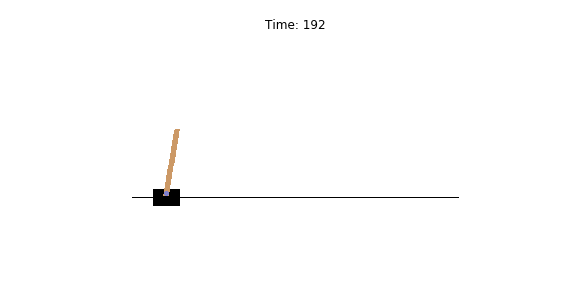
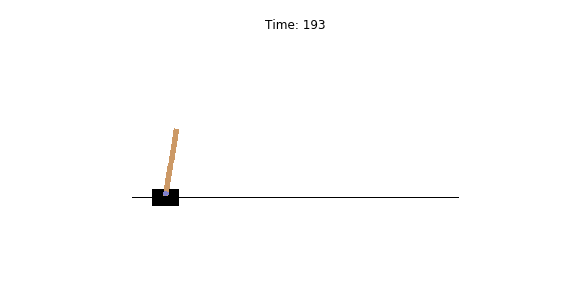
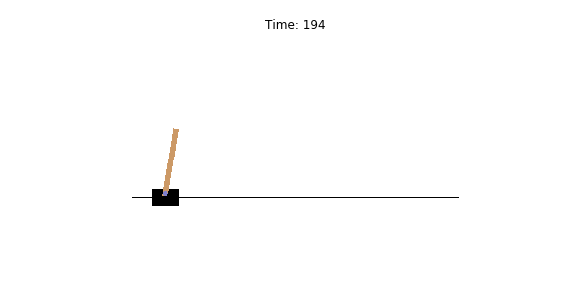
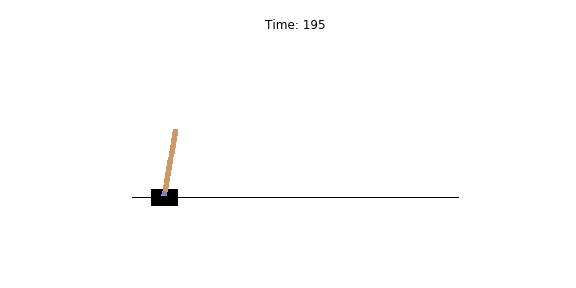
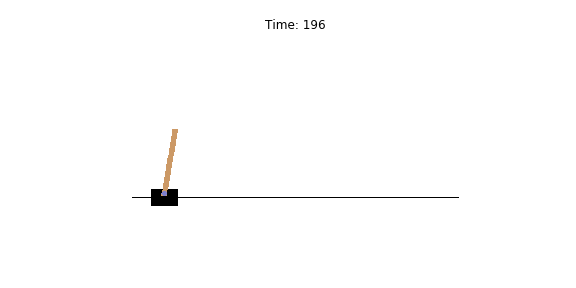
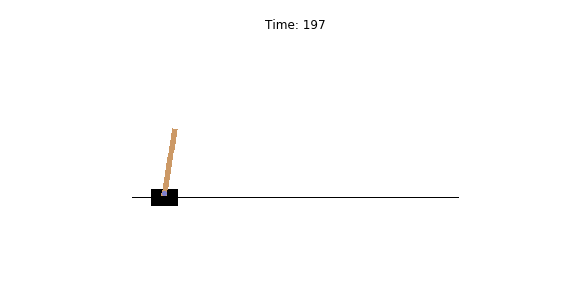
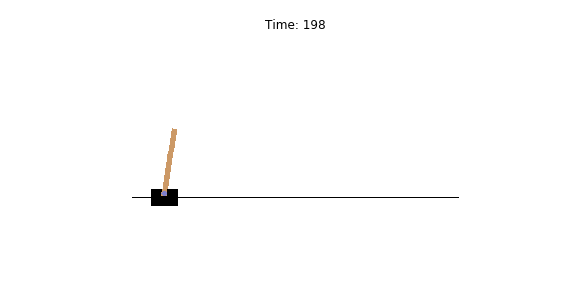
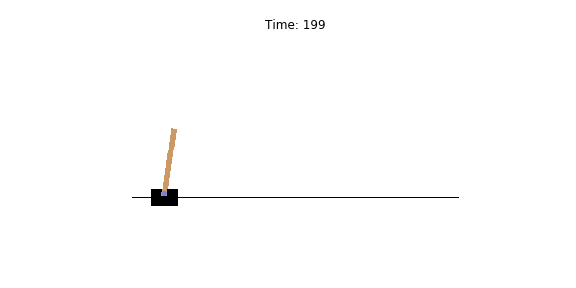

Episode [2500] Finished after: [200] steps, Reward: [200.00], Average Reward: [192.04]
Episode [2600] Finished after: [200] steps, Reward: [200.00], Average Reward: [190.33]
Episode [2700] Finished after: [200] steps, Reward: [200.00], Average Reward: [189.70]
Episode [2800] Finished after: [150] steps, Reward: [150.00], Average Reward: [192.50]
Episode [2900] Finished after: [200] steps, Reward: [200.00], Average Reward: [189.04]



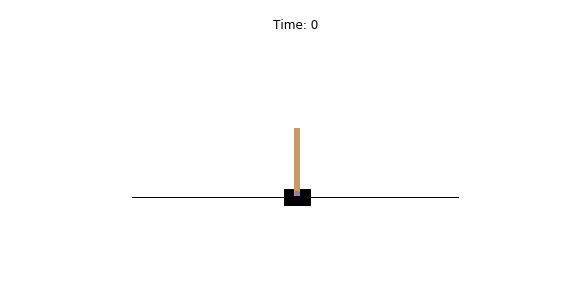
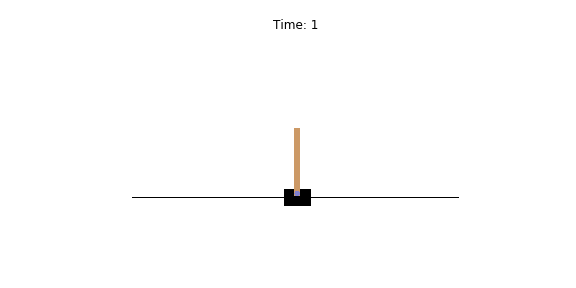
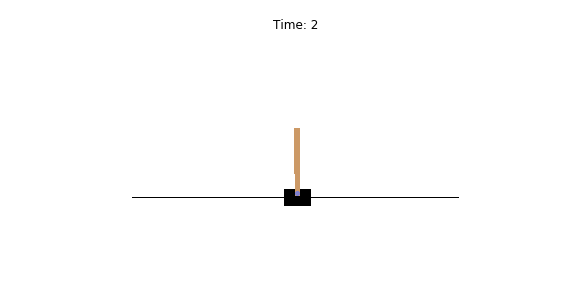
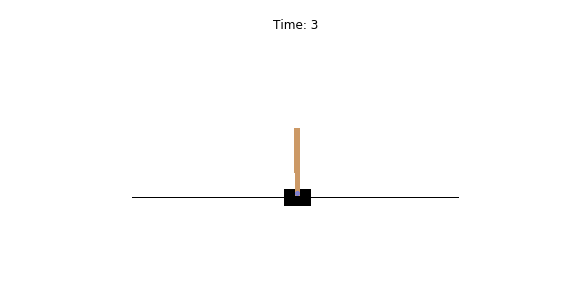
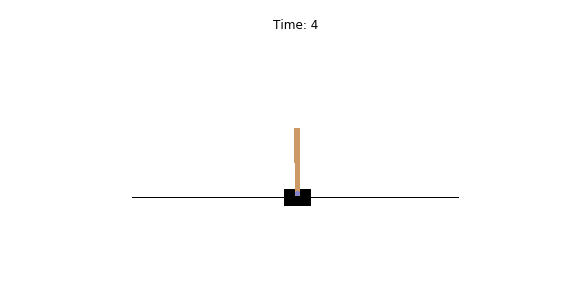
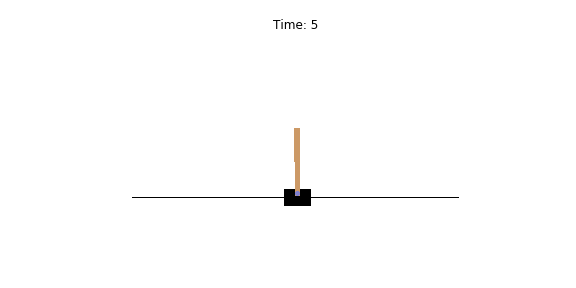
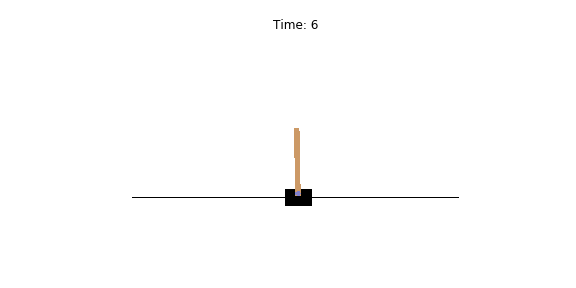
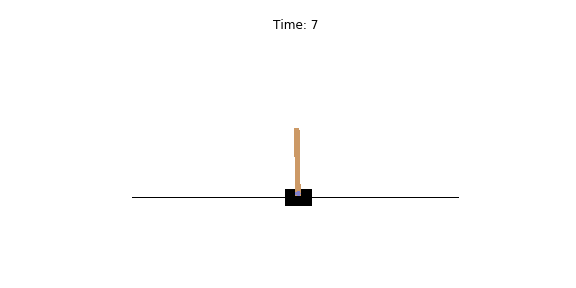
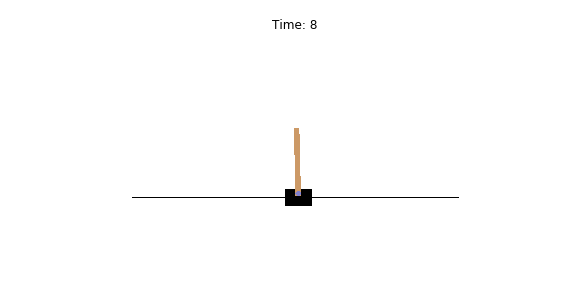
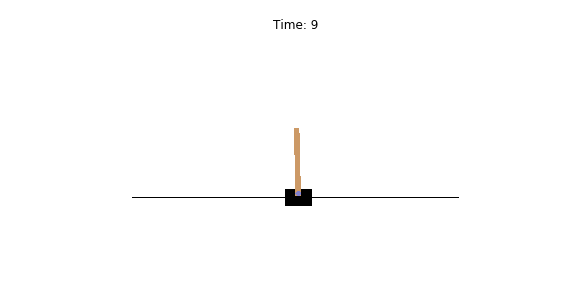
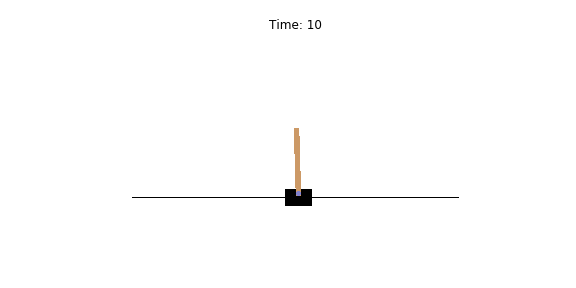
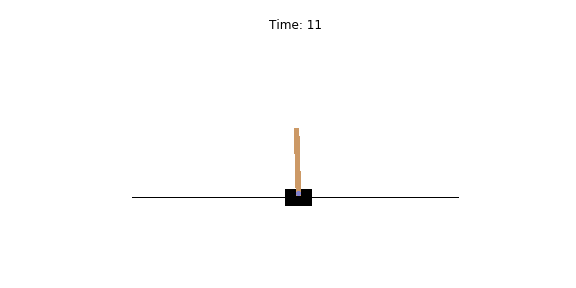
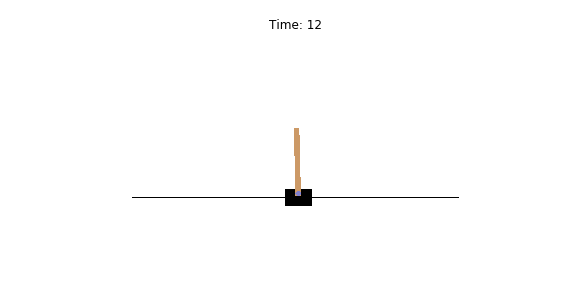
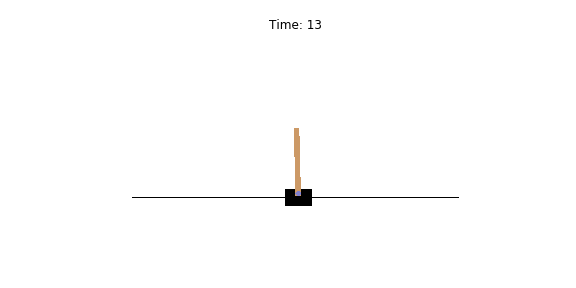
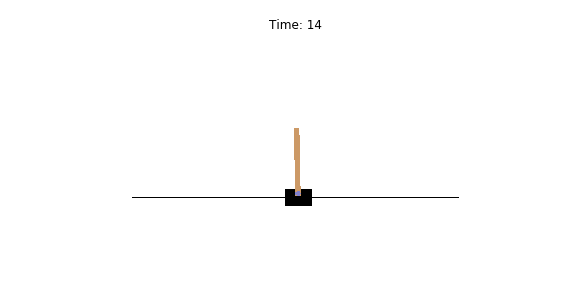
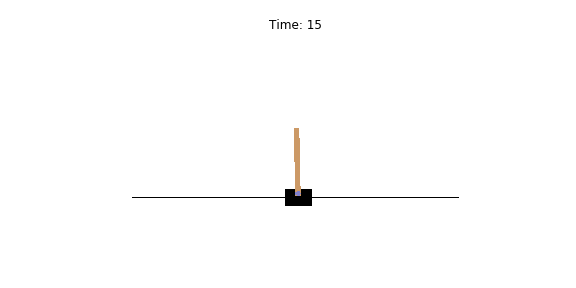
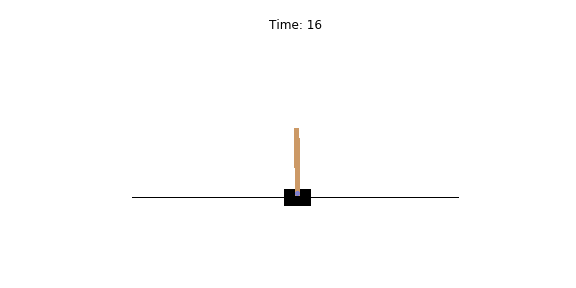
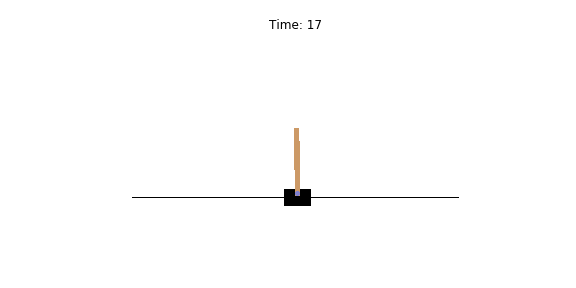
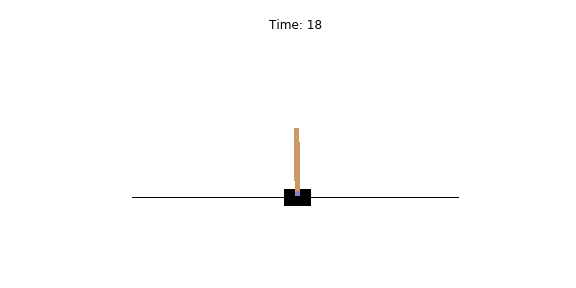
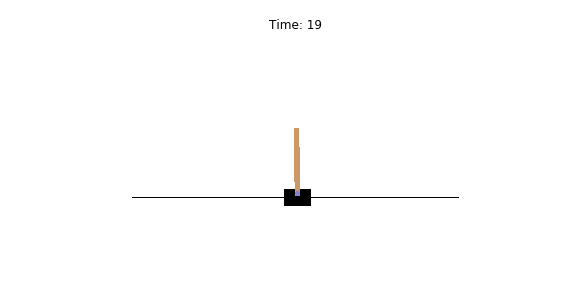
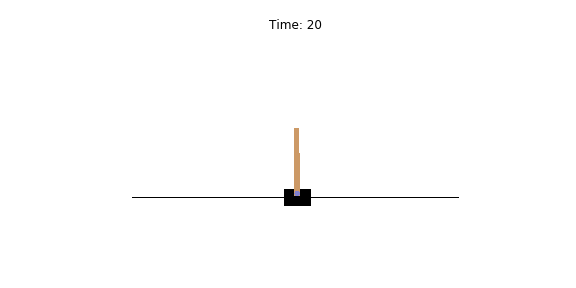
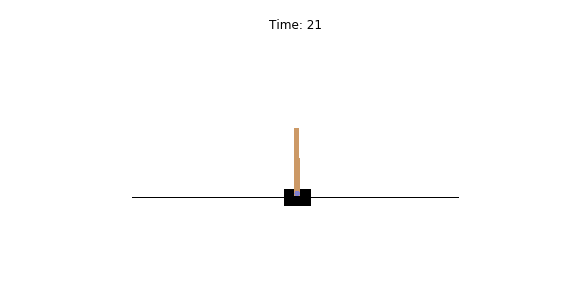
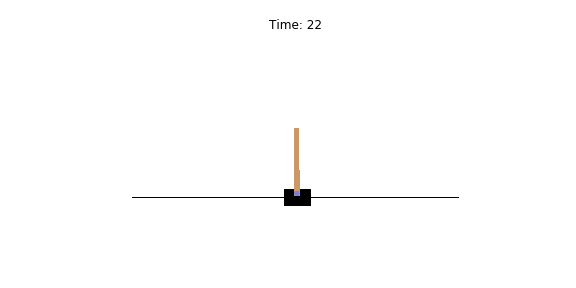
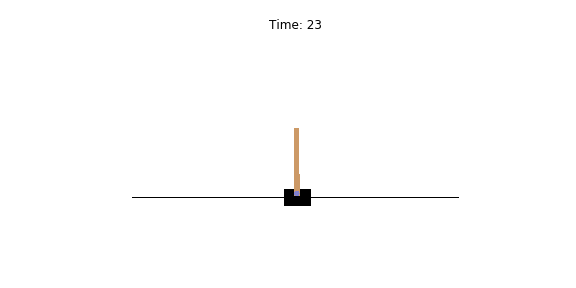
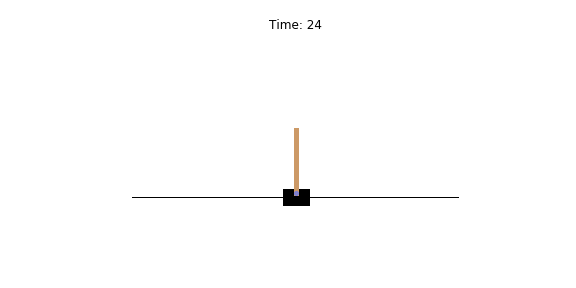
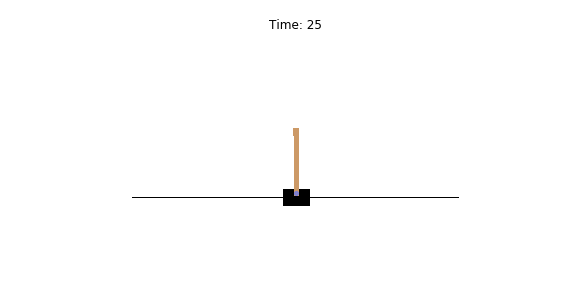
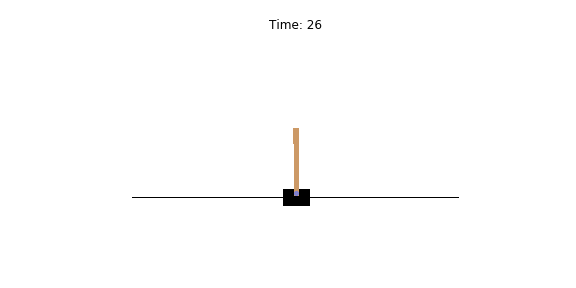
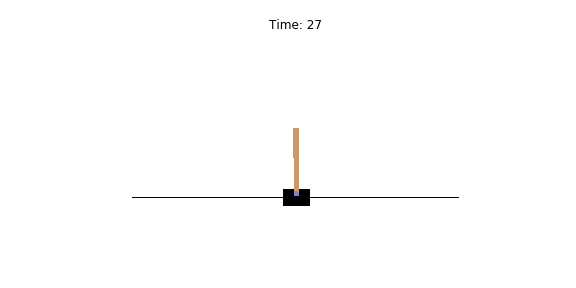
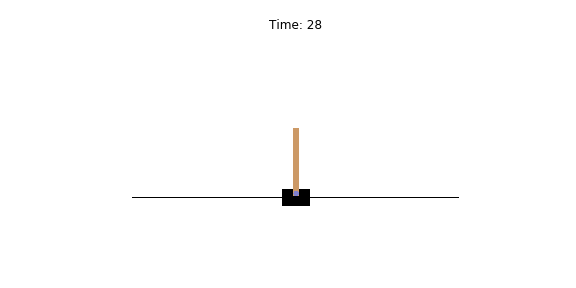
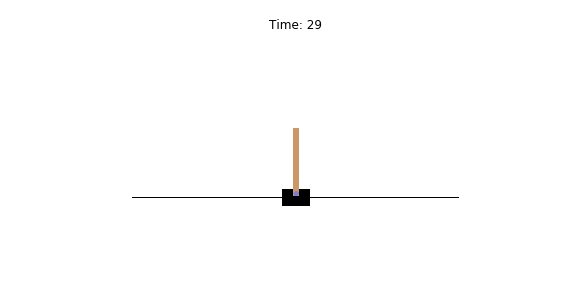
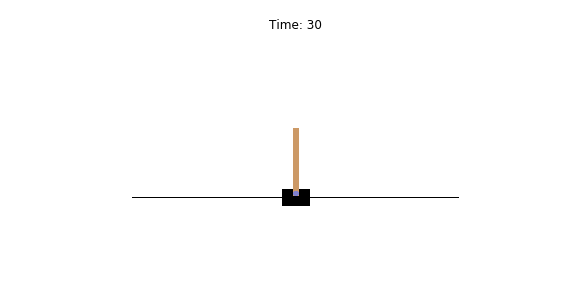
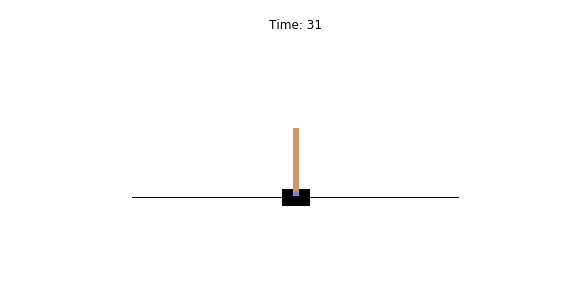
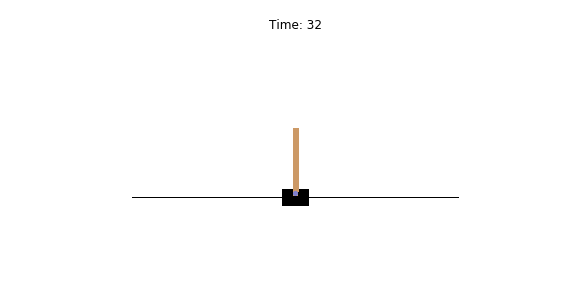
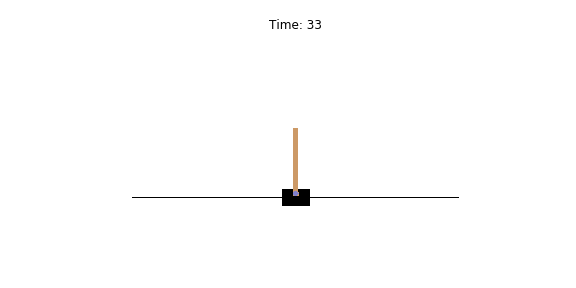
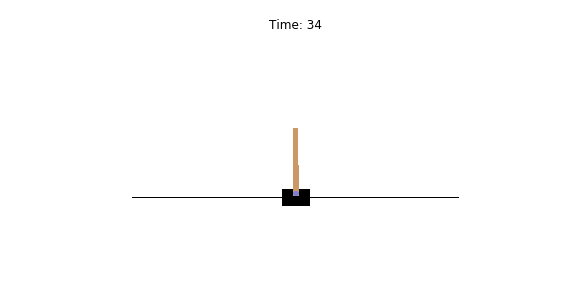
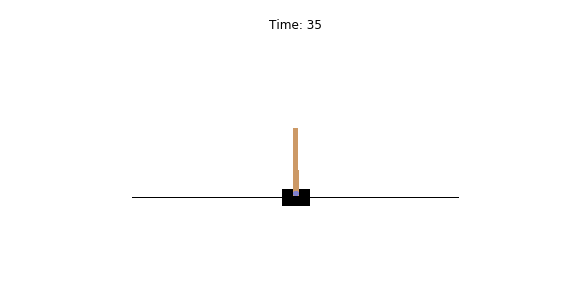
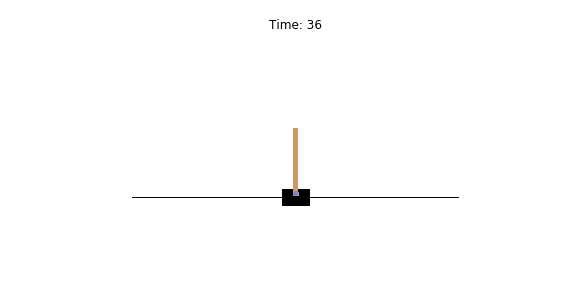
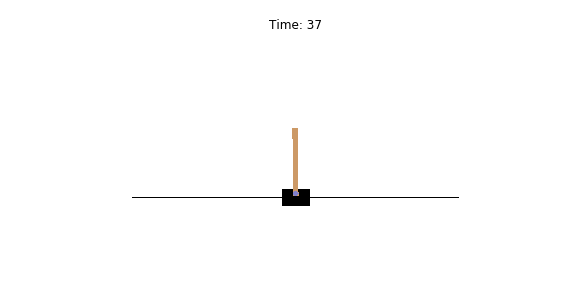
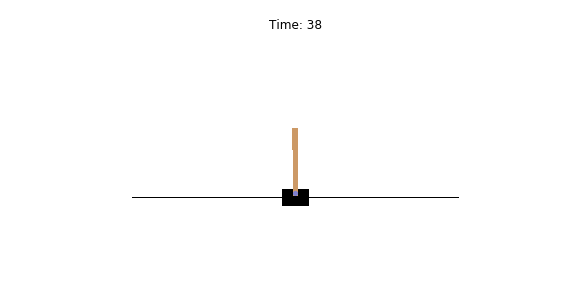
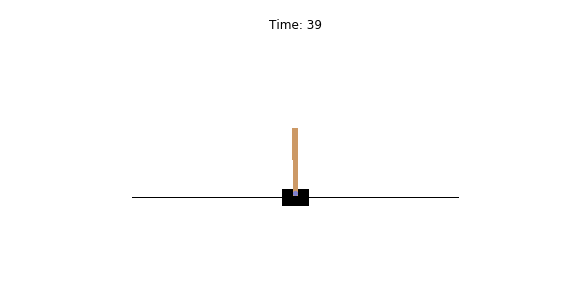
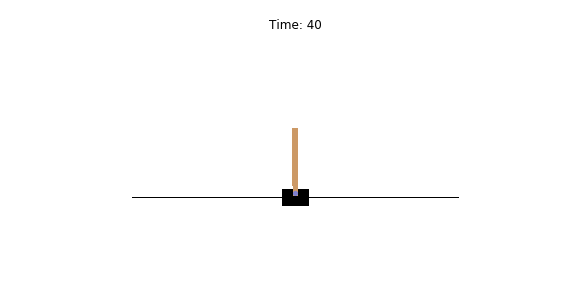
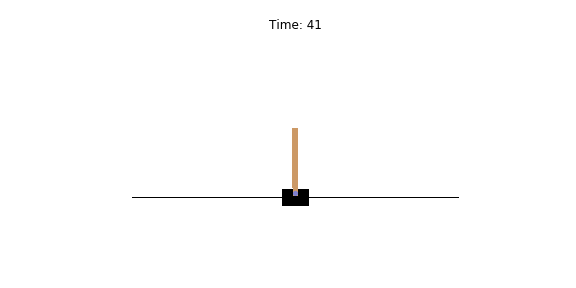
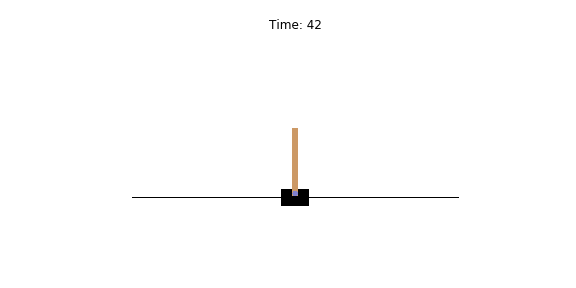
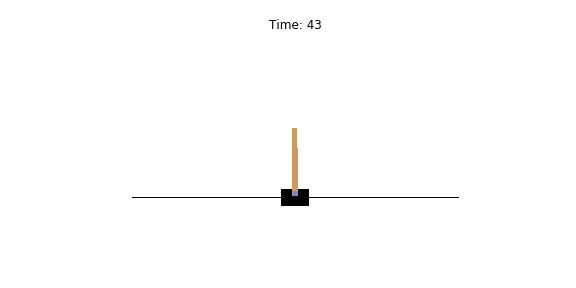
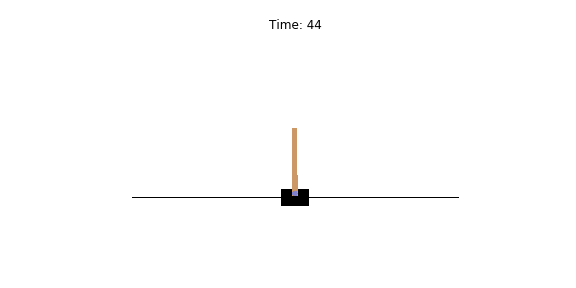
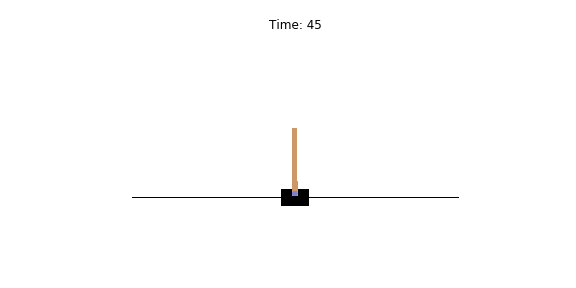
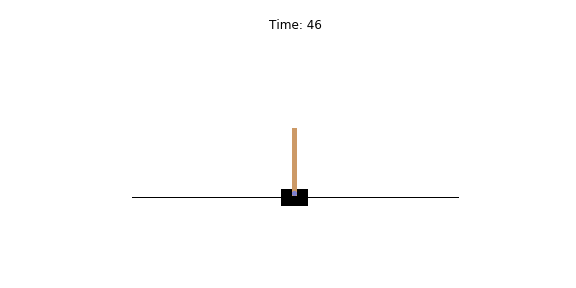
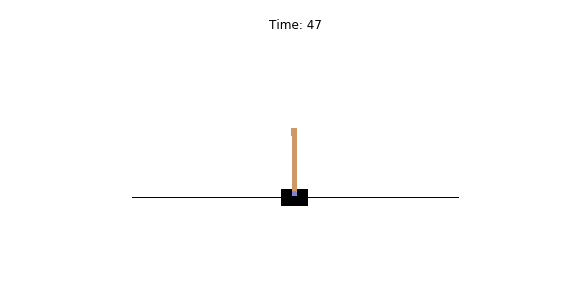
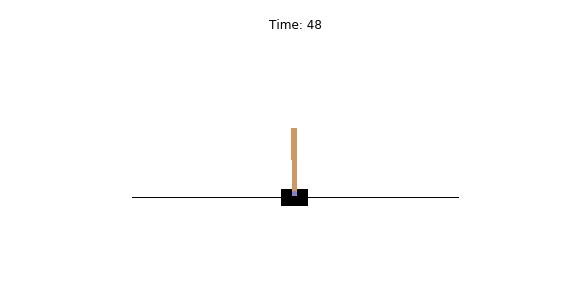
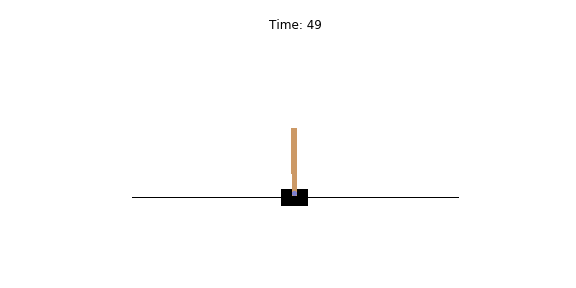
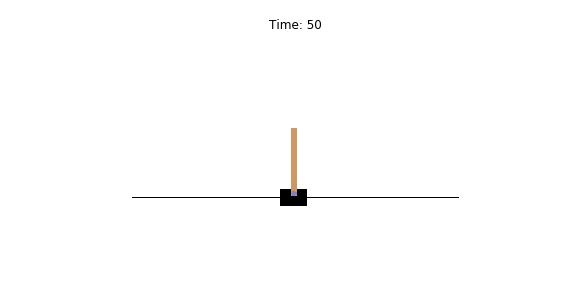
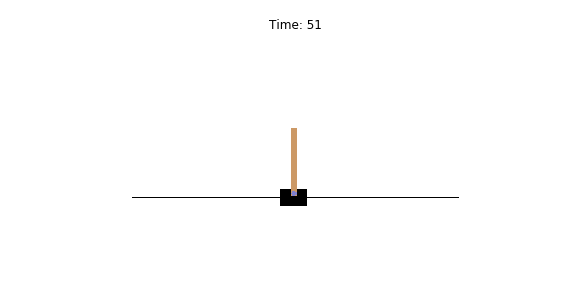
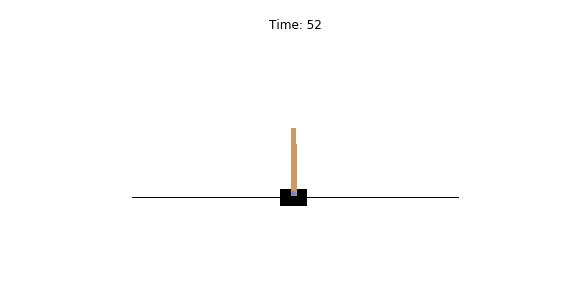
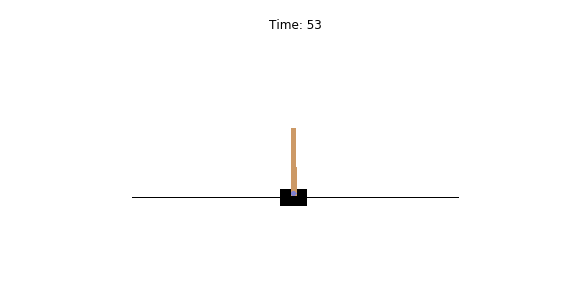
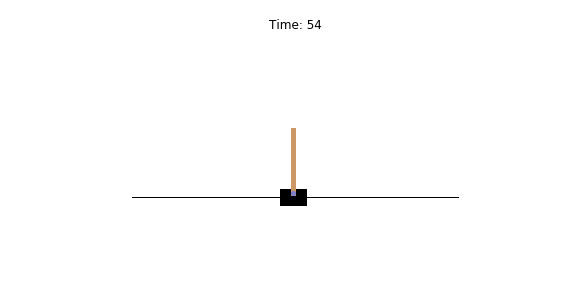
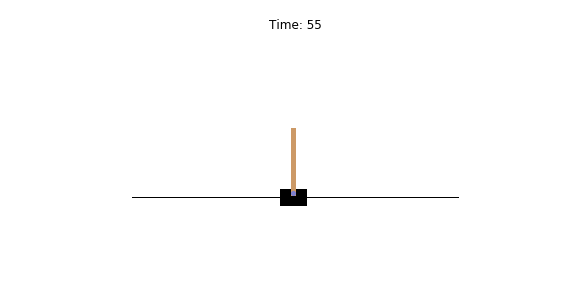
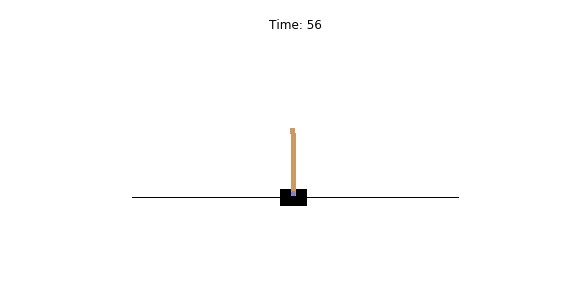
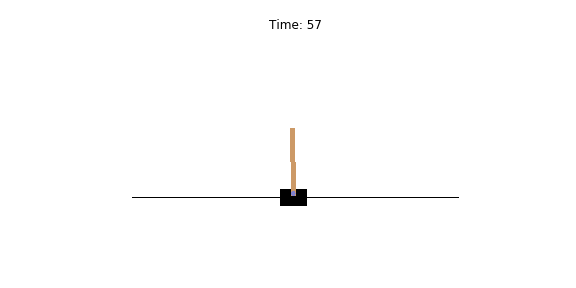
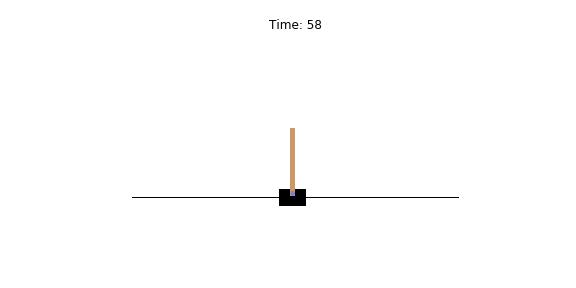
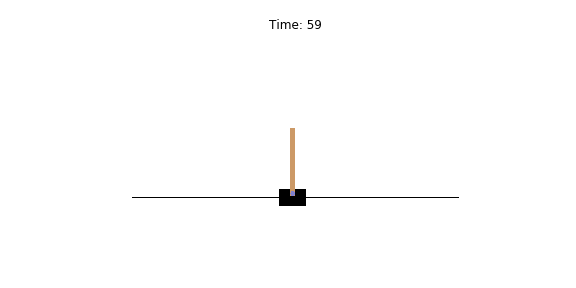
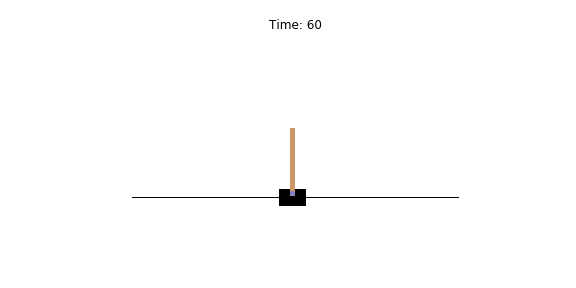
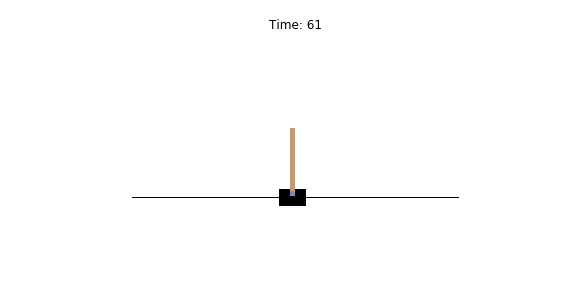
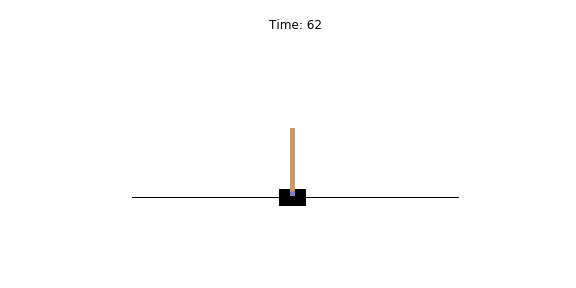
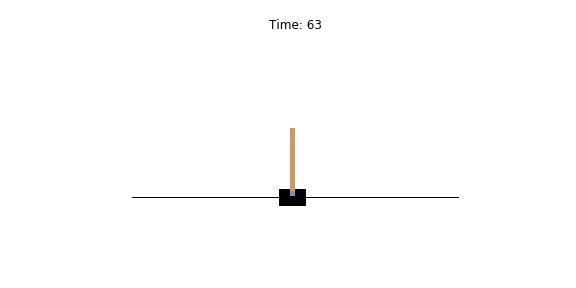
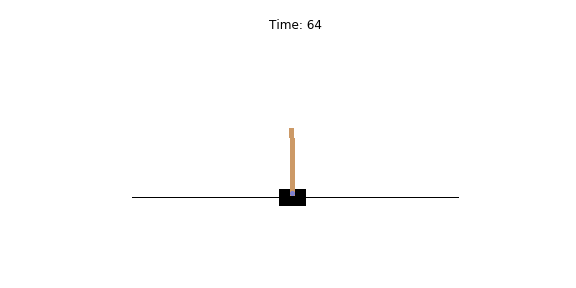
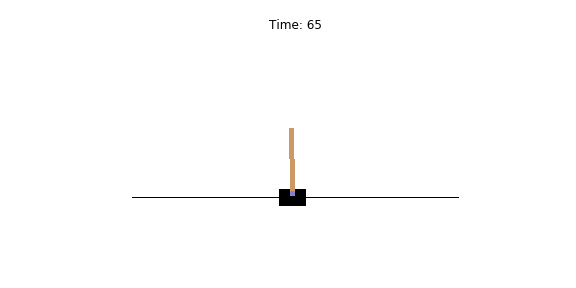
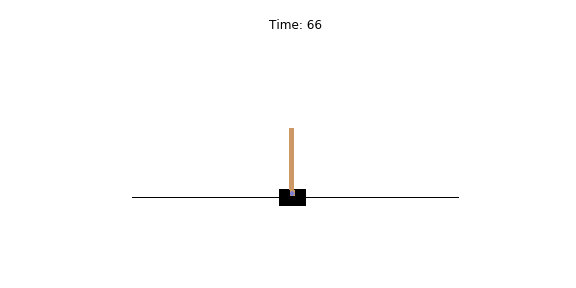
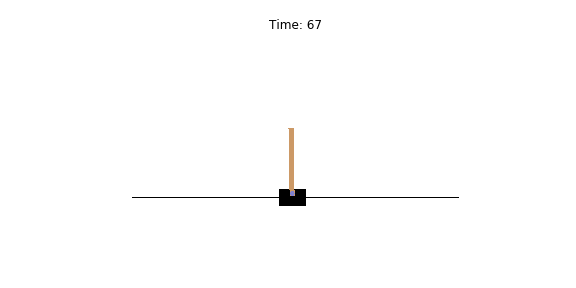
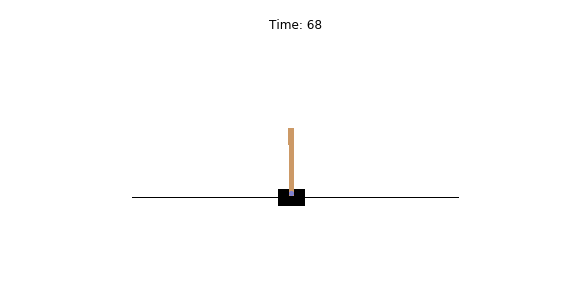
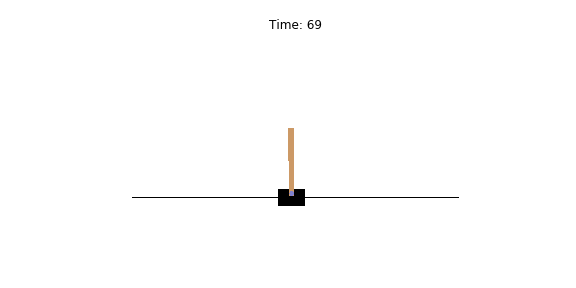
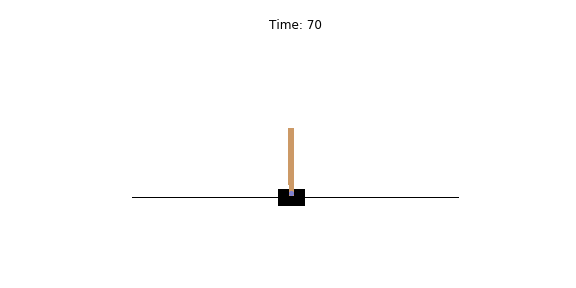
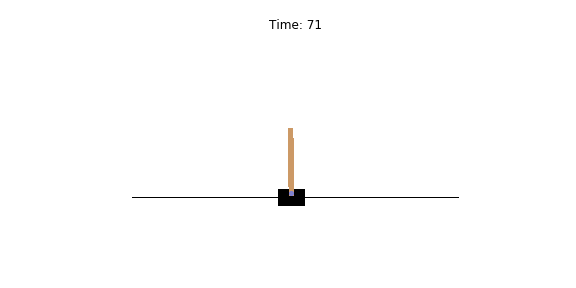
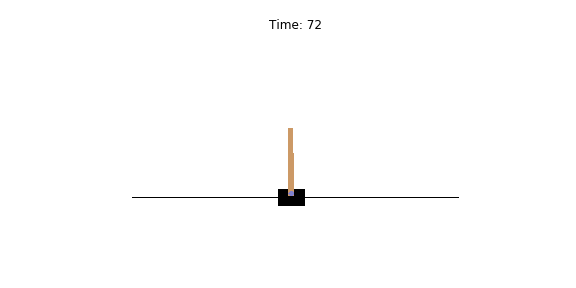
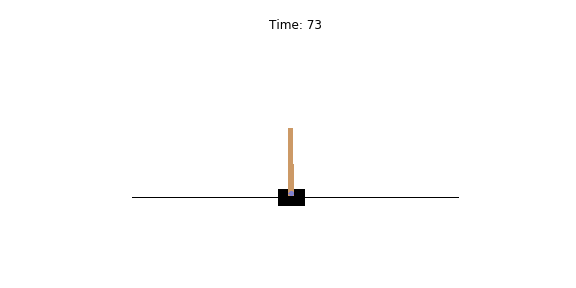
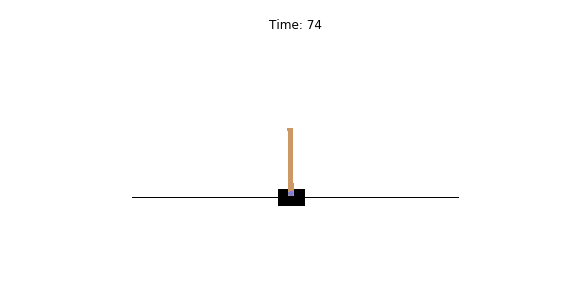
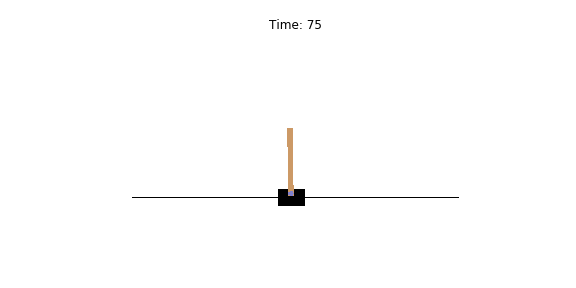
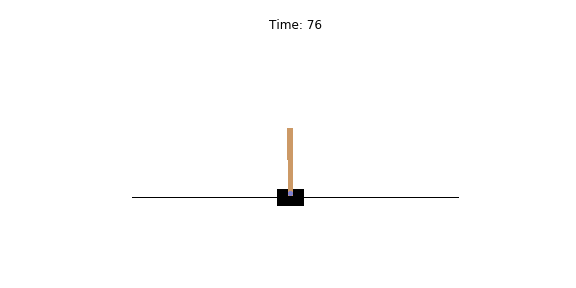
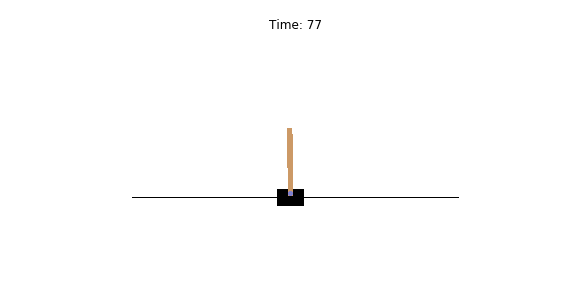
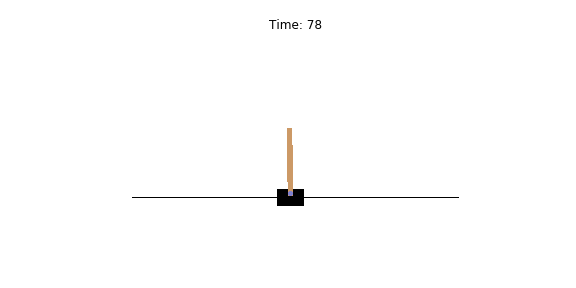
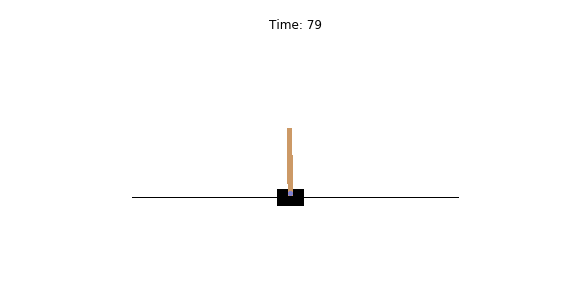
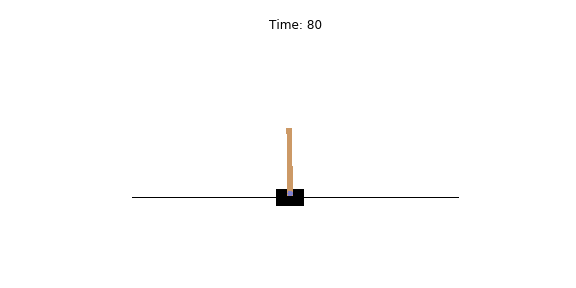
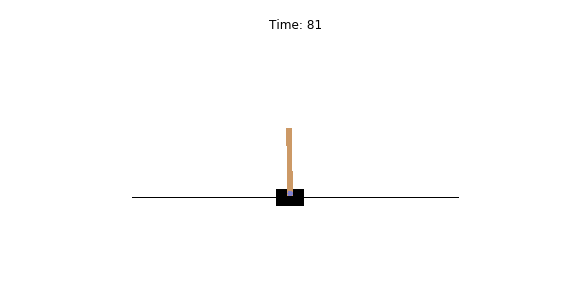
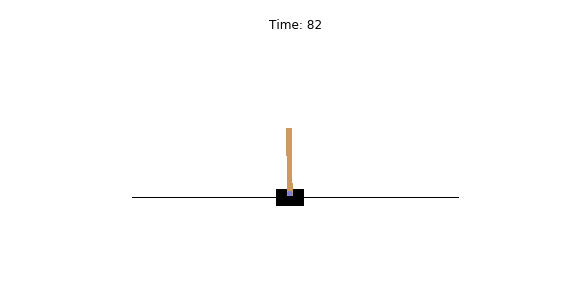
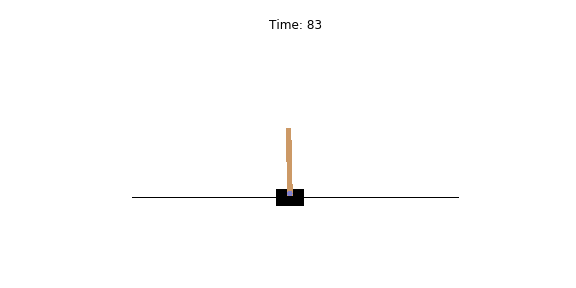
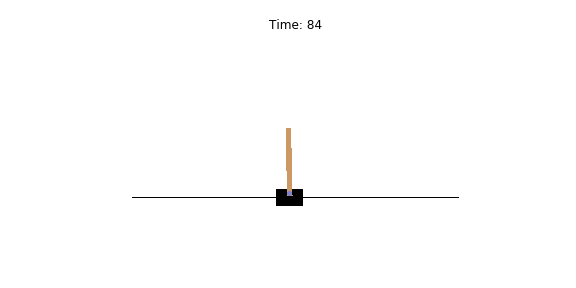
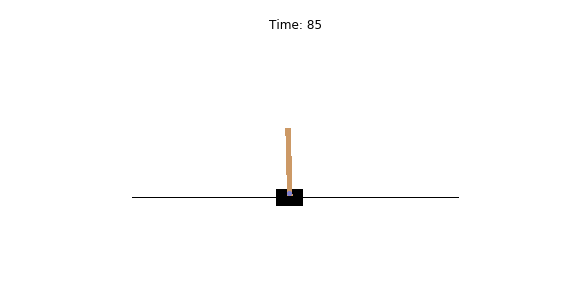
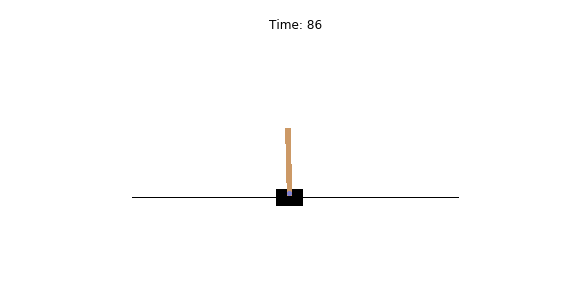
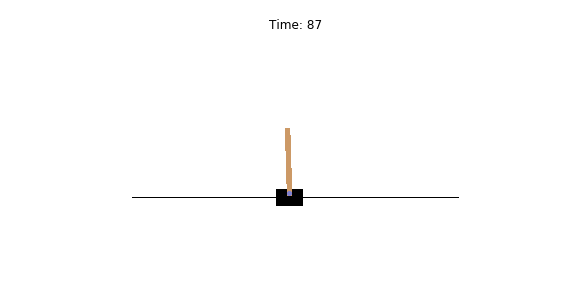
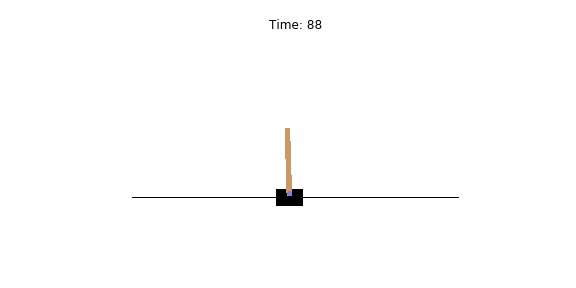
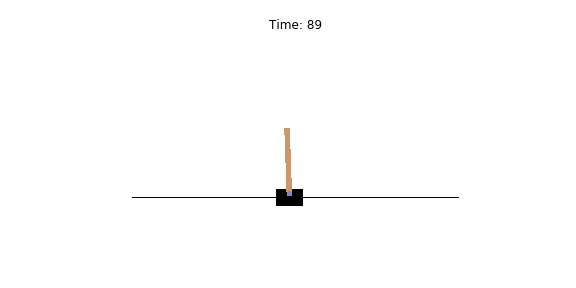
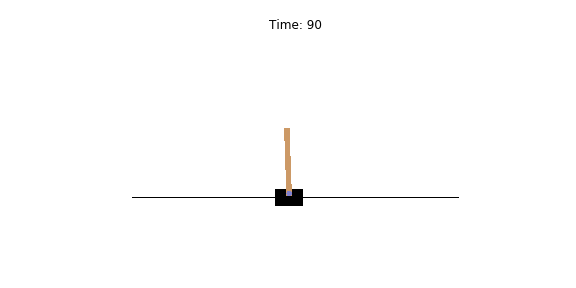
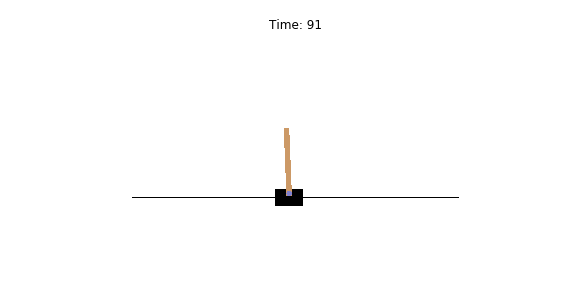
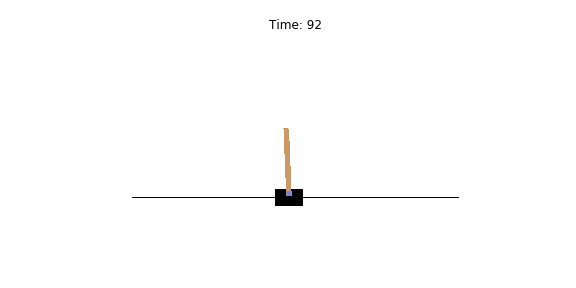
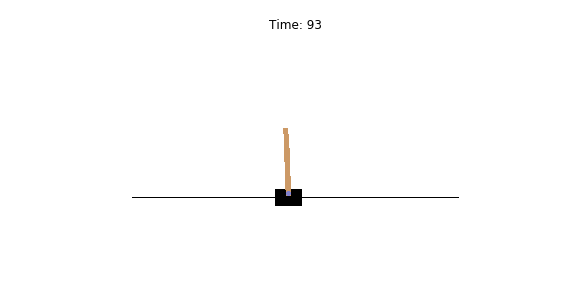
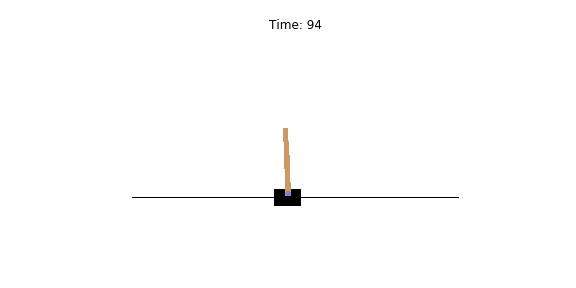
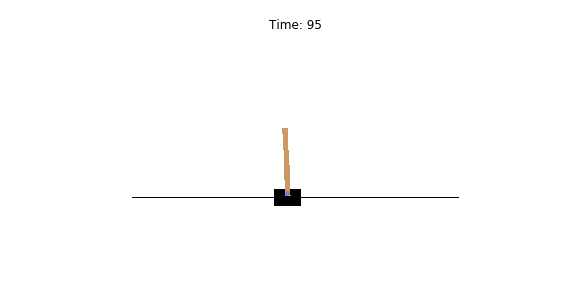
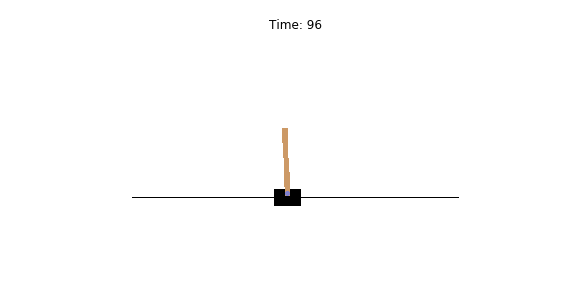
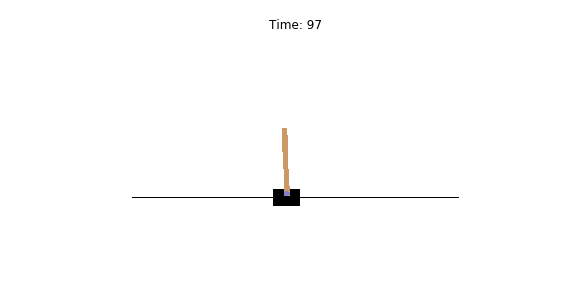
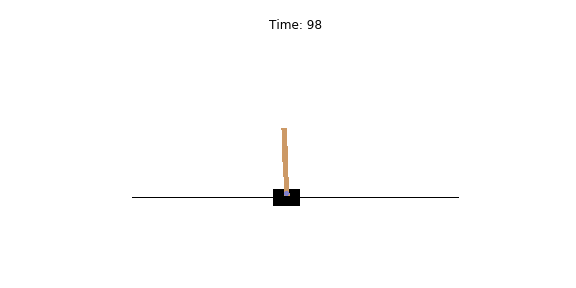
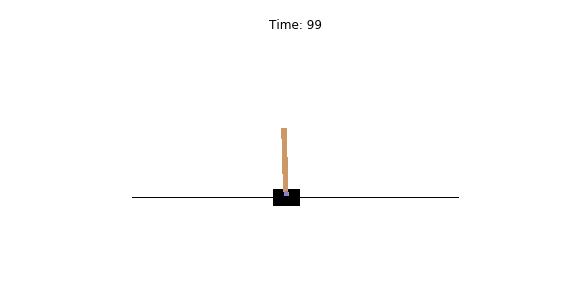
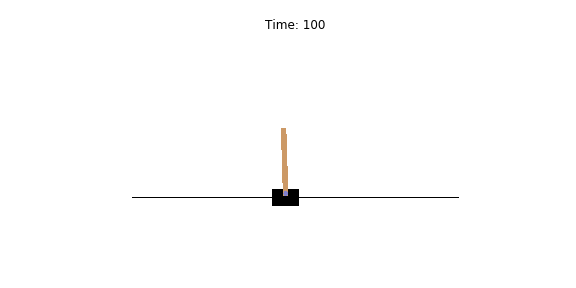
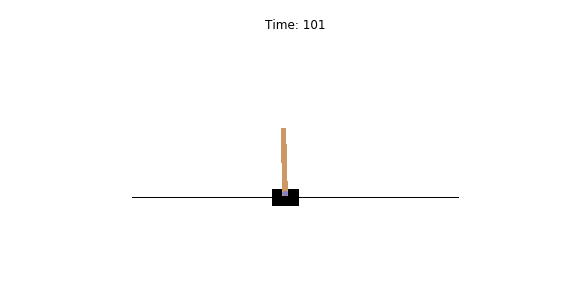
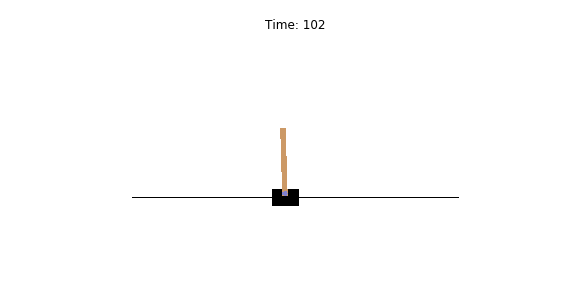
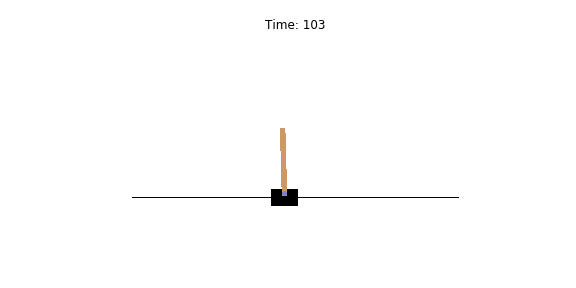
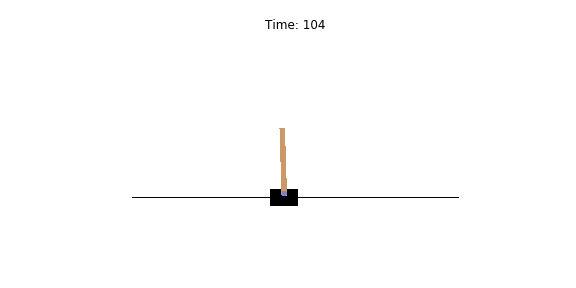
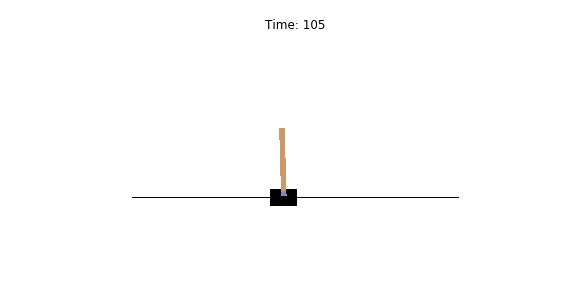
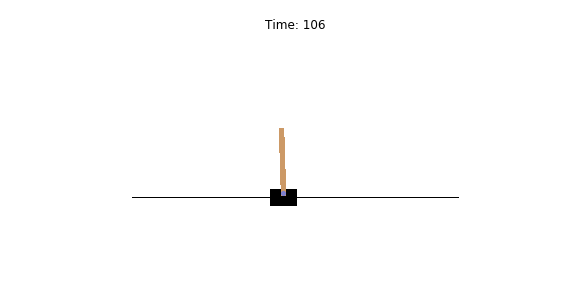
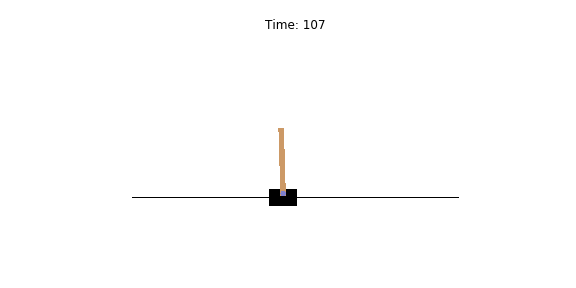
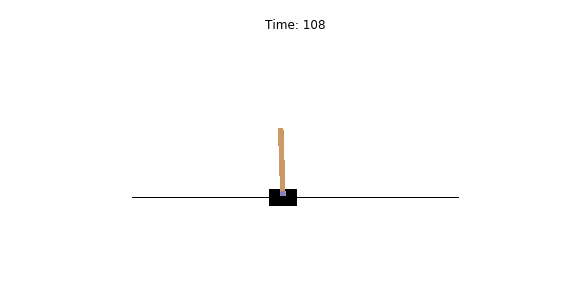
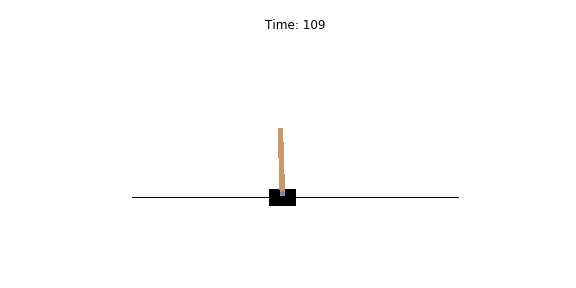
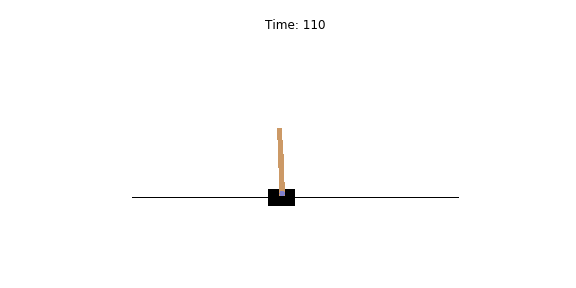
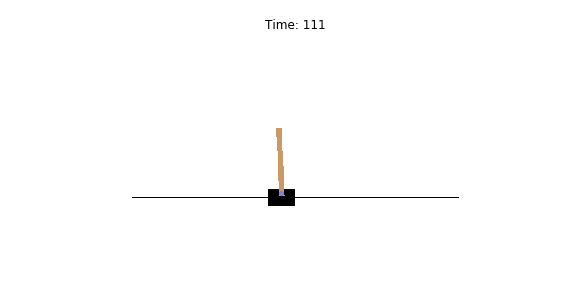
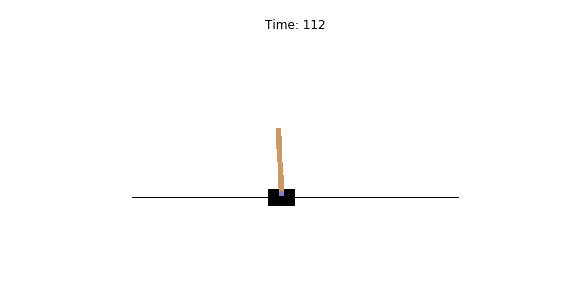
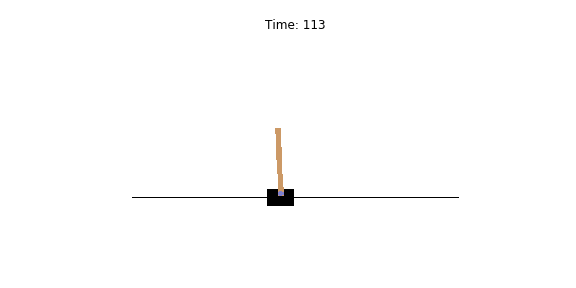
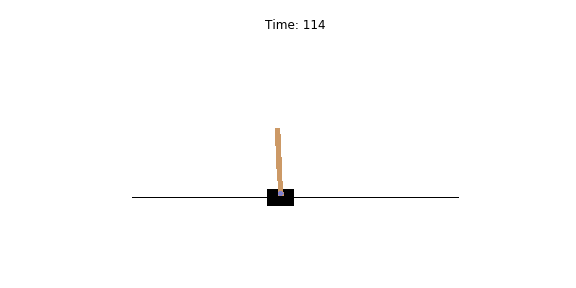
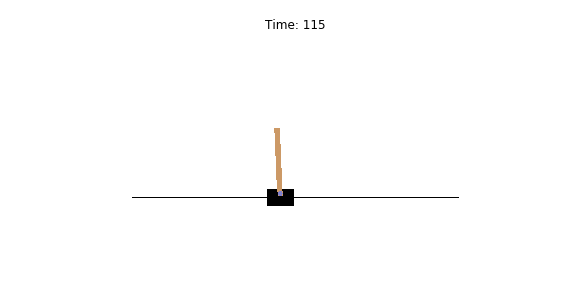
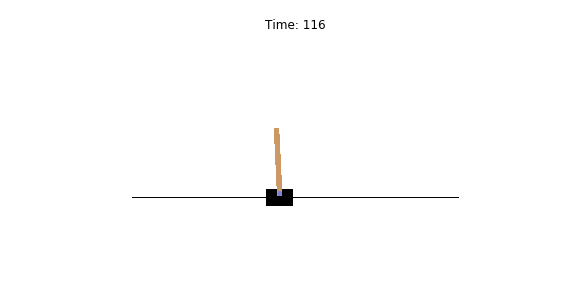
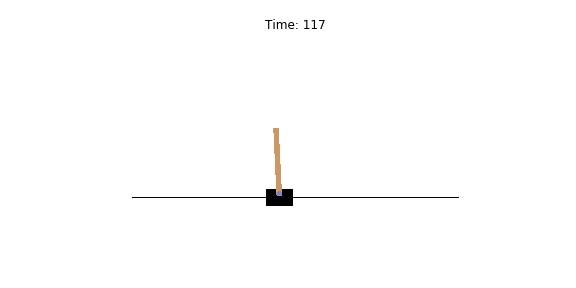
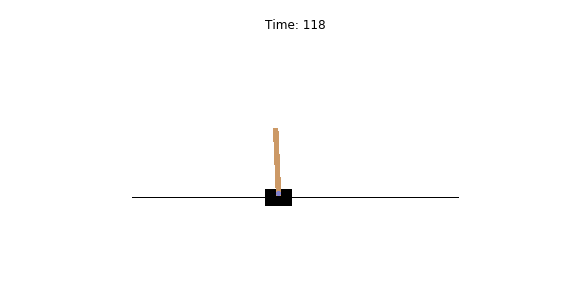
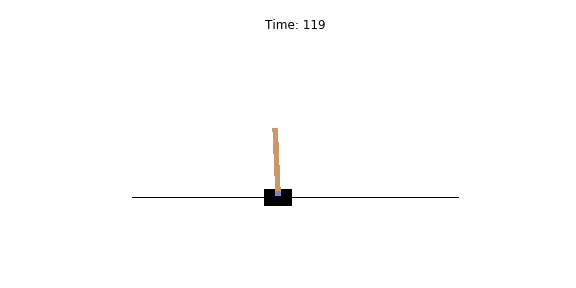
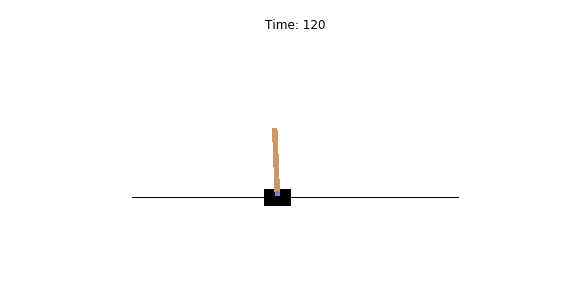
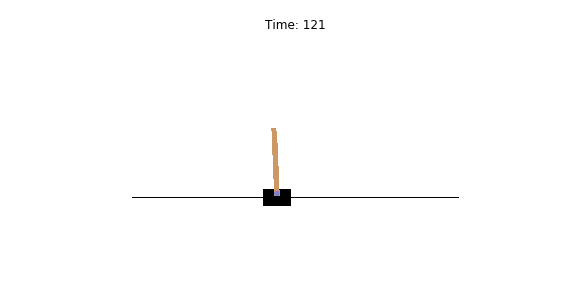
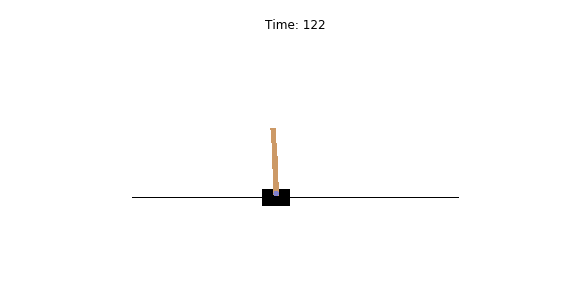
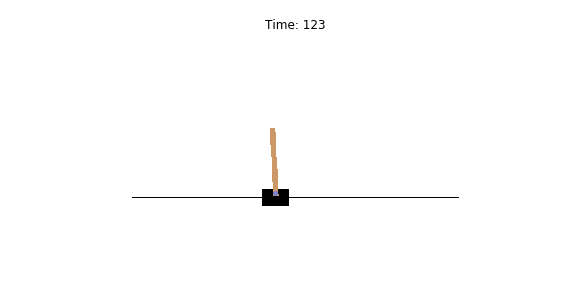
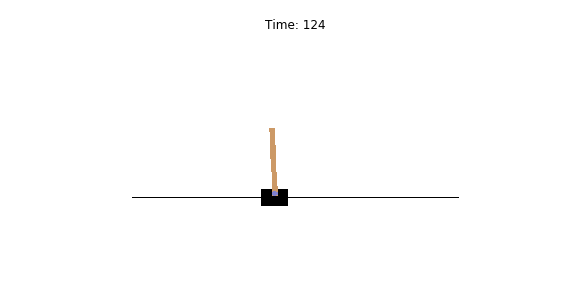
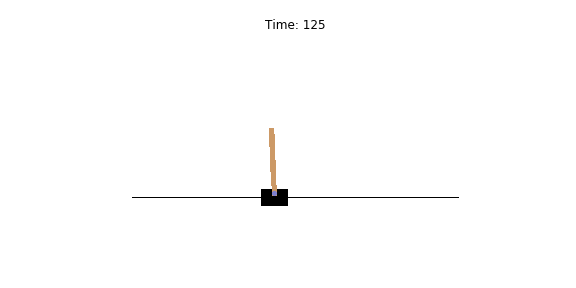
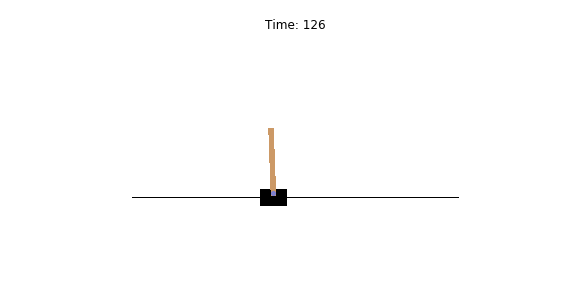
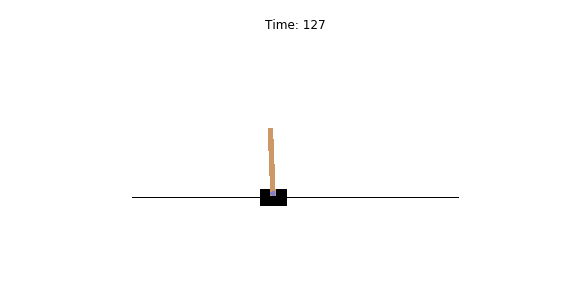
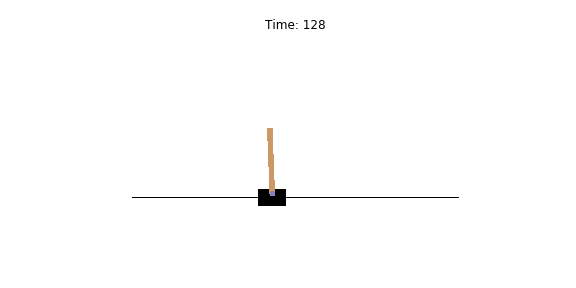
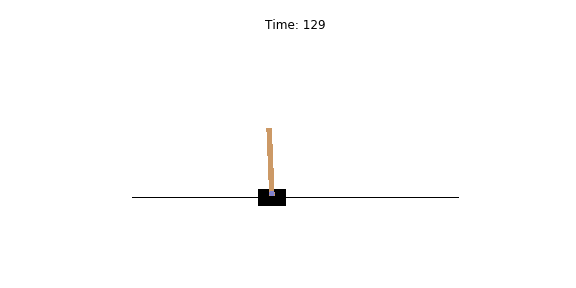
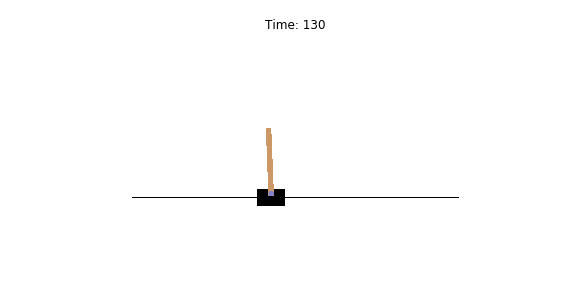
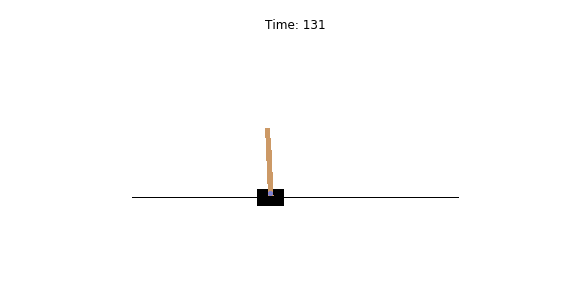
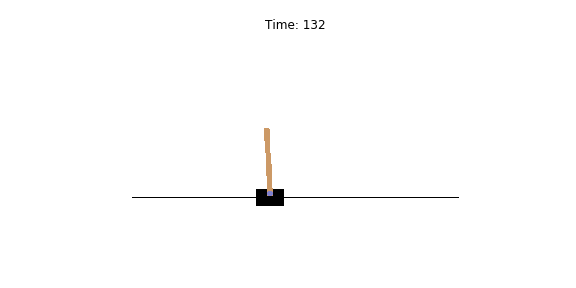
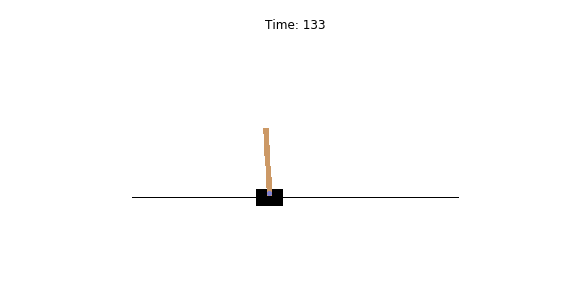
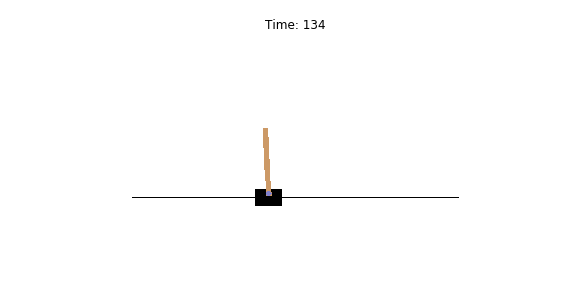
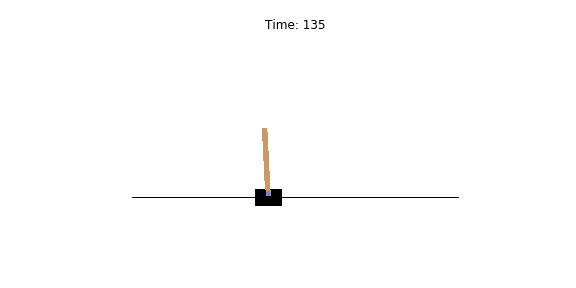
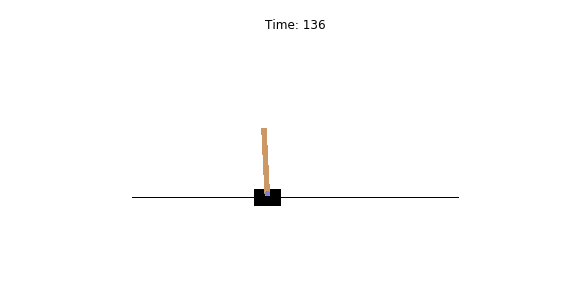
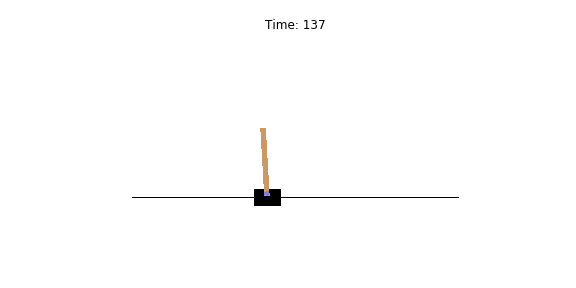
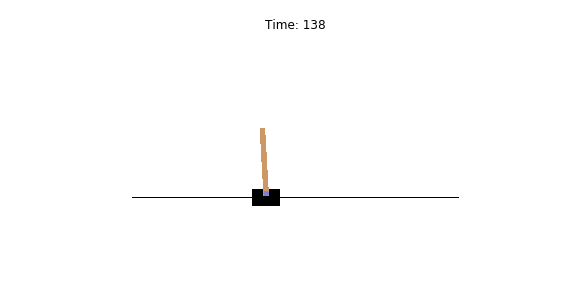
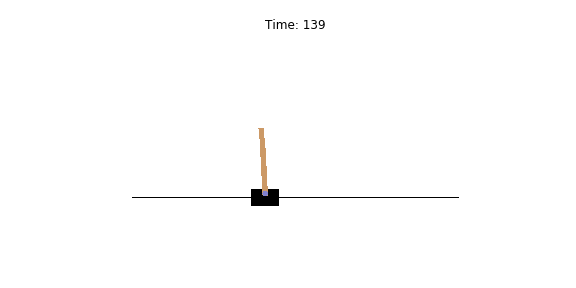
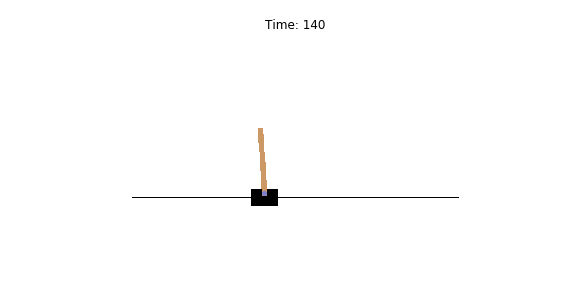
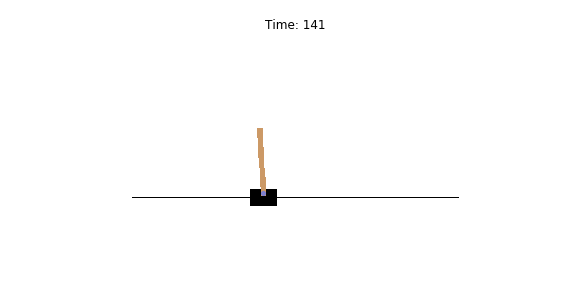
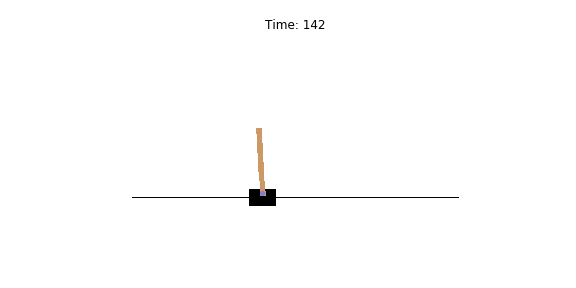
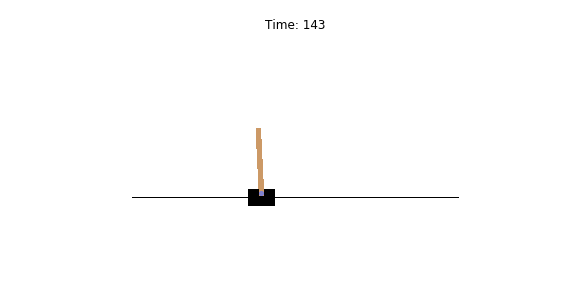
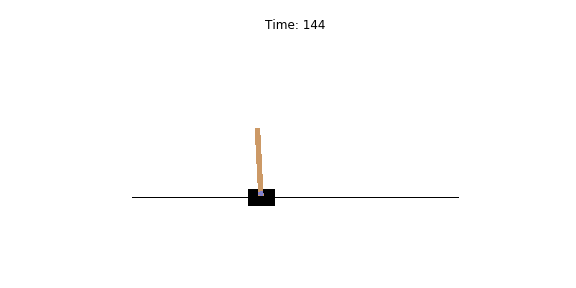
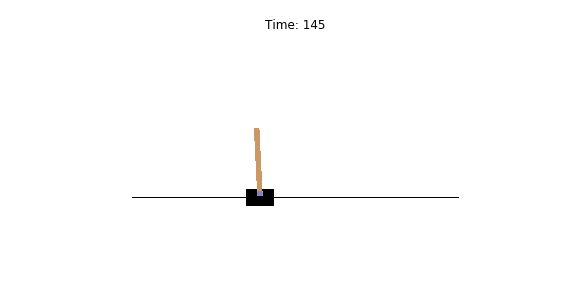
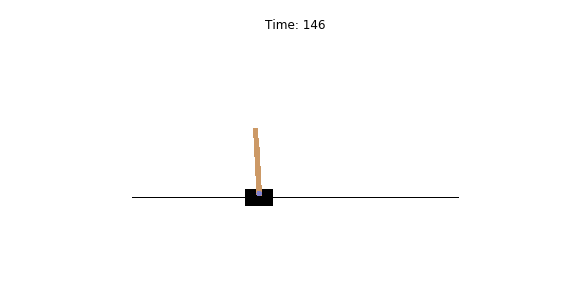
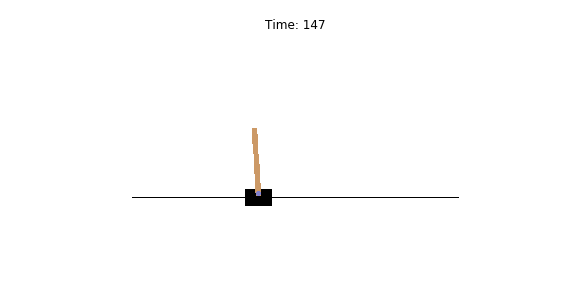
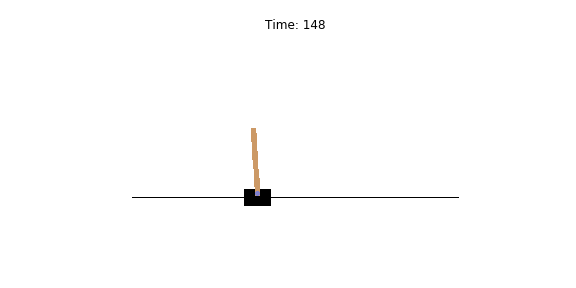
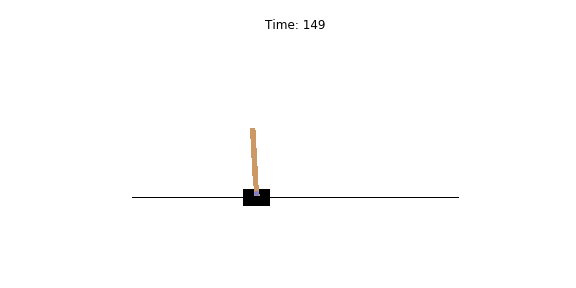
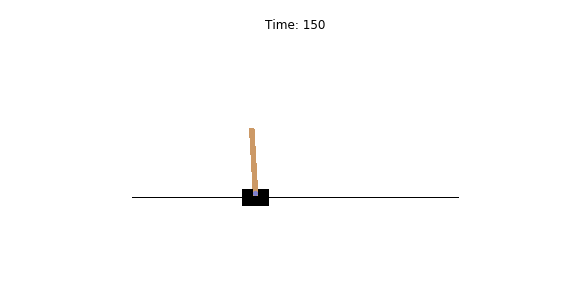
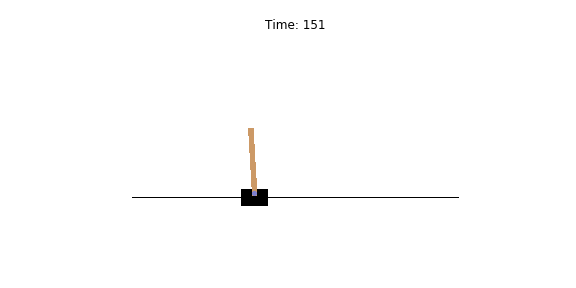
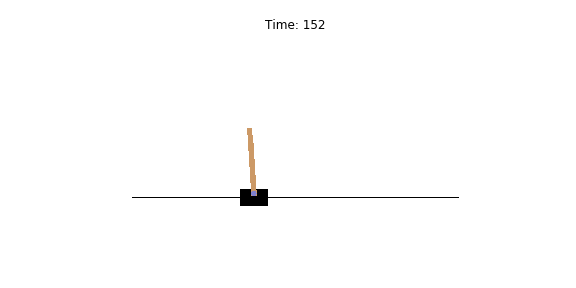
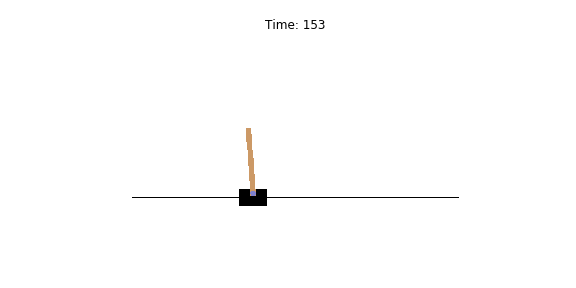
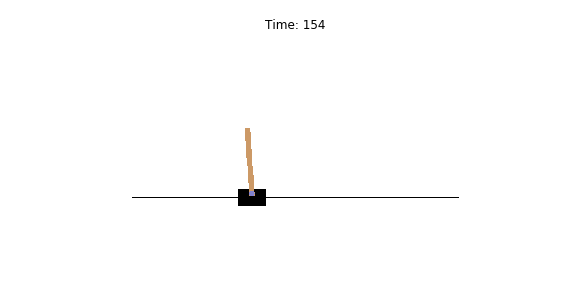
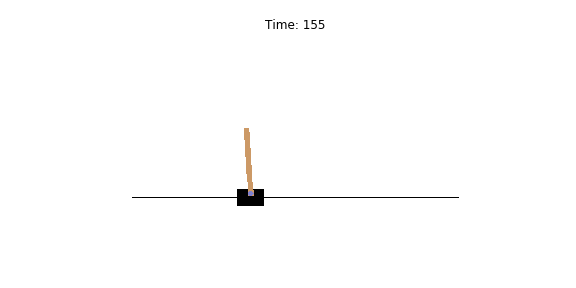
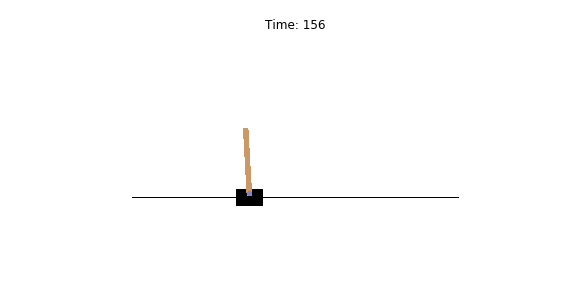
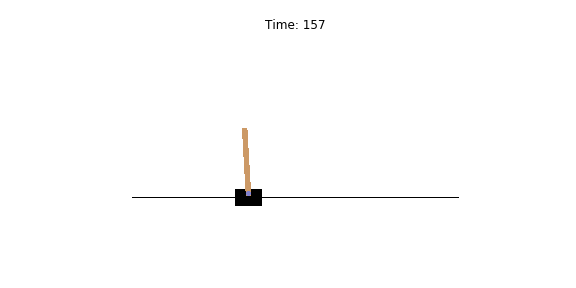
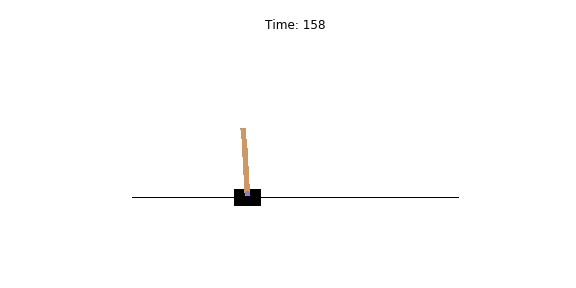
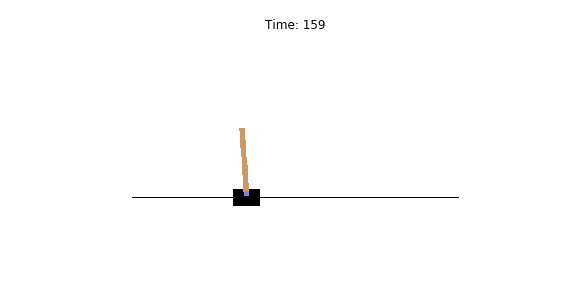
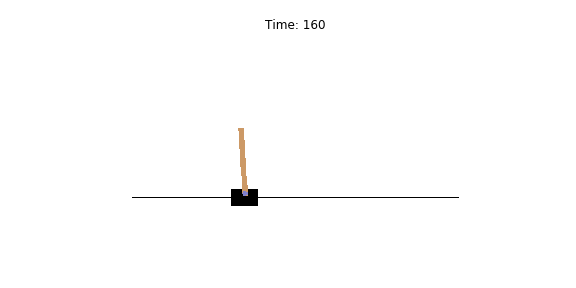
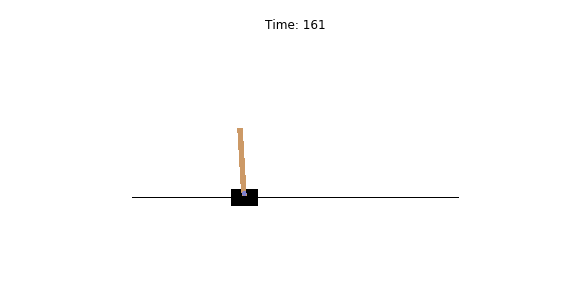
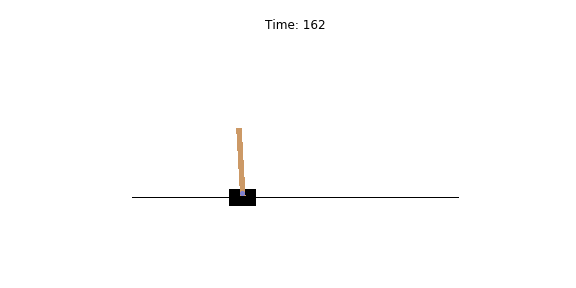
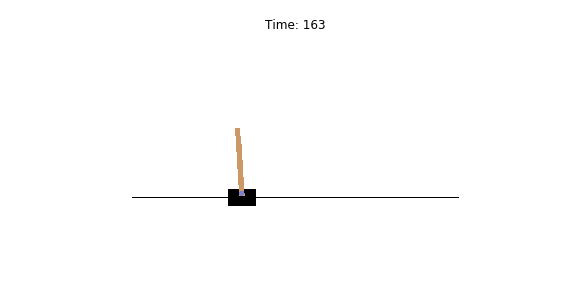
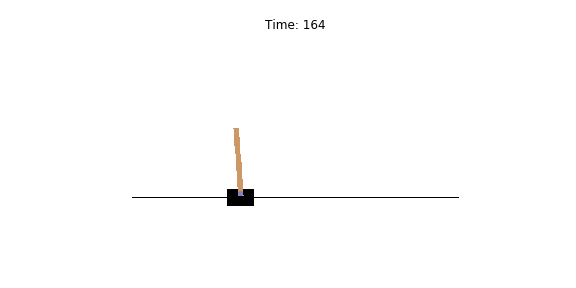
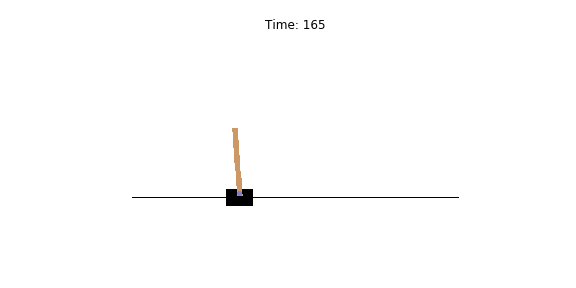
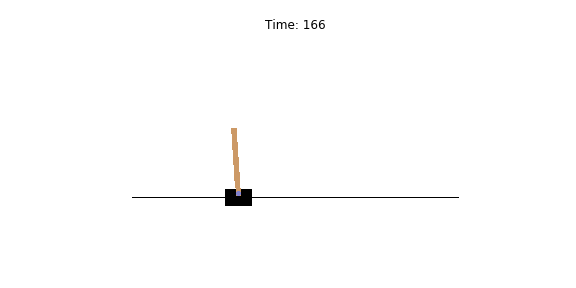
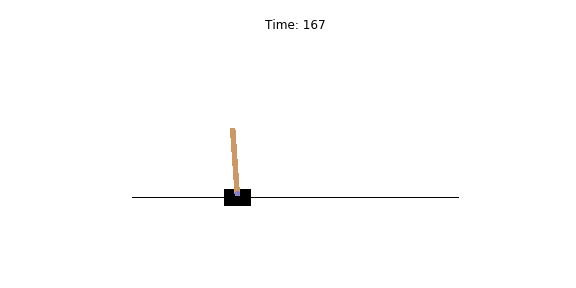
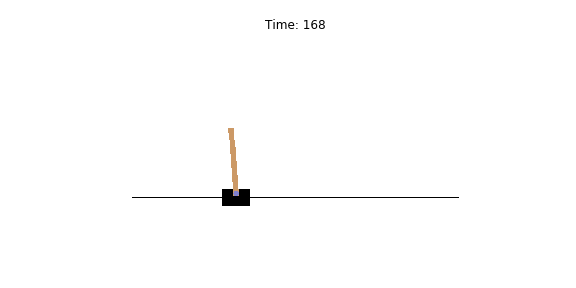
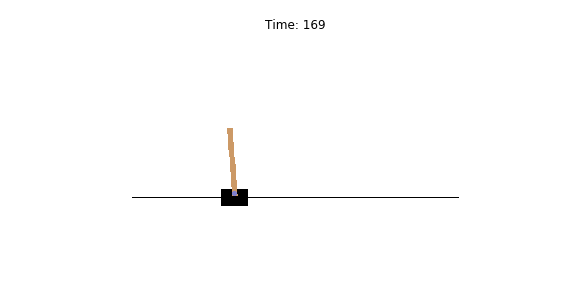
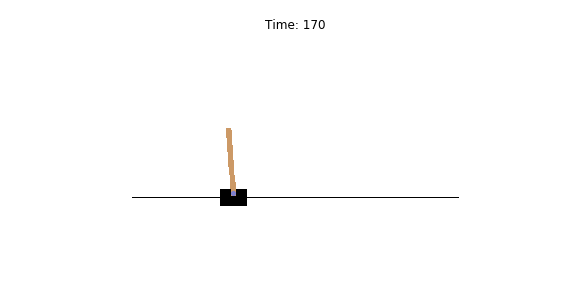
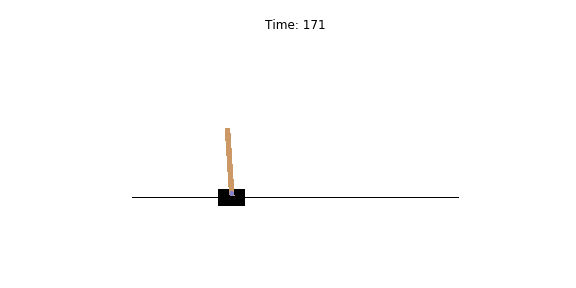
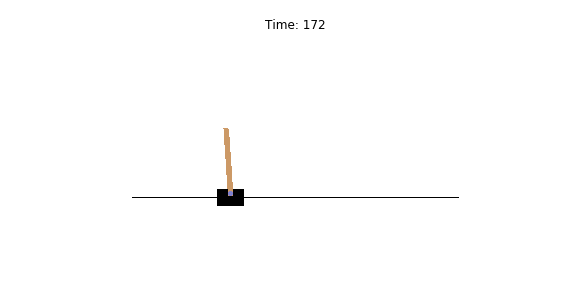
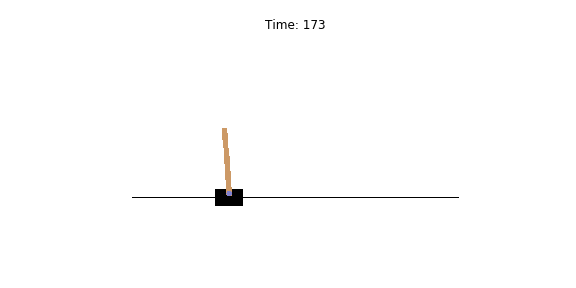
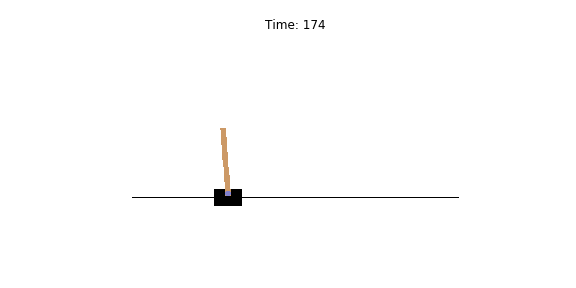
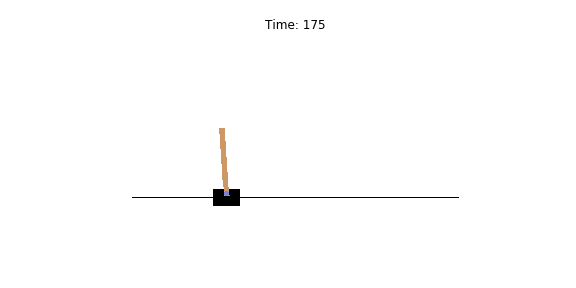
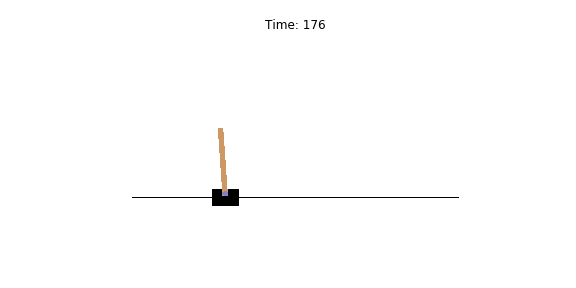
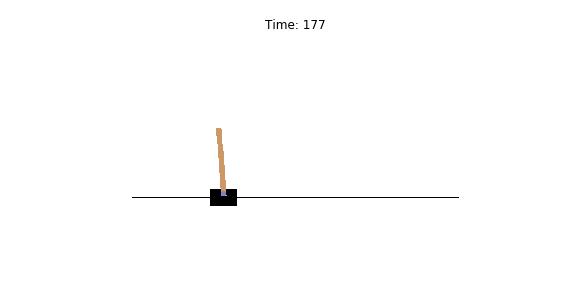
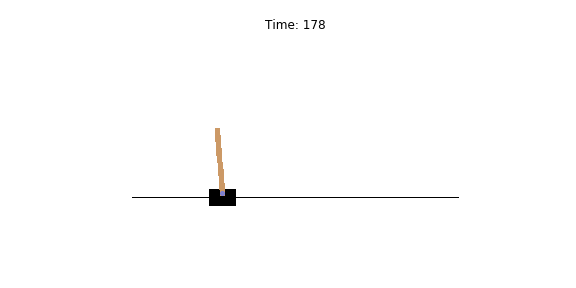
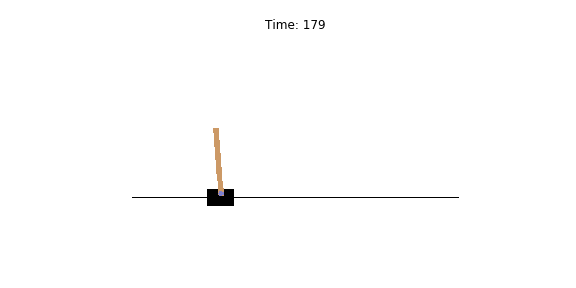
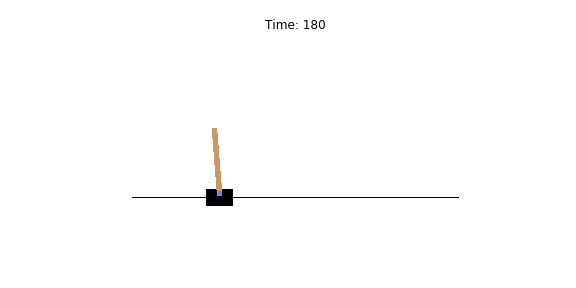
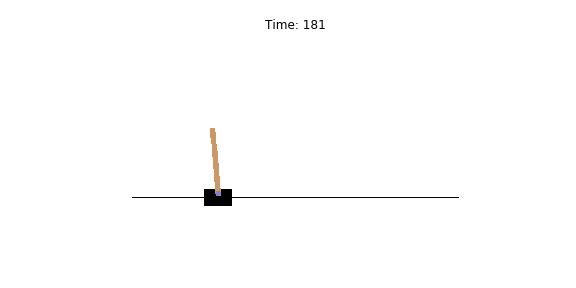
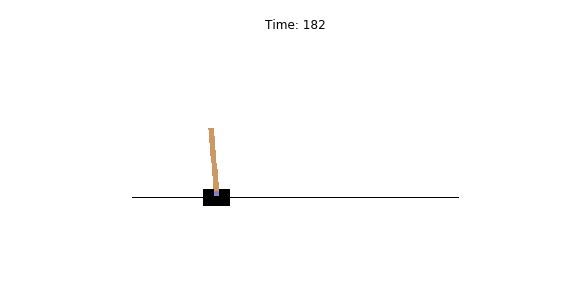
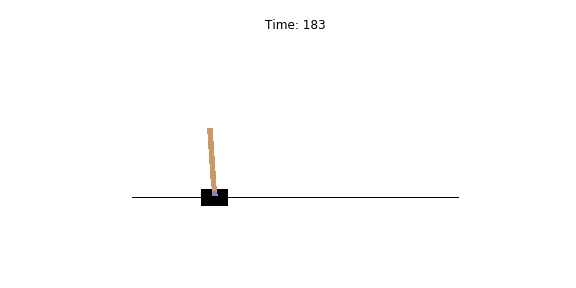
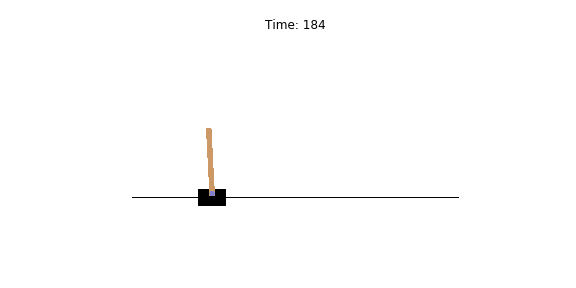
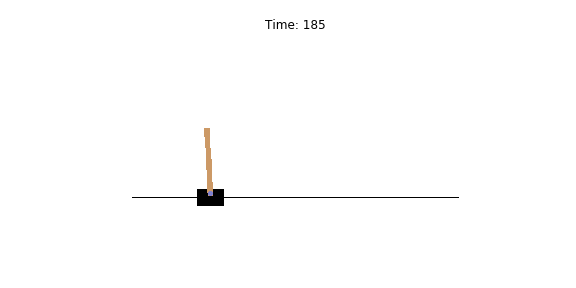
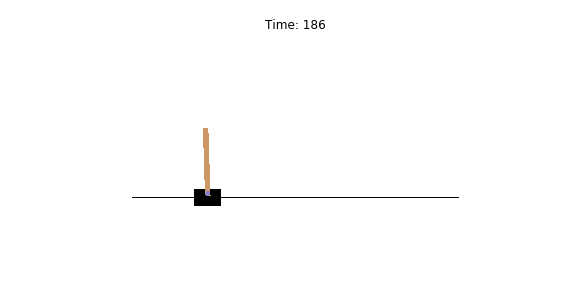
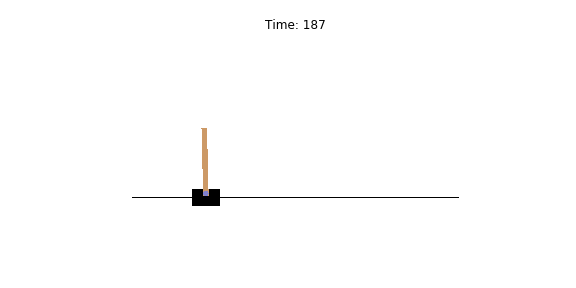
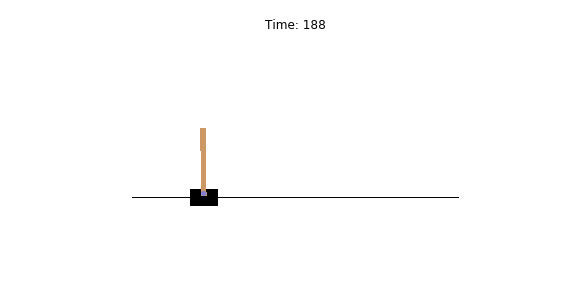
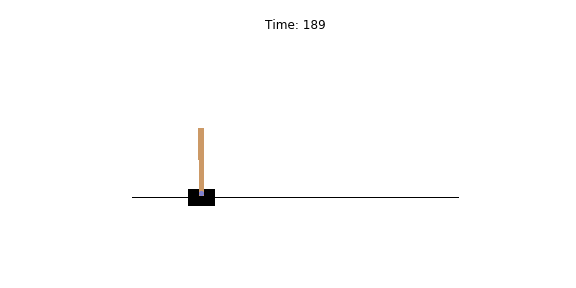
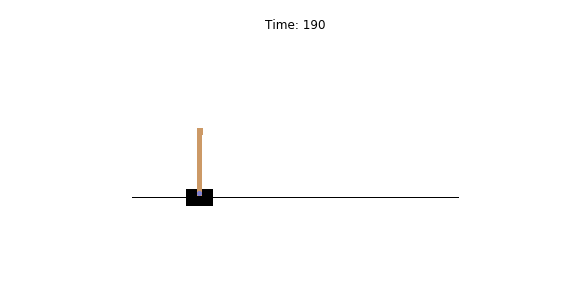
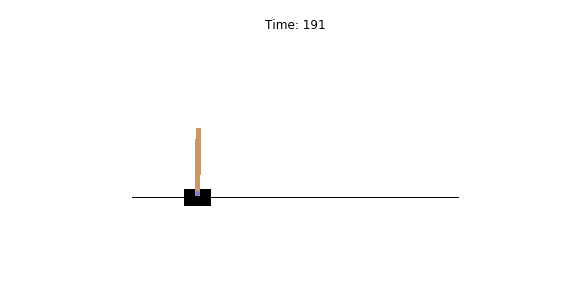
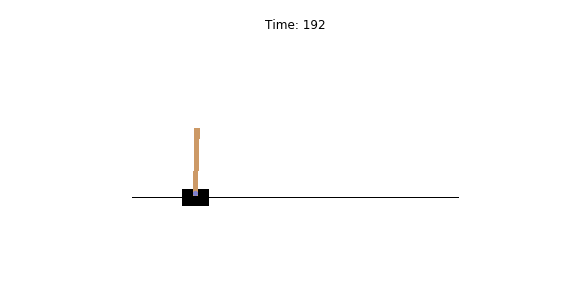
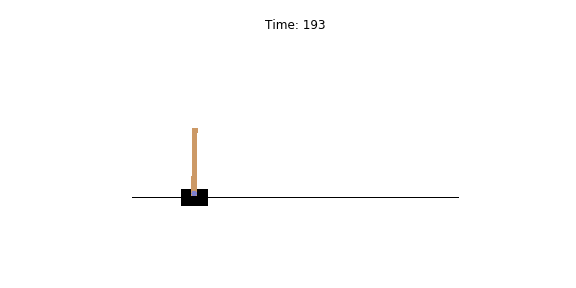
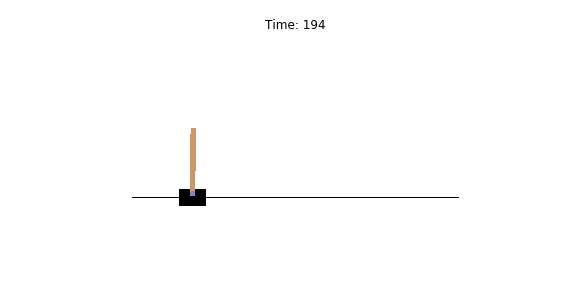
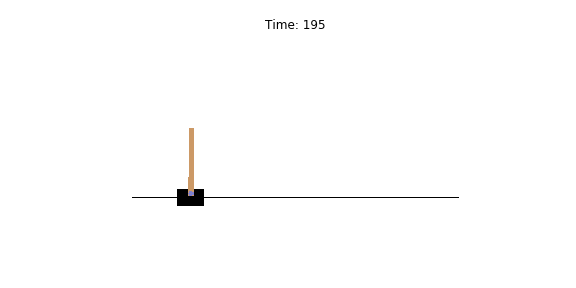
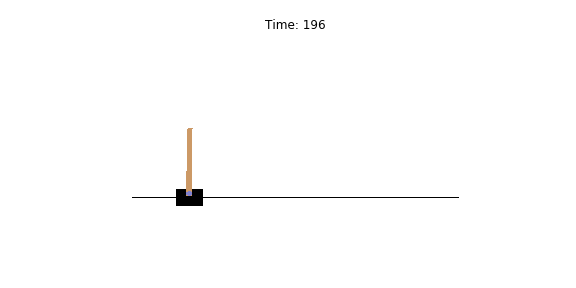
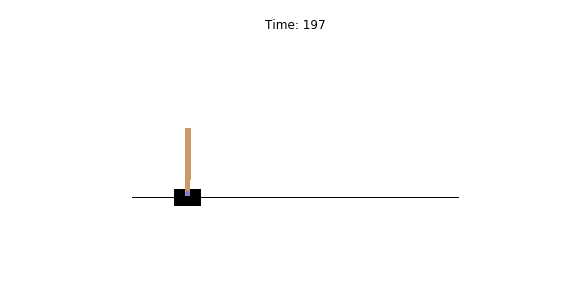
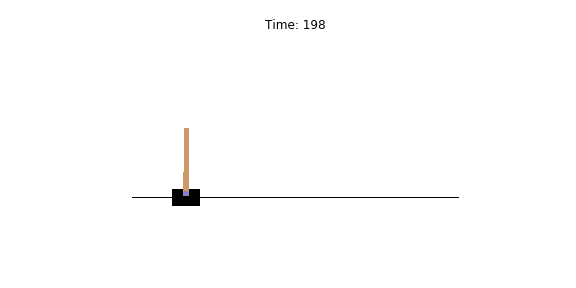
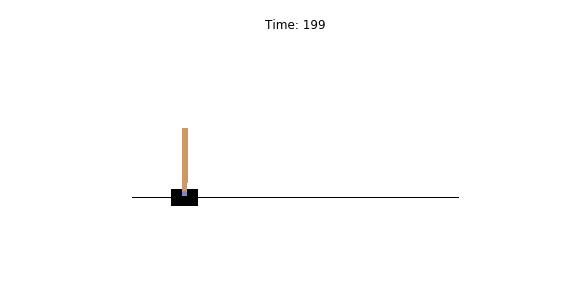

Episode [3000] Finished after: [200] steps, Reward: [200.00], Average Reward: [191.16]
Episode [3100] Finished after: [200] steps, Reward: [200.00], Average Reward: [189.88]
Episode [3200] Finished after: [184] steps, Reward: [184.00], Average Reward: [182.61]
Episode [3300] Finished after: [200] steps, Reward: [200.00], Average Reward: [187.82]
Episode [3400] Finished after: [200] steps, Reward: [200.00], Average Reward: [191.38]



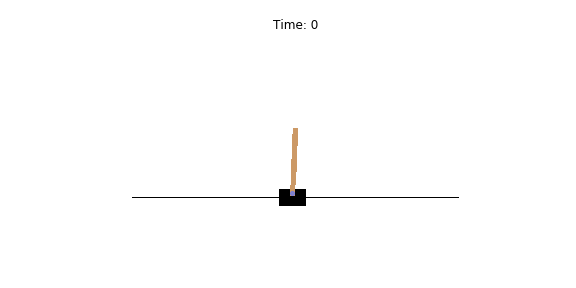
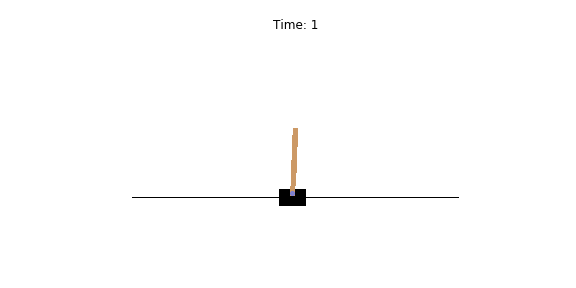
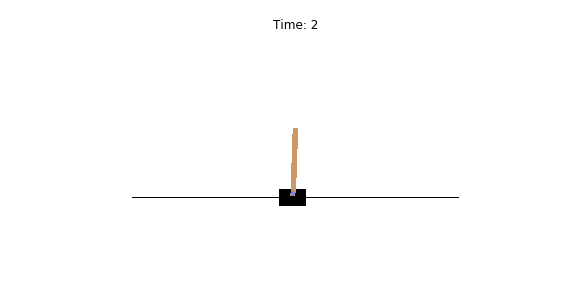
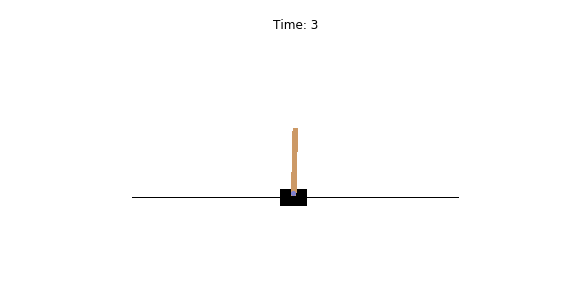
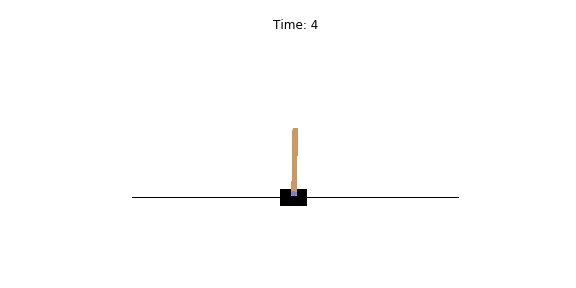
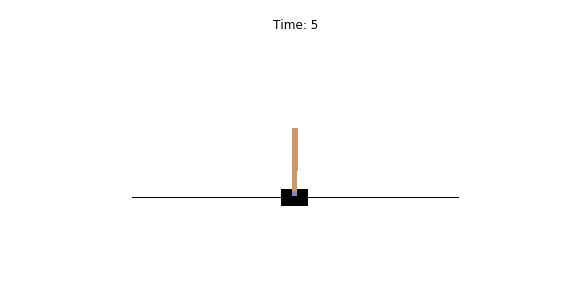
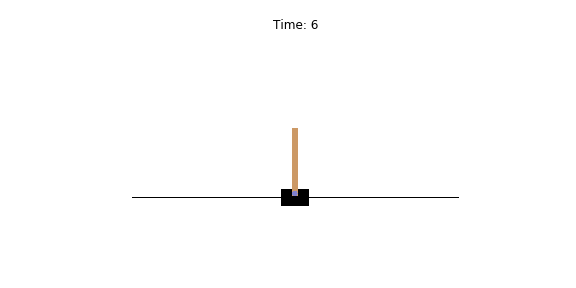
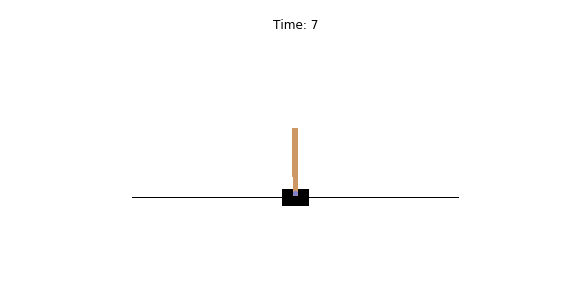
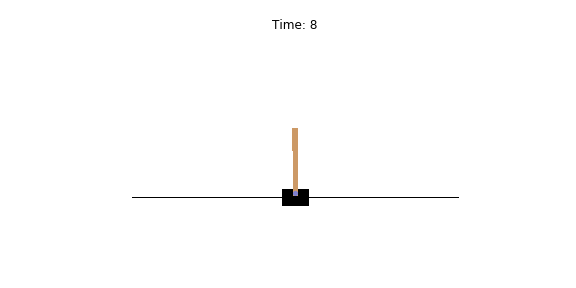
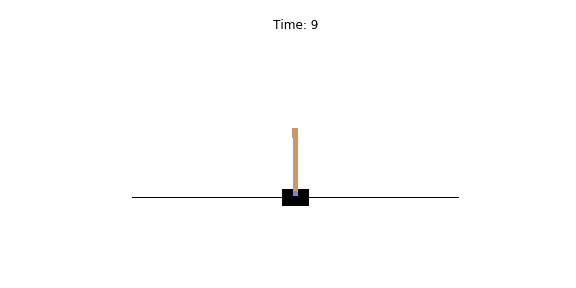
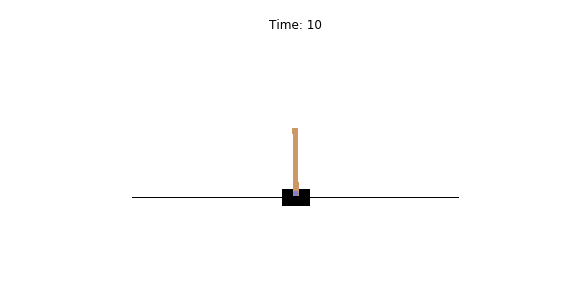
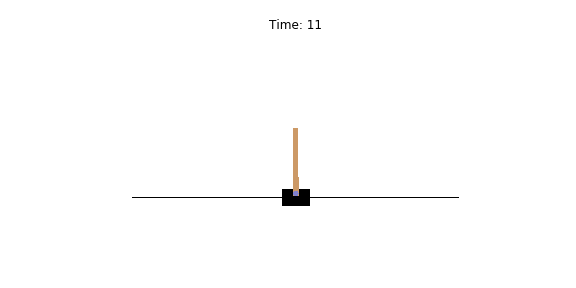
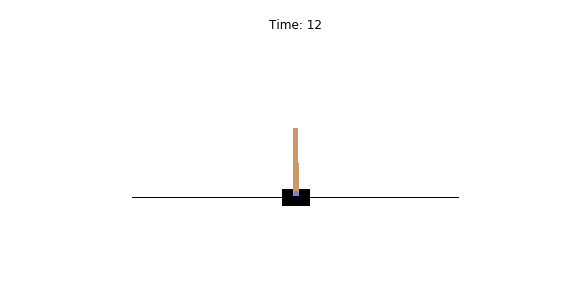
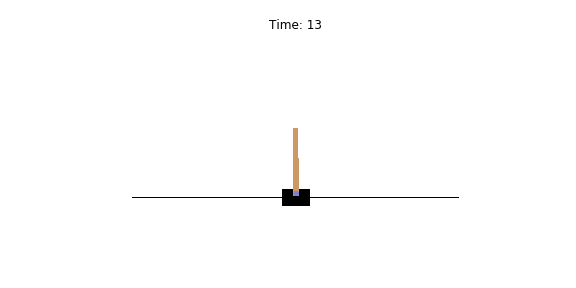
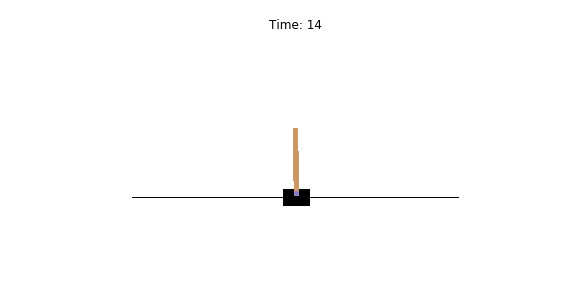
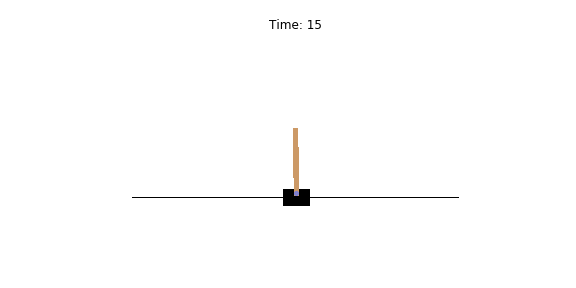
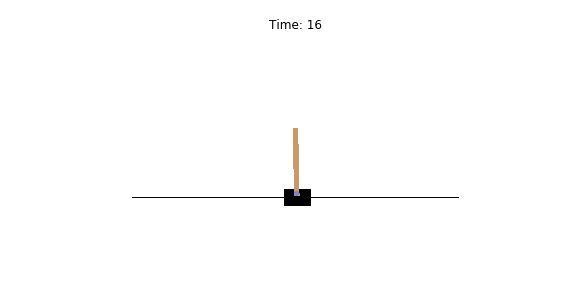
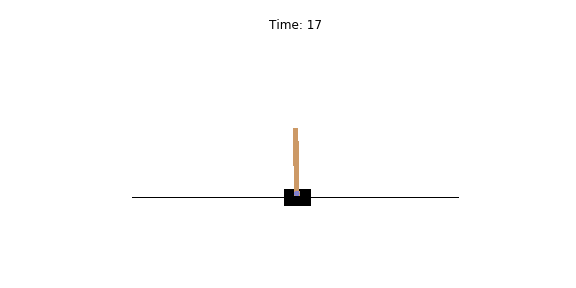
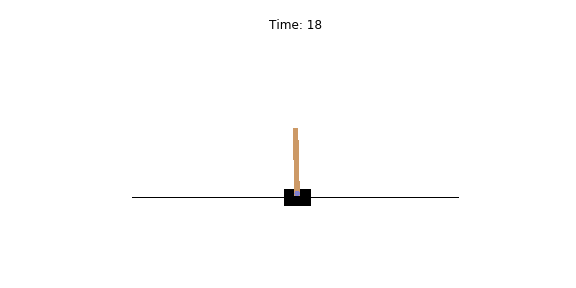
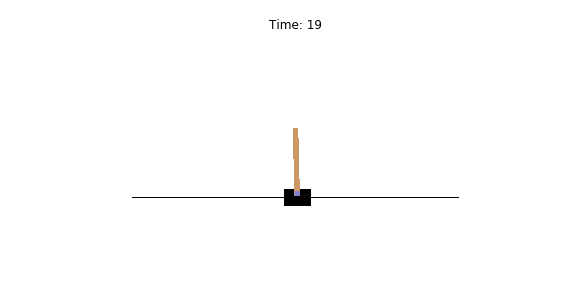
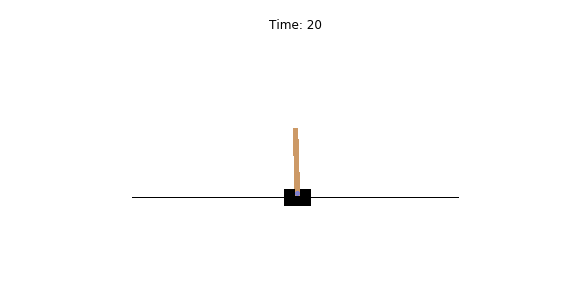
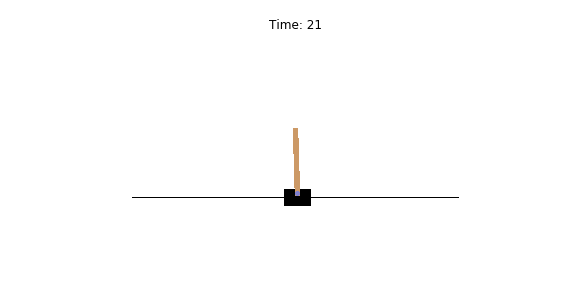
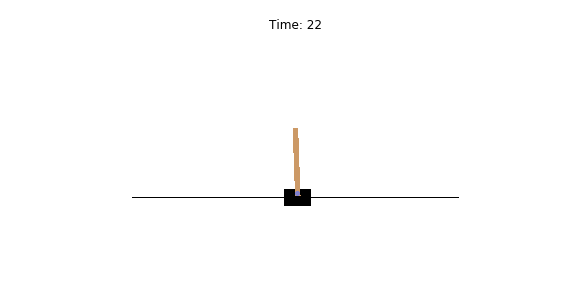
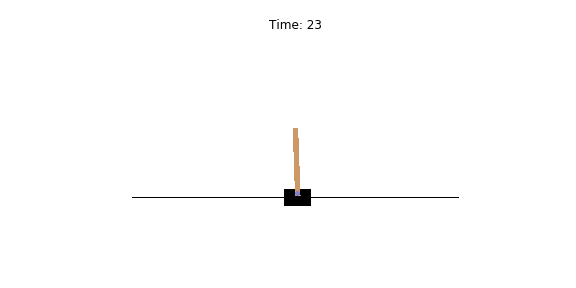
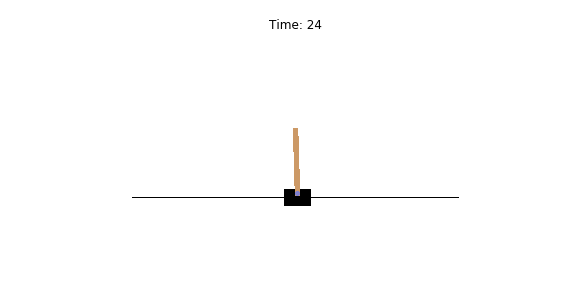
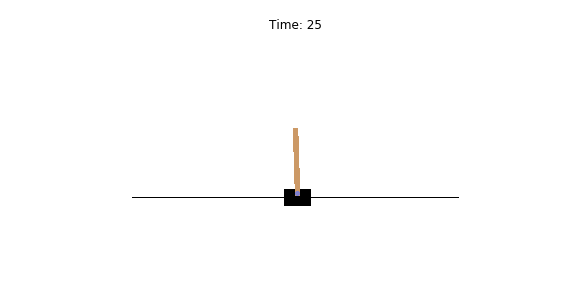
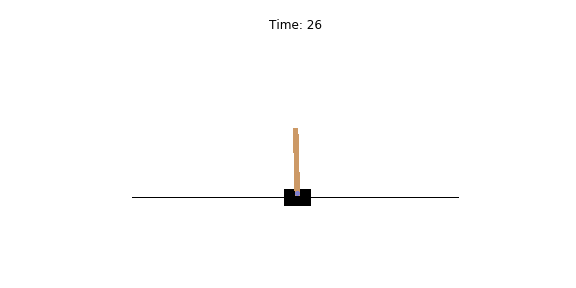
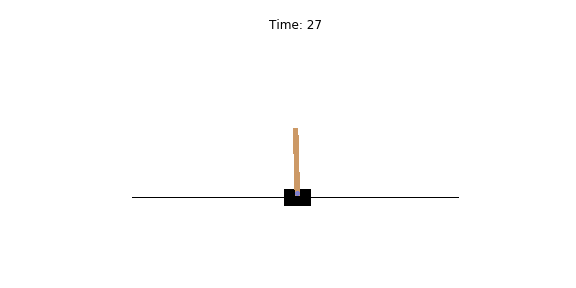
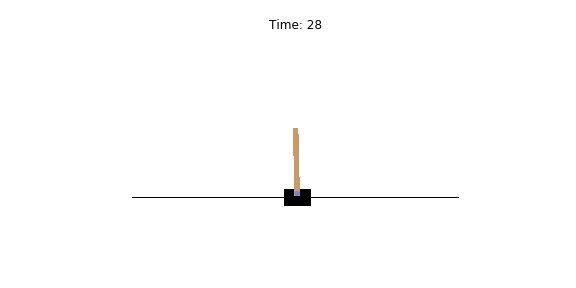
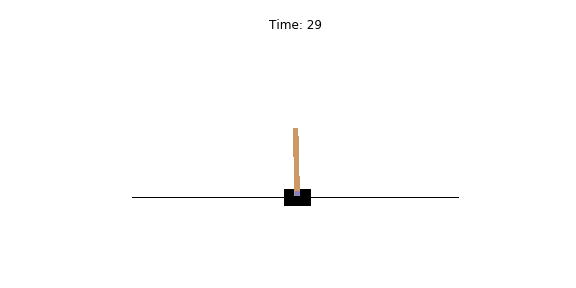
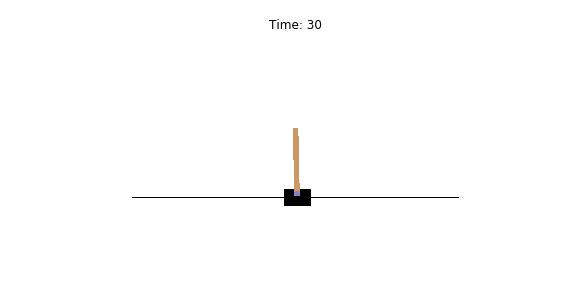
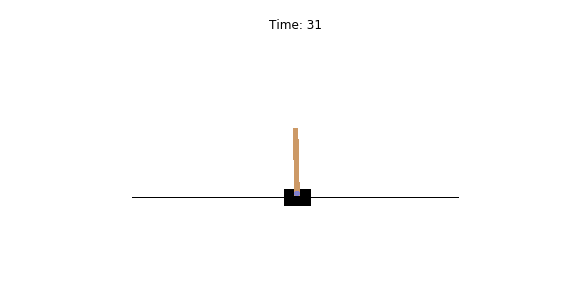
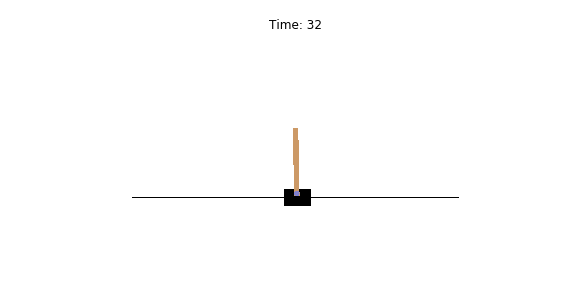
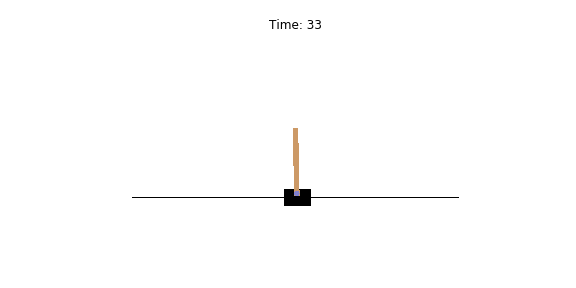
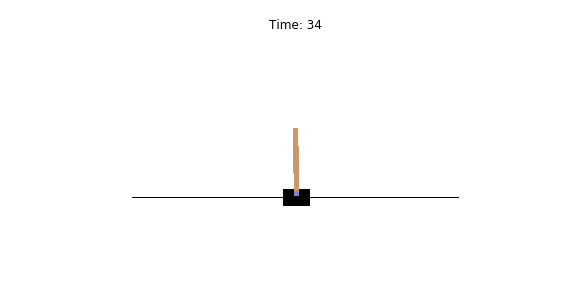
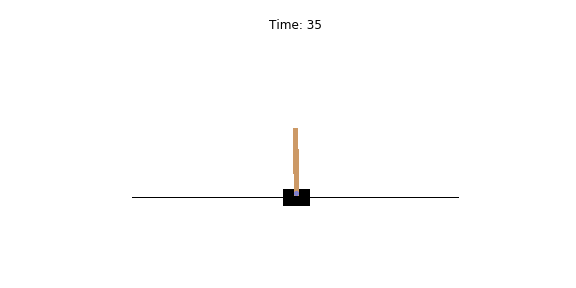
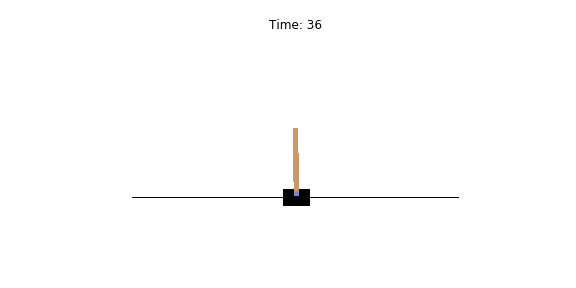
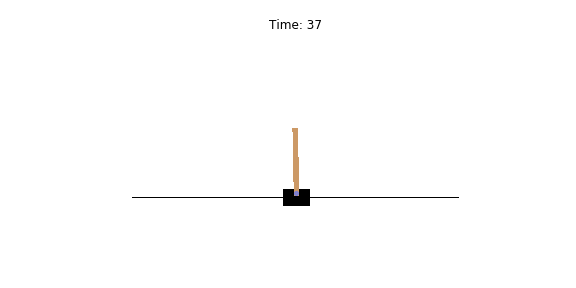
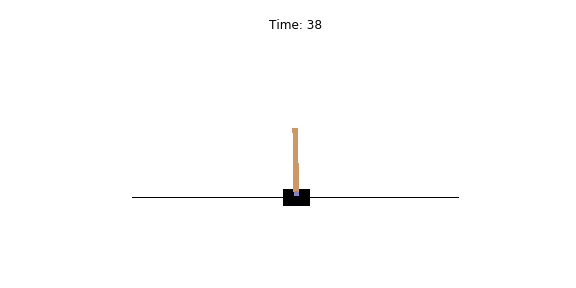
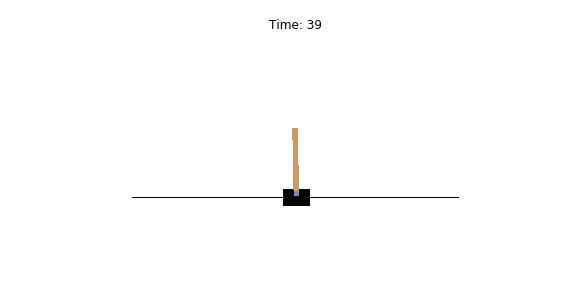
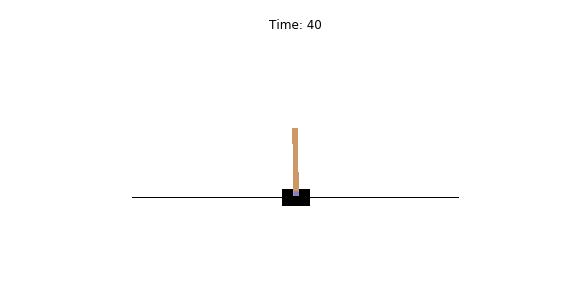
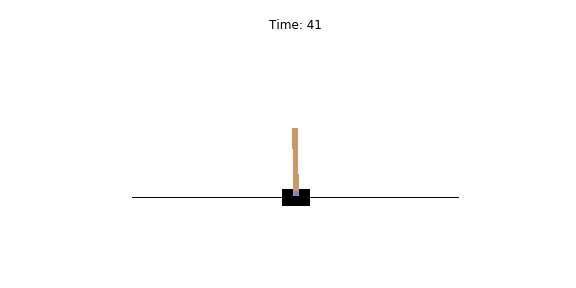
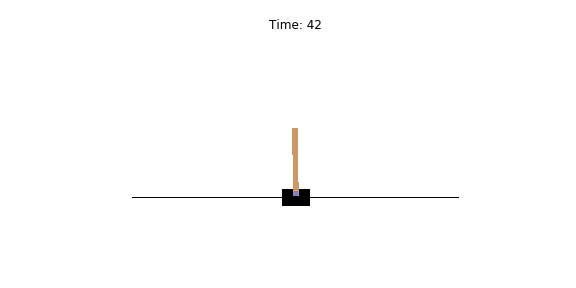
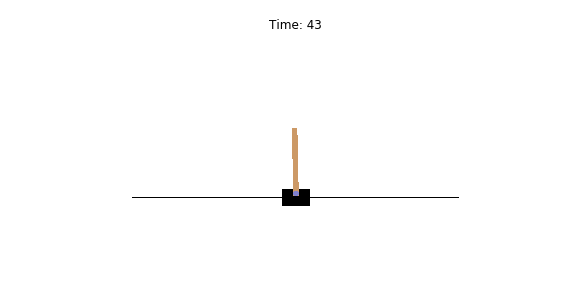
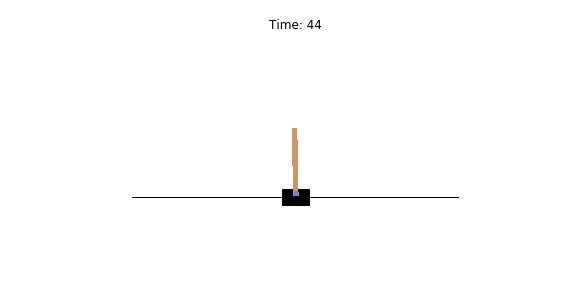
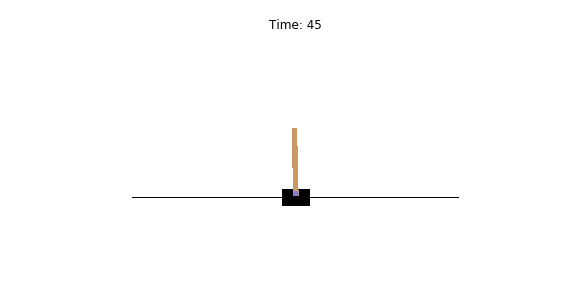
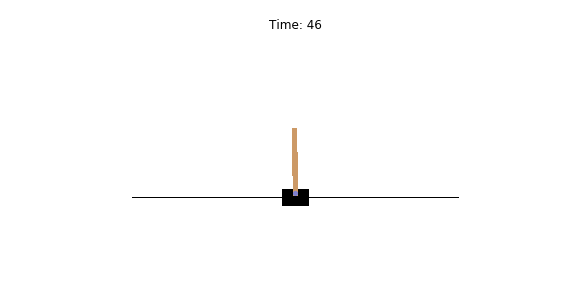
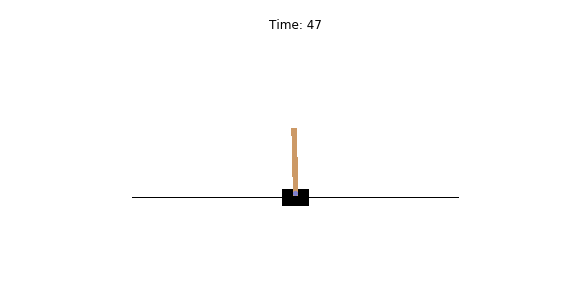
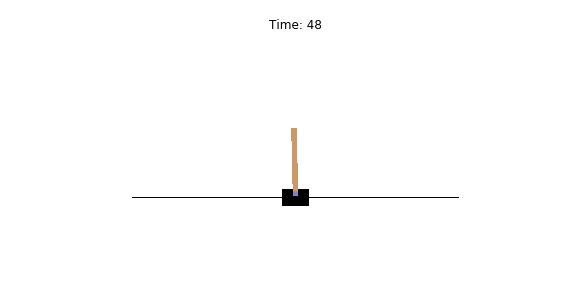
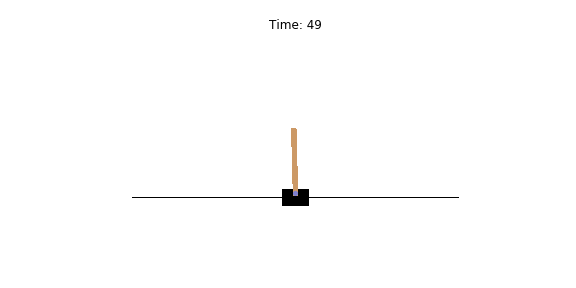
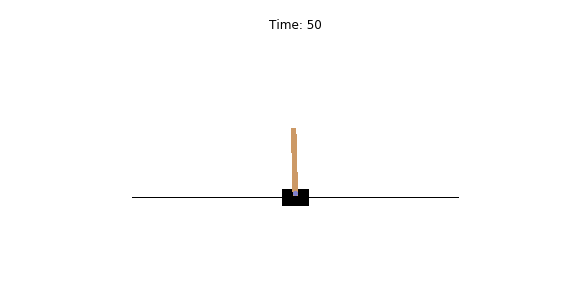
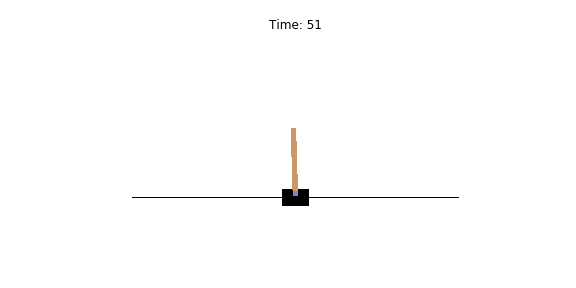
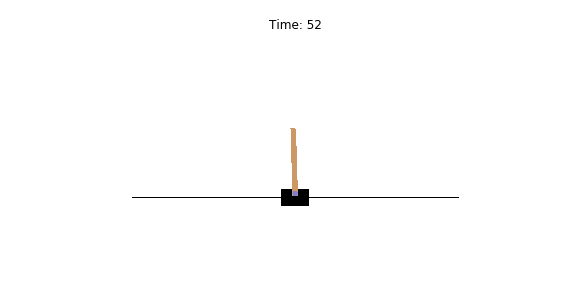
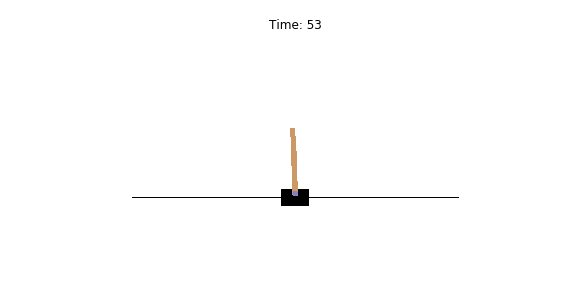
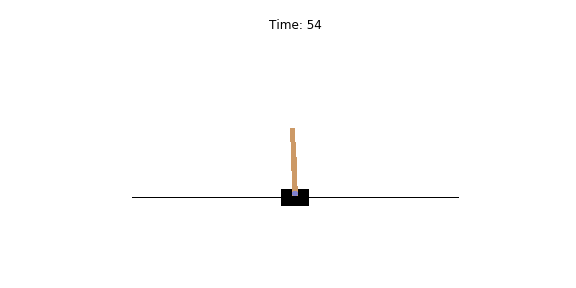
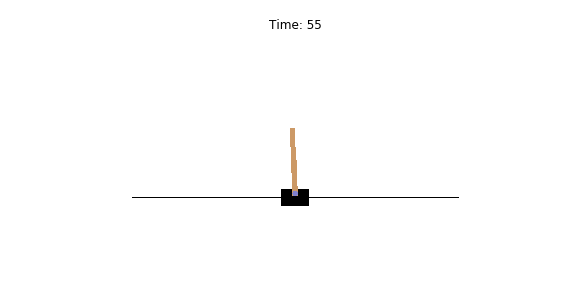
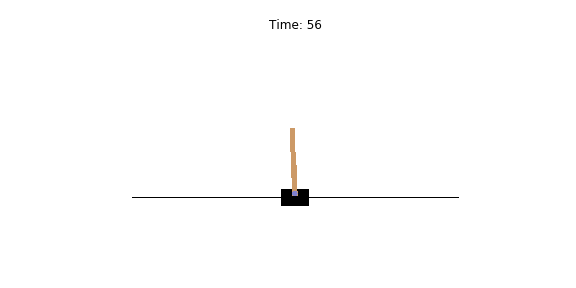
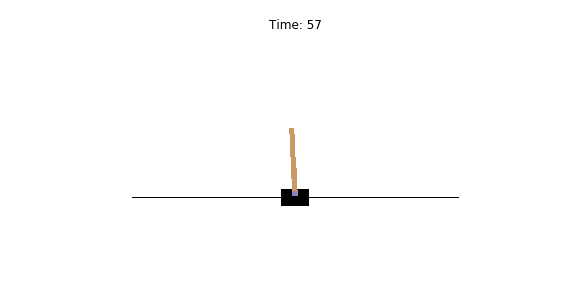
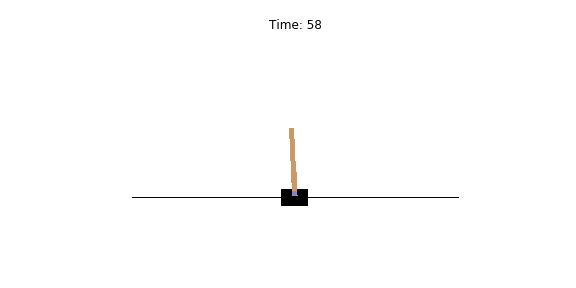
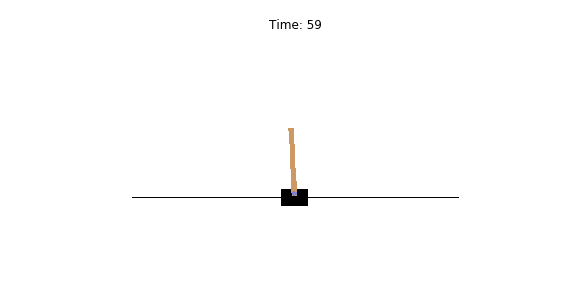
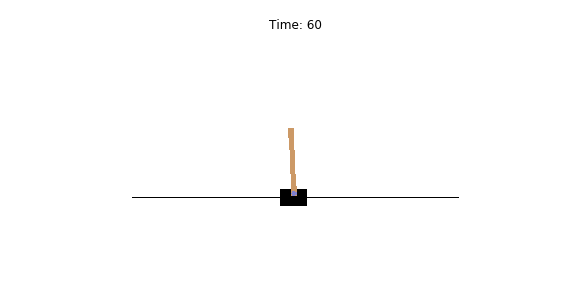
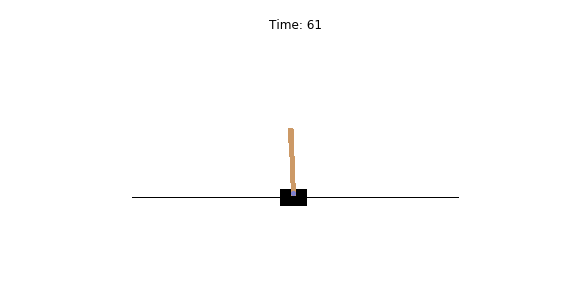
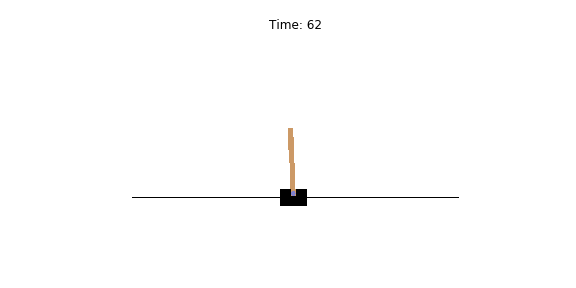
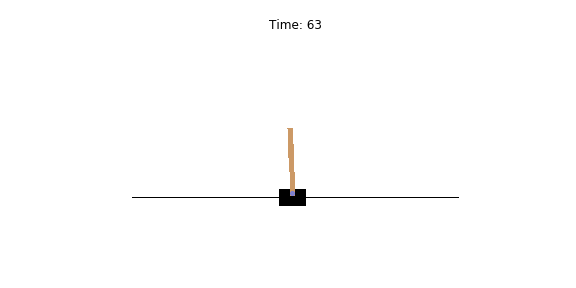
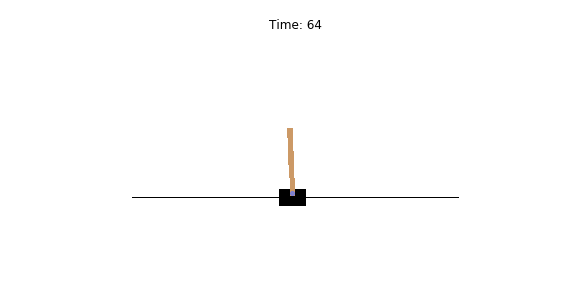
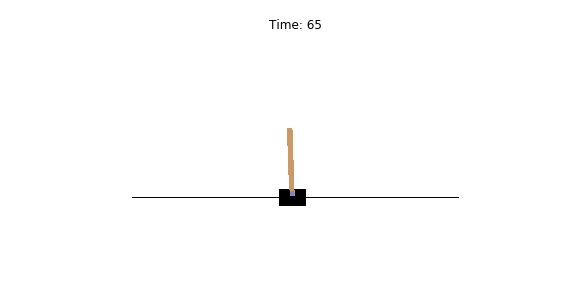
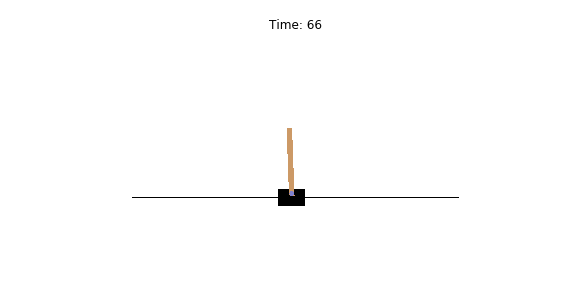
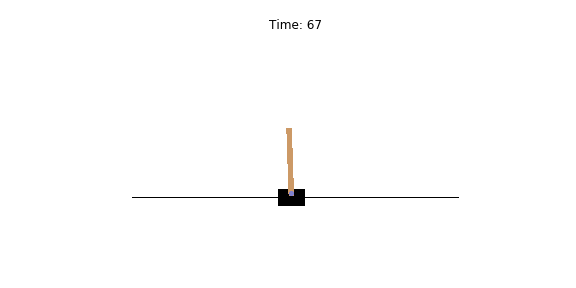
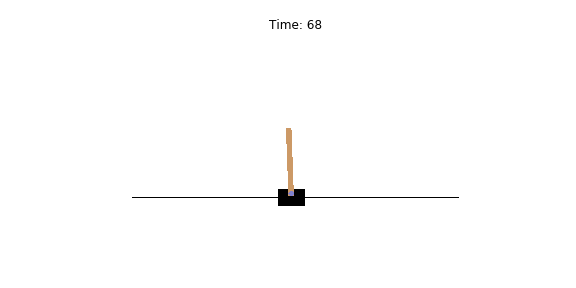
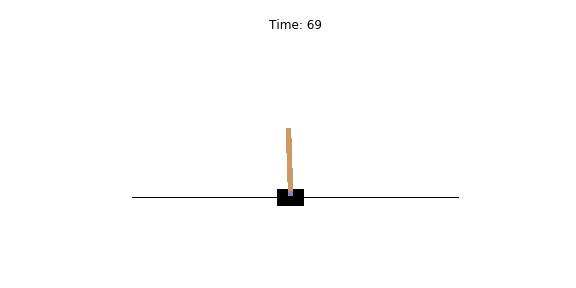
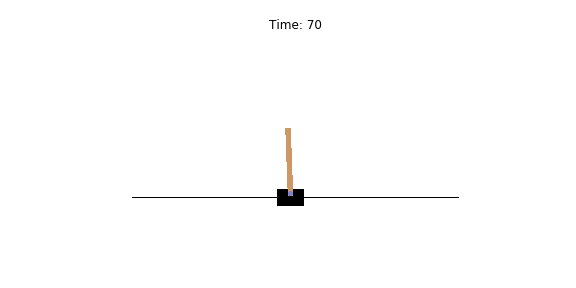
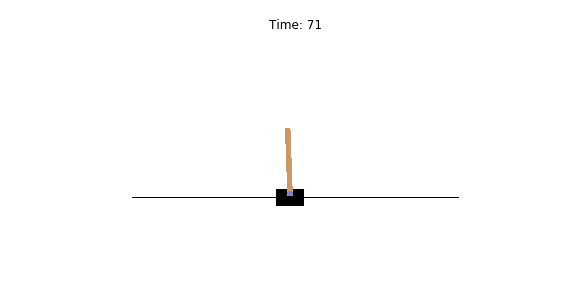
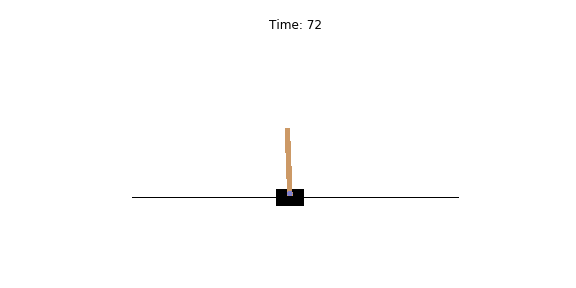
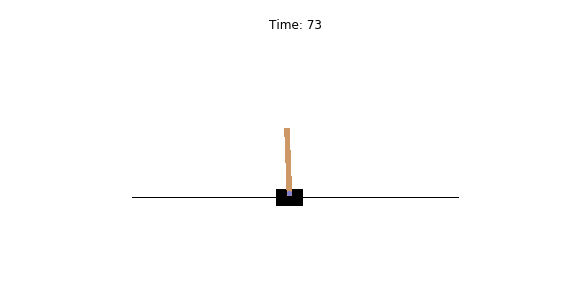
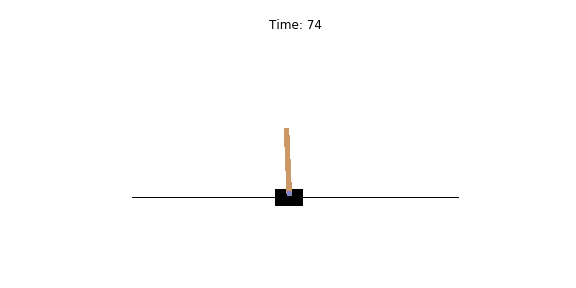
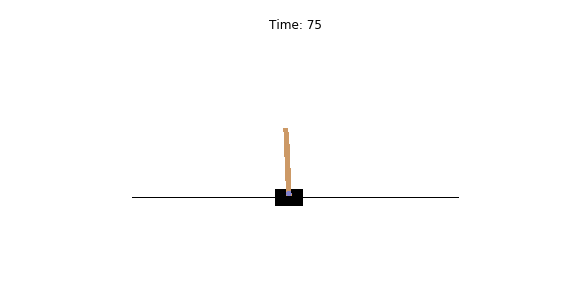
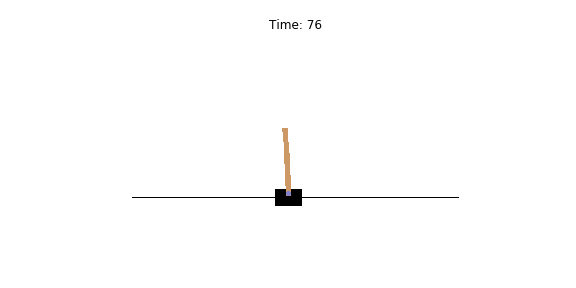
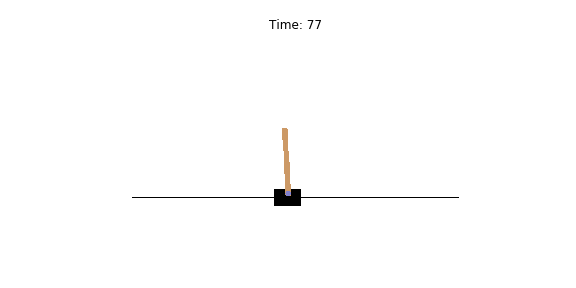
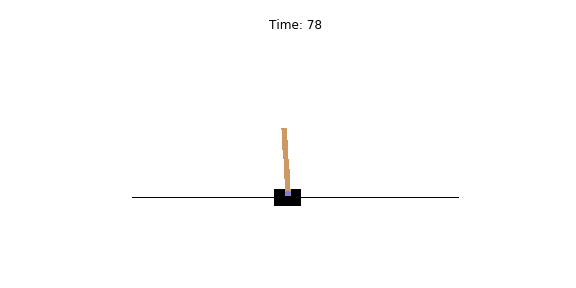
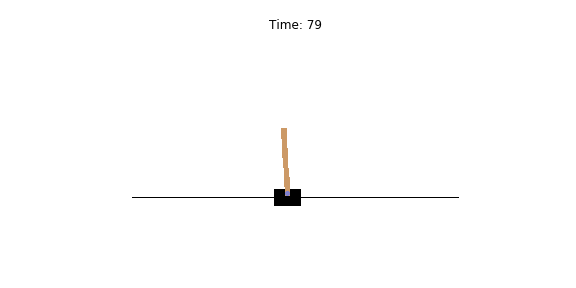
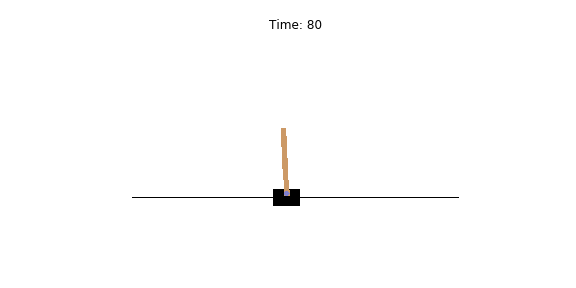
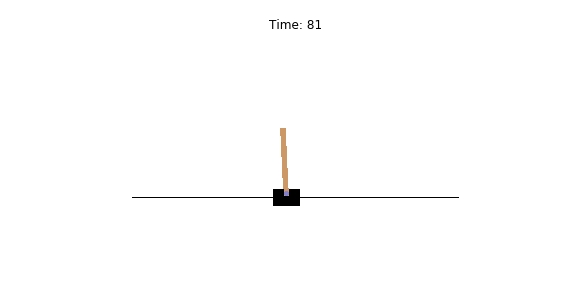
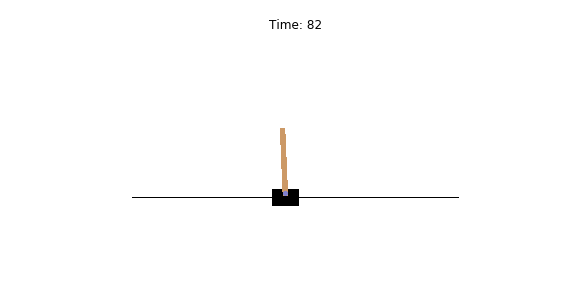
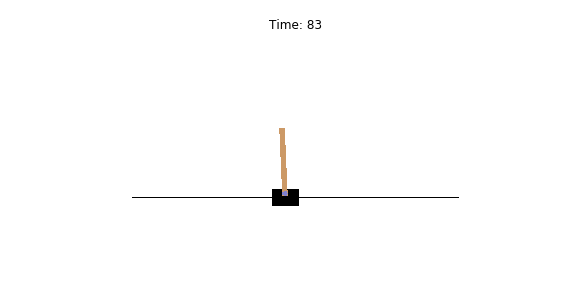
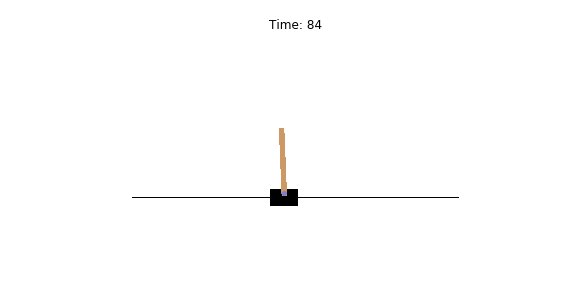
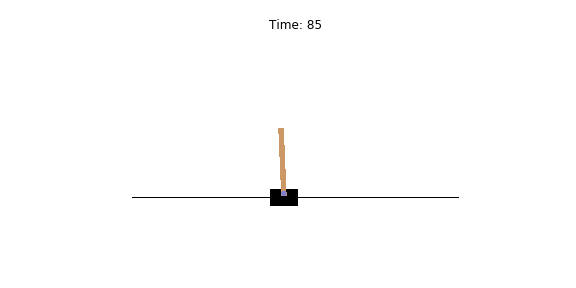
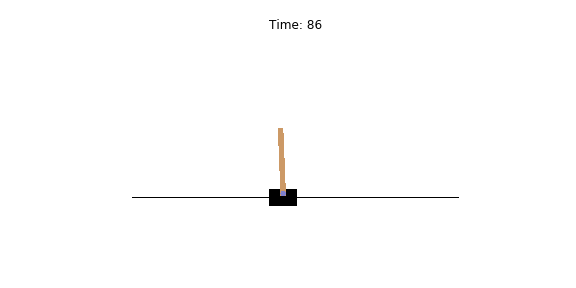
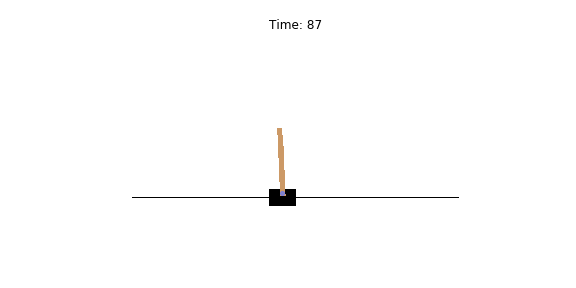
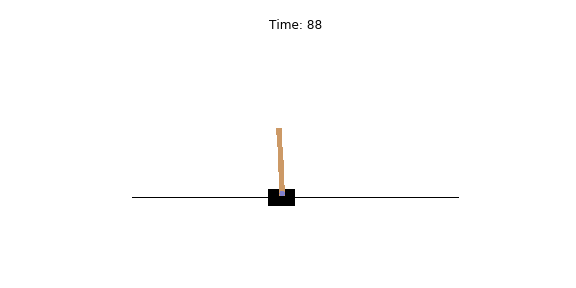
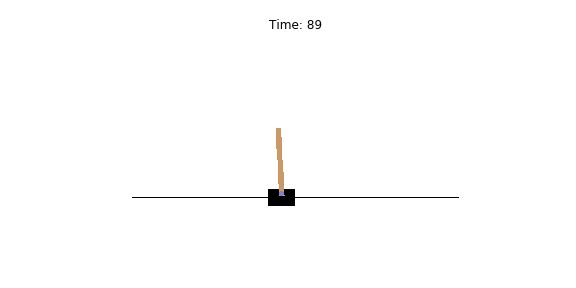
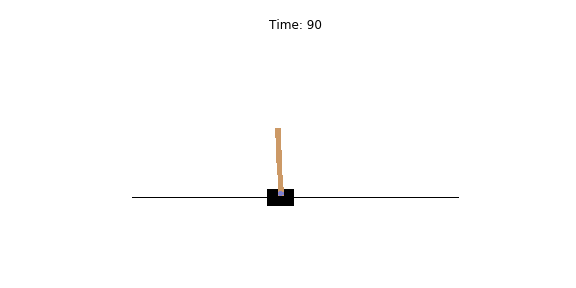
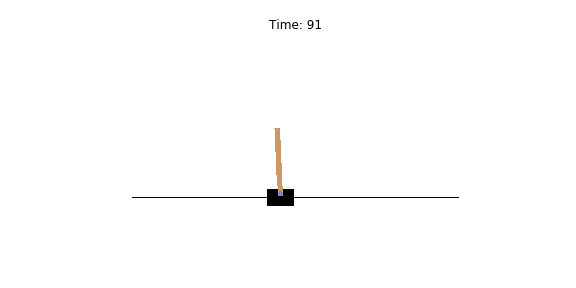
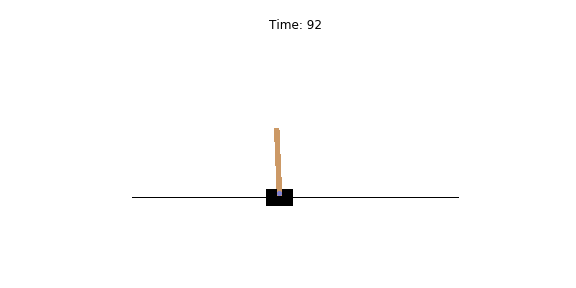
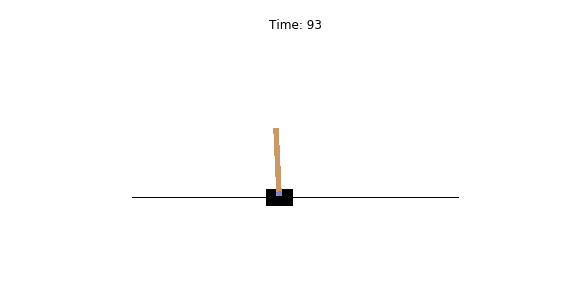
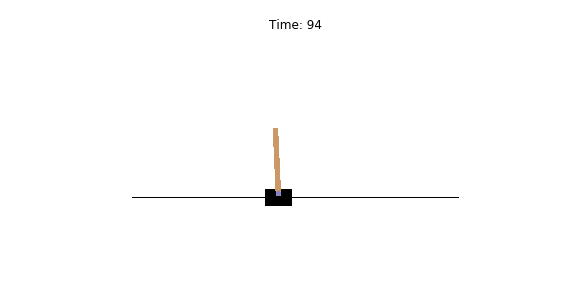
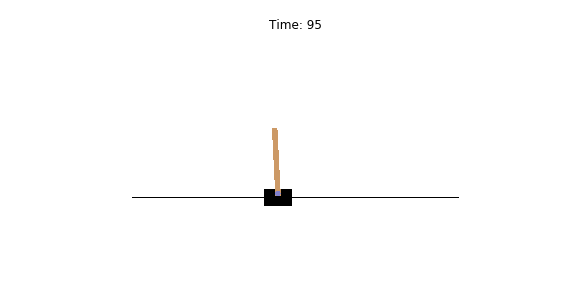
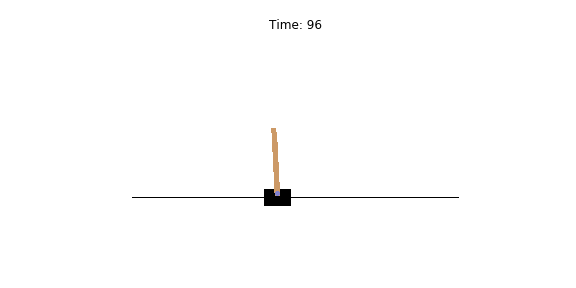
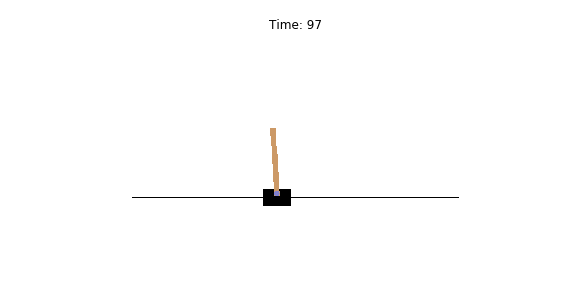
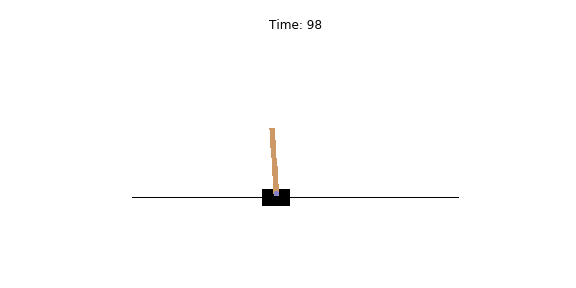
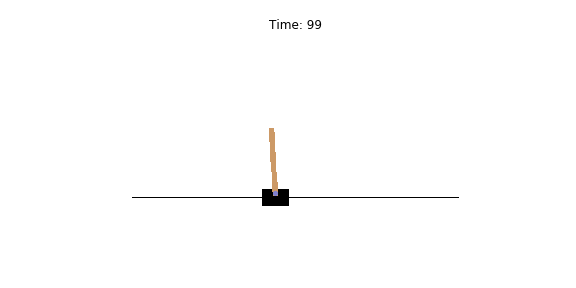
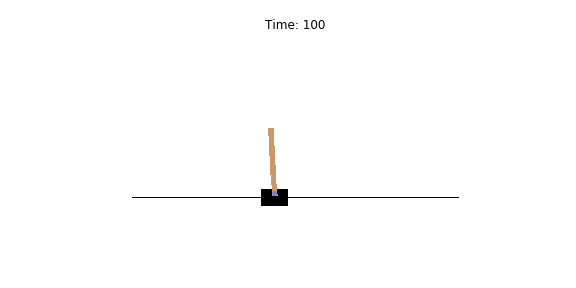
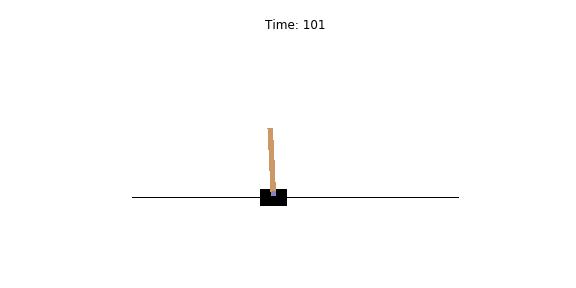
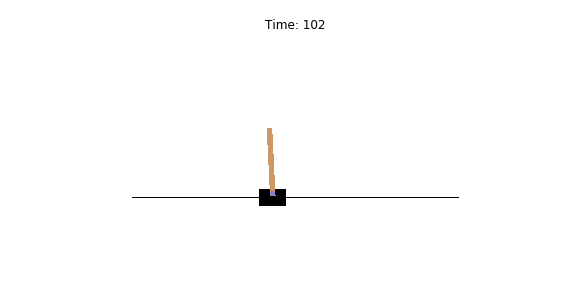
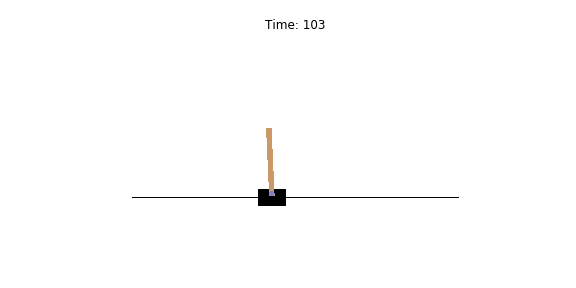
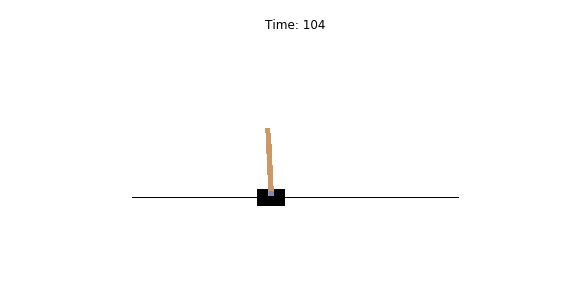
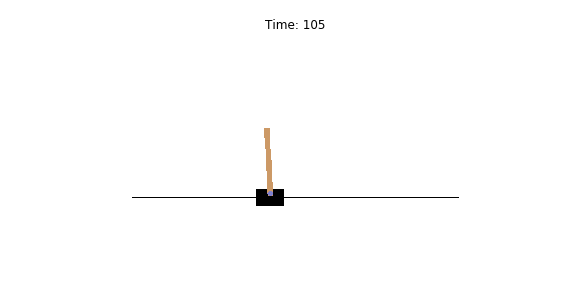
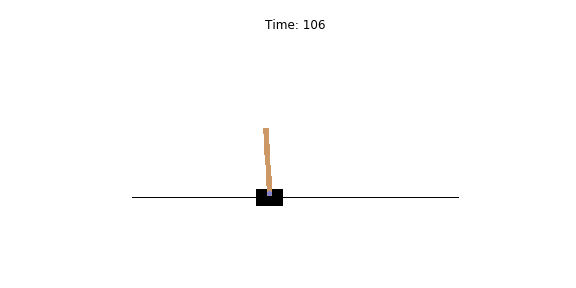
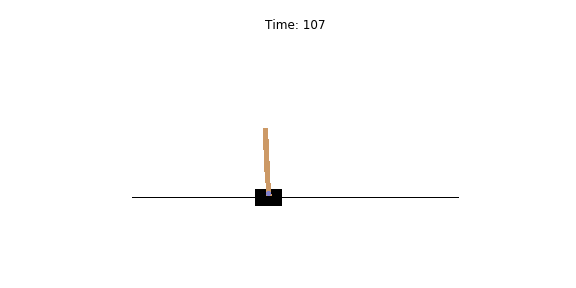
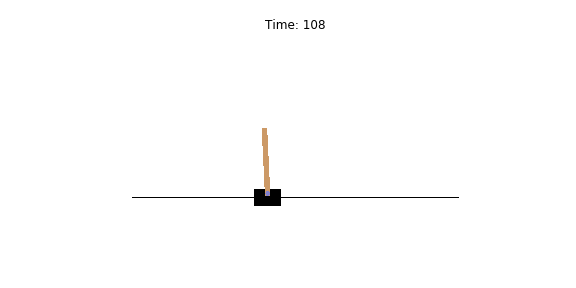
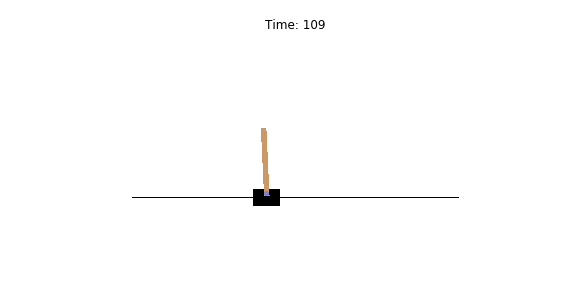
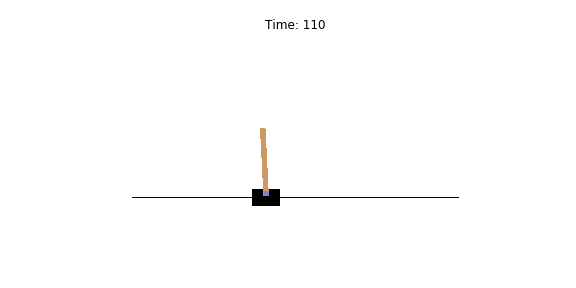
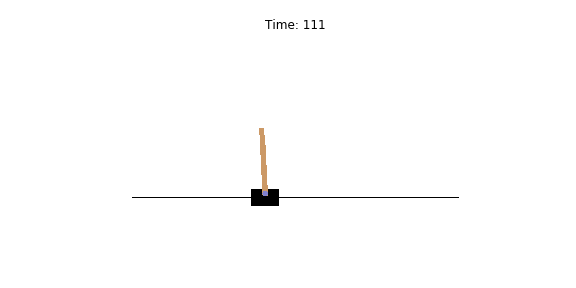
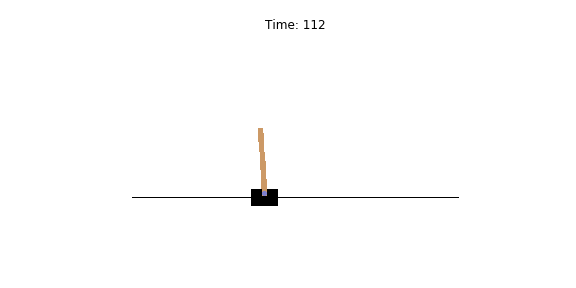
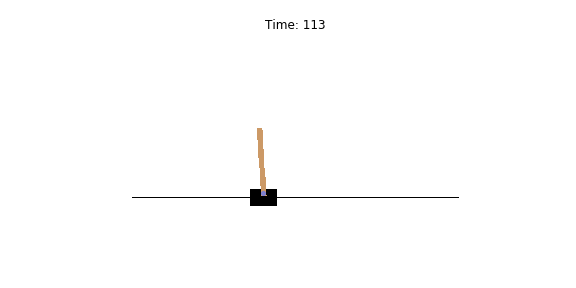
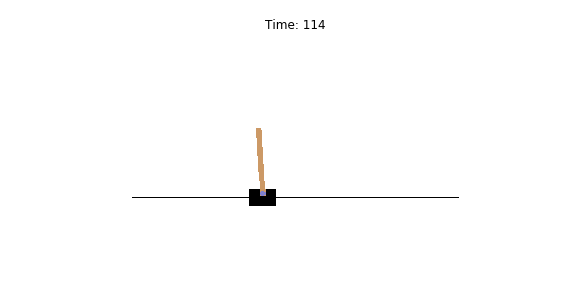
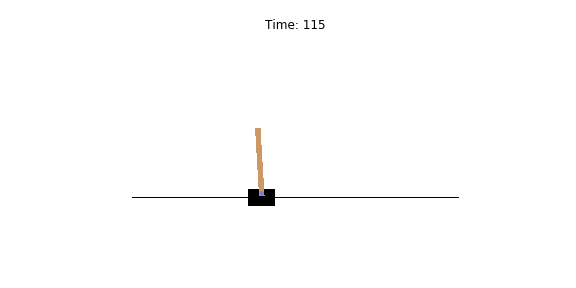
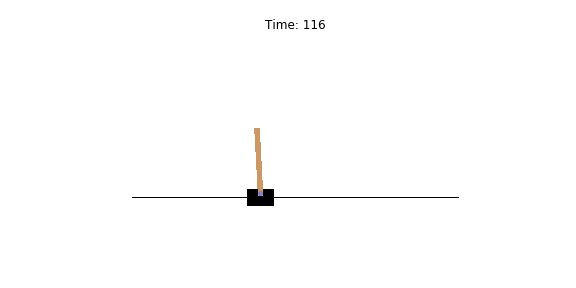
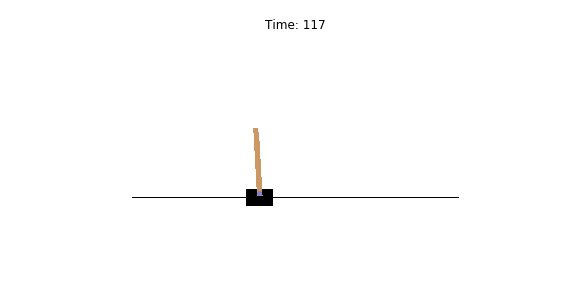
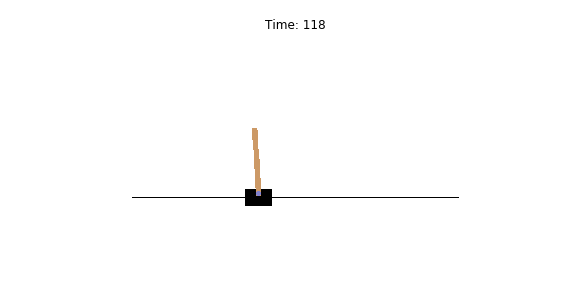
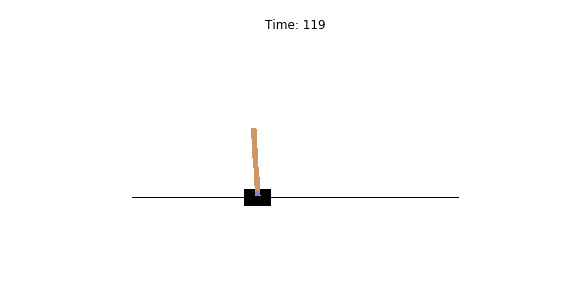
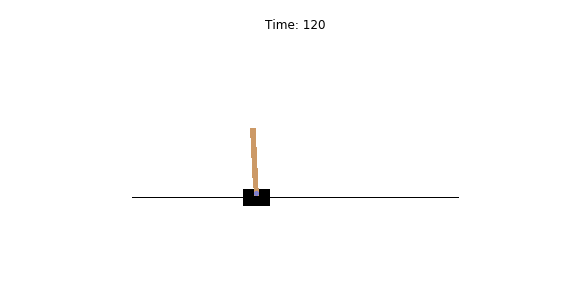
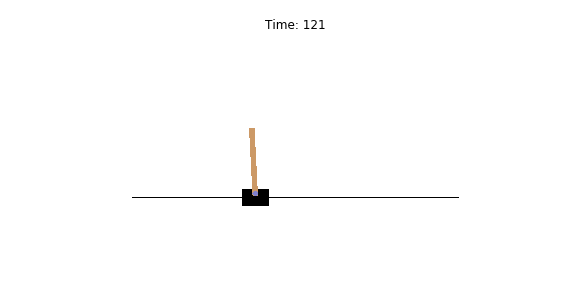
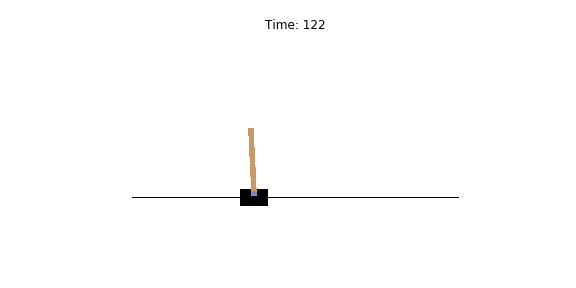
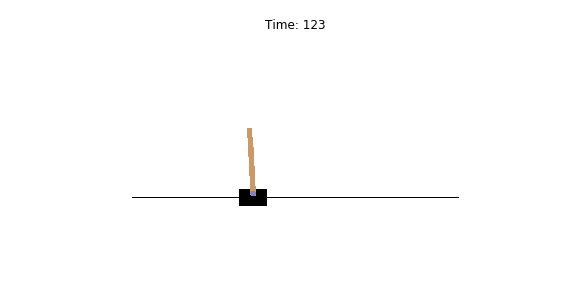
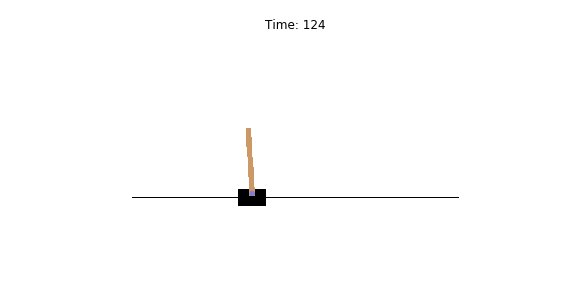
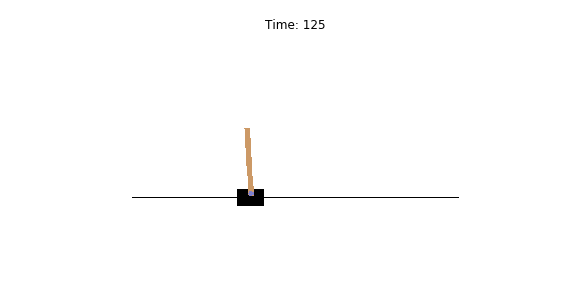
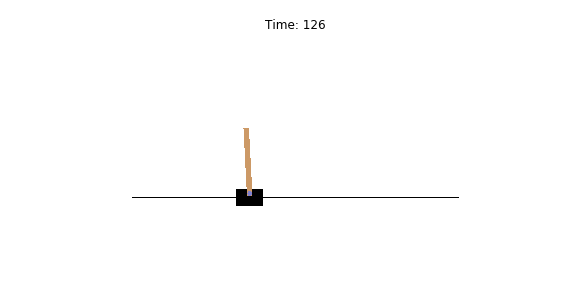
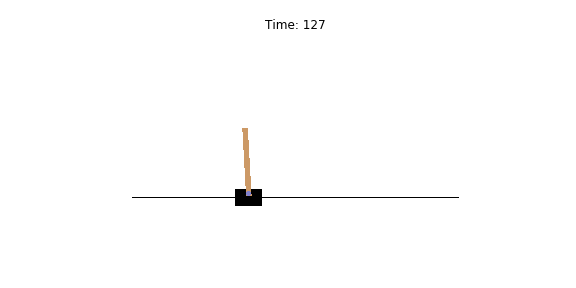
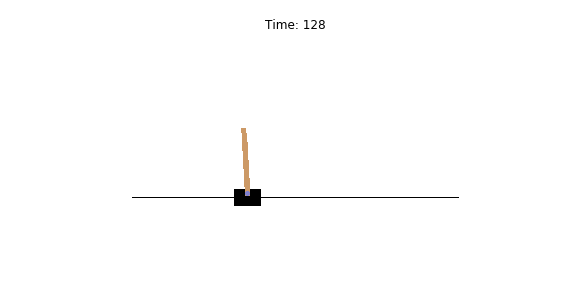
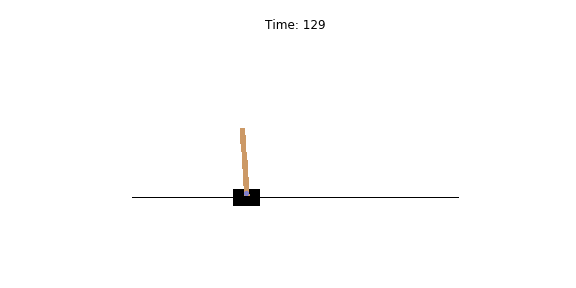
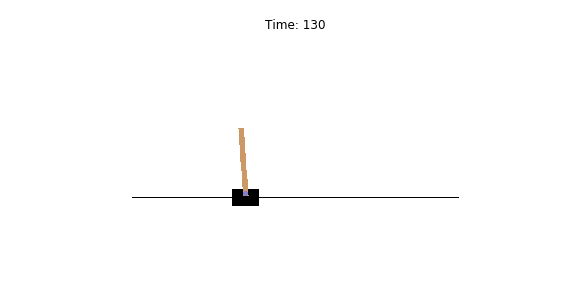
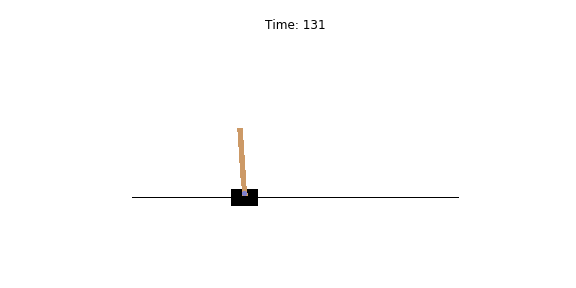
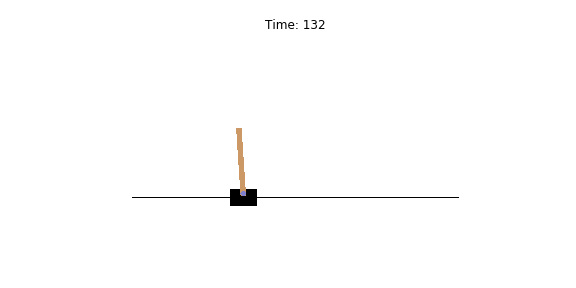
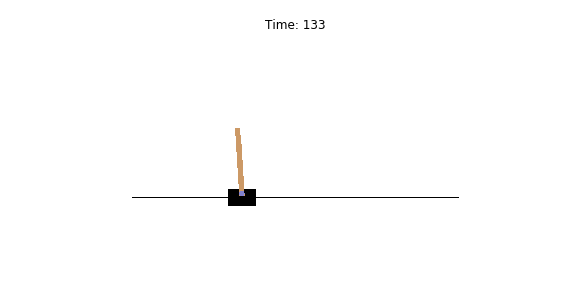
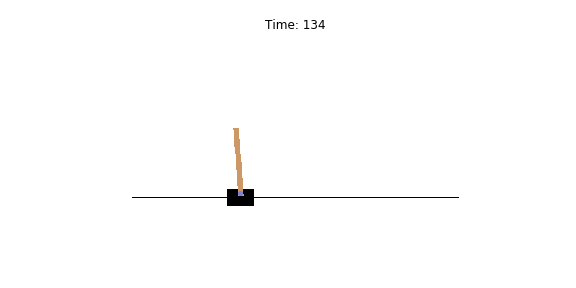
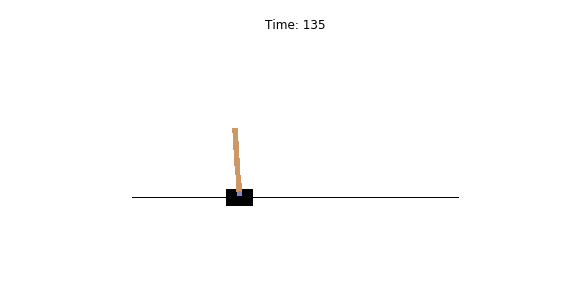
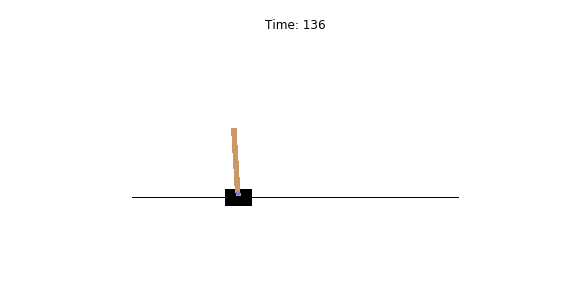
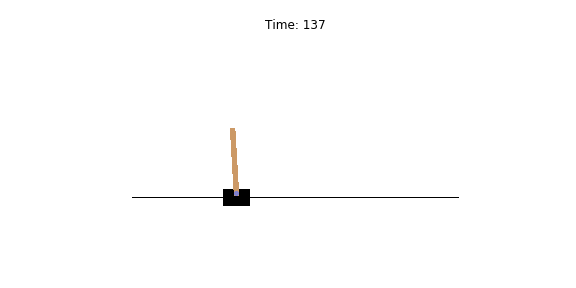
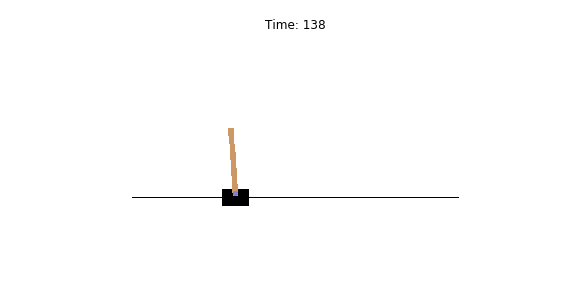
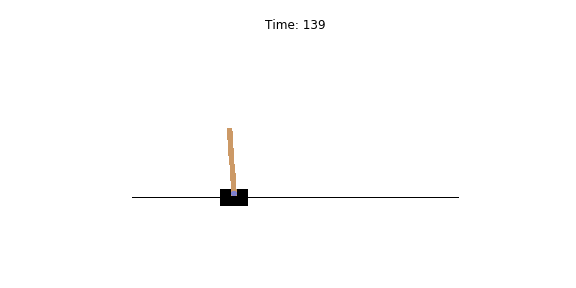
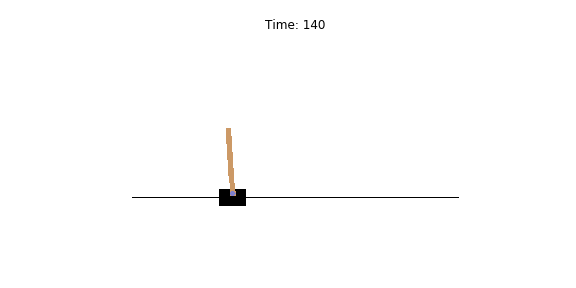
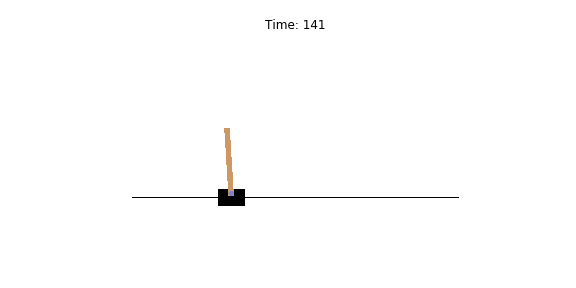
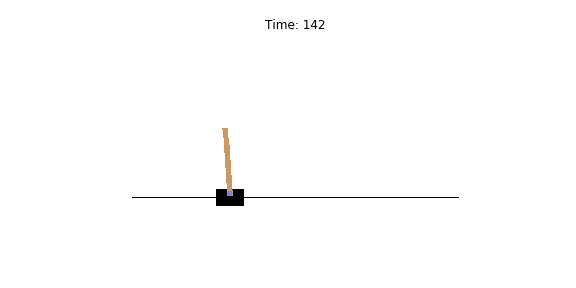
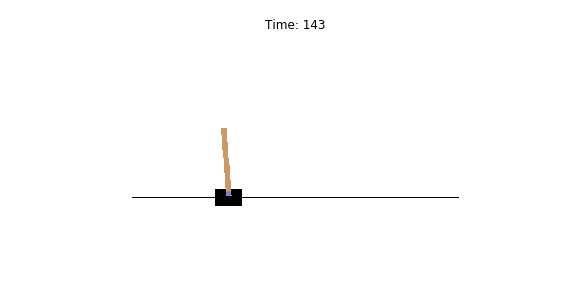
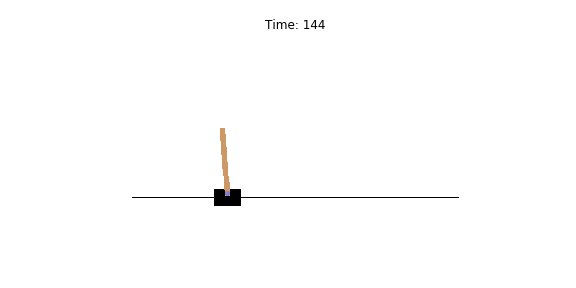
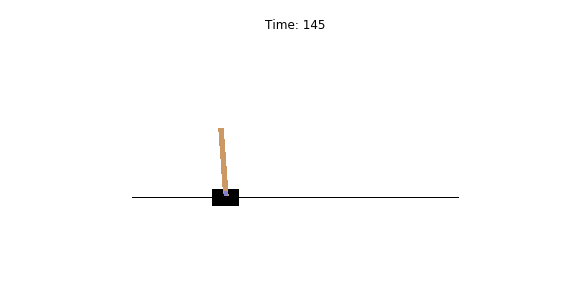
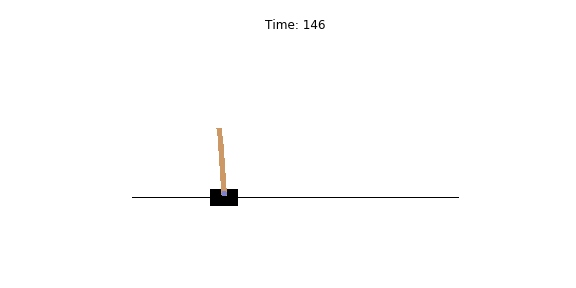
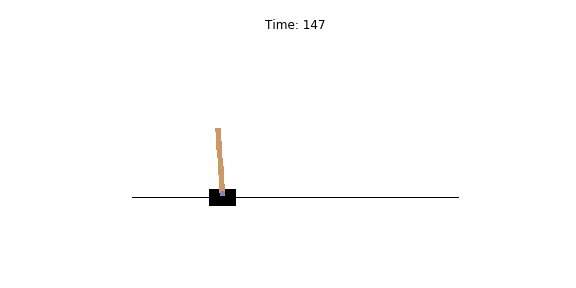
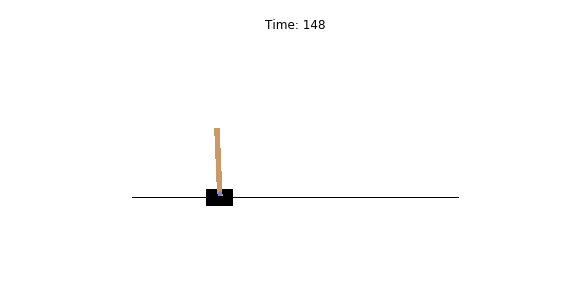
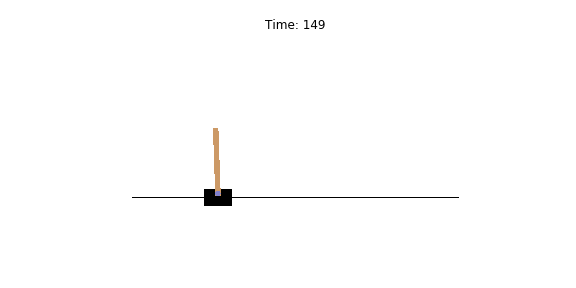
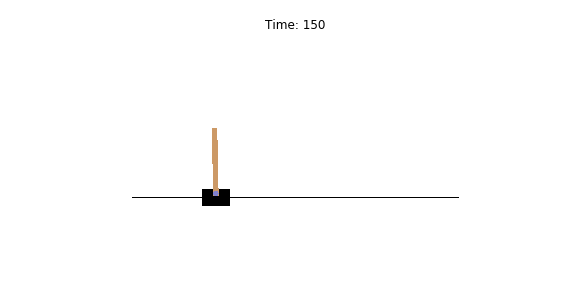
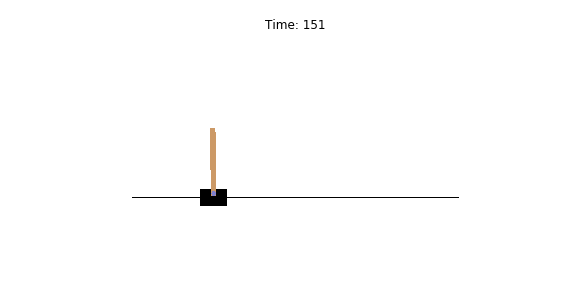
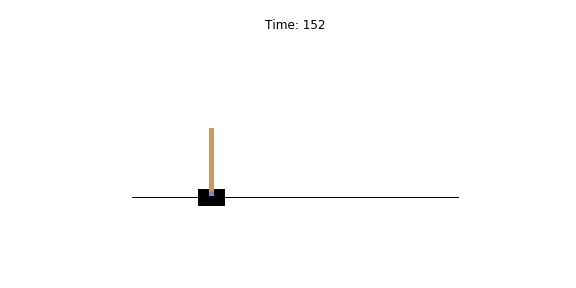
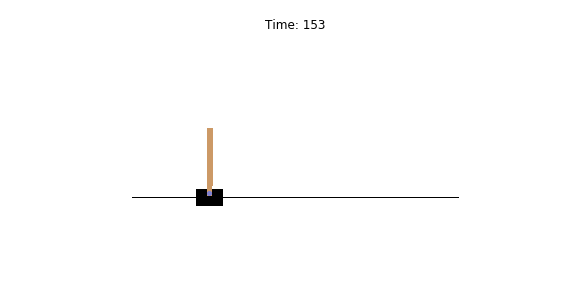
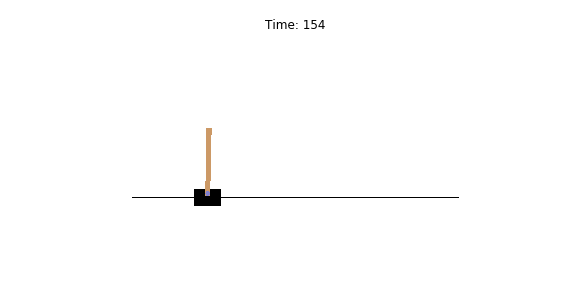
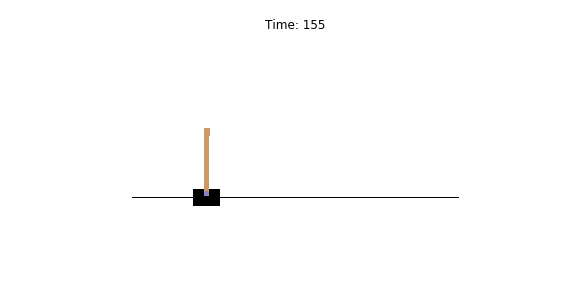
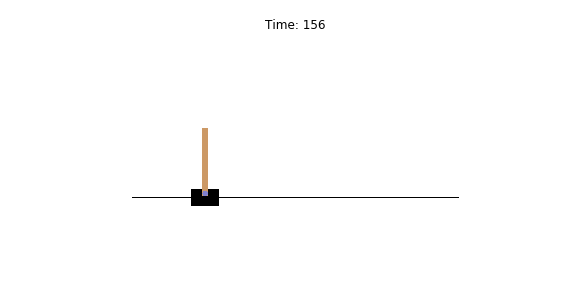
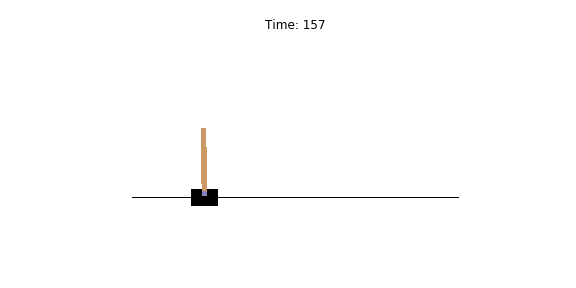
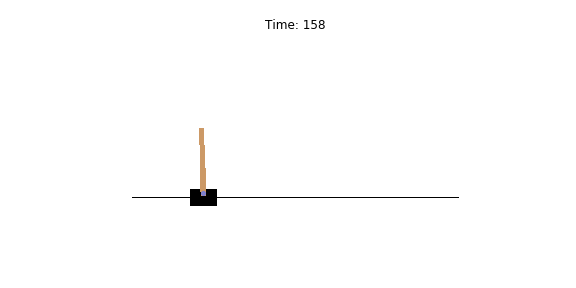
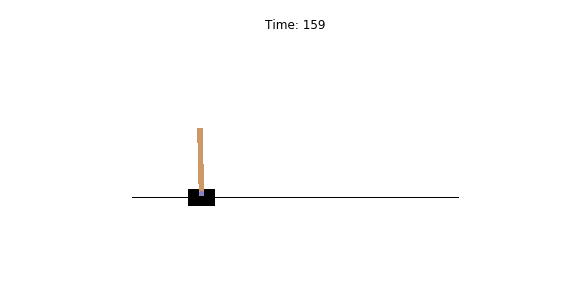
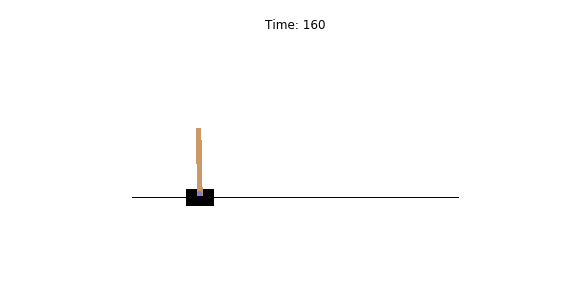
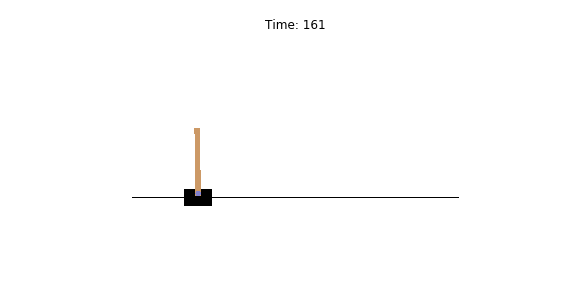
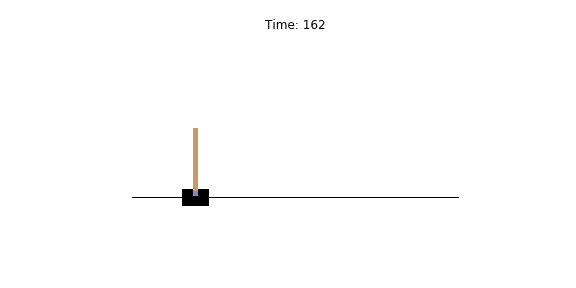
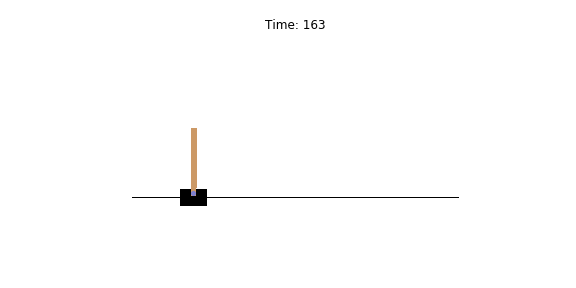
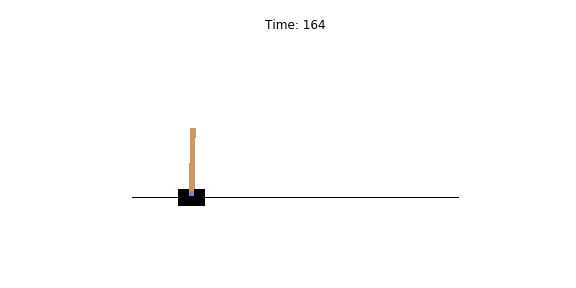
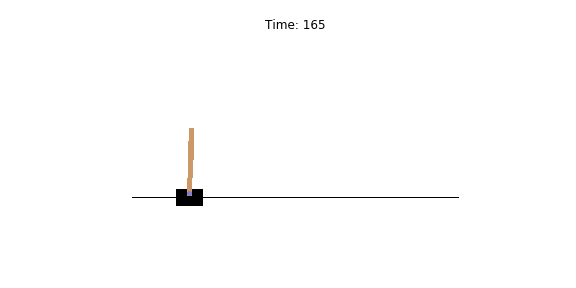
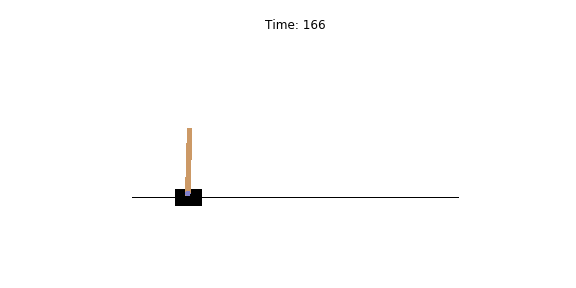
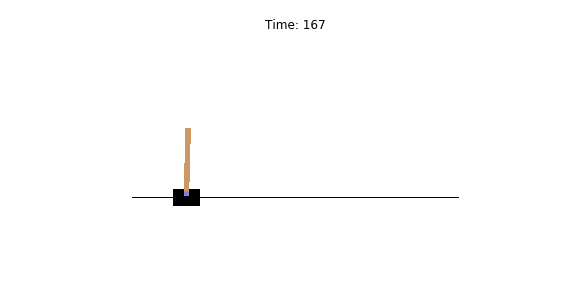
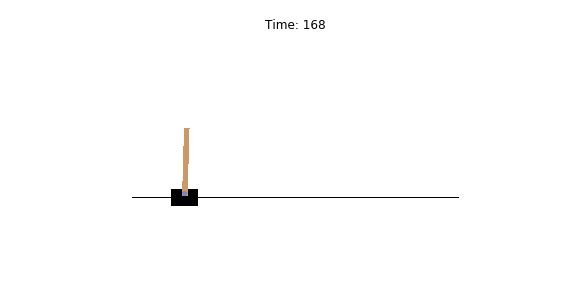
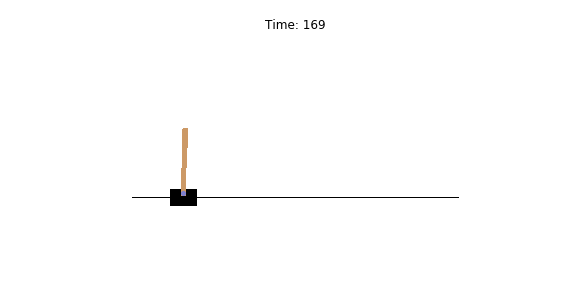
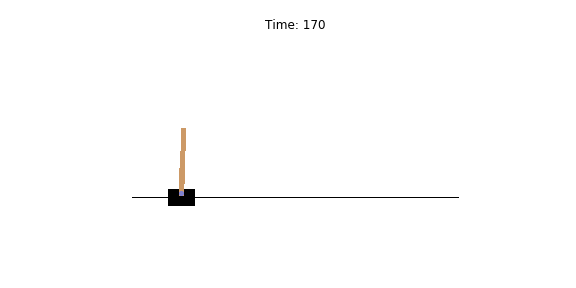
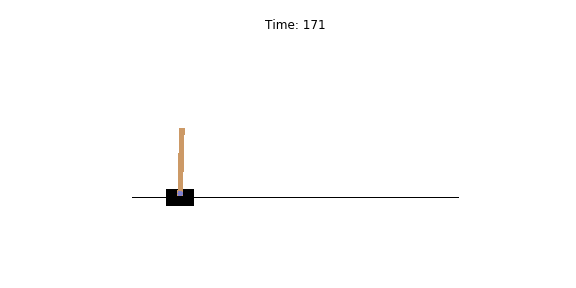
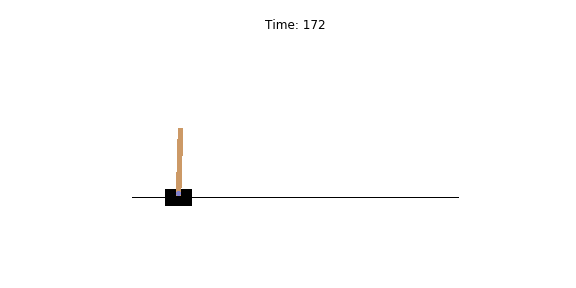
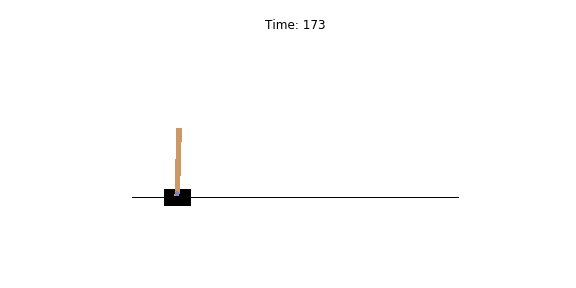
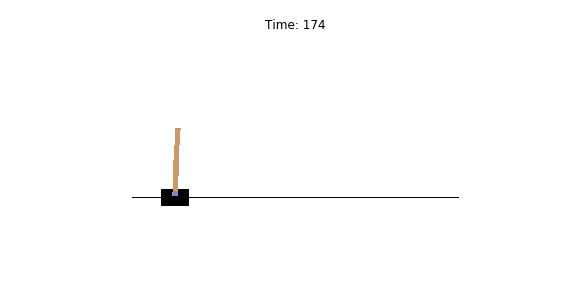
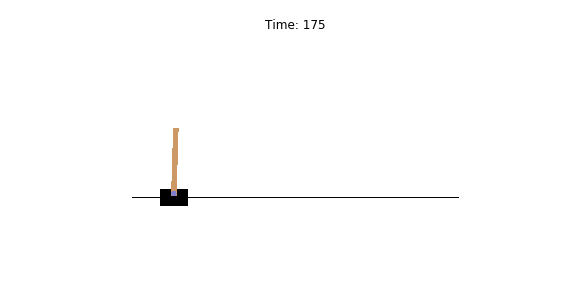
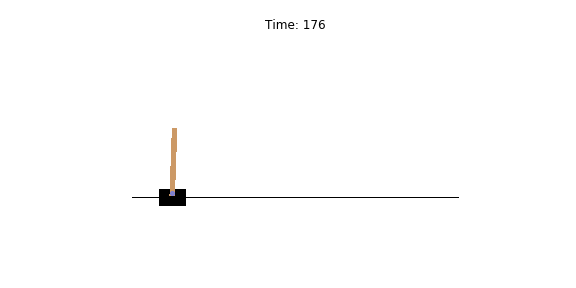
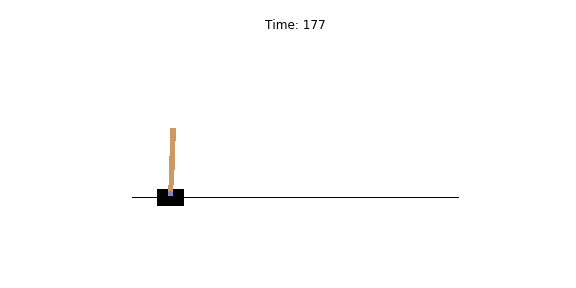
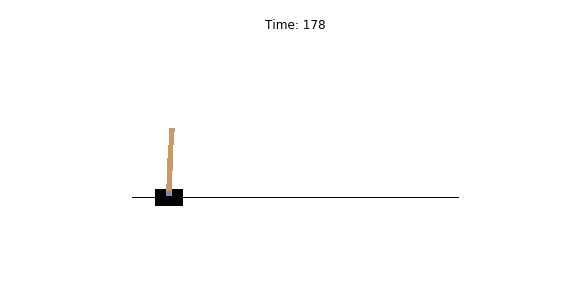
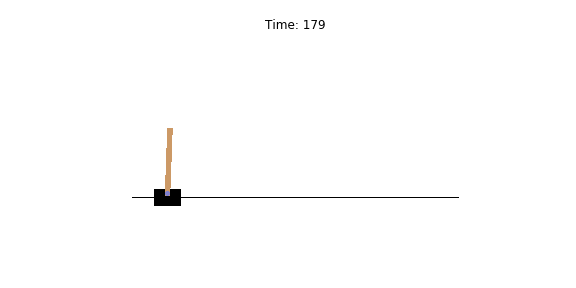
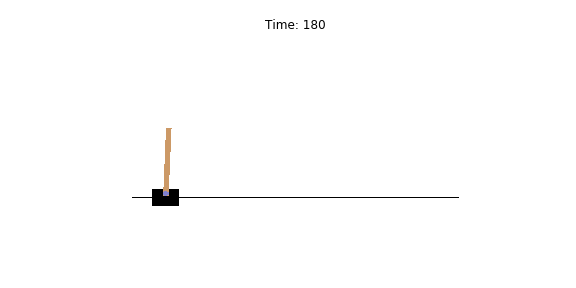
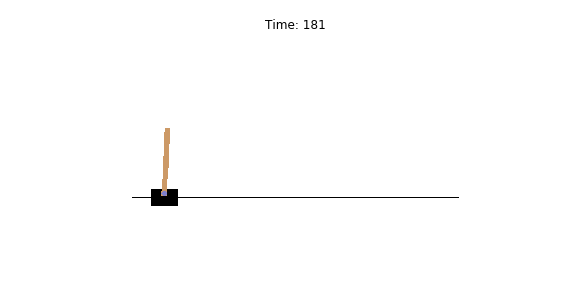
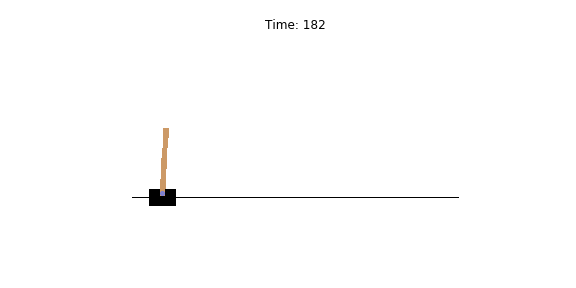
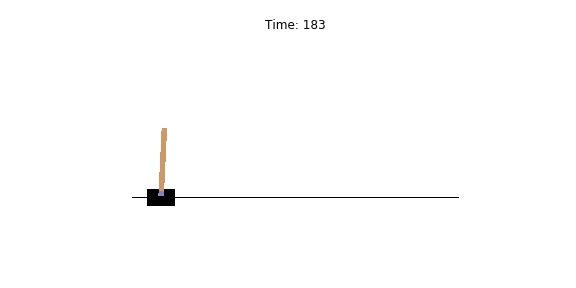
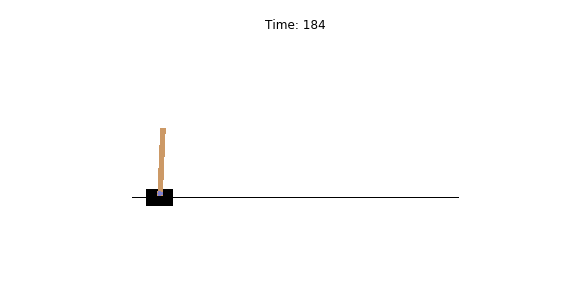
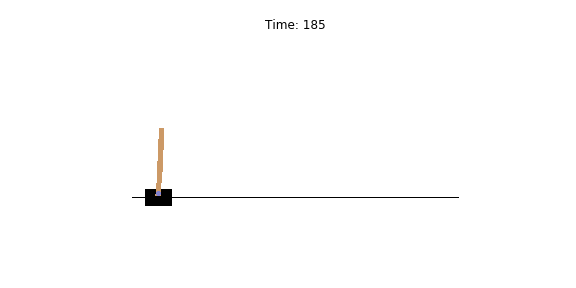
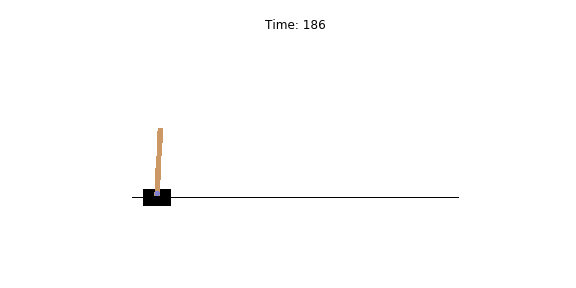
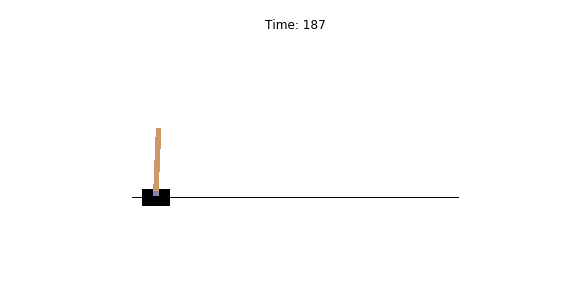
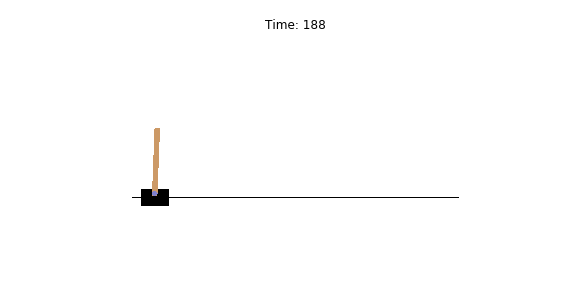
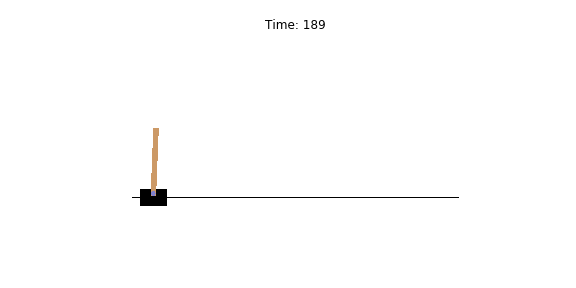
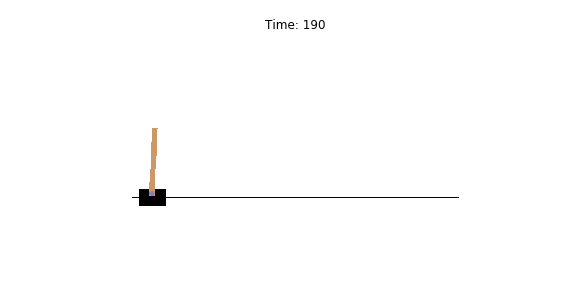
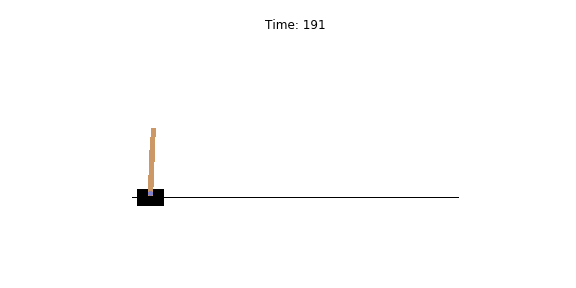
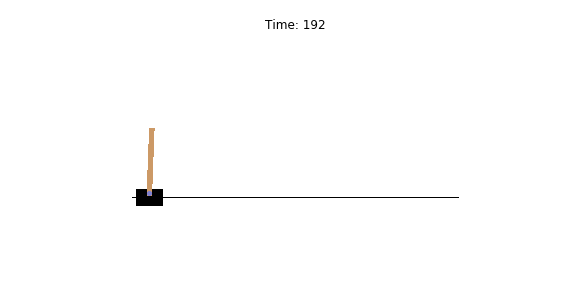
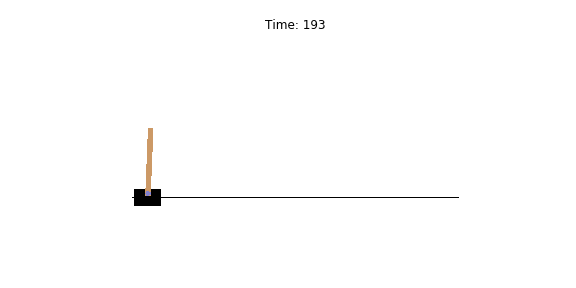
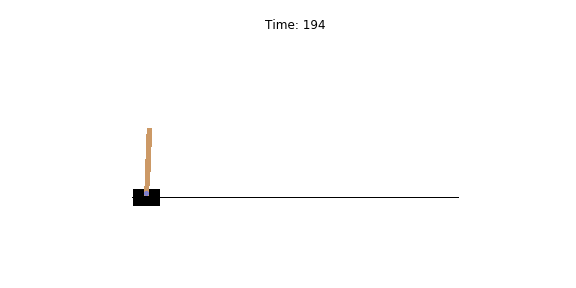
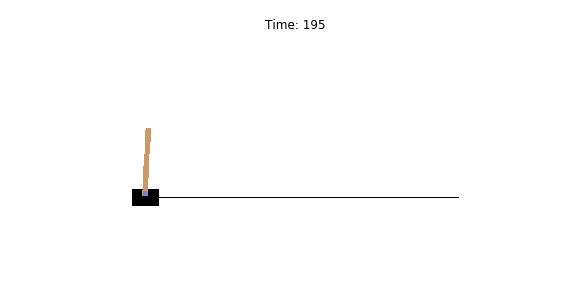
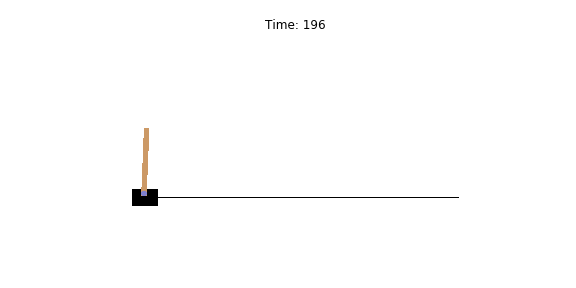
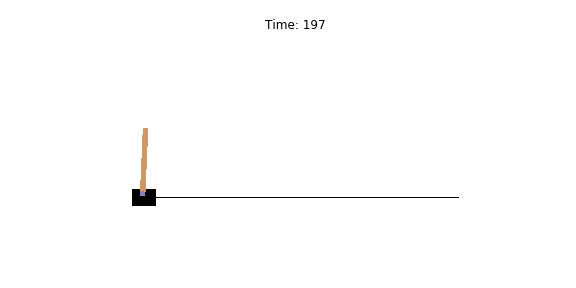
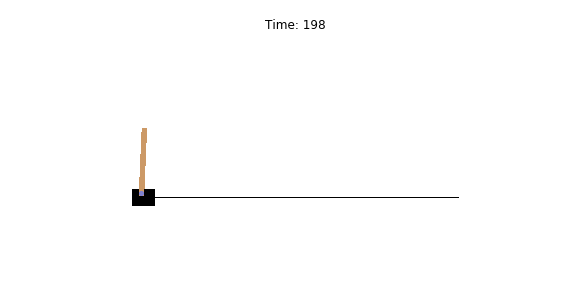
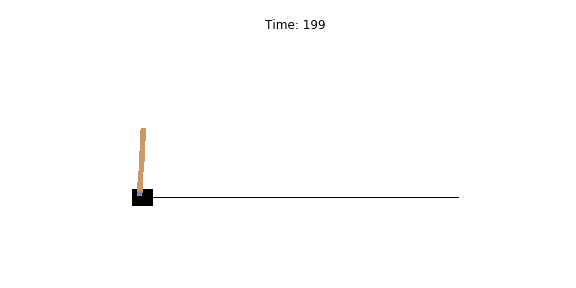

Episode [3500] Finished after: [200] steps, Reward: [200.00], Average Reward: [190.08]
Episode [3600] Finished after: [191] steps, Reward: [191.00], Average Reward: [187.17]
Episode [3700] Finished after: [175] steps, Reward: [175.00], Average Reward: [187.40]
Episode [3800] Finished after: [200] steps, Reward: [200.00], Average Reward: [190.73]
Episode [3900] Finished after: [183] steps, Reward: [183.00], Average Reward: [187.83]


In [ ]:
for i_episode in range(MAX_EPISODES+1):

    # RESET ENVIRONMENT 
    observation = env.reset()
    cart_position, pole_angle, cart_velocity, angle_rate_of_change = observation
    state = digitalizeState([np.digitize(cart_position, cart_position_bins),
                            np.digitize(pole_angle, pole_angle_bins),
                            np.digitize(cart_velocity, cart_velocity_bins),
                            np.digitize(angle_rate_of_change, angle_rate_bins)])
    
    # GET INITIAL ACTION
    action = q_learner.initializeState(state)

    # LOOP OVER STEPS
    total_rewards = 0
    imgs = []
    for t in range(MAX_STEPS):
        # APPEND CURRENT IMG
        rgbimg = env.render(mode='rgb_array')
        imgs.append(rgbimg)
        # RUN WITH ACTION 
        observation, reward, done, _ = env.step(action)
        cart_position, pole_angle, cart_velocity, angle_rate_of_change = observation
        state = digitalizeState([np.digitize(cart_position, cart_position_bins),
                                  np.digitize(pole_angle, pole_angle_bins),
                                  np.digitize(cart_velocity, cart_velocity_bins),
                                  np.digitize(angle_rate_of_change, angle_rate_bins)])
        total_rewards += reward
        if done: reward = -200   # normalize reward
        action = q_learner.updateModel(state, reward)
        if done: break
    
    
    # SAVE HISTORY
    episode_history.append(total_rewards)
    mean_rewards = np.mean(episode_history)

    # PLOT IMAGES
    if (i_episode % 500) is 0:
        display_frames_as_gif(imgs)
        
    # PRINT RESULTS
    if (i_episode % 100) is 0:
        print("Episode [%03d] Finished after: [%d] steps, Reward: [%.2f], Average Reward: [%.2f]" 
              % (i_episode, t+1, total_rewards, mean_rewards))

    # TERMINATE CONDITION
    if mean_rewards >= 195.0:
        print("Environment {} solved after {} episodes".format(env_name, i_episode+1))
        break